In [2]:
from astropy.io import fits
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
#from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
np.seterr(divide='ignore', invalid='ignore');
plt.rcParams.update({'figure.max_open_warning': 0})
import scipy.stats as stats
import astropy.units as u
from astropy.table import Table, Column, MaskedColumn, join
from tqdm import tqdm
#from bisect import bisect_left
c = 2.998e10
k = 1.38e-16
h = 6.626e-27
plt.rcParams.update({'font.size': 15})
halpha = 6564.61
hbeta = 4862.68
hgamma = 4341.68
hdelta = 4102.89
plt.rcParams['figure.figsize'] = [7, 5]
#from IPython.display import Audio, display
#def allDone():
#    display(Audio(filename='beep.mp3', autoplay=True))
from scipy.interpolate import interp1d,InterpolatedUnivariateSpline
#import lmfit

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
#import emcee
import corner
#import numdifftools
from scipy.ndimage import interpolation
from scipy.signal import medfilt
from scipy.interpolate import interp1d
#from multiprocessing import Pool
#import pickle
#import h5py
#import multiprocessing
#import itertools
#from multiprocessing import sharedctypes
print('imported')
import scipy

imported


In [3]:
import pandas as pd

In [4]:
import keras.backend as K

Using TensorFlow backend.


In [5]:
import tensorflow as tf

In [6]:
from keras.models import Sequential,Model
from keras.layers import Dense,Input
from keras.optimizers import Adam
#from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize,scale,MinMaxScaler,StandardScaler

In [7]:
## Enter parameter:
searchparameter = '_'

prefilenames = os.listdir('koester2/')
filenames = []
for i in range(len(prefilenames)):
    if searchparameter in prefilenames[i]:
        filenames.append(prefilenames[i])
        
len(filenames)

1040

In [8]:
modelspectra = [];
modelwl = [];
loggs = [];
teffs = [];
for i in tqdm(filenames):
    specname=i
    f = open('koester2/'+specname)
    data = f.readlines()
    f.close()
    headerdata = data[0:7]
    spectraldata = data[6:]
    lam = []
    flux = []

    for i in range(len(spectraldata)):
        l=float(spectraldata[i].split()[0])
        lam.append(l)
        f = float(spectraldata[i].split()[1])
        flux.append(f)

    lam = np.asarray(lam)
    flux = np.asarray(flux) / 1e7

    teff = float(headerdata[1].split()[3])
    logg = float(headerdata[2].split()[3])
    
    in1 = find_nearest(lam,4000)
    in2 = find_nearest(lam,8000)

    flux = flux[in1:in2]
    lam = lam[in1:in2]
    
    flux = flux[:-1][~ (np.diff(lam) == 0)]
    lam = lam[:-1][~ (np.diff(lam) == 0)]
    
    lamgrid = np.arange(4000,8000)
    
    func = interp1d(lam,flux,kind='linear',assume_sorted = False,fill_value='extrapolate')
    flux = func(lamgrid)
    
    modelspectra.append(flux)
    modelwl.append(lam)
    teffs.append(teff)
    loggs.append(logg)

modelspectra = np.asarray(modelspectra)
loggs = np.asarray(loggs)
teffs = np.asarray(teffs)

100%|██████████| 1040/1040 [00:19<00:00, 54.46it/s]


In [204]:
X = np.stack((teffs,loggs)).transpose()
t = np.log(modelspectra)

sc = MinMaxScaler()
msc = StandardScaler()

X_scaled = sc.fit_transform(X)
t_scaled = msc.fit_transform(t)

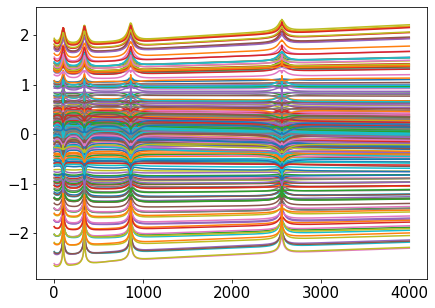

In [206]:
plt.plot(t_scaled[0:205].T)

In [175]:
def v_mse(y_true,y_pred):
    z
    return K.mean(res)

In [290]:
H = 25
def generator():
    x = Input(shape=(X[0].shape[0],))
    y = Dense(H,activation='sigmoid')(x)
    y = Dense(H,activation='sigmoid')(y)
    y = Dense(H,activation='sigmoid')(y)
    y = Dense(H,activation='sigmoid')(y)
    out = Dense(4000,activation='linear')(y)
    
    model = Model(inputs = x, outputs = out)
    model.compile(optimizer = Adam(lr=0.0001), loss = 'mse', \
                  metrics = ['mae'])
    return model
model = generator()
history = [];
model.load_weights('model_interp.h5')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
dense_91 (Dense)             (None, 25)                75        
_________________________________________________________________
dense_92 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_93 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_94 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_95 (Dense)             (None, 4000)              104000    
Total params: 106,025
Trainable params: 106,025
Non-trainable params: 0
_________________________________________________________________
None

In [291]:
for i in tqdm(range(100)): 
    print('Training meta-batch %i'%i)
    
    n_epochs = 500
    batch = 32
    
    h = model.fit(X_scaled,t_scaled, epochs = n_epochs, verbose = 1, batch_size = batch, shuffle = True)
    history = np.append(history, h.history['loss'])
    model.save_weights('model_interp.h5')





















  0%|          | 0/100 [00:00<?, ?it/s]

Training meta-batch 0
Epoch 1/500
1040/1040 [==============================] - 1s 1ms/step - loss: 3.2955e-06 - mean_absolute_error: 0.0012
Epoch 2/500
1040/1040 [==============================] - 0s 84us/step - loss: 2.0530e-06 - mean_absolute_error: 9.4605e-04
Epoch 3/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0394e-06 - mean_absolute_error: 9.5023e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9949e-06 - mean_absolute_error: 9.1778e-04
Epoch 5/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0216e-06 - mean_absolute_error: 9.3636e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2135e-06 - mean_absolute_error: 0.0010
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.4898e-06 - mean_absolute_error: 0.0011
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2256e-06 - mean_absolute_error: 0.0010
Epoch 9/500

1040/1040 [==============================] - 0s 82us/step - loss: 1.9477e-06 - mean_absolute_error: 9.1335e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9817e-06 - mean_absolute_error: 9.2114e-04
Epoch 69/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9901e-06 - mean_absolute_error: 9.2445e-04
Epoch 70/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9888e-06 - mean_absolute_error: 9.1689e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0322e-06 - mean_absolute_error: 9.3699e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9831e-06 - mean_absolute_error: 9.1698e-04
Epoch 73/500
1040/1040 [==============================] - 0s 85us/step - loss: 2.0642e-06 - mean_absolute_error: 9.5219e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0441e-06 - mean_absolute_error: 9.5429e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 83us/step - loss: 2.1147e-06 - mean_absolute_error: 9.8111e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1900e-06 - mean_absolute_error: 0.0010
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9807e-06 - mean_absolute_error: 9.1912e-04
Epoch 136/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.0671e-06 - mean_absolute_error: 9.6401e-04
Epoch 137/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.6138e-06 - mean_absolute_error: 0.0011
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9889e-06 - mean_absolute_error: 9.2989e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0129e-06 - mean_absolute_error: 9.3614e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0509e-06 - mean_absolute_error: 9.5147e-04
Epoch 141/500
1040/104

Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.6486e-06 - mean_absolute_error: 0.0011
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2537e-06 - mean_absolute_error: 0.0010
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9993e-06 - mean_absolute_error: 9.3253e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1107e-06 - mean_absolute_error: 9.8179e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9735e-06 - mean_absolute_error: 9.2018e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9768e-06 - mean_absolute_error: 9.2189e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9621e-06 - mean_absolute_error: 9.1719e-04
Epoch 206/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9390e-06 - mean_absolute_error: 9.0256e-04
Epoch 20

1040/1040 [==============================] - 0s 82us/step - loss: 2.0893e-06 - mean_absolute_error: 9.6913e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0744e-06 - mean_absolute_error: 9.6829e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9427e-06 - mean_absolute_error: 9.0773e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1146e-06 - mean_absolute_error: 9.6960e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0920e-06 - mean_absolute_error: 9.7541e-04
Epoch 269/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.1074e-06 - mean_absolute_error: 9.7160e-04
Epoch 270/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.3624e-06 - mean_absolute_error: 0.0011
Epoch 271/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9801e-06 - mean_absolute_error: 9.2104e-04
Epoch 272/500
1040

1040/1040 [==============================] - 0s 83us/step - loss: 2.0810e-06 - mean_absolute_error: 9.7184e-04
Epoch 331/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9633e-06 - mean_absolute_error: 9.1149e-04
Epoch 332/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9564e-06 - mean_absolute_error: 9.1555e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9231e-06 - mean_absolute_error: 9.0161e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0062e-06 - mean_absolute_error: 9.3532e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0377e-06 - mean_absolute_error: 9.4317e-04
Epoch 336/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9501e-06 - mean_absolute_error: 9.1674e-04
Epoch 337/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0606e-06 - mean_absolute_error: 9.5476e-04
Epoch 338/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.9906e-06 - mean_absolute_error: 9.2890e-04
Epoch 396/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.9327e-06 - mean_absolute_error: 9.0857e-04
Epoch 397/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0578e-06 - mean_absolute_error: 9.5662e-04
Epoch 398/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.1703e-06 - mean_absolute_error: 9.8644e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9529e-06 - mean_absolute_error: 9.0514e-04
Epoch 400/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9506e-06 - mean_absolute_error: 9.1309e-04
Epoch 401/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9220e-06 - mean_absolute_error: 8.9786e-04
Epoch 402/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0915e-06 - mean_absolute_error: 9.6611e-04
Epoch 403/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.9424e-06 - mean_absolute_error: 9.0821e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1327e-06 - mean_absolute_error: 9.8233e-04
Epoch 463/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0708e-06 - mean_absolute_error: 9.5942e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0821e-06 - mean_absolute_error: 9.6620e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0260e-06 - mean_absolute_error: 9.3921e-04
Epoch 466/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9848e-06 - mean_absolute_error: 9.3008e-04
Epoch 467/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0652e-06 - mean_absolute_error: 9.5961e-04
Epoch 468/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2052e-06 - mean_absolute_error: 9.9365e-04
Epoch 469/500






















  1%|          | 1/100 [00:45<1:15:21, 45.67s/it]

Training meta-batch 1
Epoch 1/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.9260e-06 - mean_absolute_error: 9.0109e-04
Epoch 2/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.0160e-06 - mean_absolute_error: 9.3392e-04
Epoch 3/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9589e-06 - mean_absolute_error: 9.1904e-04
Epoch 4/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.9175e-06 - mean_absolute_error: 8.9726e-04
Epoch 5/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.5871e-06 - mean_absolute_error: 0.0011
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9915e-06 - mean_absolute_error: 9.3160e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9464e-06 - mean_absolute_error: 9.1231e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9891e-06 - mean_absolute_error: 9.2566e-0

1040/1040 [==============================] - 0s 82us/step - loss: 2.0250e-06 - mean_absolute_error: 9.3942e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0159e-06 - mean_absolute_error: 9.3919e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1920e-06 - mean_absolute_error: 0.0010
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1073e-06 - mean_absolute_error: 9.8154e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0855e-06 - mean_absolute_error: 9.6028e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1082e-06 - mean_absolute_error: 9.7851e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.3943e-06 - mean_absolute_error: 0.0011
Epoch 74/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0587e-06 - mean_absolute_error: 9.6549e-04
Epoch 75/500
1040/1040 [=====

1040/1040 [==============================] - 0s 82us/step - loss: 1.9733e-06 - mean_absolute_error: 9.2492e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0194e-06 - mean_absolute_error: 9.3784e-04
Epoch 135/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9552e-06 - mean_absolute_error: 9.1416e-04
Epoch 136/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.1194e-06 - mean_absolute_error: 9.8285e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2345e-06 - mean_absolute_error: 0.0010
Epoch 138/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.1869e-06 - mean_absolute_error: 0.0010
Epoch 139/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9723e-06 - mean_absolute_error: 9.1987e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9500e-06 - mean_absolute_error: 9.1489e-04
Epoch 141/500
1040/104

Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9139e-06 - mean_absolute_error: 8.9328e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9380e-06 - mean_absolute_error: 9.1352e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9236e-06 - mean_absolute_error: 9.0676e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2595e-06 - mean_absolute_error: 0.0010
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0631e-06 - mean_absolute_error: 9.6100e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9730e-06 - mean_absolute_error: 9.2816e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9991e-06 - mean_absolute_error: 9.3214e-04
Epoch 206/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0085e-06 - mean_absolute_error: 9.3101e-04
Epoc

1040/1040 [==============================] - 0s 82us/step - loss: 2.0220e-06 - mean_absolute_error: 9.5094e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9824e-06 - mean_absolute_error: 9.2731e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1473e-06 - mean_absolute_error: 9.9676e-04
Epoch 267/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0017e-06 - mean_absolute_error: 9.3732e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0460e-06 - mean_absolute_error: 9.5525e-04
Epoch 269/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.1520e-06 - mean_absolute_error: 9.9657e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9561e-06 - mean_absolute_error: 9.1659e-04
Epoch 271/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.3004e-06 - mean_absolute_error: 0.0010
Epoch 272/500
1040

Epoch 330/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9107e-06 - mean_absolute_error: 8.9627e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9205e-06 - mean_absolute_error: 9.0810e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0075e-06 - mean_absolute_error: 9.3367e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0756e-06 - mean_absolute_error: 9.6496e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9554e-06 - mean_absolute_error: 9.0894e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9844e-06 - mean_absolute_error: 9.2189e-04
Epoch 336/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.2012e-06 - mean_absolute_error: 0.0010
Epoch 337/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1151e-06 - mean_absolute_error: 9.8524e-04
Epoc

1040/1040 [==============================] - 0s 82us/step - loss: 1.9387e-06 - mean_absolute_error: 9.1057e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1104e-06 - mean_absolute_error: 9.8116e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0520e-06 - mean_absolute_error: 9.6195e-04
Epoch 398/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.4169e-06 - mean_absolute_error: 0.0011
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.5775e-06 - mean_absolute_error: 0.0011
Epoch 400/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0015e-06 - mean_absolute_error: 9.4205e-04
Epoch 401/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9561e-06 - mean_absolute_error: 9.1775e-04
Epoch 402/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9079e-06 - mean_absolute_error: 8.9588e-04
Epoch 403/500
1040/104

1040/1040 [==============================] - 0s 81us/step - loss: 1.9765e-06 - mean_absolute_error: 9.3209e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0958e-06 - mean_absolute_error: 9.6611e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9137e-06 - mean_absolute_error: 9.0052e-04
Epoch 463/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9019e-06 - mean_absolute_error: 8.9173e-04
Epoch 464/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9491e-06 - mean_absolute_error: 9.1299e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2375e-06 - mean_absolute_error: 0.0010
Epoch 466/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.4647e-06 - mean_absolute_error: 0.0011
Epoch 467/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0728e-06 - mean_absolute_error: 9.5339e-04
Epoch 468/500
1040/104





















  2%|▏         | 2/100 [01:28<1:13:21, 44.91s/it]

Training meta-batch 2
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.2279e-06 - mean_absolute_error: 0.0010
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0224e-06 - mean_absolute_error: 9.4079e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1064e-06 - mean_absolute_error: 9.8376e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9325e-06 - mean_absolute_error: 9.0906e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0575e-06 - mean_absolute_error: 9.5926e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9249e-06 - mean_absolute_error: 9.0449e-04
Epoch 7/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0522e-06 - mean_absolute_error: 9.5031e-04
Epoch 8/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.1894e-06 - mean_absolute_error: 9.9443e-0

1040/1040 [==============================] - 0s 82us/step - loss: 1.9687e-06 - mean_absolute_error: 9.2462e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9903e-06 - mean_absolute_error: 9.3699e-04
Epoch 69/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.2996e-06 - mean_absolute_error: 0.0011
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0154e-06 - mean_absolute_error: 9.3316e-04
Epoch 71/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0313e-06 - mean_absolute_error: 9.4745e-04
Epoch 72/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9218e-06 - mean_absolute_error: 9.0658e-04
Epoch 73/500
1040/1040 [==============================] - 0s 92us/step - loss: 2.1500e-06 - mean_absolute_error: 9.8523e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0283e-06 - mean_absolute_error: 9.4918e-04
Epoch 75/500
1040/1040 [=

1040/1040 [==============================] - 0s 82us/step - loss: 1.9591e-06 - mean_absolute_error: 9.2004e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9983e-06 - mean_absolute_error: 9.3450e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8997e-06 - mean_absolute_error: 8.9398e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9690e-06 - mean_absolute_error: 9.2791e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9211e-06 - mean_absolute_error: 9.0358e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0539e-06 - mean_absolute_error: 9.6134e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9643e-06 - mean_absolute_error: 9.2113e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9285e-06 - mean_absolute_error: 9.0597e-04
Epoch 141/500


1040/1040 [==============================] - 0s 82us/step - loss: 2.0705e-06 - mean_absolute_error: 9.6752e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9516e-06 - mean_absolute_error: 9.2208e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9386e-06 - mean_absolute_error: 9.0621e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9193e-06 - mean_absolute_error: 9.0085e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0880e-06 - mean_absolute_error: 9.8635e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0094e-06 - mean_absolute_error: 9.3449e-04
Epoch 204/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8873e-06 - mean_absolute_error: 8.9898e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0239e-06 - mean_absolute_error: 9.5398e-04
Epoch 206/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.9450e-06 - mean_absolute_error: 9.0882e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1269e-06 - mean_absolute_error: 9.8576e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1597e-06 - mean_absolute_error: 0.0010
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0317e-06 - mean_absolute_error: 9.4616e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0249e-06 - mean_absolute_error: 9.4646e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9659e-06 - mean_absolute_error: 9.1658e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9235e-06 - mean_absolute_error: 9.1168e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9796e-06 - mean_absolute_error: 9.2021e-04
Epoch 271/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.9586e-06 - mean_absolute_error: 9.1843e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8929e-06 - mean_absolute_error: 8.9159e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9148e-06 - mean_absolute_error: 8.9723e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9173e-06 - mean_absolute_error: 9.0401e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0363e-06 - mean_absolute_error: 9.5314e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0897e-06 - mean_absolute_error: 9.7311e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9835e-06 - mean_absolute_error: 9.2699e-04
Epoch 335/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0286e-06 - mean_absolute_error: 9.4209e-04
Epoch 336/500


1040/1040 [==============================] - 0s 82us/step - loss: 2.0206e-06 - mean_absolute_error: 9.4862e-04
Epoch 394/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.1095e-06 - mean_absolute_error: 9.9100e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0039e-06 - mean_absolute_error: 9.3901e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2451e-06 - mean_absolute_error: 0.0010
Epoch 397/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9824e-06 - mean_absolute_error: 9.3115e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9782e-06 - mean_absolute_error: 9.2605e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9319e-06 - mean_absolute_error: 9.1447e-04
Epoch 400/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9787e-06 - mean_absolute_error: 9.3113e-04
Epoch 401/500
1040

1040/1040 [==============================] - 0s 81us/step - loss: 2.2491e-06 - mean_absolute_error: 0.0010
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9778e-06 - mean_absolute_error: 9.2425e-04
Epoch 460/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8998e-06 - mean_absolute_error: 8.9312e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9233e-06 - mean_absolute_error: 9.0792e-04
Epoch 462/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.0155e-06 - mean_absolute_error: 9.4354e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.4474e-06 - mean_absolute_error: 0.0011
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0858e-06 - mean_absolute_error: 9.6953e-04
Epoch 465/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0501e-06 - mean_absolute_error: 9.6736e-04
Epoch 466/500
1040/104





















  3%|▎         | 3/100 [02:12<1:11:57, 44.51s/it]

Training meta-batch 3
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9885e-06 - mean_absolute_error: 9.3437e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9353e-06 - mean_absolute_error: 9.1448e-04
Epoch 3/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0288e-06 - mean_absolute_error: 9.5044e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9461e-06 - mean_absolute_error: 9.0825e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1153e-06 - mean_absolute_error: 9.8235e-04
Epoch 6/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9415e-06 - mean_absolute_error: 9.1303e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9930e-06 - mean_absolute_error: 9.3723e-04
Epoch 8/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9289e-06 - mean_absolute_error: 9.125

1040/1040 [==============================] - 0s 82us/step - loss: 1.9091e-06 - mean_absolute_error: 9.0605e-04
Epoch 68/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9126e-06 - mean_absolute_error: 8.9986e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0571e-06 - mean_absolute_error: 9.5677e-04
Epoch 70/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.1147e-06 - mean_absolute_error: 9.7670e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.4022e-06 - mean_absolute_error: 0.0011
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2049e-06 - mean_absolute_error: 0.0010
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2600e-06 - mean_absolute_error: 0.0010
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8945e-06 - mean_absolute_error: 8.9130e-04
Epoch 75/500
1040/1040 [=========

1040/1040 [==============================] - 0s 82us/step - loss: 2.0111e-06 - mean_absolute_error: 9.4415e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0120e-06 - mean_absolute_error: 9.4277e-04
Epoch 135/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9501e-06 - mean_absolute_error: 9.1867e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9346e-06 - mean_absolute_error: 9.1241e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9559e-06 - mean_absolute_error: 9.1629e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9212e-06 - mean_absolute_error: 9.0754e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9998e-06 - mean_absolute_error: 9.3458e-04
Epoch 140/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0833e-06 - mean_absolute_error: 9.7167e-04
Epoch 141/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.9433e-06 - mean_absolute_error: 9.1249e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1083e-06 - mean_absolute_error: 9.7680e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9350e-06 - mean_absolute_error: 9.1064e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9634e-06 - mean_absolute_error: 9.2326e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9190e-06 - mean_absolute_error: 9.0360e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0513e-06 - mean_absolute_error: 9.5192e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8788e-06 - mean_absolute_error: 8.8686e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0035e-06 - mean_absolute_error: 9.3950e-04
Epoch 206/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.9818e-06 - mean_absolute_error: 9.2055e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1376e-06 - mean_absolute_error: 9.9601e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2734e-06 - mean_absolute_error: 0.0010
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2072e-06 - mean_absolute_error: 0.0010
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0870e-06 - mean_absolute_error: 9.7312e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9333e-06 - mean_absolute_error: 9.0694e-04
Epoch 269/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9871e-06 - mean_absolute_error: 9.3234e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0756e-06 - mean_absolute_error: 9.6663e-04
Epoch 271/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 2.0373e-06 - mean_absolute_error: 9.5500e-04
Epoch 329/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0056e-06 - mean_absolute_error: 9.4118e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0383e-06 - mean_absolute_error: 9.6049e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0036e-06 - mean_absolute_error: 9.3700e-04
Epoch 332/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0307e-06 - mean_absolute_error: 9.5560e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0039e-06 - mean_absolute_error: 9.3189e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8782e-06 - mean_absolute_error: 8.8656e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9631e-06 - mean_absolute_error: 9.2350e-04
Epoch 336/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.9256e-06 - mean_absolute_error: 9.0690e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9128e-06 - mean_absolute_error: 8.9787e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8985e-06 - mean_absolute_error: 9.0539e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1842e-06 - mean_absolute_error: 9.9470e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1732e-06 - mean_absolute_error: 0.0010
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.3686e-06 - mean_absolute_error: 0.0011
Epoch 400/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0021e-06 - mean_absolute_error: 9.3536e-04
Epoch 401/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1644e-06 - mean_absolute_error: 9.9641e-04
Epoch 402/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 2.2557e-06 - mean_absolute_error: 0.0010
Epoch 460/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.1487e-06 - mean_absolute_error: 0.0010
Epoch 461/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.1105e-06 - mean_absolute_error: 9.7115e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9890e-06 - mean_absolute_error: 9.3499e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9231e-06 - mean_absolute_error: 9.0467e-04
Epoch 464/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9532e-06 - mean_absolute_error: 9.1807e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9433e-06 - mean_absolute_error: 9.1534e-04
Epoch 466/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9452e-06 - mean_absolute_error: 9.1654e-04
Epoch 467/500
1040/104





















  4%|▍         | 4/100 [02:59<1:12:19, 45.20s/it]

Training meta-batch 4
Epoch 1/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.9748e-06 - mean_absolute_error: 9.2688e-04
Epoch 2/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9362e-06 - mean_absolute_error: 9.0825e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0075e-06 - mean_absolute_error: 9.3839e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0520e-06 - mean_absolute_error: 9.6093e-04
Epoch 5/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.3460e-06 - mean_absolute_error: 0.0011
Epoch 6/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0026e-06 - mean_absolute_error: 9.3735e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9604e-06 - mean_absolute_error: 9.1701e-04
Epoch 8/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8416e-06 - mean_absolute_error: 8.7902e-0

1040/1040 [==============================] - 0s 82us/step - loss: 1.9351e-06 - mean_absolute_error: 9.1431e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8727e-06 - mean_absolute_error: 8.8612e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9422e-06 - mean_absolute_error: 9.1722e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9935e-06 - mean_absolute_error: 9.3745e-04
Epoch 71/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.5104e-06 - mean_absolute_error: 0.0011
Epoch 72/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9234e-06 - mean_absolute_error: 9.0107e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8881e-06 - mean_absolute_error: 8.9222e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9338e-06 - mean_absolute_error: 9.0926e-04
Epoch 75/500
1040/1040 [=

1040/1040 [==============================] - 0s 83us/step - loss: 2.1103e-06 - mean_absolute_error: 9.5850e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9542e-06 - mean_absolute_error: 9.2865e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9567e-06 - mean_absolute_error: 9.2936e-04
Epoch 136/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0480e-06 - mean_absolute_error: 9.5837e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9722e-06 - mean_absolute_error: 9.2637e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1086e-06 - mean_absolute_error: 9.7787e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0091e-06 - mean_absolute_error: 9.4347e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0326e-06 - mean_absolute_error: 9.5098e-04
Epoch 141/500


1040/1040 [==============================] - 0s 82us/step - loss: 2.2325e-06 - mean_absolute_error: 9.9701e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.8211e-06 - mean_absolute_error: 0.0012
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8911e-06 - mean_absolute_error: 8.9127e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8495e-06 - mean_absolute_error: 8.7220e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9460e-06 - mean_absolute_error: 9.1294e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9129e-06 - mean_absolute_error: 9.0570e-04
Epoch 204/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9838e-06 - mean_absolute_error: 9.2515e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1883e-06 - mean_absolute_error: 0.0010
Epoch 206/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 2.0552e-06 - mean_absolute_error: 9.6048e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8742e-06 - mean_absolute_error: 8.8498e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2686e-06 - mean_absolute_error: 0.0010
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9351e-06 - mean_absolute_error: 9.1619e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9208e-06 - mean_absolute_error: 9.1254e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8738e-06 - mean_absolute_error: 8.8865e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1353e-06 - mean_absolute_error: 9.9029e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0588e-06 - mean_absolute_error: 9.5950e-04
Epoch 271/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 2.1084e-06 - mean_absolute_error: 9.7927e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9080e-06 - mean_absolute_error: 9.0223e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1972e-06 - mean_absolute_error: 0.0010
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.4476e-06 - mean_absolute_error: 0.0011
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9881e-06 - mean_absolute_error: 9.2972e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9337e-06 - mean_absolute_error: 9.1189e-04
Epoch 334/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9019e-06 - mean_absolute_error: 8.9823e-04
Epoch 335/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9507e-06 - mean_absolute_error: 9.2246e-04
Epoch 336/500
1040/104

1040/1040 [==============================] - 0s 83us/step - loss: 2.9359e-06 - mean_absolute_error: 0.0012
Epoch 394/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.1570e-06 - mean_absolute_error: 0.0010
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9103e-06 - mean_absolute_error: 9.0136e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9714e-06 - mean_absolute_error: 9.2483e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9017e-06 - mean_absolute_error: 9.0120e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9660e-06 - mean_absolute_error: 9.1629e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9716e-06 - mean_absolute_error: 9.2805e-04
Epoch 400/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8921e-06 - mean_absolute_error: 8.9568e-04
Epoch 401/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 2.0512e-06 - mean_absolute_error: 9.6062e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1278e-06 - mean_absolute_error: 9.9293e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0521e-06 - mean_absolute_error: 9.5713e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1518e-06 - mean_absolute_error: 9.9823e-04
Epoch 462/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9160e-06 - mean_absolute_error: 9.0363e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9286e-06 - mean_absolute_error: 9.0390e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1490e-06 - mean_absolute_error: 9.9600e-04
Epoch 465/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8965e-06 - mean_absolute_error: 9.0336e-04
Epoch 466/500






















  5%|▌         | 5/100 [03:42<1:10:48, 44.72s/it]

Training meta-batch 5
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9088e-06 - mean_absolute_error: 9.0376e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8815e-06 - mean_absolute_error: 8.9501e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9746e-06 - mean_absolute_error: 9.2725e-04
Epoch 4/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.0752e-06 - mean_absolute_error: 9.6644e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0810e-06 - mean_absolute_error: 9.7397e-04
Epoch 6/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.1675e-06 - mean_absolute_error: 9.9876e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0482e-06 - mean_absolute_error: 9.4902e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8811e-06 - mean_absolute_error: 8.960

1040/1040 [==============================] - 0s 82us/step - loss: 2.0647e-06 - mean_absolute_error: 9.6878e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9305e-06 - mean_absolute_error: 9.0901e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9577e-06 - mean_absolute_error: 9.2645e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8902e-06 - mean_absolute_error: 8.9970e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8788e-06 - mean_absolute_error: 8.9177e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8989e-06 - mean_absolute_error: 8.9418e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9522e-06 - mean_absolute_error: 9.1772e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9089e-06 - mean_absolute_error: 9.0238e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.9755e-06 - mean_absolute_error: 9.3542e-04
Epoch 134/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8961e-06 - mean_absolute_error: 8.9130e-04
Epoch 135/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9083e-06 - mean_absolute_error: 9.0316e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9075e-06 - mean_absolute_error: 9.0333e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9298e-06 - mean_absolute_error: 9.1241e-04
Epoch 138/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9854e-06 - mean_absolute_error: 9.3664e-04
Epoch 139/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9840e-06 - mean_absolute_error: 9.3782e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0875e-06 - mean_absolute_error: 9.6467e-04
Epoch 141/500


1040/1040 [==============================] - 0s 83us/step - loss: 2.6289e-06 - mean_absolute_error: 0.0011
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.5922e-06 - mean_absolute_error: 0.0011
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9659e-06 - mean_absolute_error: 9.2864e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9542e-06 - mean_absolute_error: 9.1348e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.3468e-06 - mean_absolute_error: 0.0010
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0915e-06 - mean_absolute_error: 9.6900e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9670e-06 - mean_absolute_error: 9.2296e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9029e-06 - mean_absolute_error: 8.9558e-04
Epoch 206/500
1040/1040 [=

1040/1040 [==============================] - 0s 82us/step - loss: 1.9370e-06 - mean_absolute_error: 9.0941e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8640e-06 - mean_absolute_error: 8.8392e-04
Epoch 265/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9722e-06 - mean_absolute_error: 9.2383e-04
Epoch 266/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0598e-06 - mean_absolute_error: 9.6886e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9686e-06 - mean_absolute_error: 9.3008e-04
Epoch 268/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0145e-06 - mean_absolute_error: 9.4628e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9410e-06 - mean_absolute_error: 9.0900e-04
Epoch 270/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0284e-06 - mean_absolute_error: 9.4753e-04
Epoch 271/500


1040/1040 [==============================] - 0s 82us/step - loss: 2.1802e-06 - mean_absolute_error: 0.0010
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0415e-06 - mean_absolute_error: 9.5080e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1328e-06 - mean_absolute_error: 9.9519e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9066e-06 - mean_absolute_error: 9.0120e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9501e-06 - mean_absolute_error: 9.2828e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.7076e-06 - mean_absolute_error: 0.0012
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0756e-06 - mean_absolute_error: 9.6961e-04
Epoch 335/500
1040/1040 [==============================] - 0s 89us/step - loss: 1.9289e-06 - mean_absolute_error: 9.1376e-04
Epoch 336/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.9550e-06 - mean_absolute_error: 9.2270e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.4886e-06 - mean_absolute_error: 0.0011
Epoch 395/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0827e-06 - mean_absolute_error: 9.7526e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8393e-06 - mean_absolute_error: 8.7012e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8876e-06 - mean_absolute_error: 8.9479e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9729e-06 - mean_absolute_error: 9.3051e-04
Epoch 399/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0567e-06 - mean_absolute_error: 9.5935e-04
Epoch 400/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9562e-06 - mean_absolute_error: 9.2019e-04
Epoch 401/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.9573e-06 - mean_absolute_error: 9.2554e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1535e-06 - mean_absolute_error: 0.0010
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9537e-06 - mean_absolute_error: 9.3336e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9841e-06 - mean_absolute_error: 9.3093e-04
Epoch 462/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0631e-06 - mean_absolute_error: 9.6045e-04
Epoch 463/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.3987e-06 - mean_absolute_error: 0.0011
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0840e-06 - mean_absolute_error: 9.7755e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8478e-06 - mean_absolute_error: 8.7904e-04
Epoch 466/500
1040/104





















  6%|▌         | 6/100 [04:25<1:09:18, 44.24s/it]

Training meta-batch 6
Epoch 1/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8760e-06 - mean_absolute_error: 8.9636e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1973e-06 - mean_absolute_error: 0.0010
Epoch 3/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9937e-06 - mean_absolute_error: 9.3112e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9581e-06 - mean_absolute_error: 9.1918e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9628e-06 - mean_absolute_error: 9.3554e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9254e-06 - mean_absolute_error: 9.0315e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8749e-06 - mean_absolute_error: 8.9124e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0416e-06 - mean_absolute_error: 9.5895e-0

1040/1040 [==============================] - 0s 83us/step - loss: 1.9331e-06 - mean_absolute_error: 9.0783e-04
Epoch 68/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.6390e-06 - mean_absolute_error: 0.0012
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2406e-06 - mean_absolute_error: 0.0010
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9086e-06 - mean_absolute_error: 8.9883e-04
Epoch 71/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.3200e-06 - mean_absolute_error: 0.0010
Epoch 72/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.3482e-06 - mean_absolute_error: 0.0011
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1339e-06 - mean_absolute_error: 9.9002e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0542e-06 - mean_absolute_error: 9.5496e-04
Epoch 75/500
1040/1040 [=============

1040/1040 [==============================] - 0s 83us/step - loss: 1.9297e-06 - mean_absolute_error: 9.1376e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2165e-06 - mean_absolute_error: 0.0010
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9178e-06 - mean_absolute_error: 9.0788e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9375e-06 - mean_absolute_error: 9.1727e-04
Epoch 137/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0440e-06 - mean_absolute_error: 9.5807e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1000e-06 - mean_absolute_error: 9.7875e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1672e-06 - mean_absolute_error: 0.0010
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9502e-06 - mean_absolute_error: 9.2767e-04
Epoch 141/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.9727e-06 - mean_absolute_error: 9.2653e-04
Epoch 199/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9503e-06 - mean_absolute_error: 9.2262e-04
Epoch 200/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9011e-06 - mean_absolute_error: 9.0028e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0130e-06 - mean_absolute_error: 9.3818e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2066e-06 - mean_absolute_error: 0.0010
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0181e-06 - mean_absolute_error: 9.5263e-04
Epoch 204/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8925e-06 - mean_absolute_error: 8.9603e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9918e-06 - mean_absolute_error: 9.3928e-04
Epoch 206/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.8559e-06 - mean_absolute_error: 8.8455e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2718e-06 - mean_absolute_error: 0.0010
Epoch 265/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.1270e-06 - mean_absolute_error: 0.0010
Epoch 266/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9362e-06 - mean_absolute_error: 9.1532e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8939e-06 - mean_absolute_error: 9.0053e-04
Epoch 268/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9086e-06 - mean_absolute_error: 9.1163e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9482e-06 - mean_absolute_error: 9.2166e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8638e-06 - mean_absolute_error: 8.8191e-04
Epoch 271/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.9713e-06 - mean_absolute_error: 9.2890e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9192e-06 - mean_absolute_error: 9.0849e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0743e-06 - mean_absolute_error: 9.6540e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9960e-06 - mean_absolute_error: 9.4451e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8734e-06 - mean_absolute_error: 8.8923e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8662e-06 - mean_absolute_error: 8.8926e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9274e-06 - mean_absolute_error: 9.1401e-04
Epoch 335/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0305e-06 - mean_absolute_error: 9.5432e-04
Epoch 336/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8721e-06 - mean_absolute_error: 8.8999e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9877e-06 - mean_absolute_error: 9.3566e-04
Epoch 395/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0379e-06 - mean_absolute_error: 9.5293e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9699e-06 - mean_absolute_error: 9.1832e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9756e-06 - mean_absolute_error: 9.3686e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0490e-06 - mean_absolute_error: 9.6803e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1059e-06 - mean_absolute_error: 9.8369e-04
Epoch 400/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.3068e-06 - mean_absolute_error: 0.0011
Epoch 401/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 2.0154e-06 - mean_absolute_error: 9.4984e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8369e-06 - mean_absolute_error: 8.6964e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9847e-06 - mean_absolute_error: 9.3368e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0080e-06 - mean_absolute_error: 9.4779e-04
Epoch 462/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0029e-06 - mean_absolute_error: 9.3574e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9538e-06 - mean_absolute_error: 9.2799e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9397e-06 - mean_absolute_error: 9.2118e-04
Epoch 465/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9054e-06 - mean_absolute_error: 9.0460e-04
Epoch 466/500






















  7%|▋         | 7/100 [05:08<1:08:01, 43.88s/it]

Training meta-batch 7
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8945e-06 - mean_absolute_error: 8.9397e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0820e-06 - mean_absolute_error: 9.7595e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2698e-06 - mean_absolute_error: 0.0010
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9336e-06 - mean_absolute_error: 9.1573e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0699e-06 - mean_absolute_error: 9.6991e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1524e-06 - mean_absolute_error: 9.9644e-04
Epoch 7/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9561e-06 - mean_absolute_error: 9.2574e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8723e-06 - mean_absolute_error: 8.8961e-0

1040/1040 [==============================] - 0s 83us/step - loss: 1.9080e-06 - mean_absolute_error: 9.0254e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9907e-06 - mean_absolute_error: 9.3659e-04
Epoch 69/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9686e-06 - mean_absolute_error: 9.3190e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0778e-06 - mean_absolute_error: 9.6398e-04
Epoch 71/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0949e-06 - mean_absolute_error: 9.7570e-04
Epoch 72/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9660e-06 - mean_absolute_error: 9.2980e-04
Epoch 73/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.1809e-06 - mean_absolute_error: 0.0010
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0535e-06 - mean_absolute_error: 9.5835e-04
Epoch 75/500
1040/1040 [=

1040/1040 [==============================] - 0s 83us/step - loss: 1.8709e-06 - mean_absolute_error: 8.8464e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9546e-06 - mean_absolute_error: 9.2428e-04
Epoch 135/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8743e-06 - mean_absolute_error: 8.9170e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0549e-06 - mean_absolute_error: 9.6030e-04
Epoch 137/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8633e-06 - mean_absolute_error: 8.8026e-04
Epoch 138/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8765e-06 - mean_absolute_error: 8.9006e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9255e-06 - mean_absolute_error: 9.1689e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8398e-06 - mean_absolute_error: 8.7461e-04
Epoch 141/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.9860e-06 - mean_absolute_error: 9.4238e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8509e-06 - mean_absolute_error: 8.8330e-04
Epoch 200/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8785e-06 - mean_absolute_error: 8.9289e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8960e-06 - mean_absolute_error: 8.9645e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9123e-06 - mean_absolute_error: 9.0671e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9113e-06 - mean_absolute_error: 9.1554e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9741e-06 - mean_absolute_error: 9.2571e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9486e-06 - mean_absolute_error: 9.1276e-04
Epoch 206/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8999e-06 - mean_absolute_error: 9.0366e-04
Epoch 264/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0333e-06 - mean_absolute_error: 9.5693e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9669e-06 - mean_absolute_error: 9.2959e-04
Epoch 266/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9396e-06 - mean_absolute_error: 9.2348e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2490e-06 - mean_absolute_error: 0.0010
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2002e-06 - mean_absolute_error: 0.0010
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1472e-06 - mean_absolute_error: 9.9759e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1013e-06 - mean_absolute_error: 9.8808e-04
Epoch 271/500
1040/104

Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8954e-06 - mean_absolute_error: 8.9318e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9205e-06 - mean_absolute_error: 9.1557e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9328e-06 - mean_absolute_error: 9.1450e-04
Epoch 332/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9359e-06 - mean_absolute_error: 9.1393e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8990e-06 - mean_absolute_error: 9.0634e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9479e-06 - mean_absolute_error: 9.1989e-04
Epoch 335/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9001e-06 - mean_absolute_error: 9.0562e-04
Epoch 336/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8433e-06 - mean_absolute_error: 8.7829e-04


1040/1040 [==============================] - 0s 83us/step - loss: 2.0336e-06 - mean_absolute_error: 9.5407e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9361e-06 - mean_absolute_error: 9.1317e-04
Epoch 396/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9547e-06 - mean_absolute_error: 9.1837e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1479e-06 - mean_absolute_error: 0.0010
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8871e-06 - mean_absolute_error: 8.9322e-04
Epoch 399/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8736e-06 - mean_absolute_error: 8.8885e-04
Epoch 400/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9824e-06 - mean_absolute_error: 9.3812e-04
Epoch 401/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8793e-06 - mean_absolute_error: 8.9596e-04
Epoch 402/500
1040

1040/1040 [==============================] - 0s 83us/step - loss: 2.1986e-06 - mean_absolute_error: 9.9126e-04
Epoch 460/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.3834e-06 - mean_absolute_error: 0.0011
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8688e-06 - mean_absolute_error: 8.8584e-04
Epoch 462/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8944e-06 - mean_absolute_error: 8.9913e-04
Epoch 463/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8621e-06 - mean_absolute_error: 8.8042e-04
Epoch 464/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8642e-06 - mean_absolute_error: 8.9117e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8828e-06 - mean_absolute_error: 8.9633e-04
Epoch 466/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9888e-06 - mean_absolute_error: 9.3563e-04
Epoch 467/500
1040





















  8%|▊         | 8/100 [05:52<1:07:12, 43.84s/it]

Training meta-batch 8
Epoch 1/500
1040/1040 [==============================] - 0s 84us/step - loss: 2.1632e-06 - mean_absolute_error: 0.0010
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8682e-06 - mean_absolute_error: 8.9068e-04
Epoch 3/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.9684e-06 - mean_absolute_error: 9.4206e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0035e-06 - mean_absolute_error: 9.4303e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8731e-06 - mean_absolute_error: 8.9214e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8610e-06 - mean_absolute_error: 8.9183e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8711e-06 - mean_absolute_error: 8.9120e-04
Epoch 8/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8791e-06 - mean_absolute_error: 8.9641e-0

1040/1040 [==============================] - 0s 82us/step - loss: 1.9305e-06 - mean_absolute_error: 9.1099e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8624e-06 - mean_absolute_error: 8.8804e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1903e-06 - mean_absolute_error: 0.0010
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0122e-06 - mean_absolute_error: 9.4581e-04
Epoch 71/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.8478e-06 - mean_absolute_error: 0.0012
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0859e-06 - mean_absolute_error: 9.7791e-04
Epoch 73/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8975e-06 - mean_absolute_error: 9.0494e-04
Epoch 74/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9589e-06 - mean_absolute_error: 9.2668e-04
Epoch 75/500
1040/1040 [=====

1040/1040 [==============================] - 0s 82us/step - loss: 2.0121e-06 - mean_absolute_error: 9.4658e-04
Epoch 134/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9705e-06 - mean_absolute_error: 9.3483e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1616e-06 - mean_absolute_error: 0.0010
Epoch 136/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9776e-06 - mean_absolute_error: 9.4118e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2466e-06 - mean_absolute_error: 0.0010
Epoch 138/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.1254e-06 - mean_absolute_error: 9.8277e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9757e-06 - mean_absolute_error: 9.3030e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9365e-06 - mean_absolute_error: 9.1724e-04
Epoch 141/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.8746e-06 - mean_absolute_error: 8.9008e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8457e-06 - mean_absolute_error: 8.7900e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9238e-06 - mean_absolute_error: 9.1783e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9219e-06 - mean_absolute_error: 9.1427e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8344e-06 - mean_absolute_error: 8.7756e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9423e-06 - mean_absolute_error: 9.2561e-04
Epoch 204/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9334e-06 - mean_absolute_error: 9.1689e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8363e-06 - mean_absolute_error: 8.7217e-04
Epoch 206/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8671e-06 - mean_absolute_error: 8.8958e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8686e-06 - mean_absolute_error: 8.8662e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0165e-06 - mean_absolute_error: 9.3959e-04
Epoch 266/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.2769e-06 - mean_absolute_error: 0.0010
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9293e-06 - mean_absolute_error: 9.1741e-04
Epoch 268/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8327e-06 - mean_absolute_error: 8.7607e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8839e-06 - mean_absolute_error: 8.9288e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8610e-06 - mean_absolute_error: 8.9166e-04
Epoch 271/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.9310e-06 - mean_absolute_error: 9.1355e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8542e-06 - mean_absolute_error: 8.8323e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8502e-06 - mean_absolute_error: 8.7908e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9372e-06 - mean_absolute_error: 9.2062e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0264e-06 - mean_absolute_error: 9.5423e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0094e-06 - mean_absolute_error: 9.4559e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8333e-06 - mean_absolute_error: 8.6990e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8942e-06 - mean_absolute_error: 9.0248e-04
Epoch 336/500


1040/1040 [==============================] - 0s 83us/step - loss: 2.1322e-06 - mean_absolute_error: 9.8743e-04
Epoch 394/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9272e-06 - mean_absolute_error: 9.1539e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0967e-06 - mean_absolute_error: 9.8267e-04
Epoch 396/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9333e-06 - mean_absolute_error: 9.1846e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1252e-06 - mean_absolute_error: 9.7989e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9443e-06 - mean_absolute_error: 9.1702e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1016e-06 - mean_absolute_error: 9.8019e-04
Epoch 400/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9360e-06 - mean_absolute_error: 9.1748e-04
Epoch 401/500


1040/1040 [==============================] - 0s 83us/step - loss: 2.1010e-06 - mean_absolute_error: 9.9301e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0558e-06 - mean_absolute_error: 9.7084e-04
Epoch 460/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8517e-06 - mean_absolute_error: 8.8218e-04
Epoch 461/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.8324e-06 - mean_absolute_error: 8.7480e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9238e-06 - mean_absolute_error: 9.1178e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0007e-06 - mean_absolute_error: 9.4639e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1213e-06 - mean_absolute_error: 0.0010
Epoch 465/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8605e-06 - mean_absolute_error: 8.8870e-04
Epoch 466/500
1040





















  9%|▉         | 9/100 [06:37<1:07:01, 44.19s/it]

Training meta-batch 9
Epoch 1/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9642e-06 - mean_absolute_error: 9.3020e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9799e-06 - mean_absolute_error: 9.3790e-04
Epoch 3/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.8802e-06 - mean_absolute_error: 8.9241e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9120e-06 - mean_absolute_error: 9.0484e-04
Epoch 5/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9417e-06 - mean_absolute_error: 9.1600e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0064e-06 - mean_absolute_error: 9.5444e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9870e-06 - mean_absolute_error: 9.4170e-04
Epoch 8/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8358e-06 - mean_absolute_error: 8.785

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8489e-06 - mean_absolute_error: 8.7662e-04
Epoch 68/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8847e-06 - mean_absolute_error: 9.0142e-04
Epoch 69/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8927e-06 - mean_absolute_error: 8.9802e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9819e-06 - mean_absolute_error: 9.3298e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9524e-06 - mean_absolute_error: 9.2282e-04
Epoch 72/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0016e-06 - mean_absolute_error: 9.4678e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8892e-06 - mean_absolute_error: 8.9549e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8306e-06 - mean_absolute_error: 8.6981e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.8683e-06 - mean_absolute_error: 8.9226e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9271e-06 - mean_absolute_error: 9.1259e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9346e-06 - mean_absolute_error: 9.2261e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9549e-06 - mean_absolute_error: 9.2281e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0138e-06 - mean_absolute_error: 9.4679e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0084e-06 - mean_absolute_error: 9.5088e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8305e-06 - mean_absolute_error: 8.6907e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8348e-06 - mean_absolute_error: 8.7803e-04
Epoch 141/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8782e-06 - mean_absolute_error: 8.9472e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8866e-06 - mean_absolute_error: 8.9433e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8839e-06 - mean_absolute_error: 9.0076e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9905e-06 - mean_absolute_error: 9.3903e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9062e-06 - mean_absolute_error: 9.0176e-04
Epoch 203/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9405e-06 - mean_absolute_error: 9.2129e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8784e-06 - mean_absolute_error: 8.9657e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9395e-06 - mean_absolute_error: 9.1436e-04
Epoch 206/500


1040/1040 [==============================] - 0s 82us/step - loss: 2.2566e-06 - mean_absolute_error: 0.0010
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9522e-06 - mean_absolute_error: 9.2213e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1962e-06 - mean_absolute_error: 0.0010
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1401e-06 - mean_absolute_error: 0.0010
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0540e-06 - mean_absolute_error: 9.6981e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9131e-06 - mean_absolute_error: 9.1302e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0663e-06 - mean_absolute_error: 9.7351e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0145e-06 - mean_absolute_error: 9.4351e-04
Epoch 271/500
1040/1040 [=

1040/1040 [==============================] - 0s 82us/step - loss: 1.8719e-06 - mean_absolute_error: 8.8930e-04
Epoch 329/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8670e-06 - mean_absolute_error: 8.9112e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8963e-06 - mean_absolute_error: 9.0417e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1088e-06 - mean_absolute_error: 9.8563e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9059e-06 - mean_absolute_error: 9.0739e-04
Epoch 333/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8208e-06 - mean_absolute_error: 8.6974e-04
Epoch 334/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0158e-06 - mean_absolute_error: 9.5214e-04
Epoch 335/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8620e-06 - mean_absolute_error: 8.8642e-04
Epoch 336/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.8018e-06 - mean_absolute_error: 8.6231e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9044e-06 - mean_absolute_error: 9.1058e-04
Epoch 395/500
1040/1040 [==============================] - 0s 87us/step - loss: 1.8408e-06 - mean_absolute_error: 8.8170e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0276e-06 - mean_absolute_error: 9.5425e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9244e-06 - mean_absolute_error: 9.1644e-04
Epoch 398/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9979e-06 - mean_absolute_error: 9.4826e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1465e-06 - mean_absolute_error: 9.9900e-04
Epoch 400/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8261e-06 - mean_absolute_error: 8.7447e-04
Epoch 401/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8200e-06 - mean_absolute_error: 8.6984e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9034e-06 - mean_absolute_error: 8.9975e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9322e-06 - mean_absolute_error: 9.1834e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8929e-06 - mean_absolute_error: 8.9884e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0155e-06 - mean_absolute_error: 9.4698e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8234e-06 - mean_absolute_error: 8.7110e-04
Epoch 464/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9732e-06 - mean_absolute_error: 9.4295e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8949e-06 - mean_absolute_error: 8.9848e-04
Epoch 466/500






















 10%|█         | 10/100 [07:20<1:05:46, 43.85s/it]

Training meta-batch 10
Epoch 1/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8655e-06 - mean_absolute_error: 8.9131e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8122e-06 - mean_absolute_error: 8.6750e-04
Epoch 3/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8449e-06 - mean_absolute_error: 8.8262e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9447e-06 - mean_absolute_error: 9.1895e-04
Epoch 5/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8697e-06 - mean_absolute_error: 8.9152e-04
Epoch 6/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8489e-06 - mean_absolute_error: 8.8946e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0594e-06 - mean_absolute_error: 9.6414e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9957e-06 - mean_absolute_error: 9.52

1040/1040 [==============================] - 0s 83us/step - loss: 1.8710e-06 - mean_absolute_error: 8.9788e-04
Epoch 68/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8428e-06 - mean_absolute_error: 8.7865e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9121e-06 - mean_absolute_error: 9.1092e-04
Epoch 70/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8942e-06 - mean_absolute_error: 8.9926e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9627e-06 - mean_absolute_error: 9.3420e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1809e-06 - mean_absolute_error: 0.0010
Epoch 73/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8773e-06 - mean_absolute_error: 8.9285e-04
Epoch 74/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9565e-06 - mean_absolute_error: 9.2792e-04
Epoch 75/500
1040/1040 [=

1040/1040 [==============================] - 0s 82us/step - loss: 1.9092e-06 - mean_absolute_error: 9.0984e-04
Epoch 134/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8292e-06 - mean_absolute_error: 8.7642e-04
Epoch 135/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8449e-06 - mean_absolute_error: 8.8319e-04
Epoch 136/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8196e-06 - mean_absolute_error: 8.6579e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9472e-06 - mean_absolute_error: 9.2299e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8340e-06 - mean_absolute_error: 8.7398e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9113e-06 - mean_absolute_error: 9.1352e-04
Epoch 140/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8472e-06 - mean_absolute_error: 8.8402e-04
Epoch 141/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8333e-06 - mean_absolute_error: 8.6655e-04
Epoch 199/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8905e-06 - mean_absolute_error: 8.9820e-04
Epoch 200/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8697e-06 - mean_absolute_error: 8.9206e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9240e-06 - mean_absolute_error: 9.2027e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9338e-06 - mean_absolute_error: 9.1815e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0092e-06 - mean_absolute_error: 9.4232e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1739e-06 - mean_absolute_error: 0.0010
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8262e-06 - mean_absolute_error: 8.6967e-04
Epoch 206/500
1040

1040/1040 [==============================] - 0s 83us/step - loss: 1.9015e-06 - mean_absolute_error: 9.0667e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1012e-06 - mean_absolute_error: 9.7321e-04
Epoch 265/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8381e-06 - mean_absolute_error: 8.7912e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8396e-06 - mean_absolute_error: 8.7762e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8736e-06 - mean_absolute_error: 8.8985e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8984e-06 - mean_absolute_error: 9.0757e-04
Epoch 269/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9261e-06 - mean_absolute_error: 9.1875e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8492e-06 - mean_absolute_error: 8.8613e-04
Epoch 271/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.9201e-06 - mean_absolute_error: 9.1236e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0323e-06 - mean_absolute_error: 9.6557e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9198e-06 - mean_absolute_error: 9.1537e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8946e-06 - mean_absolute_error: 9.0460e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9575e-06 - mean_absolute_error: 9.2756e-04
Epoch 333/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0509e-06 - mean_absolute_error: 9.6652e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8699e-06 - mean_absolute_error: 8.9134e-04
Epoch 335/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8427e-06 - mean_absolute_error: 8.7881e-04
Epoch 336/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8859e-06 - mean_absolute_error: 8.9968e-04
Epoch 394/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9809e-06 - mean_absolute_error: 9.4318e-04
Epoch 395/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8880e-06 - mean_absolute_error: 8.9610e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8682e-06 - mean_absolute_error: 8.9047e-04
Epoch 397/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8678e-06 - mean_absolute_error: 8.9195e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8286e-06 - mean_absolute_error: 8.7357e-04
Epoch 399/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8322e-06 - mean_absolute_error: 8.7677e-04
Epoch 400/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8844e-06 - mean_absolute_error: 8.9868e-04
Epoch 401/500


1040/1040 [==============================] - 0s 83us/step - loss: 2.4031e-06 - mean_absolute_error: 0.0011
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0282e-06 - mean_absolute_error: 9.5556e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9401e-06 - mean_absolute_error: 9.1785e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9986e-06 - mean_absolute_error: 9.4720e-04
Epoch 462/500
1040/1040 [==============================] - 0s 85us/step - loss: 2.0904e-06 - mean_absolute_error: 9.8348e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9044e-06 - mean_absolute_error: 9.0754e-04
Epoch 464/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.1429e-06 - mean_absolute_error: 9.9477e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.5411e-06 - mean_absolute_error: 0.0011
Epoch 466/500
1040/104





















 11%|█         | 11/100 [08:03<1:04:41, 43.61s/it]

Training meta-batch 11
Epoch 1/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.8358e-06 - mean_absolute_error: 8.8054e-04
Epoch 2/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8402e-06 - mean_absolute_error: 8.7436e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8316e-06 - mean_absolute_error: 8.7409e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8810e-06 - mean_absolute_error: 8.9997e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8419e-06 - mean_absolute_error: 8.8060e-04
Epoch 6/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8933e-06 - mean_absolute_error: 9.0311e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9306e-06 - mean_absolute_error: 9.2822e-04
Epoch 8/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9388e-06 - mean_absolute_error: 9.13

1040/1040 [==============================] - 0s 82us/step - loss: 1.8500e-06 - mean_absolute_error: 8.8367e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8516e-06 - mean_absolute_error: 8.8631e-04
Epoch 69/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9032e-06 - mean_absolute_error: 9.0540e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8426e-06 - mean_absolute_error: 8.8048e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8427e-06 - mean_absolute_error: 8.7533e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9315e-06 - mean_absolute_error: 9.2233e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9260e-06 - mean_absolute_error: 9.1434e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8189e-06 - mean_absolute_error: 8.7266e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.9527e-06 - mean_absolute_error: 9.2224e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9968e-06 - mean_absolute_error: 9.4779e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.3866e-06 - mean_absolute_error: 0.0011
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.3839e-06 - mean_absolute_error: 0.0011
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0029e-06 - mean_absolute_error: 9.5207e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8367e-06 - mean_absolute_error: 8.8296e-04
Epoch 139/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8627e-06 - mean_absolute_error: 8.9644e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8174e-06 - mean_absolute_error: 8.7272e-04
Epoch 141/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.9630e-06 - mean_absolute_error: 9.3217e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0466e-06 - mean_absolute_error: 9.5624e-04
Epoch 200/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9016e-06 - mean_absolute_error: 9.1394e-04
Epoch 201/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8014e-06 - mean_absolute_error: 8.5844e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0180e-06 - mean_absolute_error: 9.5614e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2386e-06 - mean_absolute_error: 0.0010
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9635e-06 - mean_absolute_error: 9.3735e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8710e-06 - mean_absolute_error: 8.9707e-04
Epoch 206/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.8000e-06 - mean_absolute_error: 8.6317e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8805e-06 - mean_absolute_error: 8.9846e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8705e-06 - mean_absolute_error: 8.8997e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0017e-06 - mean_absolute_error: 9.5071e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0672e-06 - mean_absolute_error: 9.6659e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9531e-06 - mean_absolute_error: 9.2973e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9476e-06 - mean_absolute_error: 9.2472e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8409e-06 - mean_absolute_error: 8.7654e-04
Epoch 271/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.8758e-06 - mean_absolute_error: 8.9683e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8393e-06 - mean_absolute_error: 8.8185e-04
Epoch 330/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8502e-06 - mean_absolute_error: 8.7870e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9495e-06 - mean_absolute_error: 9.2781e-04
Epoch 332/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9206e-06 - mean_absolute_error: 9.2500e-04
Epoch 333/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8198e-06 - mean_absolute_error: 8.7266e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9856e-06 - mean_absolute_error: 9.4018e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8785e-06 - mean_absolute_error: 8.9904e-04
Epoch 336/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8783e-06 - mean_absolute_error: 8.9533e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8879e-06 - mean_absolute_error: 8.9634e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8383e-06 - mean_absolute_error: 8.8364e-04
Epoch 396/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8325e-06 - mean_absolute_error: 8.7713e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0001e-06 - mean_absolute_error: 9.4363e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8941e-06 - mean_absolute_error: 9.0754e-04
Epoch 399/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9144e-06 - mean_absolute_error: 9.0896e-04
Epoch 400/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9205e-06 - mean_absolute_error: 9.1117e-04
Epoch 401/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.9174e-06 - mean_absolute_error: 9.1972e-04
Epoch 459/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8450e-06 - mean_absolute_error: 8.8320e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8123e-06 - mean_absolute_error: 8.7032e-04
Epoch 461/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8700e-06 - mean_absolute_error: 8.9315e-04
Epoch 462/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8720e-06 - mean_absolute_error: 8.9335e-04
Epoch 463/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8131e-06 - mean_absolute_error: 8.6701e-04
Epoch 464/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8207e-06 - mean_absolute_error: 8.6826e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9790e-06 - mean_absolute_error: 9.3399e-04
Epoch 466/500






















 12%|█▏        | 12/100 [08:46<1:03:41, 43.42s/it]

Training meta-batch 12
Epoch 1/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.9100e-06 - mean_absolute_error: 9.1170e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8321e-06 - mean_absolute_error: 8.7031e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8425e-06 - mean_absolute_error: 8.7762e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8057e-06 - mean_absolute_error: 8.6384e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9934e-06 - mean_absolute_error: 9.4154e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0979e-06 - mean_absolute_error: 9.7238e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0229e-06 - mean_absolute_error: 9.5994e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9304e-06 - mean_absolute_error: 9.14

1040/1040 [==============================] - 0s 82us/step - loss: 1.8618e-06 - mean_absolute_error: 8.8497e-04
Epoch 68/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.0181e-06 - mean_absolute_error: 9.5255e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8442e-06 - mean_absolute_error: 8.8228e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9930e-06 - mean_absolute_error: 9.4738e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1187e-06 - mean_absolute_error: 9.8574e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8876e-06 - mean_absolute_error: 9.0025e-04
Epoch 73/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.1393e-06 - mean_absolute_error: 9.9718e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0368e-06 - mean_absolute_error: 9.6799e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.9330e-06 - mean_absolute_error: 9.1414e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8952e-06 - mean_absolute_error: 9.1091e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0037e-06 - mean_absolute_error: 9.4628e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9254e-06 - mean_absolute_error: 9.2208e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9321e-06 - mean_absolute_error: 9.1450e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8720e-06 - mean_absolute_error: 8.9625e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8596e-06 - mean_absolute_error: 8.8248e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8730e-06 - mean_absolute_error: 8.9253e-04
Epoch 141/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8531e-06 - mean_absolute_error: 8.8335e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8339e-06 - mean_absolute_error: 8.7872e-04
Epoch 200/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8222e-06 - mean_absolute_error: 8.7792e-04
Epoch 201/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.8769e-06 - mean_absolute_error: 8.9920e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9098e-06 - mean_absolute_error: 9.1020e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0002e-06 - mean_absolute_error: 9.4550e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9184e-06 - mean_absolute_error: 9.1222e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9666e-06 - mean_absolute_error: 9.3235e-04
Epoch 206/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8152e-06 - mean_absolute_error: 8.6666e-04
Epoch 264/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8694e-06 - mean_absolute_error: 8.9514e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1345e-06 - mean_absolute_error: 9.9608e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8526e-06 - mean_absolute_error: 8.9706e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8861e-06 - mean_absolute_error: 8.9053e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1023e-06 - mean_absolute_error: 9.8682e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9016e-06 - mean_absolute_error: 9.0516e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7857e-06 - mean_absolute_error: 8.5853e-04
Epoch 271/500


1040/1040 [==============================] - 0s 82us/step - loss: 2.2857e-06 - mean_absolute_error: 0.0011
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9508e-06 - mean_absolute_error: 9.2395e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8362e-06 - mean_absolute_error: 8.7773e-04
Epoch 331/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9294e-06 - mean_absolute_error: 9.1827e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.5286e-06 - mean_absolute_error: 0.0011
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.3209e-06 - mean_absolute_error: 0.0011
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8947e-06 - mean_absolute_error: 9.0215e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9907e-06 - mean_absolute_error: 9.3664e-04
Epoch 336/500
1040/1040 [=

1040/1040 [==============================] - 0s 82us/step - loss: 2.1246e-06 - mean_absolute_error: 9.9562e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.5242e-06 - mean_absolute_error: 0.0011
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0142e-06 - mean_absolute_error: 9.5334e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8511e-06 - mean_absolute_error: 8.8225e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0164e-06 - mean_absolute_error: 9.6201e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.3923e-06 - mean_absolute_error: 0.0011
Epoch 399/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.1635e-06 - mean_absolute_error: 0.0010
Epoch 400/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8840e-06 - mean_absolute_error: 8.9529e-04
Epoch 401/500
1040/1040 [=

1040/1040 [==============================] - 0s 82us/step - loss: 1.8940e-06 - mean_absolute_error: 9.0504e-04
Epoch 459/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9920e-06 - mean_absolute_error: 9.3983e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0098e-06 - mean_absolute_error: 9.5290e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8711e-06 - mean_absolute_error: 8.9304e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8408e-06 - mean_absolute_error: 8.8317e-04
Epoch 463/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9493e-06 - mean_absolute_error: 9.2515e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2075e-06 - mean_absolute_error: 0.0010
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9940e-06 - mean_absolute_error: 9.4101e-04
Epoch 466/500
1040





















 13%|█▎        | 13/100 [09:29<1:02:47, 43.31s/it]

Training meta-batch 13
Epoch 1/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8314e-06 - mean_absolute_error: 8.7459e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8252e-06 - mean_absolute_error: 8.7175e-04
Epoch 3/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8242e-06 - mean_absolute_error: 8.7649e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8475e-06 - mean_absolute_error: 8.8550e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7977e-06 - mean_absolute_error: 8.6987e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9190e-06 - mean_absolute_error: 9.1918e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8812e-06 - mean_absolute_error: 8.9763e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8538e-06 - mean_absolute_error: 8.89

1040/1040 [==============================] - 0s 83us/step - loss: 1.9974e-06 - mean_absolute_error: 9.4152e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8726e-06 - mean_absolute_error: 8.9752e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9271e-06 - mean_absolute_error: 9.2190e-04
Epoch 70/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8456e-06 - mean_absolute_error: 8.8273e-04
Epoch 71/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9392e-06 - mean_absolute_error: 9.2871e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8651e-06 - mean_absolute_error: 8.9061e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8760e-06 - mean_absolute_error: 9.0002e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9677e-06 - mean_absolute_error: 9.3257e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.9677e-06 - mean_absolute_error: 9.3354e-04
Epoch 134/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8553e-06 - mean_absolute_error: 8.8817e-04
Epoch 135/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.2649e-06 - mean_absolute_error: 0.0010
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2562e-06 - mean_absolute_error: 0.0010
Epoch 137/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8174e-06 - mean_absolute_error: 8.6982e-04
Epoch 138/500
1040/1040 [==============================] - 0s 89us/step - loss: 1.8189e-06 - mean_absolute_error: 8.6973e-04
Epoch 139/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8538e-06 - mean_absolute_error: 8.8330e-04
Epoch 140/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.8968e-06 - mean_absolute_error: 9.0439e-04
Epoch 141/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.8772e-06 - mean_absolute_error: 8.9565e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8272e-06 - mean_absolute_error: 8.6950e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9169e-06 - mean_absolute_error: 9.1337e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9191e-06 - mean_absolute_error: 9.1909e-04
Epoch 202/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8873e-06 - mean_absolute_error: 9.0003e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8526e-06 - mean_absolute_error: 8.8442e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9437e-06 - mean_absolute_error: 9.2948e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9506e-06 - mean_absolute_error: 9.2823e-04
Epoch 206/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8876e-06 - mean_absolute_error: 9.0102e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8025e-06 - mean_absolute_error: 8.6149e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8231e-06 - mean_absolute_error: 8.7964e-04
Epoch 266/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8397e-06 - mean_absolute_error: 8.8219e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7860e-06 - mean_absolute_error: 8.5953e-04
Epoch 268/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9068e-06 - mean_absolute_error: 9.1207e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9721e-06 - mean_absolute_error: 9.4751e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2116e-06 - mean_absolute_error: 0.0010
Epoch 271/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.9344e-06 - mean_absolute_error: 9.2284e-04
Epoch 329/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9023e-06 - mean_absolute_error: 9.0818e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8228e-06 - mean_absolute_error: 8.7760e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8625e-06 - mean_absolute_error: 8.8964e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8774e-06 - mean_absolute_error: 8.9288e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1258e-06 - mean_absolute_error: 0.0010
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0724e-06 - mean_absolute_error: 9.8242e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9645e-06 - mean_absolute_error: 9.3446e-04
Epoch 336/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.9928e-06 - mean_absolute_error: 9.4287e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0216e-06 - mean_absolute_error: 9.5866e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8989e-06 - mean_absolute_error: 9.1216e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8475e-06 - mean_absolute_error: 8.8505e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8652e-06 - mean_absolute_error: 8.9606e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8532e-06 - mean_absolute_error: 8.8331e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8646e-06 - mean_absolute_error: 8.9633e-04
Epoch 400/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7724e-06 - mean_absolute_error: 8.5029e-04
Epoch 401/500


1040/1040 [==============================] - 0s 82us/step - loss: 2.0158e-06 - mean_absolute_error: 9.6306e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0595e-06 - mean_absolute_error: 9.7069e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9120e-06 - mean_absolute_error: 9.1607e-04
Epoch 461/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8667e-06 - mean_absolute_error: 8.9228e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8494e-06 - mean_absolute_error: 8.8301e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8102e-06 - mean_absolute_error: 8.6864e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8375e-06 - mean_absolute_error: 8.8036e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7561e-06 - mean_absolute_error: 8.4705e-04
Epoch 466/500






















 14%|█▍        | 14/100 [10:12<1:01:57, 43.23s/it]

Training meta-batch 14
Epoch 1/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.9409e-06 - mean_absolute_error: 9.2046e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8901e-06 - mean_absolute_error: 9.0211e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8441e-06 - mean_absolute_error: 8.8841e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.6708e-06 - mean_absolute_error: 0.0012
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2736e-06 - mean_absolute_error: 0.0010
Epoch 6/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8495e-06 - mean_absolute_error: 8.8470e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9215e-06 - mean_absolute_error: 9.2113e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9267e-06 - mean_absolute_error: 9.1859e-04
E

1040/1040 [==============================] - 0s 82us/step - loss: 1.8173e-06 - mean_absolute_error: 8.7566e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8062e-06 - mean_absolute_error: 8.6443e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9840e-06 - mean_absolute_error: 9.3526e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8370e-06 - mean_absolute_error: 8.8086e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8084e-06 - mean_absolute_error: 8.6830e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8235e-06 - mean_absolute_error: 8.7754e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9609e-06 - mean_absolute_error: 9.3994e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7983e-06 - mean_absolute_error: 8.6804e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 81us/step - loss: 1.8040e-06 - mean_absolute_error: 8.6694e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 4.1698e-06 - mean_absolute_error: 0.0015
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1662e-06 - mean_absolute_error: 0.0010
Epoch 136/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9917e-06 - mean_absolute_error: 9.4645e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7944e-06 - mean_absolute_error: 8.6669e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7869e-06 - mean_absolute_error: 8.6273e-04
Epoch 139/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8255e-06 - mean_absolute_error: 8.7188e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8257e-06 - mean_absolute_error: 8.7764e-04
Epoch 141/500
1040/104

1040/1040 [==============================] - 0s 83us/step - loss: 1.8413e-06 - mean_absolute_error: 8.8581e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9564e-06 - mean_absolute_error: 9.2969e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7988e-06 - mean_absolute_error: 8.6942e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7737e-06 - mean_absolute_error: 8.5431e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8114e-06 - mean_absolute_error: 8.7228e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9467e-06 - mean_absolute_error: 9.0807e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9727e-06 - mean_absolute_error: 9.2409e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9602e-06 - mean_absolute_error: 9.3121e-04
Epoch 206/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7932e-06 - mean_absolute_error: 8.6514e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7884e-06 - mean_absolute_error: 8.5923e-04
Epoch 265/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9387e-06 - mean_absolute_error: 9.2647e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8600e-06 - mean_absolute_error: 8.9370e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8252e-06 - mean_absolute_error: 8.7765e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1077e-06 - mean_absolute_error: 9.9622e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8663e-06 - mean_absolute_error: 8.9377e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9014e-06 - mean_absolute_error: 9.0699e-04
Epoch 271/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.9117e-06 - mean_absolute_error: 9.0700e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9590e-06 - mean_absolute_error: 9.2509e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2527e-06 - mean_absolute_error: 0.0010
Epoch 331/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9002e-06 - mean_absolute_error: 9.1769e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9423e-06 - mean_absolute_error: 9.2631e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8988e-06 - mean_absolute_error: 9.0563e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9441e-06 - mean_absolute_error: 9.3149e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8665e-06 - mean_absolute_error: 8.9545e-04
Epoch 336/500
1040

1040/1040 [==============================] - 0s 83us/step - loss: 1.8345e-06 - mean_absolute_error: 8.8271e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0520e-06 - mean_absolute_error: 9.6602e-04
Epoch 395/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8834e-06 - mean_absolute_error: 8.9987e-04
Epoch 396/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9648e-06 - mean_absolute_error: 9.3123e-04
Epoch 397/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.3594e-06 - mean_absolute_error: 0.0011
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0596e-06 - mean_absolute_error: 9.6517e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0184e-06 - mean_absolute_error: 9.5728e-04
Epoch 400/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.7245e-06 - mean_absolute_error: 0.0012
Epoch 401/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 2.0040e-06 - mean_absolute_error: 9.5393e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8450e-06 - mean_absolute_error: 8.8311e-04
Epoch 460/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8323e-06 - mean_absolute_error: 8.7946e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8002e-06 - mean_absolute_error: 8.6201e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9633e-06 - mean_absolute_error: 9.3380e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8696e-06 - mean_absolute_error: 8.9420e-04
Epoch 464/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9120e-06 - mean_absolute_error: 9.0545e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8898e-06 - mean_absolute_error: 9.0071e-04
Epoch 466/500






















 15%|█▌        | 15/100 [10:56<1:01:12, 43.20s/it]

Training meta-batch 15
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8082e-06 - mean_absolute_error: 8.6279e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9603e-06 - mean_absolute_error: 9.2666e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9608e-06 - mean_absolute_error: 9.2519e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8008e-06 - mean_absolute_error: 8.6914e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9238e-06 - mean_absolute_error: 9.2451e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8771e-06 - mean_absolute_error: 9.0280e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9392e-06 - mean_absolute_error: 9.2086e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0935e-06 - mean_absolute_error: 9.85

1040/1040 [==============================] - 0s 82us/step - loss: 1.8126e-06 - mean_absolute_error: 8.7115e-04
Epoch 68/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7730e-06 - mean_absolute_error: 8.5730e-04
Epoch 69/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8320e-06 - mean_absolute_error: 8.8050e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9708e-06 - mean_absolute_error: 9.4391e-04
Epoch 71/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.3555e-06 - mean_absolute_error: 0.0011
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2837e-06 - mean_absolute_error: 0.0010
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1722e-06 - mean_absolute_error: 0.0010
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7593e-06 - mean_absolute_error: 8.4550e-04
Epoch 75/500
1040/1040 [=========

1040/1040 [==============================] - 0s 81us/step - loss: 1.9148e-06 - mean_absolute_error: 9.1074e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9668e-06 - mean_absolute_error: 9.3890e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9123e-06 - mean_absolute_error: 9.1888e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8060e-06 - mean_absolute_error: 8.6833e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8031e-06 - mean_absolute_error: 8.6578e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8025e-06 - mean_absolute_error: 8.7159e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9124e-06 - mean_absolute_error: 9.1160e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8179e-06 - mean_absolute_error: 8.7386e-04
Epoch 141/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7937e-06 - mean_absolute_error: 8.6454e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7982e-06 - mean_absolute_error: 8.6489e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8735e-06 - mean_absolute_error: 9.0449e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9100e-06 - mean_absolute_error: 9.1480e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9850e-06 - mean_absolute_error: 9.3111e-04
Epoch 203/500
1040/1040 [==============================] - 0s 85us/step - loss: 2.3295e-06 - mean_absolute_error: 0.0011
Epoch 204/500
1040/1040 [==============================] - 0s 88us/step - loss: 1.9597e-06 - mean_absolute_error: 9.3438e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8459e-06 - mean_absolute_error: 8.8349e-04
Epoch 206/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.7670e-06 - mean_absolute_error: 8.4956e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8791e-06 - mean_absolute_error: 9.0173e-04
Epoch 265/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.1839e-06 - mean_absolute_error: 0.0010
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9680e-06 - mean_absolute_error: 9.3573e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7850e-06 - mean_absolute_error: 8.5987e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9145e-06 - mean_absolute_error: 9.0450e-04
Epoch 269/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0628e-06 - mean_absolute_error: 9.6989e-04
Epoch 270/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9525e-06 - mean_absolute_error: 9.2594e-04
Epoch 271/500
1040

1040/1040 [==============================] - 0s 81us/step - loss: 2.0850e-06 - mean_absolute_error: 9.8689e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9678e-06 - mean_absolute_error: 9.3196e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9326e-06 - mean_absolute_error: 9.3710e-04
Epoch 331/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7936e-06 - mean_absolute_error: 8.6720e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8490e-06 - mean_absolute_error: 8.9158e-04
Epoch 333/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7868e-06 - mean_absolute_error: 8.6222e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8652e-06 - mean_absolute_error: 8.9203e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9249e-06 - mean_absolute_error: 9.0987e-04
Epoch 336/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.9758e-06 - mean_absolute_error: 9.3664e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9635e-06 - mean_absolute_error: 9.4262e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8784e-06 - mean_absolute_error: 9.0003e-04
Epoch 396/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8506e-06 - mean_absolute_error: 8.8572e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9272e-06 - mean_absolute_error: 9.1872e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7888e-06 - mean_absolute_error: 8.6126e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7926e-06 - mean_absolute_error: 8.6833e-04
Epoch 400/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8267e-06 - mean_absolute_error: 8.7928e-04
Epoch 401/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.9958e-06 - mean_absolute_error: 9.4170e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7772e-06 - mean_absolute_error: 8.5548e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7787e-06 - mean_absolute_error: 8.5641e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9393e-06 - mean_absolute_error: 9.3057e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9139e-06 - mean_absolute_error: 9.2291e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8376e-06 - mean_absolute_error: 8.8751e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7703e-06 - mean_absolute_error: 8.5280e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9005e-06 - mean_absolute_error: 9.0714e-04
Epoch 466/500






















 16%|█▌        | 16/100 [11:39<1:00:24, 43.15s/it]

Training meta-batch 16
Epoch 1/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.8123e-06 - mean_absolute_error: 8.7285e-04
Epoch 2/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8657e-06 - mean_absolute_error: 8.9576e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9877e-06 - mean_absolute_error: 9.4272e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8052e-06 - mean_absolute_error: 8.7509e-04
Epoch 5/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9247e-06 - mean_absolute_error: 9.2166e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.5258e-06 - mean_absolute_error: 0.0011
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.7410e-06 - mean_absolute_error: 0.0012
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8020e-06 - mean_absolute_error: 8.7139e-04
E

1040/1040 [==============================] - 0s 82us/step - loss: 1.9184e-06 - mean_absolute_error: 9.2040e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0048e-06 - mean_absolute_error: 9.5616e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7629e-06 - mean_absolute_error: 8.4843e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8316e-06 - mean_absolute_error: 8.7735e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8478e-06 - mean_absolute_error: 8.9120e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9091e-06 - mean_absolute_error: 9.0948e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8758e-06 - mean_absolute_error: 8.9635e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0518e-06 - mean_absolute_error: 9.7362e-04
Epoch 75/500
1040/104

Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8139e-06 - mean_absolute_error: 8.7331e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8349e-06 - mean_absolute_error: 8.8786e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8576e-06 - mean_absolute_error: 8.9300e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9801e-06 - mean_absolute_error: 9.4367e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8473e-06 - mean_absolute_error: 8.9191e-04
Epoch 138/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8469e-06 - mean_absolute_error: 8.8226e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0547e-06 - mean_absolute_error: 9.7290e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8637e-06 - mean_absolute_error: 9.0535e-04


1040/1040 [==============================] - 0s 82us/step - loss: 1.9917e-06 - mean_absolute_error: 9.4237e-04
Epoch 199/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8063e-06 - mean_absolute_error: 8.6759e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8106e-06 - mean_absolute_error: 8.7681e-04
Epoch 201/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7790e-06 - mean_absolute_error: 8.5905e-04
Epoch 202/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8056e-06 - mean_absolute_error: 8.7354e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8306e-06 - mean_absolute_error: 8.7906e-04
Epoch 204/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0893e-06 - mean_absolute_error: 9.8167e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8960e-06 - mean_absolute_error: 9.0473e-04
Epoch 206/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.9518e-06 - mean_absolute_error: 9.3589e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9451e-06 - mean_absolute_error: 9.2176e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8200e-06 - mean_absolute_error: 8.7629e-04
Epoch 266/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8322e-06 - mean_absolute_error: 8.8668e-04
Epoch 267/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8790e-06 - mean_absolute_error: 9.0275e-04
Epoch 268/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0645e-06 - mean_absolute_error: 9.7271e-04
Epoch 269/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8622e-06 - mean_absolute_error: 8.9840e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8881e-06 - mean_absolute_error: 9.0007e-04
Epoch 271/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7880e-06 - mean_absolute_error: 8.5413e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8077e-06 - mean_absolute_error: 8.7210e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8134e-06 - mean_absolute_error: 8.7050e-04
Epoch 331/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9610e-06 - mean_absolute_error: 9.3124e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0141e-06 - mean_absolute_error: 9.5690e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8382e-06 - mean_absolute_error: 8.8767e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9057e-06 - mean_absolute_error: 9.1302e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9306e-06 - mean_absolute_error: 9.1863e-04
Epoch 336/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8063e-06 - mean_absolute_error: 8.7423e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8961e-06 - mean_absolute_error: 9.0326e-04
Epoch 395/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9493e-06 - mean_absolute_error: 9.2922e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9048e-06 - mean_absolute_error: 9.1010e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8430e-06 - mean_absolute_error: 8.9066e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9198e-06 - mean_absolute_error: 9.2519e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8707e-06 - mean_absolute_error: 9.0497e-04
Epoch 400/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8002e-06 - mean_absolute_error: 8.6430e-04
Epoch 401/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8769e-06 - mean_absolute_error: 8.9564e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9378e-06 - mean_absolute_error: 9.2537e-04
Epoch 460/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8563e-06 - mean_absolute_error: 8.9369e-04
Epoch 461/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8447e-06 - mean_absolute_error: 8.9359e-04
Epoch 462/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9335e-06 - mean_absolute_error: 9.2227e-04
Epoch 463/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7839e-06 - mean_absolute_error: 8.6279e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8454e-06 - mean_absolute_error: 8.9342e-04
Epoch 465/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8047e-06 - mean_absolute_error: 8.6915e-04
Epoch 466/500






















 17%|█▋        | 17/100 [12:22<59:38, 43.11s/it]  

Training meta-batch 17
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7878e-06 - mean_absolute_error: 8.6340e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8373e-06 - mean_absolute_error: 8.8550e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9031e-06 - mean_absolute_error: 9.2423e-04
Epoch 4/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8230e-06 - mean_absolute_error: 8.8120e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1227e-06 - mean_absolute_error: 9.9608e-04
Epoch 6/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0189e-06 - mean_absolute_error: 9.5589e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8232e-06 - mean_absolute_error: 8.8353e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.3711e-06 - mean_absolute_error: 0.00

1040/1040 [==============================] - 0s 82us/step - loss: 1.8507e-06 - mean_absolute_error: 8.8635e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1523e-06 - mean_absolute_error: 9.9760e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8712e-06 - mean_absolute_error: 9.0570e-04
Epoch 70/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7705e-06 - mean_absolute_error: 8.5507e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7611e-06 - mean_absolute_error: 8.5325e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8555e-06 - mean_absolute_error: 8.9567e-04
Epoch 73/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8054e-06 - mean_absolute_error: 8.7326e-04
Epoch 74/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8146e-06 - mean_absolute_error: 8.7336e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.8961e-06 - mean_absolute_error: 9.0579e-04
Epoch 134/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8512e-06 - mean_absolute_error: 8.8731e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9003e-06 - mean_absolute_error: 9.1580e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8645e-06 - mean_absolute_error: 8.9042e-04
Epoch 137/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9175e-06 - mean_absolute_error: 9.1323e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9114e-06 - mean_absolute_error: 9.2253e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8581e-06 - mean_absolute_error: 8.9281e-04
Epoch 140/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9572e-06 - mean_absolute_error: 9.3524e-04
Epoch 141/500


1040/1040 [==============================] - 0s 84us/step - loss: 1.9364e-06 - mean_absolute_error: 9.2471e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0364e-06 - mean_absolute_error: 9.7157e-04
Epoch 200/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8732e-06 - mean_absolute_error: 8.9089e-04
Epoch 201/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7599e-06 - mean_absolute_error: 8.5231e-04
Epoch 202/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8169e-06 - mean_absolute_error: 8.7445e-04
Epoch 203/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7589e-06 - mean_absolute_error: 8.5170e-04
Epoch 204/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.8324e-06 - mean_absolute_error: 8.8556e-04
Epoch 205/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8106e-06 - mean_absolute_error: 8.7437e-04
Epoch 206/500


1040/1040 [==============================] - 0s 84us/step - loss: 1.8616e-06 - mean_absolute_error: 9.0081e-04
Epoch 264/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8111e-06 - mean_absolute_error: 8.7595e-04
Epoch 265/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8887e-06 - mean_absolute_error: 8.9792e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7827e-06 - mean_absolute_error: 8.6176e-04
Epoch 267/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8865e-06 - mean_absolute_error: 9.1114e-04
Epoch 268/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8440e-06 - mean_absolute_error: 8.8898e-04
Epoch 269/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8217e-06 - mean_absolute_error: 8.7448e-04
Epoch 270/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8683e-06 - mean_absolute_error: 8.9594e-04
Epoch 271/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8194e-06 - mean_absolute_error: 8.7810e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8638e-06 - mean_absolute_error: 8.9970e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8559e-06 - mean_absolute_error: 8.9136e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8126e-06 - mean_absolute_error: 8.7852e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8425e-06 - mean_absolute_error: 8.8409e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8052e-06 - mean_absolute_error: 8.7008e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8505e-06 - mean_absolute_error: 8.9142e-04
Epoch 335/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8130e-06 - mean_absolute_error: 8.7405e-04
Epoch 336/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8890e-06 - mean_absolute_error: 9.0530e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7841e-06 - mean_absolute_error: 8.6042e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7782e-06 - mean_absolute_error: 8.5234e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9805e-06 - mean_absolute_error: 9.4408e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9826e-06 - mean_absolute_error: 9.3694e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8640e-06 - mean_absolute_error: 8.9892e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8788e-06 - mean_absolute_error: 9.0918e-04
Epoch 400/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0096e-06 - mean_absolute_error: 9.5567e-04
Epoch 401/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.9249e-06 - mean_absolute_error: 9.2119e-04
Epoch 459/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0465e-06 - mean_absolute_error: 9.8425e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2114e-06 - mean_absolute_error: 0.0010
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0148e-06 - mean_absolute_error: 9.4507e-04
Epoch 462/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9779e-06 - mean_absolute_error: 9.4598e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8643e-06 - mean_absolute_error: 9.0037e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8624e-06 - mean_absolute_error: 9.0617e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8061e-06 - mean_absolute_error: 8.8435e-04
Epoch 466/500
1040





















 18%|█▊        | 18/100 [13:05<58:54, 43.10s/it]

Training meta-batch 18
Epoch 1/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9986e-06 - mean_absolute_error: 9.5595e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0352e-06 - mean_absolute_error: 9.5882e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7937e-06 - mean_absolute_error: 8.6433e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7435e-06 - mean_absolute_error: 8.4738e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8000e-06 - mean_absolute_error: 8.6870e-04
Epoch 6/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7662e-06 - mean_absolute_error: 8.5268e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7667e-06 - mean_absolute_error: 8.4450e-04
Epoch 8/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0216e-06 - mean_absolute_error: 9.60

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7413e-06 - mean_absolute_error: 8.4007e-04
Epoch 68/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7918e-06 - mean_absolute_error: 8.6328e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8115e-06 - mean_absolute_error: 8.7274e-04
Epoch 70/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9061e-06 - mean_absolute_error: 9.1892e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8119e-06 - mean_absolute_error: 8.7282e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8276e-06 - mean_absolute_error: 8.7771e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8639e-06 - mean_absolute_error: 8.9034e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8460e-06 - mean_absolute_error: 8.9380e-04
Epoch 75

Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9779e-06 - mean_absolute_error: 9.4527e-04
Epoch 134/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8127e-06 - mean_absolute_error: 8.7964e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8733e-06 - mean_absolute_error: 8.9382e-04
Epoch 136/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7974e-06 - mean_absolute_error: 8.7036e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7728e-06 - mean_absolute_error: 8.5721e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8237e-06 - mean_absolute_error: 8.8367e-04
Epoch 139/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7496e-06 - mean_absolute_error: 8.5359e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8277e-06 - mean_absolute_error: 8.7529e-04


1040/1040 [==============================] - 0s 82us/step - loss: 1.8119e-06 - mean_absolute_error: 8.7459e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7752e-06 - mean_absolute_error: 8.5529e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0192e-06 - mean_absolute_error: 9.5216e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8422e-06 - mean_absolute_error: 8.8171e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7797e-06 - mean_absolute_error: 8.5605e-04
Epoch 203/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8620e-06 - mean_absolute_error: 9.0597e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7799e-06 - mean_absolute_error: 8.6397e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9363e-06 - mean_absolute_error: 9.1202e-04
Epoch 206/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8517e-06 - mean_absolute_error: 8.9374e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0602e-06 - mean_absolute_error: 9.7822e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9948e-06 - mean_absolute_error: 9.4236e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9159e-06 - mean_absolute_error: 9.2375e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8598e-06 - mean_absolute_error: 8.8657e-04
Epoch 268/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9315e-06 - mean_absolute_error: 9.1978e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7650e-06 - mean_absolute_error: 8.5365e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0679e-06 - mean_absolute_error: 9.7321e-04
Epoch 271/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.7704e-06 - mean_absolute_error: 8.5232e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7823e-06 - mean_absolute_error: 8.5682e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8894e-06 - mean_absolute_error: 9.1017e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.7542e-06 - mean_absolute_error: 0.0012
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8192e-06 - mean_absolute_error: 8.8025e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7989e-06 - mean_absolute_error: 8.7163e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8497e-06 - mean_absolute_error: 8.9098e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8108e-06 - mean_absolute_error: 8.7429e-04
Epoch 336/500
1040

1040/1040 [==============================] - 0s 83us/step - loss: 1.8617e-06 - mean_absolute_error: 8.9342e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9594e-06 - mean_absolute_error: 9.3282e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8091e-06 - mean_absolute_error: 8.7748e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9839e-06 - mean_absolute_error: 9.4673e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8140e-06 - mean_absolute_error: 8.6654e-04
Epoch 398/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8387e-06 - mean_absolute_error: 8.8400e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9012e-06 - mean_absolute_error: 9.1648e-04
Epoch 400/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8481e-06 - mean_absolute_error: 8.9230e-04
Epoch 401/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8276e-06 - mean_absolute_error: 8.8015e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7394e-06 - mean_absolute_error: 8.3994e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7271e-06 - mean_absolute_error: 8.4031e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8333e-06 - mean_absolute_error: 8.9397e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9318e-06 - mean_absolute_error: 9.3419e-04
Epoch 463/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8220e-06 - mean_absolute_error: 8.7956e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8796e-06 - mean_absolute_error: 9.0597e-04
Epoch 465/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7417e-06 - mean_absolute_error: 8.4276e-04
Epoch 466/500






















 19%|█▉        | 19/100 [13:48<58:10, 43.09s/it]

Training meta-batch 19
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7836e-06 - mean_absolute_error: 8.5787e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7318e-06 - mean_absolute_error: 8.4012e-04
Epoch 3/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7786e-06 - mean_absolute_error: 8.6236e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8171e-06 - mean_absolute_error: 8.8211e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7692e-06 - mean_absolute_error: 8.5205e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7795e-06 - mean_absolute_error: 8.6048e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9234e-06 - mean_absolute_error: 9.2243e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8836e-06 - mean_absolute_error: 9.02

1040/1040 [==============================] - 0s 82us/step - loss: 1.7417e-06 - mean_absolute_error: 8.4091e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7780e-06 - mean_absolute_error: 8.5867e-04
Epoch 69/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8735e-06 - mean_absolute_error: 9.0144e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8863e-06 - mean_absolute_error: 9.0752e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0220e-06 - mean_absolute_error: 9.5530e-04
Epoch 72/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7712e-06 - mean_absolute_error: 8.5805e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8063e-06 - mean_absolute_error: 8.7548e-04
Epoch 74/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.2419e-06 - mean_absolute_error: 0.0010
Epoch 75/500
1040/1040 [=

1040/1040 [==============================] - 0s 82us/step - loss: 1.8974e-06 - mean_absolute_error: 9.0600e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8585e-06 - mean_absolute_error: 8.9424e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1991e-06 - mean_absolute_error: 0.0010
Epoch 136/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8565e-06 - mean_absolute_error: 8.9426e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7969e-06 - mean_absolute_error: 8.7565e-04
Epoch 138/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.5173e-06 - mean_absolute_error: 0.0011
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9679e-06 - mean_absolute_error: 9.4414e-04
Epoch 140/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8017e-06 - mean_absolute_error: 8.7194e-04
Epoch 141/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.9754e-06 - mean_absolute_error: 9.4799e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8944e-06 - mean_absolute_error: 9.1404e-04
Epoch 200/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.3006e-06 - mean_absolute_error: 0.0011
Epoch 201/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0697e-06 - mean_absolute_error: 9.8428e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7966e-06 - mean_absolute_error: 8.7001e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7748e-06 - mean_absolute_error: 8.5628e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8674e-06 - mean_absolute_error: 9.0250e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 3.9545e-06 - mean_absolute_error: 0.0015
Epoch 206/500
1040/104

1040/1040 [==============================] - 0s 83us/step - loss: 2.0014e-06 - mean_absolute_error: 9.5344e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8938e-06 - mean_absolute_error: 9.1565e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8941e-06 - mean_absolute_error: 9.1482e-04
Epoch 266/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8756e-06 - mean_absolute_error: 9.0423e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7800e-06 - mean_absolute_error: 8.5793e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7800e-06 - mean_absolute_error: 8.6232e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0644e-06 - mean_absolute_error: 9.7922e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1975e-06 - mean_absolute_error: 0.0010
Epoch 271/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.9816e-06 - mean_absolute_error: 9.4246e-04
Epoch 329/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8177e-06 - mean_absolute_error: 8.8170e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8403e-06 - mean_absolute_error: 8.9214e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8355e-06 - mean_absolute_error: 8.9025e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8538e-06 - mean_absolute_error: 8.9461e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7550e-06 - mean_absolute_error: 8.5180e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8333e-06 - mean_absolute_error: 8.8051e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1068e-06 - mean_absolute_error: 9.9977e-04
Epoch 336/500


1040/1040 [==============================] - 0s 83us/step - loss: 2.0499e-06 - mean_absolute_error: 9.7192e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8328e-06 - mean_absolute_error: 8.7958e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8076e-06 - mean_absolute_error: 8.7682e-04
Epoch 396/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7465e-06 - mean_absolute_error: 8.4824e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7173e-06 - mean_absolute_error: 8.3191e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8095e-06 - mean_absolute_error: 8.7598e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8786e-06 - mean_absolute_error: 9.0692e-04
Epoch 400/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8953e-06 - mean_absolute_error: 9.1181e-04
Epoch 401/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8029e-06 - mean_absolute_error: 8.7805e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8005e-06 - mean_absolute_error: 8.7101e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7412e-06 - mean_absolute_error: 8.4140e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8447e-06 - mean_absolute_error: 8.9514e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8225e-06 - mean_absolute_error: 8.8363e-04
Epoch 463/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9953e-06 - mean_absolute_error: 9.5069e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7623e-06 - mean_absolute_error: 8.5258e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8366e-06 - mean_absolute_error: 8.8838e-04
Epoch 466/500






















 20%|██        | 20/100 [14:31<57:25, 43.06s/it]

Training meta-batch 20
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9486e-06 - mean_absolute_error: 9.4209e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8073e-06 - mean_absolute_error: 8.7187e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8485e-06 - mean_absolute_error: 8.9019e-04
Epoch 4/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9524e-06 - mean_absolute_error: 9.3203e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0223e-06 - mean_absolute_error: 9.4491e-04
Epoch 6/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9527e-06 - mean_absolute_error: 9.3630e-04
Epoch 7/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7568e-06 - mean_absolute_error: 8.5641e-04
Epoch 8/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8165e-06 - mean_absolute_error: 8.80

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8698e-06 - mean_absolute_error: 9.0950e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8789e-06 - mean_absolute_error: 9.0622e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7793e-06 - mean_absolute_error: 8.6535e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7750e-06 - mean_absolute_error: 8.5611e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8424e-06 - mean_absolute_error: 8.9300e-04
Epoch 72/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8754e-06 - mean_absolute_error: 8.9845e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9647e-06 - mean_absolute_error: 9.4142e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9469e-06 - mean_absolute_error: 9.2704e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.8225e-06 - mean_absolute_error: 8.8260e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7261e-06 - mean_absolute_error: 8.4389e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7378e-06 - mean_absolute_error: 8.4222e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1981e-06 - mean_absolute_error: 0.0010
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9025e-06 - mean_absolute_error: 9.2121e-04
Epoch 137/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7455e-06 - mean_absolute_error: 8.4737e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7614e-06 - mean_absolute_error: 8.5473e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8263e-06 - mean_absolute_error: 8.8459e-04
Epoch 140/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.7540e-06 - mean_absolute_error: 8.5762e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8207e-06 - mean_absolute_error: 8.7759e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0622e-06 - mean_absolute_error: 9.8404e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2314e-06 - mean_absolute_error: 0.0010
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8637e-06 - mean_absolute_error: 9.0592e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8747e-06 - mean_absolute_error: 9.1154e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7825e-06 - mean_absolute_error: 8.6103e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7774e-06 - mean_absolute_error: 8.5535e-04
Epoch 205/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.8134e-06 - mean_absolute_error: 8.7670e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7581e-06 - mean_absolute_error: 8.5343e-04
Epoch 264/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7722e-06 - mean_absolute_error: 8.6088e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7977e-06 - mean_absolute_error: 8.7547e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8245e-06 - mean_absolute_error: 8.8693e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0598e-06 - mean_absolute_error: 9.7216e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9637e-06 - mean_absolute_error: 9.3659e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8302e-06 - mean_absolute_error: 8.7919e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7550e-06 - mean_absolute_error: 8.5562e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7938e-06 - mean_absolute_error: 8.7235e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7439e-06 - mean_absolute_error: 8.5332e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1105e-06 - mean_absolute_error: 0.0010
Epoch 331/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8390e-06 - mean_absolute_error: 8.9392e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7891e-06 - mean_absolute_error: 8.6532e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8138e-06 - mean_absolute_error: 8.7711e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8591e-06 - mean_absolute_error: 8.9173e-04
Epoch 335/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.8430e-06 - mean_absolute_error: 8.9032e-04
Epoch 393/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7990e-06 - mean_absolute_error: 8.6299e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8411e-06 - mean_absolute_error: 8.8843e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7481e-06 - mean_absolute_error: 8.5287e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7876e-06 - mean_absolute_error: 8.6717e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2433e-06 - mean_absolute_error: 0.0010
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.3914e-06 - mean_absolute_error: 0.0011
Epoch 399/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0207e-06 - mean_absolute_error: 9.5901e-04
Epoch 400/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.7249e-06 - mean_absolute_error: 8.3457e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8275e-06 - mean_absolute_error: 8.8617e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9581e-06 - mean_absolute_error: 9.2697e-04
Epoch 460/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8374e-06 - mean_absolute_error: 8.8756e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8668e-06 - mean_absolute_error: 9.1251e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8245e-06 - mean_absolute_error: 8.8922e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9346e-06 - mean_absolute_error: 9.2751e-04
Epoch 464/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8801e-06 - mean_absolute_error: 9.0023e-04
Epoch 465/500






















 21%|██        | 21/100 [15:14<56:40, 43.05s/it]

Training meta-batch 21
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8037e-06 - mean_absolute_error: 8.8141e-04
Epoch 2/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0487e-06 - mean_absolute_error: 9.6939e-04
Epoch 3/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8724e-06 - mean_absolute_error: 9.0022e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7113e-06 - mean_absolute_error: 8.3661e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8001e-06 - mean_absolute_error: 8.6879e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8335e-06 - mean_absolute_error: 8.7952e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8615e-06 - mean_absolute_error: 8.9717e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7604e-06 - mean_absolute_error: 8.49

1040/1040 [==============================] - 0s 82us/step - loss: 1.7646e-06 - mean_absolute_error: 8.5712e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8274e-06 - mean_absolute_error: 8.8876e-04
Epoch 69/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.1792e-06 - mean_absolute_error: 0.0010
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9882e-06 - mean_absolute_error: 9.4674e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8627e-06 - mean_absolute_error: 9.0560e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7513e-06 - mean_absolute_error: 8.5242e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7531e-06 - mean_absolute_error: 8.4498e-04
Epoch 74/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8452e-06 - mean_absolute_error: 8.9266e-04
Epoch 75/500
1040/1040 [=

1040/1040 [==============================] - 0s 81us/step - loss: 1.8806e-06 - mean_absolute_error: 9.1340e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2443e-06 - mean_absolute_error: 0.0011
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8588e-06 - mean_absolute_error: 8.9656e-04
Epoch 136/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9085e-06 - mean_absolute_error: 9.2131e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0751e-06 - mean_absolute_error: 9.9024e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9782e-06 - mean_absolute_error: 9.5200e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8001e-06 - mean_absolute_error: 8.7475e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8157e-06 - mean_absolute_error: 8.8084e-04
Epoch 141/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.7643e-06 - mean_absolute_error: 8.5186e-04
Epoch 199/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9557e-06 - mean_absolute_error: 9.2999e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7370e-06 - mean_absolute_error: 8.4306e-04
Epoch 201/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7323e-06 - mean_absolute_error: 8.3946e-04
Epoch 202/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8287e-06 - mean_absolute_error: 8.7851e-04
Epoch 203/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8009e-06 - mean_absolute_error: 8.7592e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8170e-06 - mean_absolute_error: 8.8892e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9418e-06 - mean_absolute_error: 9.3641e-04
Epoch 206/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7034e-06 - mean_absolute_error: 8.3500e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7785e-06 - mean_absolute_error: 8.6607e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7322e-06 - mean_absolute_error: 8.4200e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7341e-06 - mean_absolute_error: 8.3942e-04
Epoch 267/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9133e-06 - mean_absolute_error: 9.1150e-04
Epoch 268/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.2532e-06 - mean_absolute_error: 0.0010
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8942e-06 - mean_absolute_error: 9.1746e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7773e-06 - mean_absolute_error: 8.6353e-04
Epoch 271/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.8060e-06 - mean_absolute_error: 8.7132e-04
Epoch 329/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9284e-06 - mean_absolute_error: 9.2242e-04
Epoch 330/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7989e-06 - mean_absolute_error: 8.7010e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9556e-06 - mean_absolute_error: 9.3885e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8594e-06 - mean_absolute_error: 8.9768e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7179e-06 - mean_absolute_error: 8.3544e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8487e-06 - mean_absolute_error: 8.9641e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7236e-06 - mean_absolute_error: 8.4266e-04
Epoch 336/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8078e-06 - mean_absolute_error: 8.7470e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7478e-06 - mean_absolute_error: 8.5796e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7878e-06 - mean_absolute_error: 8.7228e-04
Epoch 396/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7820e-06 - mean_absolute_error: 8.6129e-04
Epoch 397/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9415e-06 - mean_absolute_error: 9.2514e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8004e-06 - mean_absolute_error: 8.7373e-04
Epoch 399/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7585e-06 - mean_absolute_error: 8.5299e-04
Epoch 400/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7665e-06 - mean_absolute_error: 8.5651e-04
Epoch 401/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7996e-06 - mean_absolute_error: 8.7772e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7720e-06 - mean_absolute_error: 8.6493e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7570e-06 - mean_absolute_error: 8.5943e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7621e-06 - mean_absolute_error: 8.5341e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7491e-06 - mean_absolute_error: 8.4479e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8156e-06 - mean_absolute_error: 8.8190e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7820e-06 - mean_absolute_error: 8.6737e-04
Epoch 465/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8260e-06 - mean_absolute_error: 8.8772e-04
Epoch 466/500






















 22%|██▏       | 22/100 [15:57<55:59, 43.06s/it]

Training meta-batch 22
Epoch 1/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7243e-06 - mean_absolute_error: 8.3309e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9030e-06 - mean_absolute_error: 9.1480e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8895e-06 - mean_absolute_error: 9.1016e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9490e-06 - mean_absolute_error: 9.4346e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8553e-06 - mean_absolute_error: 8.8981e-04
Epoch 6/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0324e-06 - mean_absolute_error: 9.6642e-04
Epoch 7/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9696e-06 - mean_absolute_error: 9.5080e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7822e-06 - mean_absolute_error: 8.66

1040/1040 [==============================] - 0s 82us/step - loss: 1.7699e-06 - mean_absolute_error: 8.6094e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8057e-06 - mean_absolute_error: 8.7282e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9795e-06 - mean_absolute_error: 9.5169e-04
Epoch 70/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7579e-06 - mean_absolute_error: 8.6055e-04
Epoch 71/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9137e-06 - mean_absolute_error: 9.1418e-04
Epoch 72/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8389e-06 - mean_absolute_error: 8.9173e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0309e-06 - mean_absolute_error: 9.6721e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.5180e-06 - mean_absolute_error: 0.0011
Epoch 75/500
1040/1040 [=

1040/1040 [==============================] - 0s 82us/step - loss: 1.7394e-06 - mean_absolute_error: 8.4471e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8194e-06 - mean_absolute_error: 8.8554e-04
Epoch 134/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9655e-06 - mean_absolute_error: 9.4443e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8242e-06 - mean_absolute_error: 8.7928e-04
Epoch 136/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7544e-06 - mean_absolute_error: 8.5022e-04
Epoch 137/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.9326e-06 - mean_absolute_error: 9.3843e-04
Epoch 138/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7629e-06 - mean_absolute_error: 8.5468e-04
Epoch 139/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7552e-06 - mean_absolute_error: 8.5016e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7800e-06 - mean_absolute_error: 8.6342e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7982e-06 - mean_absolute_error: 8.8177e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0651e-06 - mean_absolute_error: 9.7502e-04
Epoch 200/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9916e-06 - mean_absolute_error: 9.5273e-04
Epoch 201/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.8104e-06 - mean_absolute_error: 8.7215e-04
Epoch 202/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7917e-06 - mean_absolute_error: 8.7139e-04
Epoch 203/500
1040/1040 [==============================] - 0s 85us/step - loss: 2.1972e-06 - mean_absolute_error: 9.9952e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0019e-06 - mean_absolute_error: 9.5734e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7523e-06 - mean_absolute_error: 8.4973e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7311e-06 - mean_absolute_error: 8.4490e-04
Epoch 264/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9353e-06 - mean_absolute_error: 9.3663e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8437e-06 - mean_absolute_error: 8.9819e-04
Epoch 266/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7171e-06 - mean_absolute_error: 8.3868e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8062e-06 - mean_absolute_error: 8.7295e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7576e-06 - mean_absolute_error: 8.5323e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7814e-06 - mean_absolute_error: 8.6493e-04
Epoch 270/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.7527e-06 - mean_absolute_error: 8.5412e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7490e-06 - mean_absolute_error: 8.5504e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7497e-06 - mean_absolute_error: 8.5513e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8689e-06 - mean_absolute_error: 9.0327e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7151e-06 - mean_absolute_error: 8.4012e-04
Epoch 332/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7629e-06 - mean_absolute_error: 8.5726e-04
Epoch 333/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7700e-06 - mean_absolute_error: 8.6005e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9671e-06 - mean_absolute_error: 9.5228e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8500e-06 - mean_absolute_error: 8.9592e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7727e-06 - mean_absolute_error: 8.5909e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7966e-06 - mean_absolute_error: 8.7353e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8293e-06 - mean_absolute_error: 8.8548e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8395e-06 - mean_absolute_error: 8.8704e-04
Epoch 397/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8902e-06 - mean_absolute_error: 9.0387e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8430e-06 - mean_absolute_error: 8.8728e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7734e-06 - mean_absolute_error: 8.6154e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8053e-06 - mean_absolute_error: 8.8479e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8809e-06 - mean_absolute_error: 9.0901e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8134e-06 - mean_absolute_error: 8.8298e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8852e-06 - mean_absolute_error: 9.0838e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7515e-06 - mean_absolute_error: 8.5230e-04
Epoch 462/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7906e-06 - mean_absolute_error: 8.7061e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7760e-06 - mean_absolute_error: 8.6373e-04
Epoch 464/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7110e-06 - mean_absolute_error: 8.3703e-04
Epoch 465/500






















 23%|██▎       | 23/100 [16:40<55:15, 43.06s/it]

Training meta-batch 23
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7821e-06 - mean_absolute_error: 8.7039e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1490e-06 - mean_absolute_error: 9.9159e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8535e-06 - mean_absolute_error: 9.1048e-04
Epoch 4/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9165e-06 - mean_absolute_error: 9.2300e-04
Epoch 5/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0142e-06 - mean_absolute_error: 9.3943e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.6155e-06 - mean_absolute_error: 0.0012
Epoch 7/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.4857e-06 - mean_absolute_error: 0.0011
Epoch 8/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8630e-06 - mean_absolute_error: 9.0372e-04
E

1040/1040 [==============================] - 0s 83us/step - loss: 1.9125e-06 - mean_absolute_error: 9.1879e-04
Epoch 68/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7174e-06 - mean_absolute_error: 8.3783e-04
Epoch 69/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8568e-06 - mean_absolute_error: 8.8522e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8779e-06 - mean_absolute_error: 9.0888e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7459e-06 - mean_absolute_error: 8.5478e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7897e-06 - mean_absolute_error: 8.6468e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8330e-06 - mean_absolute_error: 8.9436e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0846e-06 - mean_absolute_error: 9.7045e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.7207e-06 - mean_absolute_error: 8.3607e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7708e-06 - mean_absolute_error: 8.6214e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8099e-06 - mean_absolute_error: 8.7767e-04
Epoch 136/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7663e-06 - mean_absolute_error: 8.6236e-04
Epoch 137/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7813e-06 - mean_absolute_error: 8.6402e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7425e-06 - mean_absolute_error: 8.4639e-04
Epoch 139/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7397e-06 - mean_absolute_error: 8.4721e-04
Epoch 140/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8003e-06 - mean_absolute_error: 8.7826e-04
Epoch 141/500


1040/1040 [==============================] - 0s 93us/step - loss: 1.7265e-06 - mean_absolute_error: 8.4168e-04
Epoch 199/500
1040/1040 [==============================] - 0s 87us/step - loss: 1.7489e-06 - mean_absolute_error: 8.5428e-04
Epoch 200/500
1040/1040 [==============================] - 0s 90us/step - loss: 1.7893e-06 - mean_absolute_error: 8.6653e-04
Epoch 201/500
1040/1040 [==============================] - 0s 90us/step - loss: 1.9375e-06 - mean_absolute_error: 9.2652e-04
Epoch 202/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.8552e-06 - mean_absolute_error: 8.9946e-04
Epoch 203/500
1040/1040 [==============================] - 0s 93us/step - loss: 1.8737e-06 - mean_absolute_error: 9.1205e-04
Epoch 204/500
1040/1040 [==============================] - 0s 85us/step - loss: 2.1920e-06 - mean_absolute_error: 0.0010
Epoch 205/500
1040/1040 [==============================] - 0s 93us/step - loss: 1.8251e-06 - mean_absolute_error: 8.8031e-04
Epoch 206/500
1040

1040/1040 [==============================] - 0s 90us/step - loss: 2.4124e-06 - mean_absolute_error: 0.0011
Epoch 264/500
1040/1040 [==============================] - 0s 90us/step - loss: 1.8614e-06 - mean_absolute_error: 8.9677e-04
Epoch 265/500
1040/1040 [==============================] - 0s 87us/step - loss: 1.8577e-06 - mean_absolute_error: 9.1015e-04
Epoch 266/500
1040/1040 [==============================] - 0s 90us/step - loss: 1.7431e-06 - mean_absolute_error: 8.5183e-04
Epoch 267/500
1040/1040 [==============================] - 0s 87us/step - loss: 1.8194e-06 - mean_absolute_error: 8.8842e-04
Epoch 268/500
1040/1040 [==============================] - 0s 93us/step - loss: 1.8935e-06 - mean_absolute_error: 9.1325e-04
Epoch 269/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.8428e-06 - mean_absolute_error: 8.9731e-04
Epoch 270/500
1040/1040 [==============================] - 0s 93us/step - loss: 1.7315e-06 - mean_absolute_error: 8.4758e-04
Epoch 271/500
1040

1040/1040 [==============================] - 0s 92us/step - loss: 1.7087e-06 - mean_absolute_error: 8.3147e-04
Epoch 329/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.7198e-06 - mean_absolute_error: 8.4685e-04
Epoch 330/500
1040/1040 [==============================] - 0s 93us/step - loss: 1.7320e-06 - mean_absolute_error: 8.4413e-04
Epoch 331/500
1040/1040 [==============================] - 0s 88us/step - loss: 1.8011e-06 - mean_absolute_error: 8.8263e-04
Epoch 332/500
1040/1040 [==============================] - 0s 89us/step - loss: 1.7856e-06 - mean_absolute_error: 8.6965e-04
Epoch 333/500
1040/1040 [==============================] - 0s 91us/step - loss: 1.7620e-06 - mean_absolute_error: 8.4909e-04
Epoch 334/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.9189e-06 - mean_absolute_error: 9.1421e-04
Epoch 335/500
1040/1040 [==============================] - 0s 93us/step - loss: 2.0075e-06 - mean_absolute_error: 9.6089e-04
Epoch 336/500


1040/1040 [==============================] - 0s 87us/step - loss: 1.7171e-06 - mean_absolute_error: 8.3409e-04
Epoch 394/500
1040/1040 [==============================] - 0s 93us/step - loss: 1.7556e-06 - mean_absolute_error: 8.5748e-04
Epoch 395/500
1040/1040 [==============================] - 0s 85us/step - loss: 2.1879e-06 - mean_absolute_error: 0.0010
Epoch 396/500
1040/1040 [==============================] - 0s 92us/step - loss: 2.5534e-06 - mean_absolute_error: 0.0011
Epoch 397/500
1040/1040 [==============================] - 0s 88us/step - loss: 1.9534e-06 - mean_absolute_error: 9.3659e-04
Epoch 398/500
1040/1040 [==============================] - 0s 88us/step - loss: 1.7983e-06 - mean_absolute_error: 8.8353e-04
Epoch 399/500
1040/1040 [==============================] - 0s 92us/step - loss: 1.8079e-06 - mean_absolute_error: 8.7800e-04
Epoch 400/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.7685e-06 - mean_absolute_error: 8.5941e-04
Epoch 401/500
1040/104

1040/1040 [==============================] - 0s 92us/step - loss: 1.8404e-06 - mean_absolute_error: 8.9132e-04
Epoch 459/500
1040/1040 [==============================] - 0s 87us/step - loss: 2.8930e-06 - mean_absolute_error: 0.0012
Epoch 460/500
1040/1040 [==============================] - 0s 88us/step - loss: 1.8193e-06 - mean_absolute_error: 8.7737e-04
Epoch 461/500
1040/1040 [==============================] - 0s 92us/step - loss: 1.7635e-06 - mean_absolute_error: 8.5751e-04
Epoch 462/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.8233e-06 - mean_absolute_error: 8.8897e-04
Epoch 463/500
1040/1040 [==============================] - 0s 92us/step - loss: 1.7491e-06 - mean_absolute_error: 8.5172e-04
Epoch 464/500
1040/1040 [==============================] - 0s 88us/step - loss: 1.7902e-06 - mean_absolute_error: 8.7562e-04
Epoch 465/500
1040/1040 [==============================] - 0s 89us/step - loss: 1.7043e-06 - mean_absolute_error: 8.3391e-04
Epoch 466/500
1040





















 24%|██▍       | 24/100 [17:26<55:33, 43.86s/it]

Training meta-batch 24
Epoch 1/500
1040/1040 [==============================] - 0s 91us/step - loss: 1.7783e-06 - mean_absolute_error: 8.7150e-04
Epoch 2/500
1040/1040 [==============================] - 0s 92us/step - loss: 1.6961e-06 - mean_absolute_error: 8.2592e-04
Epoch 3/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.7165e-06 - mean_absolute_error: 8.3852e-04
Epoch 4/500
1040/1040 [==============================] - 0s 92us/step - loss: 1.7178e-06 - mean_absolute_error: 8.4040e-04
Epoch 5/500
1040/1040 [==============================] - 0s 88us/step - loss: 1.7446e-06 - mean_absolute_error: 8.5848e-04
Epoch 6/500
1040/1040 [==============================] - 0s 88us/step - loss: 1.8729e-06 - mean_absolute_error: 9.1011e-04
Epoch 7/500
1040/1040 [==============================] - 0s 93us/step - loss: 1.7956e-06 - mean_absolute_error: 8.6739e-04
Epoch 8/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.8195e-06 - mean_absolute_error: 8.82

1040/1040 [==============================] - 0s 84us/step - loss: 2.0410e-06 - mean_absolute_error: 9.7537e-04
Epoch 68/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7553e-06 - mean_absolute_error: 8.5425e-04
Epoch 69/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7387e-06 - mean_absolute_error: 8.4853e-04
Epoch 70/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7461e-06 - mean_absolute_error: 8.5362e-04
Epoch 71/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.7453e-06 - mean_absolute_error: 8.5105e-04
Epoch 72/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.8062e-06 - mean_absolute_error: 8.7661e-04
Epoch 73/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.7499e-06 - mean_absolute_error: 8.5391e-04
Epoch 74/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.7904e-06 - mean_absolute_error: 8.7260e-04
Epoch 75/500
1040/104

Epoch 133/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8876e-06 - mean_absolute_error: 9.1190e-04
Epoch 134/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9401e-06 - mean_absolute_error: 9.3839e-04
Epoch 135/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7854e-06 - mean_absolute_error: 8.6885e-04
Epoch 136/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7687e-06 - mean_absolute_error: 8.6032e-04
Epoch 137/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8853e-06 - mean_absolute_error: 9.1270e-04
Epoch 138/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7715e-06 - mean_absolute_error: 8.5929e-04
Epoch 139/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7924e-06 - mean_absolute_error: 8.6876e-04
Epoch 140/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7374e-06 - mean_absolute_error: 8.4572e-04


1040/1040 [==============================] - 0s 82us/step - loss: 2.9214e-06 - mean_absolute_error: 0.0013
Epoch 199/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.3885e-06 - mean_absolute_error: 0.0011
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0396e-06 - mean_absolute_error: 9.7133e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7751e-06 - mean_absolute_error: 8.6968e-04
Epoch 202/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8242e-06 - mean_absolute_error: 8.8235e-04
Epoch 203/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7835e-06 - mean_absolute_error: 8.7412e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7763e-06 - mean_absolute_error: 8.7228e-04
Epoch 205/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7868e-06 - mean_absolute_error: 8.6771e-04
Epoch 206/500
1040/104

1040/1040 [==============================] - 0s 83us/step - loss: 2.2447e-06 - mean_absolute_error: 0.0010
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7487e-06 - mean_absolute_error: 8.5652e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7190e-06 - mean_absolute_error: 8.3933e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7084e-06 - mean_absolute_error: 8.3438e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7232e-06 - mean_absolute_error: 8.4553e-04
Epoch 268/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8635e-06 - mean_absolute_error: 9.0204e-04
Epoch 269/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8509e-06 - mean_absolute_error: 8.9298e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7474e-06 - mean_absolute_error: 8.5059e-04
Epoch 271/500
1040

1040/1040 [==============================] - 0s 85us/step - loss: 1.7956e-06 - mean_absolute_error: 8.6923e-04
Epoch 329/500
1040/1040 [==============================] - 0s 92us/step - loss: 1.8140e-06 - mean_absolute_error: 8.8064e-04
Epoch 330/500
1040/1040 [==============================] - 0s 90us/step - loss: 1.7627e-06 - mean_absolute_error: 8.5840e-04
Epoch 331/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.8099e-06 - mean_absolute_error: 8.8228e-04
Epoch 332/500
1040/1040 [==============================] - 0s 94us/step - loss: 1.8226e-06 - mean_absolute_error: 8.8127e-04
Epoch 333/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.7795e-06 - mean_absolute_error: 8.6439e-04
Epoch 334/500
1040/1040 [==============================] - 0s 91us/step - loss: 1.7593e-06 - mean_absolute_error: 8.5180e-04
Epoch 335/500
1040/1040 [==============================] - 0s 87us/step - loss: 1.7138e-06 - mean_absolute_error: 8.3521e-04
Epoch 336/500


1040/1040 [==============================] - 0s 94us/step - loss: 1.7676e-06 - mean_absolute_error: 8.5812e-04
Epoch 394/500
1040/1040 [==============================] - 0s 87us/step - loss: 1.8232e-06 - mean_absolute_error: 8.8664e-04
Epoch 395/500
1040/1040 [==============================] - 0s 92us/step - loss: 1.8207e-06 - mean_absolute_error: 8.8908e-04
Epoch 396/500
1040/1040 [==============================] - 0s 90us/step - loss: 1.8527e-06 - mean_absolute_error: 8.9998e-04
Epoch 397/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.8134e-06 - mean_absolute_error: 8.8123e-04
Epoch 398/500
1040/1040 [==============================] - 0s 94us/step - loss: 1.7001e-06 - mean_absolute_error: 8.3925e-04
Epoch 399/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.7290e-06 - mean_absolute_error: 8.4822e-04
Epoch 400/500
1040/1040 [==============================] - 0s 91us/step - loss: 1.7044e-06 - mean_absolute_error: 8.3418e-04
Epoch 401/500


1040/1040 [==============================] - 0s 90us/step - loss: 1.8233e-06 - mean_absolute_error: 8.9075e-04
Epoch 459/500
1040/1040 [==============================] - 0s 92us/step - loss: 1.9164e-06 - mean_absolute_error: 9.2295e-04
Epoch 460/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.7792e-06 - mean_absolute_error: 8.6529e-04
Epoch 461/500
1040/1040 [==============================] - 0s 93us/step - loss: 1.8598e-06 - mean_absolute_error: 9.0077e-04
Epoch 462/500
1040/1040 [==============================] - 0s 89us/step - loss: 1.7296e-06 - mean_absolute_error: 8.4679e-04
Epoch 463/500
1040/1040 [==============================] - 0s 87us/step - loss: 2.0358e-06 - mean_absolute_error: 9.6208e-04
Epoch 464/500
1040/1040 [==============================] - 0s 94us/step - loss: 1.7747e-06 - mean_absolute_error: 8.6854e-04
Epoch 465/500
1040/1040 [==============================] - 0s 87us/step - loss: 1.7405e-06 - mean_absolute_error: 8.4609e-04
Epoch 466/500






















 25%|██▌       | 25/100 [18:11<55:18, 44.25s/it]

Training meta-batch 25
Epoch 1/500
1040/1040 [==============================] - 0s 92us/step - loss: 2.0267e-06 - mean_absolute_error: 9.7131e-04
Epoch 2/500
1040/1040 [==============================] - 0s 92us/step - loss: 1.8085e-06 - mean_absolute_error: 8.8113e-04
Epoch 3/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.7552e-06 - mean_absolute_error: 8.5700e-04
Epoch 4/500
1040/1040 [==============================] - 0s 93us/step - loss: 1.7405e-06 - mean_absolute_error: 8.5010e-04
Epoch 5/500
1040/1040 [==============================] - 0s 90us/step - loss: 1.9090e-06 - mean_absolute_error: 9.1496e-04
Epoch 6/500
1040/1040 [==============================] - 0s 88us/step - loss: 1.8049e-06 - mean_absolute_error: 8.7507e-04
Epoch 7/500
1040/1040 [==============================] - 0s 94us/step - loss: 1.7177e-06 - mean_absolute_error: 8.4611e-04
Epoch 8/500
1040/1040 [==============================] - 0s 88us/step - loss: 1.8628e-06 - mean_absolute_error: 8.93

1040/1040 [==============================] - 0s 89us/step - loss: 1.9725e-06 - mean_absolute_error: 9.4936e-04
Epoch 68/500
1040/1040 [==============================] - 0s 88us/step - loss: 1.7359e-06 - mean_absolute_error: 8.4575e-04
Epoch 69/500
1040/1040 [==============================] - 0s 94us/step - loss: 1.7331e-06 - mean_absolute_error: 8.5130e-04
Epoch 70/500
1040/1040 [==============================] - 0s 88us/step - loss: 1.8284e-06 - mean_absolute_error: 8.8798e-04
Epoch 71/500
1040/1040 [==============================] - 0s 90us/step - loss: 1.7360e-06 - mean_absolute_error: 8.5355e-04
Epoch 72/500
1040/1040 [==============================] - 0s 93us/step - loss: 1.7488e-06 - mean_absolute_error: 8.5210e-04
Epoch 73/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.8131e-06 - mean_absolute_error: 8.8264e-04
Epoch 74/500
1040/1040 [==============================] - 0s 92us/step - loss: 1.7687e-06 - mean_absolute_error: 8.6643e-04
Epoch 75/500
1040/104

Epoch 133/500
1040/1040 [==============================] - 0s 88us/step - loss: 1.8020e-06 - mean_absolute_error: 8.7969e-04
Epoch 134/500
1040/1040 [==============================] - 0s 90us/step - loss: 1.8359e-06 - mean_absolute_error: 8.9410e-04
Epoch 135/500
1040/1040 [==============================] - 0s 93us/step - loss: 1.9263e-06 - mean_absolute_error: 9.2768e-04
Epoch 136/500
1040/1040 [==============================] - 0s 88us/step - loss: 2.2176e-06 - mean_absolute_error: 0.0010
Epoch 137/500
1040/1040 [==============================] - 0s 89us/step - loss: 1.7716e-06 - mean_absolute_error: 8.6008e-04
Epoch 138/500
1040/1040 [==============================] - 0s 93us/step - loss: 1.9179e-06 - mean_absolute_error: 9.2614e-04
Epoch 139/500
1040/1040 [==============================] - 0s 87us/step - loss: 1.8044e-06 - mean_absolute_error: 8.7480e-04
Epoch 140/500
1040/1040 [==============================] - 0s 91us/step - loss: 1.7749e-06 - mean_absolute_error: 8.6263e-04
Epoc

1040/1040 [==============================] - 0s 85us/step - loss: 1.6985e-06 - mean_absolute_error: 8.3154e-04
Epoch 199/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.7735e-06 - mean_absolute_error: 8.6680e-04
Epoch 200/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7504e-06 - mean_absolute_error: 8.5167e-04
Epoch 201/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7636e-06 - mean_absolute_error: 8.6279e-04
Epoch 202/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7851e-06 - mean_absolute_error: 8.7776e-04
Epoch 203/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.8060e-06 - mean_absolute_error: 8.8238e-04
Epoch 204/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7753e-06 - mean_absolute_error: 8.6435e-04
Epoch 205/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7857e-06 - mean_absolute_error: 8.7507e-04
Epoch 206/500


1040/1040 [==============================] - 0s 84us/step - loss: 1.7648e-06 - mean_absolute_error: 8.6269e-04
Epoch 264/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7170e-06 - mean_absolute_error: 8.3865e-04
Epoch 265/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.2408e-06 - mean_absolute_error: 0.0011
Epoch 266/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.1321e-06 - mean_absolute_error: 0.0010
Epoch 267/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7736e-06 - mean_absolute_error: 8.6692e-04
Epoch 268/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7628e-06 - mean_absolute_error: 8.6092e-04
Epoch 269/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7321e-06 - mean_absolute_error: 8.4598e-04
Epoch 270/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9181e-06 - mean_absolute_error: 9.2593e-04
Epoch 271/500
1040/104

1040/1040 [==============================] - 0s 84us/step - loss: 1.7470e-06 - mean_absolute_error: 8.5590e-04
Epoch 329/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.9092e-06 - mean_absolute_error: 9.2708e-04
Epoch 330/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8872e-06 - mean_absolute_error: 9.1219e-04
Epoch 331/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.8211e-06 - mean_absolute_error: 8.8088e-04
Epoch 332/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8921e-06 - mean_absolute_error: 9.0878e-04
Epoch 333/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.9119e-06 - mean_absolute_error: 9.2810e-04
Epoch 334/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.8044e-06 - mean_absolute_error: 8.7497e-04
Epoch 335/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8192e-06 - mean_absolute_error: 8.9003e-04
Epoch 336/500


1040/1040 [==============================] - 0s 83us/step - loss: 2.0147e-06 - mean_absolute_error: 9.5701e-04
Epoch 394/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.8686e-06 - mean_absolute_error: 9.0395e-04
Epoch 395/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6848e-06 - mean_absolute_error: 8.2611e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7663e-06 - mean_absolute_error: 8.6604e-04
Epoch 397/500
1040/1040 [==============================] - 0s 87us/step - loss: 1.7485e-06 - mean_absolute_error: 8.5118e-04
Epoch 398/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7031e-06 - mean_absolute_error: 8.3555e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7011e-06 - mean_absolute_error: 8.3106e-04
Epoch 400/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7400e-06 - mean_absolute_error: 8.4987e-04
Epoch 401/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8511e-06 - mean_absolute_error: 8.9970e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7600e-06 - mean_absolute_error: 8.6342e-04
Epoch 460/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8313e-06 - mean_absolute_error: 8.8863e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7032e-06 - mean_absolute_error: 8.3042e-04
Epoch 462/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6941e-06 - mean_absolute_error: 8.3117e-04
Epoch 463/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6743e-06 - mean_absolute_error: 8.1942e-04
Epoch 464/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7207e-06 - mean_absolute_error: 8.4441e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8392e-06 - mean_absolute_error: 8.9143e-04
Epoch 466/500






















 26%|██▌       | 26/100 [18:56<54:48, 44.44s/it]

Training meta-batch 26
Epoch 1/500
1040/1040 [==============================] - 0s 92us/step - loss: 1.8321e-06 - mean_absolute_error: 8.9609e-04
Epoch 2/500
1040/1040 [==============================] - 0s 90us/step - loss: 1.7315e-06 - mean_absolute_error: 8.4921e-04
Epoch 3/500
1040/1040 [==============================] - 0s 90us/step - loss: 1.7396e-06 - mean_absolute_error: 8.5255e-04
Epoch 4/500
1040/1040 [==============================] - 0s 91us/step - loss: 1.7662e-06 - mean_absolute_error: 8.5940e-04
Epoch 5/500
1040/1040 [==============================] - 0s 88us/step - loss: 1.7319e-06 - mean_absolute_error: 8.4972e-04
Epoch 6/500
1040/1040 [==============================] - 0s 91us/step - loss: 2.1418e-06 - mean_absolute_error: 9.8589e-04
Epoch 7/500
1040/1040 [==============================] - 0s 90us/step - loss: 1.8947e-06 - mean_absolute_error: 9.2505e-04
Epoch 8/500
1040/1040 [==============================] - 0s 89us/step - loss: 1.7364e-06 - mean_absolute_error: 8.51

1040/1040 [==============================] - 0s 89us/step - loss: 1.7350e-06 - mean_absolute_error: 8.4370e-04
Epoch 68/500
1040/1040 [==============================] - 0s 90us/step - loss: 1.7413e-06 - mean_absolute_error: 8.5195e-04
Epoch 69/500
1040/1040 [==============================] - 0s 91us/step - loss: 1.9219e-06 - mean_absolute_error: 9.2198e-04
Epoch 70/500
1040/1040 [==============================] - 0s 88us/step - loss: 1.7885e-06 - mean_absolute_error: 8.7167e-04
Epoch 71/500
1040/1040 [==============================] - 0s 92us/step - loss: 1.7684e-06 - mean_absolute_error: 8.6322e-04
Epoch 72/500
1040/1040 [==============================] - 0s 90us/step - loss: 1.7190e-06 - mean_absolute_error: 8.4742e-04
Epoch 73/500
1040/1040 [==============================] - 0s 88us/step - loss: 1.7495e-06 - mean_absolute_error: 8.5793e-04
Epoch 74/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8504e-06 - mean_absolute_error: 9.0092e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.7895e-06 - mean_absolute_error: 8.6797e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7793e-06 - mean_absolute_error: 8.7840e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9029e-06 - mean_absolute_error: 9.1420e-04
Epoch 136/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7788e-06 - mean_absolute_error: 8.6924e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7225e-06 - mean_absolute_error: 8.4450e-04
Epoch 138/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7421e-06 - mean_absolute_error: 8.5065e-04
Epoch 139/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9309e-06 - mean_absolute_error: 9.3525e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7774e-06 - mean_absolute_error: 8.6334e-04
Epoch 141/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.8525e-06 - mean_absolute_error: 9.0481e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9803e-06 - mean_absolute_error: 9.4777e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9672e-06 - mean_absolute_error: 9.3996e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7354e-06 - mean_absolute_error: 8.4488e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7088e-06 - mean_absolute_error: 8.3830e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9464e-06 - mean_absolute_error: 9.2887e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9528e-06 - mean_absolute_error: 9.3758e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8441e-06 - mean_absolute_error: 8.9372e-04
Epoch 206/500


1040/1040 [==============================] - 0s 88us/step - loss: 1.7063e-06 - mean_absolute_error: 8.3271e-04
Epoch 264/500
1040/1040 [==============================] - 0s 92us/step - loss: 1.7449e-06 - mean_absolute_error: 8.6024e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7023e-06 - mean_absolute_error: 8.3814e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7146e-06 - mean_absolute_error: 8.4564e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7371e-06 - mean_absolute_error: 8.4517e-04
Epoch 268/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6789e-06 - mean_absolute_error: 8.2619e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7202e-06 - mean_absolute_error: 8.4199e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7014e-06 - mean_absolute_error: 8.3412e-04
Epoch 271/500


1040/1040 [==============================] - 0s 82us/step - loss: 2.3649e-06 - mean_absolute_error: 0.0011
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0475e-06 - mean_absolute_error: 9.7479e-04
Epoch 330/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.8117e-06 - mean_absolute_error: 8.8837e-04
Epoch 331/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7392e-06 - mean_absolute_error: 8.5267e-04
Epoch 332/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8729e-06 - mean_absolute_error: 9.0837e-04
Epoch 333/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.3160e-06 - mean_absolute_error: 0.0011
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8763e-06 - mean_absolute_error: 9.0880e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7733e-06 - mean_absolute_error: 8.6960e-04
Epoch 336/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.7440e-06 - mean_absolute_error: 8.5381e-04
Epoch 394/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7303e-06 - mean_absolute_error: 8.4975e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7700e-06 - mean_absolute_error: 8.7023e-04
Epoch 396/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.1360e-06 - mean_absolute_error: 0.0010
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.4743e-06 - mean_absolute_error: 0.0011
Epoch 398/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6885e-06 - mean_absolute_error: 8.3190e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8324e-06 - mean_absolute_error: 8.9852e-04
Epoch 400/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8778e-06 - mean_absolute_error: 9.1430e-04
Epoch 401/500
1040/104

1040/1040 [==============================] - 0s 81us/step - loss: 1.7137e-06 - mean_absolute_error: 8.4317e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8324e-06 - mean_absolute_error: 8.9729e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.7343e-06 - mean_absolute_error: 0.0012
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7900e-06 - mean_absolute_error: 8.7195e-04
Epoch 462/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7351e-06 - mean_absolute_error: 8.5117e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7162e-06 - mean_absolute_error: 8.4229e-04
Epoch 464/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8407e-06 - mean_absolute_error: 8.8518e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7367e-06 - mean_absolute_error: 8.4371e-04
Epoch 466/500
1040





















 27%|██▋       | 27/100 [19:39<53:48, 44.22s/it]

Training meta-batch 27
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7268e-06 - mean_absolute_error: 8.4693e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7975e-06 - mean_absolute_error: 8.7633e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6807e-06 - mean_absolute_error: 8.2568e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7374e-06 - mean_absolute_error: 8.4177e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7044e-06 - mean_absolute_error: 8.3887e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8289e-06 - mean_absolute_error: 8.8718e-04
Epoch 7/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8309e-06 - mean_absolute_error: 8.9224e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8984e-06 - mean_absolute_error: 9.12

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9750e-06 - mean_absolute_error: 9.4926e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7833e-06 - mean_absolute_error: 8.7694e-04
Epoch 69/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7336e-06 - mean_absolute_error: 8.5065e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8345e-06 - mean_absolute_error: 8.9607e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1760e-06 - mean_absolute_error: 0.0010
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7911e-06 - mean_absolute_error: 8.6790e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7232e-06 - mean_absolute_error: 8.4131e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7380e-06 - mean_absolute_error: 8.4963e-04
Epoch 75/500

Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7616e-06 - mean_absolute_error: 8.6417e-04
Epoch 134/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7548e-06 - mean_absolute_error: 8.6517e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0387e-06 - mean_absolute_error: 9.6545e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7923e-06 - mean_absolute_error: 8.7873e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7617e-06 - mean_absolute_error: 8.6517e-04
Epoch 138/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8819e-06 - mean_absolute_error: 9.1183e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9541e-06 - mean_absolute_error: 9.4255e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0028e-06 - mean_absolute_error: 9.5239e-04


1040/1040 [==============================] - 0s 82us/step - loss: 2.0162e-06 - mean_absolute_error: 9.6890e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8021e-06 - mean_absolute_error: 8.8459e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7774e-06 - mean_absolute_error: 8.7755e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7382e-06 - mean_absolute_error: 8.5338e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6806e-06 - mean_absolute_error: 8.2423e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6887e-06 - mean_absolute_error: 8.2637e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6916e-06 - mean_absolute_error: 8.3221e-04
Epoch 205/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8506e-06 - mean_absolute_error: 9.0068e-04
Epoch 206/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.9377e-06 - mean_absolute_error: 9.3602e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7655e-06 - mean_absolute_error: 8.6865e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7089e-06 - mean_absolute_error: 8.2944e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8128e-06 - mean_absolute_error: 8.9416e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7252e-06 - mean_absolute_error: 8.4307e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6942e-06 - mean_absolute_error: 8.3855e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6853e-06 - mean_absolute_error: 8.2342e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7357e-06 - mean_absolute_error: 8.5059e-04
Epoch 271/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.7135e-06 - mean_absolute_error: 8.4062e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8414e-06 - mean_absolute_error: 8.9799e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9282e-06 - mean_absolute_error: 9.3144e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7525e-06 - mean_absolute_error: 8.6597e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8786e-06 - mean_absolute_error: 9.0928e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8387e-06 - mean_absolute_error: 8.9858e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7268e-06 - mean_absolute_error: 8.4788e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8161e-06 - mean_absolute_error: 8.8430e-04
Epoch 336/500


1040/1040 [==============================] - 0s 81us/step - loss: 2.2980e-06 - mean_absolute_error: 0.0011
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1943e-06 - mean_absolute_error: 0.0010
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7181e-06 - mean_absolute_error: 8.4211e-04
Epoch 396/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8254e-06 - mean_absolute_error: 8.8698e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7103e-06 - mean_absolute_error: 8.4228e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6798e-06 - mean_absolute_error: 8.2227e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7374e-06 - mean_absolute_error: 8.5148e-04
Epoch 400/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6993e-06 - mean_absolute_error: 8.3153e-04
Epoch 401/500
1040/104

1040/1040 [==============================] - 0s 83us/step - loss: 1.7949e-06 - mean_absolute_error: 8.7340e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7704e-06 - mean_absolute_error: 8.7134e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7278e-06 - mean_absolute_error: 8.4273e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6861e-06 - mean_absolute_error: 8.2493e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7094e-06 - mean_absolute_error: 8.4538e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6859e-06 - mean_absolute_error: 8.3024e-04
Epoch 464/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8066e-06 - mean_absolute_error: 8.8287e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7516e-06 - mean_absolute_error: 8.5525e-04
Epoch 466/500






















 28%|██▊       | 28/100 [20:22<52:38, 43.87s/it]

Training meta-batch 28
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7109e-06 - mean_absolute_error: 8.4336e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7143e-06 - mean_absolute_error: 8.3935e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9008e-06 - mean_absolute_error: 9.2129e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8052e-06 - mean_absolute_error: 8.8470e-04
Epoch 5/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6960e-06 - mean_absolute_error: 8.2788e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7890e-06 - mean_absolute_error: 8.7393e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0212e-06 - mean_absolute_error: 9.5685e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8128e-06 - mean_absolute_error: 8.91

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6763e-06 - mean_absolute_error: 8.2200e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7314e-06 - mean_absolute_error: 8.4479e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8199e-06 - mean_absolute_error: 8.8772e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7245e-06 - mean_absolute_error: 8.4836e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0189e-06 - mean_absolute_error: 9.6111e-04
Epoch 72/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7998e-06 - mean_absolute_error: 8.7938e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1111e-06 - mean_absolute_error: 0.0010
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8844e-06 - mean_absolute_error: 9.0992e-04
Epoch 75/500

1040/1040 [==============================] - 0s 82us/step - loss: 1.8397e-06 - mean_absolute_error: 8.9663e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6940e-06 - mean_absolute_error: 8.3212e-04
Epoch 134/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7479e-06 - mean_absolute_error: 8.5718e-04
Epoch 135/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8151e-06 - mean_absolute_error: 8.8137e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7145e-06 - mean_absolute_error: 8.4883e-04
Epoch 137/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6931e-06 - mean_absolute_error: 8.2708e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8405e-06 - mean_absolute_error: 8.9053e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8085e-06 - mean_absolute_error: 8.8313e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7011e-06 - mean_absolute_error: 8.3460e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6766e-06 - mean_absolute_error: 8.2553e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7193e-06 - mean_absolute_error: 8.3458e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7925e-06 - mean_absolute_error: 8.8155e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7172e-06 - mean_absolute_error: 8.5117e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6934e-06 - mean_absolute_error: 8.3712e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7817e-06 - mean_absolute_error: 8.6761e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7864e-06 - mean_absolute_error: 8.7665e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7628e-06 - mean_absolute_error: 8.6499e-04
Epoch 263/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7724e-06 - mean_absolute_error: 8.6105e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7441e-06 - mean_absolute_error: 8.5737e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7793e-06 - mean_absolute_error: 8.7239e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8108e-06 - mean_absolute_error: 8.9220e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0250e-06 - mean_absolute_error: 9.7761e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8000e-06 - mean_absolute_error: 8.8076e-04
Epoch 269/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7394e-06 - mean_absolute_error: 8.5171e-04
Epoch 270/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.9257e-06 - mean_absolute_error: 9.3471e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8631e-06 - mean_absolute_error: 9.0444e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7624e-06 - mean_absolute_error: 8.6964e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7229e-06 - mean_absolute_error: 8.4515e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7566e-06 - mean_absolute_error: 8.6119e-04
Epoch 332/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6843e-06 - mean_absolute_error: 8.3172e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6739e-06 - mean_absolute_error: 8.2386e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7869e-06 - mean_absolute_error: 8.7602e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7523e-06 - mean_absolute_error: 8.5929e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7873e-06 - mean_absolute_error: 8.7717e-04
Epoch 394/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6804e-06 - mean_absolute_error: 8.3239e-04
Epoch 395/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8287e-06 - mean_absolute_error: 8.9398e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7351e-06 - mean_absolute_error: 8.4913e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7002e-06 - mean_absolute_error: 8.3658e-04
Epoch 398/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6943e-06 - mean_absolute_error: 8.3027e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8318e-06 - mean_absolute_error: 8.9138e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7688e-06 - mean_absolute_error: 8.7518e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2420e-06 - mean_absolute_error: 0.0010
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.9431e-06 - mean_absolute_error: 0.0012
Epoch 460/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9340e-06 - mean_absolute_error: 9.2532e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8560e-06 - mean_absolute_error: 9.0002e-04
Epoch 462/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7692e-06 - mean_absolute_error: 8.6121e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6661e-06 - mean_absolute_error: 8.2612e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7381e-06 - mean_absolute_error: 8.5589e-04
Epoch 465/500
1040/104





















 29%|██▉       | 29/100 [21:05<51:36, 43.62s/it]

Training meta-batch 29
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6838e-06 - mean_absolute_error: 8.2696e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7938e-06 - mean_absolute_error: 8.8123e-04
Epoch 3/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8820e-06 - mean_absolute_error: 9.1625e-04
Epoch 4/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7423e-06 - mean_absolute_error: 8.5751e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7582e-06 - mean_absolute_error: 8.5832e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7477e-06 - mean_absolute_error: 8.6505e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7149e-06 - mean_absolute_error: 8.4547e-04
Epoch 8/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8884e-06 - mean_absolute_error: 9.17

Epoch 67/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7354e-06 - mean_absolute_error: 8.5507e-04
Epoch 68/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7046e-06 - mean_absolute_error: 8.3555e-04
Epoch 69/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7863e-06 - mean_absolute_error: 8.7363e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2744e-06 - mean_absolute_error: 0.0010
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.5202e-06 - mean_absolute_error: 0.0011
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0458e-06 - mean_absolute_error: 9.7121e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6848e-06 - mean_absolute_error: 8.2734e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6994e-06 - mean_absolute_error: 8.3449e-04
Epoch 75/500
104

1040/1040 [==============================] - 0s 83us/step - loss: 2.0199e-06 - mean_absolute_error: 9.6585e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0161e-06 - mean_absolute_error: 9.5881e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8919e-06 - mean_absolute_error: 9.1577e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8165e-06 - mean_absolute_error: 8.8940e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7637e-06 - mean_absolute_error: 8.6804e-04
Epoch 137/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7255e-06 - mean_absolute_error: 8.5133e-04
Epoch 138/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7932e-06 - mean_absolute_error: 8.7987e-04
Epoch 139/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6982e-06 - mean_absolute_error: 8.4069e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8308e-06 - mean_absolute_error: 8.9343e-04
Epoch 198/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7401e-06 - mean_absolute_error: 8.5808e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7437e-06 - mean_absolute_error: 8.4749e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7447e-06 - mean_absolute_error: 8.5090e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6887e-06 - mean_absolute_error: 8.2745e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6818e-06 - mean_absolute_error: 8.2604e-04
Epoch 203/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7712e-06 - mean_absolute_error: 8.7574e-04
Epoch 204/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7354e-06 - mean_absolute_error: 8.4763e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8480e-06 - mean_absolute_error: 9.0235e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7494e-06 - mean_absolute_error: 8.5248e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0785e-06 - mean_absolute_error: 9.8793e-04
Epoch 265/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9319e-06 - mean_absolute_error: 9.3099e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7678e-06 - mean_absolute_error: 8.6833e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7682e-06 - mean_absolute_error: 8.6907e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7504e-06 - mean_absolute_error: 8.6061e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6706e-06 - mean_absolute_error: 8.2382e-04
Epoch 270/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.8206e-06 - mean_absolute_error: 8.9380e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7133e-06 - mean_absolute_error: 8.4739e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7406e-06 - mean_absolute_error: 8.5263e-04
Epoch 330/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7136e-06 - mean_absolute_error: 8.3592e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7241e-06 - mean_absolute_error: 8.4691e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8044e-06 - mean_absolute_error: 8.7621e-04
Epoch 333/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7333e-06 - mean_absolute_error: 8.6143e-04
Epoch 334/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7978e-06 - mean_absolute_error: 8.7535e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7021e-06 - mean_absolute_error: 8.3844e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7210e-06 - mean_absolute_error: 8.4477e-04
Epoch 394/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7412e-06 - mean_absolute_error: 8.5396e-04
Epoch 395/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6848e-06 - mean_absolute_error: 8.3287e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7264e-06 - mean_absolute_error: 8.4111e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7824e-06 - mean_absolute_error: 8.7246e-04
Epoch 398/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7425e-06 - mean_absolute_error: 8.5519e-04
Epoch 399/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7302e-06 - mean_absolute_error: 8.4732e-04
Epoch 400/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.7212e-06 - mean_absolute_error: 8.5214e-04
Epoch 458/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0020e-06 - mean_absolute_error: 9.5194e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7469e-06 - mean_absolute_error: 8.5523e-04
Epoch 460/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7249e-06 - mean_absolute_error: 8.5004e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8119e-06 - mean_absolute_error: 8.9210e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7622e-06 - mean_absolute_error: 8.6875e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7211e-06 - mean_absolute_error: 8.4965e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7493e-06 - mean_absolute_error: 8.5875e-04
Epoch 465/500






















 30%|███       | 30/100 [21:49<50:41, 43.45s/it]

Training meta-batch 30
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6653e-06 - mean_absolute_error: 8.2353e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9296e-06 - mean_absolute_error: 9.2259e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0140e-06 - mean_absolute_error: 9.6153e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7886e-06 - mean_absolute_error: 8.7142e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9156e-06 - mean_absolute_error: 9.4180e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7876e-06 - mean_absolute_error: 8.7397e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8117e-06 - mean_absolute_error: 8.8616e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7417e-06 - mean_absolute_error: 8.54

1040/1040 [==============================] - 0s 82us/step - loss: 1.7018e-06 - mean_absolute_error: 8.4171e-04
Epoch 68/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7513e-06 - mean_absolute_error: 8.5436e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7167e-06 - mean_absolute_error: 8.5136e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6979e-06 - mean_absolute_error: 8.3940e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7254e-06 - mean_absolute_error: 8.5293e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8189e-06 - mean_absolute_error: 8.8608e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8679e-06 - mean_absolute_error: 9.2297e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7441e-06 - mean_absolute_error: 8.5738e-04
Epoch 75/500
1040/104

Epoch 133/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7596e-06 - mean_absolute_error: 8.6288e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9579e-06 - mean_absolute_error: 9.4746e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7879e-06 - mean_absolute_error: 8.7548e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7446e-06 - mean_absolute_error: 8.5663e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6702e-06 - mean_absolute_error: 8.2418e-04
Epoch 138/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7836e-06 - mean_absolute_error: 8.7324e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7362e-06 - mean_absolute_error: 8.5066e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7191e-06 - mean_absolute_error: 8.4561e-04


1040/1040 [==============================] - 0s 82us/step - loss: 1.7172e-06 - mean_absolute_error: 8.4451e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8030e-06 - mean_absolute_error: 8.8277e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8495e-06 - mean_absolute_error: 9.0569e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7370e-06 - mean_absolute_error: 8.4959e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6962e-06 - mean_absolute_error: 8.3611e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7785e-06 - mean_absolute_error: 8.7229e-04
Epoch 204/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6999e-06 - mean_absolute_error: 8.3778e-04
Epoch 205/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7303e-06 - mean_absolute_error: 8.5594e-04
Epoch 206/500


1040/1040 [==============================] - 0s 86us/step - loss: 1.9320e-06 - mean_absolute_error: 9.3578e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9564e-06 - mean_absolute_error: 9.5303e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7258e-06 - mean_absolute_error: 8.4503e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7542e-06 - mean_absolute_error: 8.5327e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7295e-06 - mean_absolute_error: 8.5301e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6511e-06 - mean_absolute_error: 8.1563e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8095e-06 - mean_absolute_error: 8.8993e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8033e-06 - mean_absolute_error: 8.8017e-04
Epoch 271/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.7404e-06 - mean_absolute_error: 8.5316e-04
Epoch 329/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7757e-06 - mean_absolute_error: 8.7289e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7565e-06 - mean_absolute_error: 8.6199e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9009e-06 - mean_absolute_error: 9.1971e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8866e-06 - mean_absolute_error: 9.1977e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7892e-06 - mean_absolute_error: 8.8155e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8224e-06 - mean_absolute_error: 8.9195e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7482e-06 - mean_absolute_error: 8.6709e-04
Epoch 336/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6430e-06 - mean_absolute_error: 8.1250e-04
Epoch 394/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6845e-06 - mean_absolute_error: 8.3250e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8569e-06 - mean_absolute_error: 9.1323e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7717e-06 - mean_absolute_error: 8.7186e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6651e-06 - mean_absolute_error: 8.1573e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6634e-06 - mean_absolute_error: 8.1568e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7599e-06 - mean_absolute_error: 8.6456e-04
Epoch 400/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7822e-06 - mean_absolute_error: 8.7051e-04
Epoch 401/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7565e-06 - mean_absolute_error: 8.6252e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0491e-06 - mean_absolute_error: 9.6462e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9984e-06 - mean_absolute_error: 9.6487e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9456e-06 - mean_absolute_error: 9.3694e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7995e-06 - mean_absolute_error: 8.8296e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7070e-06 - mean_absolute_error: 8.3977e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7362e-06 - mean_absolute_error: 8.6276e-04
Epoch 465/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6403e-06 - mean_absolute_error: 8.1164e-04
Epoch 466/500






















 31%|███       | 31/100 [22:32<49:50, 43.35s/it]

Training meta-batch 31
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6735e-06 - mean_absolute_error: 8.2428e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7059e-06 - mean_absolute_error: 8.4627e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7768e-06 - mean_absolute_error: 8.6974e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8231e-06 - mean_absolute_error: 8.9440e-04
Epoch 5/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9965e-06 - mean_absolute_error: 9.4870e-04
Epoch 6/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9000e-06 - mean_absolute_error: 9.2601e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7858e-06 - mean_absolute_error: 8.7409e-04
Epoch 8/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6548e-06 - mean_absolute_error: 8.19

1040/1040 [==============================] - 0s 82us/step - loss: 1.7176e-06 - mean_absolute_error: 8.4642e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7161e-06 - mean_absolute_error: 8.4802e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6617e-06 - mean_absolute_error: 8.2015e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6601e-06 - mean_absolute_error: 8.1999e-04
Epoch 71/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6981e-06 - mean_absolute_error: 8.3816e-04
Epoch 72/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7458e-06 - mean_absolute_error: 8.5474e-04
Epoch 73/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7117e-06 - mean_absolute_error: 8.4660e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8805e-06 - mean_absolute_error: 9.2230e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 83us/step - loss: 1.8512e-06 - mean_absolute_error: 9.0006e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6754e-06 - mean_absolute_error: 8.2188e-04
Epoch 135/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6916e-06 - mean_absolute_error: 8.3478e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7700e-06 - mean_absolute_error: 8.6515e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1855e-06 - mean_absolute_error: 0.0010
Epoch 138/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6722e-06 - mean_absolute_error: 8.2675e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6536e-06 - mean_absolute_error: 8.1312e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7963e-06 - mean_absolute_error: 8.7561e-04
Epoch 141/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.7344e-06 - mean_absolute_error: 8.5935e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6667e-06 - mean_absolute_error: 8.2542e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6941e-06 - mean_absolute_error: 8.3446e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7622e-06 - mean_absolute_error: 8.6063e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7843e-06 - mean_absolute_error: 8.7588e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8797e-06 - mean_absolute_error: 9.1529e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8487e-06 - mean_absolute_error: 9.0700e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0483e-06 - mean_absolute_error: 9.7993e-04
Epoch 206/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7528e-06 - mean_absolute_error: 8.5833e-04
Epoch 264/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6898e-06 - mean_absolute_error: 8.3854e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7563e-06 - mean_absolute_error: 8.5843e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7252e-06 - mean_absolute_error: 8.5369e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6883e-06 - mean_absolute_error: 8.3923e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6817e-06 - mean_absolute_error: 8.3066e-04
Epoch 269/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9693e-06 - mean_absolute_error: 9.5597e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7542e-06 - mean_absolute_error: 8.6298e-04
Epoch 271/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7283e-06 - mean_absolute_error: 8.4694e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6745e-06 - mean_absolute_error: 8.2656e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6792e-06 - mean_absolute_error: 8.2533e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6441e-06 - mean_absolute_error: 8.1552e-04
Epoch 332/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8655e-06 - mean_absolute_error: 9.1223e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.6619e-06 - mean_absolute_error: 0.0012
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0518e-06 - mean_absolute_error: 9.7557e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7492e-06 - mean_absolute_error: 8.7215e-04
Epoch 336/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.7537e-06 - mean_absolute_error: 8.6139e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6906e-06 - mean_absolute_error: 8.3490e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7261e-06 - mean_absolute_error: 8.5433e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8091e-06 - mean_absolute_error: 8.8614e-04
Epoch 397/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8320e-06 - mean_absolute_error: 8.9790e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.5221e-06 - mean_absolute_error: 0.0011
Epoch 399/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9068e-06 - mean_absolute_error: 9.1637e-04
Epoch 400/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7360e-06 - mean_absolute_error: 8.5377e-04
Epoch 401/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 2.0149e-06 - mean_absolute_error: 9.7131e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8052e-06 - mean_absolute_error: 8.8126e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0817e-06 - mean_absolute_error: 9.9649e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2444e-06 - mean_absolute_error: 0.0010
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2573e-06 - mean_absolute_error: 0.0010
Epoch 463/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9196e-06 - mean_absolute_error: 9.3277e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6972e-06 - mean_absolute_error: 8.3986e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7729e-06 - mean_absolute_error: 8.8302e-04
Epoch 466/500
1040/104





















 32%|███▏      | 32/100 [23:16<49:21, 43.55s/it]

Training meta-batch 32
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7162e-06 - mean_absolute_error: 8.4899e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7637e-06 - mean_absolute_error: 8.6812e-04
Epoch 3/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7808e-06 - mean_absolute_error: 8.7582e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6808e-06 - mean_absolute_error: 8.3391e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8572e-06 - mean_absolute_error: 9.0173e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7486e-06 - mean_absolute_error: 8.6073e-04
Epoch 7/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9696e-06 - mean_absolute_error: 9.5418e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7159e-06 - mean_absolute_error: 8.42

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7030e-06 - mean_absolute_error: 8.4030e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8279e-06 - mean_absolute_error: 8.9142e-04
Epoch 69/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9526e-06 - mean_absolute_error: 9.3382e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7952e-06 - mean_absolute_error: 8.8358e-04
Epoch 71/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6744e-06 - mean_absolute_error: 8.2747e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6893e-06 - mean_absolute_error: 8.3438e-04
Epoch 73/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7513e-06 - mean_absolute_error: 8.6899e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7501e-06 - mean_absolute_error: 8.5976e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.6780e-06 - mean_absolute_error: 8.3054e-04
Epoch 133/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6805e-06 - mean_absolute_error: 8.3196e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7539e-06 - mean_absolute_error: 8.6583e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7660e-06 - mean_absolute_error: 8.7771e-04
Epoch 136/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7811e-06 - mean_absolute_error: 8.8048e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6886e-06 - mean_absolute_error: 8.2316e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6732e-06 - mean_absolute_error: 8.2680e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8153e-06 - mean_absolute_error: 8.9724e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7325e-06 - mean_absolute_error: 8.5965e-04
Epoch 198/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8534e-06 - mean_absolute_error: 9.0687e-04
Epoch 199/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6718e-06 - mean_absolute_error: 8.2754e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8029e-06 - mean_absolute_error: 8.8563e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7785e-06 - mean_absolute_error: 8.7719e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6525e-06 - mean_absolute_error: 8.2223e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8067e-06 - mean_absolute_error: 8.8344e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7455e-06 - mean_absolute_error: 8.5701e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6829e-06 - mean_absolute_error: 8.3709e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7540e-06 - mean_absolute_error: 8.6524e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7393e-06 - mean_absolute_error: 8.6000e-04
Epoch 265/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7052e-06 - mean_absolute_error: 8.4755e-04
Epoch 266/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0582e-06 - mean_absolute_error: 9.9786e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8009e-06 - mean_absolute_error: 8.8255e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8515e-06 - mean_absolute_error: 8.9834e-04
Epoch 269/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7465e-06 - mean_absolute_error: 8.5495e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7701e-06 - mean_absolute_error: 8.7570e-04
Epoch 328/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6559e-06 - mean_absolute_error: 8.2218e-04
Epoch 329/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6527e-06 - mean_absolute_error: 8.1887e-04
Epoch 330/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7906e-06 - mean_absolute_error: 8.7786e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7208e-06 - mean_absolute_error: 8.5506e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6780e-06 - mean_absolute_error: 8.2473e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6865e-06 - mean_absolute_error: 8.3310e-04
Epoch 334/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.7580e-06 - mean_absolute_error: 8.6659e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 2.0195e-06 - mean_absolute_error: 9.6493e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6988e-06 - mean_absolute_error: 8.4159e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7094e-06 - mean_absolute_error: 8.5238e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6377e-06 - mean_absolute_error: 8.1344e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8083e-06 - mean_absolute_error: 8.7913e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7375e-06 - mean_absolute_error: 8.5152e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8008e-06 - mean_absolute_error: 8.7769e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8532e-06 - mean_absolute_error: 9.0949e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7430e-06 - mean_absolute_error: 8.5618e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0427e-06 - mean_absolute_error: 9.5134e-04
Epoch 459/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6701e-06 - mean_absolute_error: 8.2992e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7087e-06 - mean_absolute_error: 8.4518e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7343e-06 - mean_absolute_error: 8.5440e-04
Epoch 462/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7577e-06 - mean_absolute_error: 8.6956e-04
Epoch 463/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7538e-06 - mean_absolute_error: 8.6761e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8727e-06 - mean_absolute_error: 8.9811e-04
Epoch 465/500






















 33%|███▎      | 33/100 [23:59<48:27, 43.40s/it]

Training meta-batch 33
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6974e-06 - mean_absolute_error: 8.4307e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7438e-06 - mean_absolute_error: 8.6232e-04
Epoch 3/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7214e-06 - mean_absolute_error: 8.5062e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7139e-06 - mean_absolute_error: 8.4792e-04
Epoch 5/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6675e-06 - mean_absolute_error: 8.2517e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7297e-06 - mean_absolute_error: 8.5332e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7627e-06 - mean_absolute_error: 8.7444e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7743e-06 - mean_absolute_error: 8.70

1040/1040 [==============================] - 0s 82us/step - loss: 1.6441e-06 - mean_absolute_error: 8.1018e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6888e-06 - mean_absolute_error: 8.3858e-04
Epoch 69/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9123e-06 - mean_absolute_error: 9.2980e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7712e-06 - mean_absolute_error: 8.7460e-04
Epoch 71/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6370e-06 - mean_absolute_error: 8.0783e-04
Epoch 72/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7135e-06 - mean_absolute_error: 8.4782e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7491e-06 - mean_absolute_error: 8.6125e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6687e-06 - mean_absolute_error: 8.2350e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.6862e-06 - mean_absolute_error: 8.3496e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6650e-06 - mean_absolute_error: 8.2723e-04
Epoch 134/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7394e-06 - mean_absolute_error: 8.5787e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6842e-06 - mean_absolute_error: 8.3586e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8079e-06 - mean_absolute_error: 8.9474e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7410e-06 - mean_absolute_error: 8.5120e-04
Epoch 138/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6862e-06 - mean_absolute_error: 8.3707e-04
Epoch 139/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6650e-06 - mean_absolute_error: 8.2278e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8444e-06 - mean_absolute_error: 9.0494e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8016e-06 - mean_absolute_error: 8.7644e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8914e-06 - mean_absolute_error: 9.1915e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7608e-06 - mean_absolute_error: 8.7106e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7293e-06 - mean_absolute_error: 8.5929e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0453e-06 - mean_absolute_error: 9.7547e-04
Epoch 203/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7451e-06 - mean_absolute_error: 8.6465e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6226e-06 - mean_absolute_error: 7.9926e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7352e-06 - mean_absolute_error: 8.5413e-04
Epoch 263/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6971e-06 - mean_absolute_error: 8.4577e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6468e-06 - mean_absolute_error: 8.1792e-04
Epoch 265/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7701e-06 - mean_absolute_error: 8.7302e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7137e-06 - mean_absolute_error: 8.4775e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7288e-06 - mean_absolute_error: 8.4732e-04
Epoch 268/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7101e-06 - mean_absolute_error: 8.4280e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6403e-06 - mean_absolute_error: 8.1372e-04
Epoch 270/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.8664e-06 - mean_absolute_error: 9.2166e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6941e-06 - mean_absolute_error: 8.4086e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6576e-06 - mean_absolute_error: 8.1995e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6698e-06 - mean_absolute_error: 8.2754e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8850e-06 - mean_absolute_error: 9.0300e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7118e-06 - mean_absolute_error: 8.4451e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6899e-06 - mean_absolute_error: 8.3221e-04
Epoch 334/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7433e-06 - mean_absolute_error: 8.6096e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6708e-06 - mean_absolute_error: 8.2135e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8481e-06 - mean_absolute_error: 9.0453e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8257e-06 - mean_absolute_error: 8.8700e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7992e-06 - mean_absolute_error: 8.7899e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7546e-06 - mean_absolute_error: 8.7123e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8315e-06 - mean_absolute_error: 9.1061e-04
Epoch 398/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6942e-06 - mean_absolute_error: 8.4390e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6892e-06 - mean_absolute_error: 8.2984e-04
Epoch 400/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.6653e-06 - mean_absolute_error: 8.2653e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7172e-06 - mean_absolute_error: 8.4822e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6328e-06 - mean_absolute_error: 8.1002e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7135e-06 - mean_absolute_error: 8.4485e-04
Epoch 461/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9444e-06 - mean_absolute_error: 9.5429e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8373e-06 - mean_absolute_error: 8.9775e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8370e-06 - mean_absolute_error: 8.9550e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8669e-06 - mean_absolute_error: 9.1649e-04
Epoch 465/500






















 34%|███▍      | 34/100 [24:42<47:37, 43.29s/it]

Training meta-batch 34
Epoch 1/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.6637e-06 - mean_absolute_error: 8.2217e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7661e-06 - mean_absolute_error: 8.7536e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7402e-06 - mean_absolute_error: 8.6254e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6752e-06 - mean_absolute_error: 8.2316e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8623e-06 - mean_absolute_error: 9.1350e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8511e-06 - mean_absolute_error: 9.1484e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7082e-06 - mean_absolute_error: 8.4390e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7120e-06 - mean_absolute_error: 8.39

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7484e-06 - mean_absolute_error: 8.6601e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7745e-06 - mean_absolute_error: 8.7844e-04
Epoch 69/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6791e-06 - mean_absolute_error: 8.3171e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8853e-06 - mean_absolute_error: 9.1450e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7422e-06 - mean_absolute_error: 8.6273e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7996e-06 - mean_absolute_error: 8.7834e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6794e-06 - mean_absolute_error: 8.3003e-04
Epoch 74/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6501e-06 - mean_absolute_error: 8.1889e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.8889e-06 - mean_absolute_error: 9.2908e-04
Epoch 133/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8737e-06 - mean_absolute_error: 9.2112e-04
Epoch 134/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8066e-06 - mean_absolute_error: 8.9676e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7485e-06 - mean_absolute_error: 8.6246e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7331e-06 - mean_absolute_error: 8.5940e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6924e-06 - mean_absolute_error: 8.3843e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9525e-06 - mean_absolute_error: 9.3657e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9314e-06 - mean_absolute_error: 9.4218e-04
Epoch 140/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.7394e-06 - mean_absolute_error: 8.5530e-04
Epoch 198/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8780e-06 - mean_absolute_error: 9.2321e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7147e-06 - mean_absolute_error: 8.4224e-04
Epoch 200/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6838e-06 - mean_absolute_error: 8.3710e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6620e-06 - mean_absolute_error: 8.3274e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8730e-06 - mean_absolute_error: 9.1650e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6391e-06 - mean_absolute_error: 8.1988e-04
Epoch 204/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7703e-06 - mean_absolute_error: 8.6322e-04
Epoch 205/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.7308e-06 - mean_absolute_error: 8.5680e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7634e-06 - mean_absolute_error: 8.7105e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7276e-06 - mean_absolute_error: 8.5462e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7037e-06 - mean_absolute_error: 8.4361e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7429e-06 - mean_absolute_error: 8.6247e-04
Epoch 267/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6733e-06 - mean_absolute_error: 8.3337e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6549e-06 - mean_absolute_error: 8.1549e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6696e-06 - mean_absolute_error: 8.2652e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6945e-06 - mean_absolute_error: 8.3735e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7154e-06 - mean_absolute_error: 8.4876e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7057e-06 - mean_absolute_error: 8.4198e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6571e-06 - mean_absolute_error: 8.2896e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7795e-06 - mean_absolute_error: 8.8061e-04
Epoch 332/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7695e-06 - mean_absolute_error: 8.7071e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8338e-06 - mean_absolute_error: 8.9904e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7193e-06 - mean_absolute_error: 8.4670e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6837e-06 - mean_absolute_error: 8.4055e-04
Epoch 393/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6400e-06 - mean_absolute_error: 8.0994e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6806e-06 - mean_absolute_error: 8.3179e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7844e-06 - mean_absolute_error: 8.8207e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6895e-06 - mean_absolute_error: 8.3552e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6915e-06 - mean_absolute_error: 8.3167e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6296e-06 - mean_absolute_error: 8.0491e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6730e-06 - mean_absolute_error: 8.3184e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7834e-06 - mean_absolute_error: 8.8512e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7109e-06 - mean_absolute_error: 8.5529e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7423e-06 - mean_absolute_error: 8.5862e-04
Epoch 460/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8989e-06 - mean_absolute_error: 9.2227e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9086e-06 - mean_absolute_error: 9.3090e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8381e-06 - mean_absolute_error: 9.0357e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8310e-06 - mean_absolute_error: 9.0025e-04
Epoch 464/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.2742e-06 - mean_absolute_error: 0.0011
Epoch 465/500
1040





















 35%|███▌      | 35/100 [25:25<46:49, 43.22s/it]

Training meta-batch 35
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8538e-06 - mean_absolute_error: 9.0835e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0125e-06 - mean_absolute_error: 9.7689e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0333e-06 - mean_absolute_error: 9.6432e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8399e-06 - mean_absolute_error: 9.0027e-04
Epoch 5/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7084e-06 - mean_absolute_error: 8.4582e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7518e-06 - mean_absolute_error: 8.6141e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8498e-06 - mean_absolute_error: 9.0506e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6648e-06 - mean_absolute_error: 8.27

1040/1040 [==============================] - 0s 82us/step - loss: 1.7067e-06 - mean_absolute_error: 8.4603e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7158e-06 - mean_absolute_error: 8.5789e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6188e-06 - mean_absolute_error: 8.0398e-04
Epoch 70/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7348e-06 - mean_absolute_error: 8.5824e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7881e-06 - mean_absolute_error: 8.7816e-04
Epoch 72/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7963e-06 - mean_absolute_error: 8.8871e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7888e-06 - mean_absolute_error: 8.8853e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1194e-06 - mean_absolute_error: 0.0010
Epoch 75/500
1040/1040 [=

1040/1040 [==============================] - 0s 83us/step - loss: 1.6698e-06 - mean_absolute_error: 8.3879e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7410e-06 - mean_absolute_error: 8.6788e-04
Epoch 135/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7516e-06 - mean_absolute_error: 8.6873e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6799e-06 - mean_absolute_error: 8.3285e-04
Epoch 137/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7067e-06 - mean_absolute_error: 8.4043e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9948e-06 - mean_absolute_error: 9.6102e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8941e-06 - mean_absolute_error: 9.3074e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7199e-06 - mean_absolute_error: 8.5408e-04
Epoch 141/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6897e-06 - mean_absolute_error: 8.3749e-04
Epoch 199/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9495e-06 - mean_absolute_error: 9.5302e-04
Epoch 200/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6991e-06 - mean_absolute_error: 8.4143e-04
Epoch 201/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7292e-06 - mean_absolute_error: 8.5215e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8461e-06 - mean_absolute_error: 9.0538e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6704e-06 - mean_absolute_error: 8.2619e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6952e-06 - mean_absolute_error: 8.4436e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7255e-06 - mean_absolute_error: 8.6359e-04
Epoch 206/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7439e-06 - mean_absolute_error: 8.6376e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7055e-06 - mean_absolute_error: 8.4857e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8266e-06 - mean_absolute_error: 8.9714e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7749e-06 - mean_absolute_error: 8.7139e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7911e-06 - mean_absolute_error: 8.8467e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6871e-06 - mean_absolute_error: 8.3423e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6697e-06 - mean_absolute_error: 8.2638e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6489e-06 - mean_absolute_error: 8.2164e-04
Epoch 271/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8335e-06 - mean_absolute_error: 8.9340e-04
Epoch 329/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.0525e-06 - mean_absolute_error: 9.8507e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6704e-06 - mean_absolute_error: 8.2956e-04
Epoch 331/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9361e-06 - mean_absolute_error: 9.4897e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9877e-06 - mean_absolute_error: 9.3200e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6734e-06 - mean_absolute_error: 8.3441e-04
Epoch 334/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9198e-06 - mean_absolute_error: 9.3636e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6951e-06 - mean_absolute_error: 8.4167e-04
Epoch 336/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6607e-06 - mean_absolute_error: 8.2437e-04
Epoch 394/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7887e-06 - mean_absolute_error: 8.8533e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7726e-06 - mean_absolute_error: 8.6779e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8611e-06 - mean_absolute_error: 9.1678e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7316e-06 - mean_absolute_error: 8.5795e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6444e-06 - mean_absolute_error: 8.1707e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7401e-06 - mean_absolute_error: 8.5960e-04
Epoch 400/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6334e-06 - mean_absolute_error: 8.1257e-04
Epoch 401/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.7033e-06 - mean_absolute_error: 8.4070e-04
Epoch 459/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7582e-06 - mean_absolute_error: 8.7726e-04
Epoch 460/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8500e-06 - mean_absolute_error: 9.1746e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0049e-06 - mean_absolute_error: 9.6618e-04
Epoch 462/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7365e-06 - mean_absolute_error: 8.5838e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6594e-06 - mean_absolute_error: 8.2300e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9994e-06 - mean_absolute_error: 9.5389e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7270e-06 - mean_absolute_error: 8.5556e-04
Epoch 466/500






















 36%|███▌      | 36/100 [26:08<46:03, 43.18s/it]

Training meta-batch 36
Epoch 1/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7127e-06 - mean_absolute_error: 8.3802e-04
Epoch 2/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.6239e-06 - mean_absolute_error: 0.0012
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.7234e-06 - mean_absolute_error: 0.0012
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6216e-06 - mean_absolute_error: 8.0814e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6533e-06 - mean_absolute_error: 8.2346e-04
Epoch 6/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6455e-06 - mean_absolute_error: 8.2036e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7363e-06 - mean_absolute_error: 8.6255e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6676e-06 - mean_absolute_error: 8.3071e-04
E

1040/1040 [==============================] - 0s 82us/step - loss: 1.6981e-06 - mean_absolute_error: 8.4620e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7456e-06 - mean_absolute_error: 8.5710e-04
Epoch 69/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6930e-06 - mean_absolute_error: 8.4034e-04
Epoch 70/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7125e-06 - mean_absolute_error: 8.4343e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9660e-06 - mean_absolute_error: 9.5461e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8021e-06 - mean_absolute_error: 8.9283e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6746e-06 - mean_absolute_error: 8.2758e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6514e-06 - mean_absolute_error: 8.2316e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.8910e-06 - mean_absolute_error: 9.4073e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8190e-06 - mean_absolute_error: 9.0113e-04
Epoch 135/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7787e-06 - mean_absolute_error: 8.7515e-04
Epoch 136/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6329e-06 - mean_absolute_error: 8.1451e-04
Epoch 137/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9388e-06 - mean_absolute_error: 9.3575e-04
Epoch 138/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6662e-06 - mean_absolute_error: 8.3107e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6510e-06 - mean_absolute_error: 8.2329e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6866e-06 - mean_absolute_error: 8.3395e-04
Epoch 141/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6508e-06 - mean_absolute_error: 8.2193e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7546e-06 - mean_absolute_error: 8.6401e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9228e-06 - mean_absolute_error: 9.2845e-04
Epoch 201/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7626e-06 - mean_absolute_error: 8.7074e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7009e-06 - mean_absolute_error: 8.5393e-04
Epoch 203/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6415e-06 - mean_absolute_error: 8.1851e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6743e-06 - mean_absolute_error: 8.3129e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8281e-06 - mean_absolute_error: 8.9742e-04
Epoch 206/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.6861e-06 - mean_absolute_error: 8.4509e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8287e-06 - mean_absolute_error: 8.9562e-04
Epoch 265/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7116e-06 - mean_absolute_error: 8.5045e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6510e-06 - mean_absolute_error: 8.1987e-04
Epoch 267/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6373e-06 - mean_absolute_error: 8.1588e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6470e-06 - mean_absolute_error: 8.1645e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6415e-06 - mean_absolute_error: 8.1745e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6824e-06 - mean_absolute_error: 8.3590e-04
Epoch 271/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.9518e-06 - mean_absolute_error: 9.4927e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6294e-06 - mean_absolute_error: 8.0868e-04
Epoch 330/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7489e-06 - mean_absolute_error: 8.6322e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6529e-06 - mean_absolute_error: 8.1737e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6499e-06 - mean_absolute_error: 8.1714e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9209e-06 - mean_absolute_error: 9.3744e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7091e-06 - mean_absolute_error: 8.4570e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6883e-06 - mean_absolute_error: 8.3707e-04
Epoch 336/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.9136e-06 - mean_absolute_error: 9.2339e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7331e-06 - mean_absolute_error: 8.6186e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9492e-06 - mean_absolute_error: 9.5475e-04
Epoch 396/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6823e-06 - mean_absolute_error: 8.4168e-04
Epoch 397/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6886e-06 - mean_absolute_error: 8.4194e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6842e-06 - mean_absolute_error: 8.3516e-04
Epoch 399/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6575e-06 - mean_absolute_error: 8.2946e-04
Epoch 400/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6212e-06 - mean_absolute_error: 8.0534e-04
Epoch 401/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.9970e-06 - mean_absolute_error: 9.6510e-04
Epoch 459/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7525e-06 - mean_absolute_error: 8.6861e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6742e-06 - mean_absolute_error: 8.3647e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7054e-06 - mean_absolute_error: 8.4820e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7657e-06 - mean_absolute_error: 8.7434e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6613e-06 - mean_absolute_error: 8.2980e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7710e-06 - mean_absolute_error: 8.7509e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8259e-06 - mean_absolute_error: 8.9939e-04
Epoch 466/500






















 37%|███▋      | 37/100 [26:51<45:18, 43.14s/it]

Training meta-batch 37
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7086e-06 - mean_absolute_error: 8.4665e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7009e-06 - mean_absolute_error: 8.4344e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6535e-06 - mean_absolute_error: 8.2850e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7834e-06 - mean_absolute_error: 8.8076e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8105e-06 - mean_absolute_error: 8.9325e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9271e-06 - mean_absolute_error: 9.3582e-04
Epoch 7/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7350e-06 - mean_absolute_error: 8.5957e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7407e-06 - mean_absolute_error: 8.61

1040/1040 [==============================] - 0s 83us/step - loss: 1.6740e-06 - mean_absolute_error: 8.3263e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7215e-06 - mean_absolute_error: 8.5331e-04
Epoch 69/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7664e-06 - mean_absolute_error: 8.6677e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6998e-06 - mean_absolute_error: 8.3694e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9261e-06 - mean_absolute_error: 9.3101e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7433e-06 - mean_absolute_error: 8.6709e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6604e-06 - mean_absolute_error: 8.2363e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6082e-06 - mean_absolute_error: 7.9977e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 83us/step - loss: 1.6790e-06 - mean_absolute_error: 8.3573e-04
Epoch 133/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6147e-06 - mean_absolute_error: 8.0016e-04
Epoch 134/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6644e-06 - mean_absolute_error: 8.2983e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7001e-06 - mean_absolute_error: 8.5508e-04
Epoch 136/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.6610e-06 - mean_absolute_error: 8.2949e-04
Epoch 137/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7105e-06 - mean_absolute_error: 8.4884e-04
Epoch 138/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6388e-06 - mean_absolute_error: 8.1964e-04
Epoch 139/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7658e-06 - mean_absolute_error: 8.6409e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6139e-06 - mean_absolute_error: 8.0316e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5999e-06 - mean_absolute_error: 7.9925e-04
Epoch 199/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6965e-06 - mean_absolute_error: 8.3992e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7047e-06 - mean_absolute_error: 8.3827e-04
Epoch 201/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8444e-06 - mean_absolute_error: 9.0133e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6998e-06 - mean_absolute_error: 8.4947e-04
Epoch 203/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6582e-06 - mean_absolute_error: 8.2766e-04
Epoch 204/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6764e-06 - mean_absolute_error: 8.3600e-04
Epoch 205/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.7203e-06 - mean_absolute_error: 8.5613e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9921e-06 - mean_absolute_error: 9.7269e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8170e-06 - mean_absolute_error: 8.8849e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6786e-06 - mean_absolute_error: 8.3630e-04
Epoch 266/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6282e-06 - mean_absolute_error: 8.0651e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7976e-06 - mean_absolute_error: 8.9053e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7319e-06 - mean_absolute_error: 8.5666e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6418e-06 - mean_absolute_error: 8.2060e-04
Epoch 270/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.7739e-06 - mean_absolute_error: 8.7654e-04
Epoch 328/500
1040/1040 [==============================] - 0s 96us/step - loss: 1.6749e-06 - mean_absolute_error: 8.3153e-04
Epoch 329/500
1040/1040 [==============================] - 0s 91us/step - loss: 1.6904e-06 - mean_absolute_error: 8.4435e-04
Epoch 330/500
1040/1040 [==============================] - 0s 99us/step - loss: 1.7743e-06 - mean_absolute_error: 8.8120e-04
Epoch 331/500
1040/1040 [==============================] - 0s 90us/step - loss: 1.7109e-06 - mean_absolute_error: 8.4951e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6822e-06 - mean_absolute_error: 8.3625e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6736e-06 - mean_absolute_error: 8.3488e-04
Epoch 334/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6460e-06 - mean_absolute_error: 8.1880e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7173e-06 - mean_absolute_error: 8.5470e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7777e-06 - mean_absolute_error: 8.7941e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6009e-06 - mean_absolute_error: 8.0127e-04
Epoch 395/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6414e-06 - mean_absolute_error: 8.1743e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8187e-06 - mean_absolute_error: 8.9090e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6559e-06 - mean_absolute_error: 8.1866e-04
Epoch 398/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6927e-06 - mean_absolute_error: 8.3731e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6720e-06 - mean_absolute_error: 8.3363e-04
Epoch 400/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.7138e-06 - mean_absolute_error: 8.5601e-04
Epoch 458/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6772e-06 - mean_absolute_error: 8.3358e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8350e-06 - mean_absolute_error: 9.1260e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7240e-06 - mean_absolute_error: 8.6512e-04
Epoch 461/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6473e-06 - mean_absolute_error: 8.1999e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6487e-06 - mean_absolute_error: 8.1938e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6431e-06 - mean_absolute_error: 8.1469e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6430e-06 - mean_absolute_error: 8.2034e-04
Epoch 465/500






















 38%|███▊      | 38/100 [27:34<44:34, 43.14s/it]

Training meta-batch 38
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6442e-06 - mean_absolute_error: 8.2019e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6436e-06 - mean_absolute_error: 8.1686e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7195e-06 - mean_absolute_error: 8.4789e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6977e-06 - mean_absolute_error: 8.4257e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1873e-06 - mean_absolute_error: 0.0010
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7915e-06 - mean_absolute_error: 8.7801e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7584e-06 - mean_absolute_error: 8.7382e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6630e-06 - mean_absolute_error: 8.3008e-

1040/1040 [==============================] - 0s 82us/step - loss: 1.7382e-06 - mean_absolute_error: 8.6317e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7319e-06 - mean_absolute_error: 8.5298e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6344e-06 - mean_absolute_error: 8.1410e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7164e-06 - mean_absolute_error: 8.5288e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7349e-06 - mean_absolute_error: 8.5940e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6890e-06 - mean_absolute_error: 8.3345e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6900e-06 - mean_absolute_error: 8.4559e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8019e-06 - mean_absolute_error: 8.8712e-04
Epoch 75/500
1040/104

Epoch 133/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7427e-06 - mean_absolute_error: 8.6805e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8595e-06 - mean_absolute_error: 9.0902e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6644e-06 - mean_absolute_error: 8.3119e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9650e-06 - mean_absolute_error: 9.5851e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6866e-06 - mean_absolute_error: 8.3288e-04
Epoch 138/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6878e-06 - mean_absolute_error: 8.3330e-04
Epoch 139/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.9745e-06 - mean_absolute_error: 9.5730e-04
Epoch 140/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.9480e-06 - mean_absolute_error: 9.4978e-04


1040/1040 [==============================] - 0s 81us/step - loss: 1.7374e-06 - mean_absolute_error: 8.6111e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7321e-06 - mean_absolute_error: 8.6221e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6116e-06 - mean_absolute_error: 8.0991e-04
Epoch 201/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9647e-06 - mean_absolute_error: 9.2782e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0267e-06 - mean_absolute_error: 9.6803e-04
Epoch 203/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7023e-06 - mean_absolute_error: 8.4243e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6571e-06 - mean_absolute_error: 8.2396e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6516e-06 - mean_absolute_error: 8.2690e-04
Epoch 206/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.6750e-06 - mean_absolute_error: 8.3281e-04
Epoch 264/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6534e-06 - mean_absolute_error: 8.2380e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6364e-06 - mean_absolute_error: 8.1517e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7926e-06 - mean_absolute_error: 8.9537e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7808e-06 - mean_absolute_error: 8.7266e-04
Epoch 268/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6287e-06 - mean_absolute_error: 8.1491e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6375e-06 - mean_absolute_error: 8.1480e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6972e-06 - mean_absolute_error: 8.4092e-04
Epoch 271/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.6339e-06 - mean_absolute_error: 8.1971e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6253e-06 - mean_absolute_error: 8.1640e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7879e-06 - mean_absolute_error: 8.8947e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7889e-06 - mean_absolute_error: 8.8246e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8303e-06 - mean_absolute_error: 9.0360e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7684e-06 - mean_absolute_error: 8.7385e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6172e-06 - mean_absolute_error: 8.0547e-04
Epoch 335/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6728e-06 - mean_absolute_error: 8.2905e-04
Epoch 336/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.6800e-06 - mean_absolute_error: 8.3729e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6613e-06 - mean_absolute_error: 8.2957e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7031e-06 - mean_absolute_error: 8.4872e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6963e-06 - mean_absolute_error: 8.4331e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6294e-06 - mean_absolute_error: 8.0840e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8547e-06 - mean_absolute_error: 9.1194e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.3700e-06 - mean_absolute_error: 0.0011
Epoch 400/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7830e-06 - mean_absolute_error: 8.7459e-04
Epoch 401/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.7725e-06 - mean_absolute_error: 8.7872e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6280e-06 - mean_absolute_error: 8.1201e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6499e-06 - mean_absolute_error: 8.2150e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7934e-06 - mean_absolute_error: 8.8470e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6273e-06 - mean_absolute_error: 8.1376e-04
Epoch 463/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.4337e-06 - mean_absolute_error: 0.0011
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0244e-06 - mean_absolute_error: 9.6991e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7832e-06 - mean_absolute_error: 8.8388e-04
Epoch 466/500
1040





















 39%|███▉      | 39/100 [28:17<43:50, 43.13s/it]

Training meta-batch 39
Epoch 1/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.6993e-06 - mean_absolute_error: 8.3932e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7097e-06 - mean_absolute_error: 8.4694e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6742e-06 - mean_absolute_error: 8.3513e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7319e-06 - mean_absolute_error: 8.6349e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9121e-06 - mean_absolute_error: 9.2987e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7177e-06 - mean_absolute_error: 8.5550e-04
Epoch 7/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7775e-06 - mean_absolute_error: 8.8000e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7647e-06 - mean_absolute_error: 8.68

1040/1040 [==============================] - 0s 83us/step - loss: 1.8608e-06 - mean_absolute_error: 9.1141e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6971e-06 - mean_absolute_error: 8.4888e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7583e-06 - mean_absolute_error: 8.6139e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8658e-06 - mean_absolute_error: 9.1800e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8897e-06 - mean_absolute_error: 9.2693e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8180e-06 - mean_absolute_error: 8.9541e-04
Epoch 73/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6727e-06 - mean_absolute_error: 8.3500e-04
Epoch 74/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7274e-06 - mean_absolute_error: 8.6444e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 83us/step - loss: 1.6698e-06 - mean_absolute_error: 8.3108e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7511e-06 - mean_absolute_error: 8.7073e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7139e-06 - mean_absolute_error: 8.4730e-04
Epoch 135/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6577e-06 - mean_absolute_error: 8.2488e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7162e-06 - mean_absolute_error: 8.5662e-04
Epoch 137/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6904e-06 - mean_absolute_error: 8.4062e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8732e-06 - mean_absolute_error: 9.1894e-04
Epoch 139/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7572e-06 - mean_absolute_error: 8.7631e-04
Epoch 140/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.6628e-06 - mean_absolute_error: 8.2452e-04
Epoch 198/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8272e-06 - mean_absolute_error: 8.9334e-04
Epoch 199/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8143e-06 - mean_absolute_error: 9.0007e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6041e-06 - mean_absolute_error: 8.0330e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0626e-06 - mean_absolute_error: 9.8770e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8456e-06 - mean_absolute_error: 9.1225e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6639e-06 - mean_absolute_error: 8.2574e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6579e-06 - mean_absolute_error: 8.2963e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6371e-06 - mean_absolute_error: 8.2095e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0922e-06 - mean_absolute_error: 0.0010
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6955e-06 - mean_absolute_error: 8.4274e-04
Epoch 265/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7117e-06 - mean_absolute_error: 8.5697e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6045e-06 - mean_absolute_error: 8.0274e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8111e-06 - mean_absolute_error: 8.9785e-04
Epoch 268/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6193e-06 - mean_absolute_error: 8.1251e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6928e-06 - mean_absolute_error: 8.4325e-04
Epoch 270/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.7241e-06 - mean_absolute_error: 8.5504e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7484e-06 - mean_absolute_error: 8.6997e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6526e-06 - mean_absolute_error: 8.2547e-04
Epoch 330/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7635e-06 - mean_absolute_error: 8.7356e-04
Epoch 331/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6751e-06 - mean_absolute_error: 8.3480e-04
Epoch 332/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.3333e-06 - mean_absolute_error: 0.0011
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7623e-06 - mean_absolute_error: 8.7250e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6913e-06 - mean_absolute_error: 8.4292e-04
Epoch 335/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.5784e-06 - mean_absolute_error: 7.8980e-04
Epoch 393/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7063e-06 - mean_absolute_error: 8.4795e-04
Epoch 394/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6321e-06 - mean_absolute_error: 8.1640e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6237e-06 - mean_absolute_error: 8.1858e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6159e-06 - mean_absolute_error: 8.1427e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6399e-06 - mean_absolute_error: 8.1658e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7904e-06 - mean_absolute_error: 8.7951e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6835e-06 - mean_absolute_error: 8.4053e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6783e-06 - mean_absolute_error: 8.4176e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8073e-06 - mean_absolute_error: 8.9948e-04
Epoch 459/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6687e-06 - mean_absolute_error: 8.3918e-04
Epoch 460/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6247e-06 - mean_absolute_error: 8.1673e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6737e-06 - mean_absolute_error: 8.2815e-04
Epoch 462/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6383e-06 - mean_absolute_error: 8.1887e-04
Epoch 463/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6141e-06 - mean_absolute_error: 8.0311e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6713e-06 - mean_absolute_error: 8.3480e-04
Epoch 465/500






















 40%|████      | 40/100 [29:00<43:05, 43.09s/it]

Training meta-batch 40
Epoch 1/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6758e-06 - mean_absolute_error: 8.3383e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7731e-06 - mean_absolute_error: 8.8151e-04
Epoch 3/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6502e-06 - mean_absolute_error: 8.2521e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7087e-06 - mean_absolute_error: 8.4217e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7105e-06 - mean_absolute_error: 8.5439e-04
Epoch 6/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7567e-06 - mean_absolute_error: 8.8120e-04
Epoch 7/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6999e-06 - mean_absolute_error: 8.4868e-04
Epoch 8/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7307e-06 - mean_absolute_error: 8.60

Epoch 67/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6721e-06 - mean_absolute_error: 8.4059e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7717e-06 - mean_absolute_error: 8.8625e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7095e-06 - mean_absolute_error: 8.5147e-04
Epoch 70/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.0348e-06 - mean_absolute_error: 9.6117e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2076e-06 - mean_absolute_error: 0.0010
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8633e-06 - mean_absolute_error: 9.1419e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7583e-06 - mean_absolute_error: 8.7456e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7114e-06 - mean_absolute_error: 8.5682e-04
Epoch 75/500

1040/1040 [==============================] - 0s 82us/step - loss: 1.9305e-06 - mean_absolute_error: 9.3123e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7712e-06 - mean_absolute_error: 8.7533e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6316e-06 - mean_absolute_error: 8.1229e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6826e-06 - mean_absolute_error: 8.4366e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7702e-06 - mean_absolute_error: 8.8224e-04
Epoch 137/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.0657e-06 - mean_absolute_error: 9.9900e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7013e-06 - mean_absolute_error: 8.4405e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8874e-06 - mean_absolute_error: 9.1049e-04
Epoch 140/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.6917e-06 - mean_absolute_error: 8.4406e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6354e-06 - mean_absolute_error: 8.1954e-04
Epoch 199/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7891e-06 - mean_absolute_error: 8.9516e-04
Epoch 200/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7428e-06 - mean_absolute_error: 8.6483e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6619e-06 - mean_absolute_error: 8.3460e-04
Epoch 202/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6201e-06 - mean_absolute_error: 8.1173e-04
Epoch 203/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8409e-06 - mean_absolute_error: 8.9993e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6901e-06 - mean_absolute_error: 8.4285e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7915e-06 - mean_absolute_error: 8.8829e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7572e-06 - mean_absolute_error: 8.7967e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7413e-06 - mean_absolute_error: 8.6149e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6575e-06 - mean_absolute_error: 8.2288e-04
Epoch 266/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6560e-06 - mean_absolute_error: 8.2405e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6480e-06 - mean_absolute_error: 8.2414e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6766e-06 - mean_absolute_error: 8.4161e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.4528e-06 - mean_absolute_error: 0.0011
Epoch 270/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.6679e-06 - mean_absolute_error: 8.2962e-04
Epoch 328/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8836e-06 - mean_absolute_error: 9.2919e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7382e-06 - mean_absolute_error: 8.7541e-04
Epoch 330/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6344e-06 - mean_absolute_error: 8.2143e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6594e-06 - mean_absolute_error: 8.2913e-04
Epoch 332/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6398e-06 - mean_absolute_error: 8.1957e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0117e-06 - mean_absolute_error: 9.7406e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6636e-06 - mean_absolute_error: 8.3258e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6428e-06 - mean_absolute_error: 8.2237e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8074e-06 - mean_absolute_error: 8.8762e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9687e-06 - mean_absolute_error: 9.5430e-04
Epoch 395/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6632e-06 - mean_absolute_error: 8.2655e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7125e-06 - mean_absolute_error: 8.5324e-04
Epoch 397/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7351e-06 - mean_absolute_error: 8.6624e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9224e-06 - mean_absolute_error: 9.4236e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7640e-06 - mean_absolute_error: 8.7306e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6471e-06 - mean_absolute_error: 8.2306e-04
Epoch 458/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6185e-06 - mean_absolute_error: 8.1160e-04
Epoch 459/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6345e-06 - mean_absolute_error: 8.2105e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6237e-06 - mean_absolute_error: 8.1598e-04
Epoch 461/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6670e-06 - mean_absolute_error: 8.3010e-04
Epoch 462/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6978e-06 - mean_absolute_error: 8.5207e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6800e-06 - mean_absolute_error: 8.4110e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6518e-06 - mean_absolute_error: 8.2033e-04
Epoch 465/500






















 41%|████      | 41/100 [29:43<42:21, 43.08s/it]

Training meta-batch 41
Epoch 1/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8633e-06 - mean_absolute_error: 9.1453e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6848e-06 - mean_absolute_error: 8.4289e-04
Epoch 3/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7217e-06 - mean_absolute_error: 8.6219e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6278e-06 - mean_absolute_error: 8.1573e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6092e-06 - mean_absolute_error: 8.0784e-04
Epoch 6/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6281e-06 - mean_absolute_error: 8.1573e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7239e-06 - mean_absolute_error: 8.6114e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6765e-06 - mean_absolute_error: 8.37

1040/1040 [==============================] - 0s 82us/step - loss: 1.8354e-06 - mean_absolute_error: 9.0746e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7552e-06 - mean_absolute_error: 8.7086e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7384e-06 - mean_absolute_error: 8.6602e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6670e-06 - mean_absolute_error: 8.2941e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6037e-06 - mean_absolute_error: 8.0803e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7071e-06 - mean_absolute_error: 8.5784e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6670e-06 - mean_absolute_error: 8.2910e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5750e-06 - mean_absolute_error: 7.8569e-04
Epoch 75/500
1040/104

Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6359e-06 - mean_absolute_error: 8.1280e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6492e-06 - mean_absolute_error: 8.2851e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5924e-06 - mean_absolute_error: 7.9844e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6107e-06 - mean_absolute_error: 8.0669e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6656e-06 - mean_absolute_error: 8.3374e-04
Epoch 138/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7205e-06 - mean_absolute_error: 8.6437e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7506e-06 - mean_absolute_error: 8.7353e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6941e-06 - mean_absolute_error: 8.4824e-04


1040/1040 [==============================] - 0s 82us/step - loss: 1.8483e-06 - mean_absolute_error: 9.1296e-04
Epoch 199/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6253e-06 - mean_absolute_error: 8.1423e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6306e-06 - mean_absolute_error: 8.1567e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6645e-06 - mean_absolute_error: 8.3416e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8388e-06 - mean_absolute_error: 9.0262e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6398e-06 - mean_absolute_error: 8.2718e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6589e-06 - mean_absolute_error: 8.2326e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7355e-06 - mean_absolute_error: 8.6148e-04
Epoch 206/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6857e-06 - mean_absolute_error: 8.3690e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6311e-06 - mean_absolute_error: 8.1246e-04
Epoch 265/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9242e-06 - mean_absolute_error: 9.4329e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6203e-06 - mean_absolute_error: 8.1007e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5979e-06 - mean_absolute_error: 8.0444e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8331e-06 - mean_absolute_error: 9.0989e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6370e-06 - mean_absolute_error: 8.2631e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5934e-06 - mean_absolute_error: 7.9733e-04
Epoch 271/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.6178e-06 - mean_absolute_error: 8.1070e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6210e-06 - mean_absolute_error: 8.1067e-04
Epoch 330/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6957e-06 - mean_absolute_error: 8.4629e-04
Epoch 331/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6718e-06 - mean_absolute_error: 8.4241e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6882e-06 - mean_absolute_error: 8.5302e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6801e-06 - mean_absolute_error: 8.3648e-04
Epoch 334/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6581e-06 - mean_absolute_error: 8.3209e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8221e-06 - mean_absolute_error: 9.0476e-04
Epoch 336/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6782e-06 - mean_absolute_error: 8.3860e-04
Epoch 394/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8386e-06 - mean_absolute_error: 9.1020e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6596e-06 - mean_absolute_error: 8.3020e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6313e-06 - mean_absolute_error: 8.1251e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8410e-06 - mean_absolute_error: 8.8924e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2972e-06 - mean_absolute_error: 0.0011
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8704e-06 - mean_absolute_error: 9.1933e-04
Epoch 400/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.0185e-06 - mean_absolute_error: 9.7314e-04
Epoch 401/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.6699e-06 - mean_absolute_error: 8.3901e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7069e-06 - mean_absolute_error: 8.6004e-04
Epoch 460/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7076e-06 - mean_absolute_error: 8.5622e-04
Epoch 461/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9174e-06 - mean_absolute_error: 9.3550e-04
Epoch 462/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7229e-06 - mean_absolute_error: 8.5593e-04
Epoch 463/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6177e-06 - mean_absolute_error: 8.0670e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6383e-06 - mean_absolute_error: 8.1565e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8200e-06 - mean_absolute_error: 8.9389e-04
Epoch 466/500






















 42%|████▏     | 42/100 [30:26<41:40, 43.12s/it]

Training meta-batch 42
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6454e-06 - mean_absolute_error: 8.2110e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6205e-06 - mean_absolute_error: 8.1639e-04
Epoch 3/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7587e-06 - mean_absolute_error: 8.7299e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6279e-06 - mean_absolute_error: 8.1827e-04
Epoch 5/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6647e-06 - mean_absolute_error: 8.3096e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8388e-06 - mean_absolute_error: 9.1608e-04
Epoch 7/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6193e-06 - mean_absolute_error: 8.0894e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6603e-06 - mean_absolute_error: 8.33

1040/1040 [==============================] - 0s 83us/step - loss: 1.6459e-06 - mean_absolute_error: 8.2691e-04
Epoch 68/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6756e-06 - mean_absolute_error: 8.4547e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7785e-06 - mean_absolute_error: 8.8846e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7315e-06 - mean_absolute_error: 8.6945e-04
Epoch 71/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7396e-06 - mean_absolute_error: 8.7550e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5899e-06 - mean_absolute_error: 7.9728e-04
Epoch 73/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6150e-06 - mean_absolute_error: 8.1067e-04
Epoch 74/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6780e-06 - mean_absolute_error: 8.4859e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 83us/step - loss: 1.7288e-06 - mean_absolute_error: 8.6020e-04
Epoch 133/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7569e-06 - mean_absolute_error: 8.7516e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7660e-06 - mean_absolute_error: 8.8461e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8879e-06 - mean_absolute_error: 9.2401e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6347e-06 - mean_absolute_error: 8.1906e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6144e-06 - mean_absolute_error: 8.0400e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8132e-06 - mean_absolute_error: 9.0039e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9030e-06 - mean_absolute_error: 9.3038e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8753e-06 - mean_absolute_error: 9.1455e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6393e-06 - mean_absolute_error: 8.2421e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8623e-06 - mean_absolute_error: 9.0622e-04
Epoch 200/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6806e-06 - mean_absolute_error: 8.3833e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6696e-06 - mean_absolute_error: 8.3741e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6088e-06 - mean_absolute_error: 8.0594e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7010e-06 - mean_absolute_error: 8.4412e-04
Epoch 204/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6197e-06 - mean_absolute_error: 8.1228e-04
Epoch 205/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.6717e-06 - mean_absolute_error: 8.3887e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6714e-06 - mean_absolute_error: 8.3905e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6488e-06 - mean_absolute_error: 8.2126e-04
Epoch 265/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6622e-06 - mean_absolute_error: 8.2798e-04
Epoch 266/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6407e-06 - mean_absolute_error: 8.2345e-04
Epoch 267/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6176e-06 - mean_absolute_error: 8.1668e-04
Epoch 268/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6408e-06 - mean_absolute_error: 8.2330e-04
Epoch 269/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6775e-06 - mean_absolute_error: 8.4094e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6270e-06 - mean_absolute_error: 8.1301e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8041e-06 - mean_absolute_error: 8.9542e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6044e-06 - mean_absolute_error: 8.0832e-04
Epoch 330/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5970e-06 - mean_absolute_error: 7.9599e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7108e-06 - mean_absolute_error: 8.5182e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6680e-06 - mean_absolute_error: 8.2931e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6703e-06 - mean_absolute_error: 8.3190e-04
Epoch 334/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6354e-06 - mean_absolute_error: 8.2022e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7346e-06 - mean_absolute_error: 8.7506e-04
Epoch 393/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6502e-06 - mean_absolute_error: 8.2744e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8166e-06 - mean_absolute_error: 8.7973e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6892e-06 - mean_absolute_error: 8.4755e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6772e-06 - mean_absolute_error: 8.4326e-04
Epoch 397/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6661e-06 - mean_absolute_error: 8.3313e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6578e-06 - mean_absolute_error: 8.3450e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6097e-06 - mean_absolute_error: 8.0756e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6056e-06 - mean_absolute_error: 8.0361e-04
Epoch 458/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6085e-06 - mean_absolute_error: 8.1173e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6701e-06 - mean_absolute_error: 8.3599e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7148e-06 - mean_absolute_error: 8.5529e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9550e-06 - mean_absolute_error: 9.5368e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6473e-06 - mean_absolute_error: 8.3019e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6128e-06 - mean_absolute_error: 8.0710e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6873e-06 - mean_absolute_error: 8.4663e-04
Epoch 465/500






















 43%|████▎     | 43/100 [31:10<40:57, 43.11s/it]

Training meta-batch 43
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6368e-06 - mean_absolute_error: 8.2084e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7204e-06 - mean_absolute_error: 8.6392e-04
Epoch 3/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6438e-06 - mean_absolute_error: 8.2663e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6496e-06 - mean_absolute_error: 8.3055e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7815e-06 - mean_absolute_error: 8.8889e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6168e-06 - mean_absolute_error: 8.1026e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6444e-06 - mean_absolute_error: 8.2860e-04
Epoch 8/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8101e-06 - mean_absolute_error: 8.98

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7148e-06 - mean_absolute_error: 8.5603e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9035e-06 - mean_absolute_error: 9.2686e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7378e-06 - mean_absolute_error: 8.6674e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7017e-06 - mean_absolute_error: 8.5349e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6313e-06 - mean_absolute_error: 8.2481e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6600e-06 - mean_absolute_error: 8.2475e-04
Epoch 73/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5811e-06 - mean_absolute_error: 7.8739e-04
Epoch 74/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5862e-06 - mean_absolute_error: 7.9865e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.7404e-06 - mean_absolute_error: 8.6991e-04
Epoch 133/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6410e-06 - mean_absolute_error: 8.2019e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6135e-06 - mean_absolute_error: 8.1234e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0289e-06 - mean_absolute_error: 9.7275e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9309e-06 - mean_absolute_error: 9.2108e-04
Epoch 137/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5769e-06 - mean_absolute_error: 7.8923e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6273e-06 - mean_absolute_error: 8.1772e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6962e-06 - mean_absolute_error: 8.3837e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6934e-06 - mean_absolute_error: 8.4734e-04
Epoch 198/500
1040/1040 [==============================] - 0s 91us/step - loss: 1.6509e-06 - mean_absolute_error: 8.2779e-04
Epoch 199/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6234e-06 - mean_absolute_error: 8.0798e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6523e-06 - mean_absolute_error: 8.2568e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7114e-06 - mean_absolute_error: 8.5931e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7342e-06 - mean_absolute_error: 8.6179e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7042e-06 - mean_absolute_error: 8.5226e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7140e-06 - mean_absolute_error: 8.5247e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6061e-06 - mean_absolute_error: 8.0187e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6628e-06 - mean_absolute_error: 8.2943e-04
Epoch 264/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7004e-06 - mean_absolute_error: 8.4437e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7301e-06 - mean_absolute_error: 8.6335e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6040e-06 - mean_absolute_error: 8.0753e-04
Epoch 267/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6384e-06 - mean_absolute_error: 8.1562e-04
Epoch 268/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6530e-06 - mean_absolute_error: 8.3030e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6605e-06 - mean_absolute_error: 8.2665e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7118e-06 - mean_absolute_error: 8.5794e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7126e-06 - mean_absolute_error: 8.5367e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6042e-06 - mean_absolute_error: 8.0667e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8446e-06 - mean_absolute_error: 9.0122e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6530e-06 - mean_absolute_error: 8.3104e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6238e-06 - mean_absolute_error: 8.0904e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6722e-06 - mean_absolute_error: 8.3883e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6615e-06 - mean_absolute_error: 8.2861e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6401e-06 - mean_absolute_error: 8.1957e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8150e-06 - mean_absolute_error: 9.0301e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6568e-06 - mean_absolute_error: 8.3076e-04
Epoch 395/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6067e-06 - mean_absolute_error: 8.1040e-04
Epoch 396/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7146e-06 - mean_absolute_error: 8.6068e-04
Epoch 397/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.9214e-06 - mean_absolute_error: 9.3878e-04
Epoch 398/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5837e-06 - mean_absolute_error: 7.9553e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5905e-06 - mean_absolute_error: 7.9849e-04
Epoch 400/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.6375e-06 - mean_absolute_error: 8.2534e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6152e-06 - mean_absolute_error: 8.0520e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5635e-06 - mean_absolute_error: 7.8660e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5987e-06 - mean_absolute_error: 8.0401e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6260e-06 - mean_absolute_error: 8.1900e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6134e-06 - mean_absolute_error: 8.0940e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6645e-06 - mean_absolute_error: 8.3997e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8879e-06 - mean_absolute_error: 9.2907e-04
Epoch 465/500






















 44%|████▍     | 44/100 [31:53<40:14, 43.11s/it]

Training meta-batch 44
Epoch 1/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.6094e-06 - mean_absolute_error: 8.0796e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8059e-06 - mean_absolute_error: 8.9323e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6410e-06 - mean_absolute_error: 8.1693e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6793e-06 - mean_absolute_error: 8.4351e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5919e-06 - mean_absolute_error: 7.9962e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8052e-06 - mean_absolute_error: 9.0220e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7554e-06 - mean_absolute_error: 8.6772e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6898e-06 - mean_absolute_error: 8.49

Epoch 67/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7026e-06 - mean_absolute_error: 8.5603e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7037e-06 - mean_absolute_error: 8.5226e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9094e-06 - mean_absolute_error: 9.3879e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7536e-06 - mean_absolute_error: 8.7510e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6574e-06 - mean_absolute_error: 8.3195e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6362e-06 - mean_absolute_error: 8.1979e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5846e-06 - mean_absolute_error: 7.9888e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6720e-06 - mean_absolute_error: 8.3675e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.7847e-06 - mean_absolute_error: 8.8127e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6363e-06 - mean_absolute_error: 8.2771e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6244e-06 - mean_absolute_error: 8.2012e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8606e-06 - mean_absolute_error: 9.0541e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9198e-06 - mean_absolute_error: 9.3120e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6822e-06 - mean_absolute_error: 8.4928e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8751e-06 - mean_absolute_error: 9.2304e-04
Epoch 139/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6717e-06 - mean_absolute_error: 8.3908e-04
Epoch 140/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.7114e-06 - mean_absolute_error: 8.5156e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6552e-06 - mean_absolute_error: 8.3130e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8084e-06 - mean_absolute_error: 8.9785e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6282e-06 - mean_absolute_error: 8.1931e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6222e-06 - mean_absolute_error: 8.1317e-04
Epoch 202/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7017e-06 - mean_absolute_error: 8.4755e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7151e-06 - mean_absolute_error: 8.5824e-04
Epoch 204/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.6558e-06 - mean_absolute_error: 8.3157e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7383e-06 - mean_absolute_error: 8.7000e-04
Epoch 263/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6654e-06 - mean_absolute_error: 8.3646e-04
Epoch 264/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8173e-06 - mean_absolute_error: 8.9886e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6954e-06 - mean_absolute_error: 8.5009e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7241e-06 - mean_absolute_error: 8.6747e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6249e-06 - mean_absolute_error: 8.1907e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6582e-06 - mean_absolute_error: 8.3454e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6622e-06 - mean_absolute_error: 8.3923e-04
Epoch 270/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.6668e-06 - mean_absolute_error: 8.3837e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6576e-06 - mean_absolute_error: 8.3080e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6585e-06 - mean_absolute_error: 8.3752e-04
Epoch 330/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6355e-06 - mean_absolute_error: 8.2761e-04
Epoch 331/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6619e-06 - mean_absolute_error: 8.3106e-04
Epoch 332/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6634e-06 - mean_absolute_error: 8.3683e-04
Epoch 333/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6263e-06 - mean_absolute_error: 8.2301e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6962e-06 - mean_absolute_error: 8.5275e-04
Epoch 335/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.6693e-06 - mean_absolute_error: 8.3479e-04
Epoch 393/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6013e-06 - mean_absolute_error: 8.0093e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6795e-06 - mean_absolute_error: 8.4074e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6252e-06 - mean_absolute_error: 8.1876e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9700e-06 - mean_absolute_error: 9.4094e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8483e-06 - mean_absolute_error: 9.1062e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6185e-06 - mean_absolute_error: 8.1430e-04
Epoch 399/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6020e-06 - mean_absolute_error: 8.0603e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6695e-06 - mean_absolute_error: 8.3718e-04
Epoch 458/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5974e-06 - mean_absolute_error: 7.9921e-04
Epoch 459/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6306e-06 - mean_absolute_error: 8.1759e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7343e-06 - mean_absolute_error: 8.6105e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7096e-06 - mean_absolute_error: 8.5452e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6419e-06 - mean_absolute_error: 8.2692e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7320e-06 - mean_absolute_error: 8.7107e-04
Epoch 464/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6829e-06 - mean_absolute_error: 8.3862e-04
Epoch 465/500






















 45%|████▌     | 45/100 [32:36<39:29, 43.08s/it]

Training meta-batch 45
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6132e-06 - mean_absolute_error: 8.0837e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6383e-06 - mean_absolute_error: 8.2346e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6165e-06 - mean_absolute_error: 8.1109e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5874e-06 - mean_absolute_error: 8.0125e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6467e-06 - mean_absolute_error: 8.2145e-04
Epoch 6/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.6658e-06 - mean_absolute_error: 8.3459e-04
Epoch 7/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6874e-06 - mean_absolute_error: 8.4516e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6740e-06 - mean_absolute_error: 8.39

1040/1040 [==============================] - 0s 82us/step - loss: 1.7148e-06 - mean_absolute_error: 8.4790e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7397e-06 - mean_absolute_error: 8.6548e-04
Epoch 69/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6753e-06 - mean_absolute_error: 8.4190e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6274e-06 - mean_absolute_error: 8.1901e-04
Epoch 71/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6734e-06 - mean_absolute_error: 8.4053e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8287e-06 - mean_absolute_error: 9.0335e-04
Epoch 73/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6436e-06 - mean_absolute_error: 8.3024e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6145e-06 - mean_absolute_error: 8.1404e-04
Epoch 75/500
1040/104

Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6593e-06 - mean_absolute_error: 8.3620e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6697e-06 - mean_absolute_error: 8.4235e-04
Epoch 135/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5874e-06 - mean_absolute_error: 8.0518e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6347e-06 - mean_absolute_error: 8.1917e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9410e-06 - mean_absolute_error: 9.5604e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9998e-06 - mean_absolute_error: 9.4671e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6659e-06 - mean_absolute_error: 8.3221e-04
Epoch 140/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6189e-06 - mean_absolute_error: 8.1692e-04


1040/1040 [==============================] - 0s 82us/step - loss: 1.6423e-06 - mean_absolute_error: 8.2790e-04
Epoch 199/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6825e-06 - mean_absolute_error: 8.4901e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6853e-06 - mean_absolute_error: 8.5057e-04
Epoch 201/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6651e-06 - mean_absolute_error: 8.3544e-04
Epoch 202/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6508e-06 - mean_absolute_error: 8.3152e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6610e-06 - mean_absolute_error: 8.3506e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6359e-06 - mean_absolute_error: 8.2337e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6527e-06 - mean_absolute_error: 8.3392e-04
Epoch 206/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8472e-06 - mean_absolute_error: 9.1683e-04
Epoch 264/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6768e-06 - mean_absolute_error: 8.4015e-04
Epoch 265/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9313e-06 - mean_absolute_error: 9.5089e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7614e-06 - mean_absolute_error: 8.7899e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6976e-06 - mean_absolute_error: 8.4745e-04
Epoch 268/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6047e-06 - mean_absolute_error: 8.0302e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5851e-06 - mean_absolute_error: 7.9548e-04
Epoch 270/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7273e-06 - mean_absolute_error: 8.5392e-04
Epoch 271/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.9140e-06 - mean_absolute_error: 9.4874e-04
Epoch 329/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5781e-06 - mean_absolute_error: 7.9463e-04
Epoch 330/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5707e-06 - mean_absolute_error: 8.0188e-04
Epoch 331/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5828e-06 - mean_absolute_error: 7.9558e-04
Epoch 332/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9005e-06 - mean_absolute_error: 9.3369e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6474e-06 - mean_absolute_error: 8.3638e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6188e-06 - mean_absolute_error: 8.1748e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6466e-06 - mean_absolute_error: 8.2846e-04
Epoch 336/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6599e-06 - mean_absolute_error: 8.2707e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8576e-06 - mean_absolute_error: 9.0776e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6713e-06 - mean_absolute_error: 8.5352e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6801e-06 - mean_absolute_error: 8.3388e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7163e-06 - mean_absolute_error: 8.6076e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6257e-06 - mean_absolute_error: 8.1691e-04
Epoch 399/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6516e-06 - mean_absolute_error: 8.2568e-04
Epoch 400/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6188e-06 - mean_absolute_error: 8.1984e-04
Epoch 401/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5819e-06 - mean_absolute_error: 8.0220e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5703e-06 - mean_absolute_error: 7.9042e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5977e-06 - mean_absolute_error: 8.0213e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7882e-06 - mean_absolute_error: 8.8782e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0417e-06 - mean_absolute_error: 9.9027e-04
Epoch 463/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5809e-06 - mean_absolute_error: 7.9431e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5731e-06 - mean_absolute_error: 7.8986e-04
Epoch 465/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6618e-06 - mean_absolute_error: 8.4587e-04
Epoch 466/500






















 46%|████▌     | 46/100 [33:19<38:45, 43.06s/it]

Training meta-batch 46
Epoch 1/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.8647e-06 - mean_absolute_error: 9.0734e-04
Epoch 2/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7327e-06 - mean_absolute_error: 8.7036e-04
Epoch 3/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7377e-06 - mean_absolute_error: 8.6869e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6693e-06 - mean_absolute_error: 8.4502e-04
Epoch 5/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7248e-06 - mean_absolute_error: 8.6870e-04
Epoch 6/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.8609e-06 - mean_absolute_error: 9.1625e-04
Epoch 7/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.8621e-06 - mean_absolute_error: 9.2723e-04
Epoch 8/500
1040/1040 [==============================] - 0s 89us/step - loss: 1.6943e-06 - mean_absolute_error: 8.50

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6775e-06 - mean_absolute_error: 8.4965e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7724e-06 - mean_absolute_error: 8.8828e-04
Epoch 69/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7083e-06 - mean_absolute_error: 8.5161e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7371e-06 - mean_absolute_error: 8.5958e-04
Epoch 71/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7051e-06 - mean_absolute_error: 8.6339e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5815e-06 - mean_absolute_error: 7.9805e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7667e-06 - mean_absolute_error: 8.7884e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6471e-06 - mean_absolute_error: 8.3086e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.5850e-06 - mean_absolute_error: 8.0043e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6281e-06 - mean_absolute_error: 8.2027e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7400e-06 - mean_absolute_error: 8.7597e-04
Epoch 135/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6677e-06 - mean_absolute_error: 8.3960e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6010e-06 - mean_absolute_error: 8.0317e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5890e-06 - mean_absolute_error: 8.0287e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5524e-06 - mean_absolute_error: 7.8694e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6580e-06 - mean_absolute_error: 8.4362e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7659e-06 - mean_absolute_error: 8.8318e-04
Epoch 198/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8189e-06 - mean_absolute_error: 9.0380e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5941e-06 - mean_absolute_error: 8.0742e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6126e-06 - mean_absolute_error: 8.0965e-04
Epoch 201/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6165e-06 - mean_absolute_error: 8.1276e-04
Epoch 202/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6076e-06 - mean_absolute_error: 8.0311e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6569e-06 - mean_absolute_error: 8.2541e-04
Epoch 204/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5652e-06 - mean_absolute_error: 7.9203e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5985e-06 - mean_absolute_error: 8.0749e-04
Epoch 263/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6393e-06 - mean_absolute_error: 8.3051e-04
Epoch 264/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6586e-06 - mean_absolute_error: 8.4016e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6577e-06 - mean_absolute_error: 8.3012e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7896e-06 - mean_absolute_error: 8.8575e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6504e-06 - mean_absolute_error: 8.2841e-04
Epoch 268/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8169e-06 - mean_absolute_error: 8.9374e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6396e-06 - mean_absolute_error: 8.2576e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6987e-06 - mean_absolute_error: 8.5558e-04
Epoch 328/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9774e-06 - mean_absolute_error: 9.6960e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6357e-06 - mean_absolute_error: 8.2461e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5977e-06 - mean_absolute_error: 7.9987e-04
Epoch 331/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6379e-06 - mean_absolute_error: 8.2638e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6096e-06 - mean_absolute_error: 8.1203e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8901e-06 - mean_absolute_error: 9.2219e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9171e-06 - mean_absolute_error: 9.3805e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5771e-06 - mean_absolute_error: 7.9764e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6987e-06 - mean_absolute_error: 8.6020e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6175e-06 - mean_absolute_error: 8.1477e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5768e-06 - mean_absolute_error: 7.9106e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6205e-06 - mean_absolute_error: 8.1740e-04
Epoch 397/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6948e-06 - mean_absolute_error: 8.5351e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5565e-06 - mean_absolute_error: 7.8603e-04
Epoch 399/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6526e-06 - mean_absolute_error: 8.3106e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5885e-06 - mean_absolute_error: 7.9964e-04
Epoch 458/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5889e-06 - mean_absolute_error: 8.0341e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7005e-06 - mean_absolute_error: 8.5742e-04
Epoch 460/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6889e-06 - mean_absolute_error: 8.4767e-04
Epoch 461/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6500e-06 - mean_absolute_error: 8.3067e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6822e-06 - mean_absolute_error: 8.3571e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1975e-06 - mean_absolute_error: 0.0010
Epoch 464/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6138e-06 - mean_absolute_error: 8.1339e-04
Epoch 465/500
1040





















 47%|████▋     | 47/100 [34:02<38:02, 43.07s/it]

Training meta-batch 47
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6353e-06 - mean_absolute_error: 8.2239e-04
Epoch 2/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6185e-06 - mean_absolute_error: 8.2043e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5651e-06 - mean_absolute_error: 7.8895e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7552e-06 - mean_absolute_error: 8.8332e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7380e-06 - mean_absolute_error: 8.7343e-04
Epoch 6/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6283e-06 - mean_absolute_error: 8.1403e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6258e-06 - mean_absolute_error: 8.2018e-04
Epoch 8/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5811e-06 - mean_absolute_error: 7.98

1040/1040 [==============================] - 0s 83us/step - loss: 1.7104e-06 - mean_absolute_error: 8.5310e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6588e-06 - mean_absolute_error: 8.3406e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5906e-06 - mean_absolute_error: 8.1009e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7054e-06 - mean_absolute_error: 8.5034e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7526e-06 - mean_absolute_error: 8.7077e-04
Epoch 72/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6400e-06 - mean_absolute_error: 8.2752e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6709e-06 - mean_absolute_error: 8.4302e-04
Epoch 74/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7686e-06 - mean_absolute_error: 8.7789e-04
Epoch 75/500
1040/104

Epoch 133/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6425e-06 - mean_absolute_error: 8.3000e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7738e-06 - mean_absolute_error: 8.8003e-04
Epoch 135/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6539e-06 - mean_absolute_error: 8.2616e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5611e-06 - mean_absolute_error: 7.9250e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7327e-06 - mean_absolute_error: 8.6433e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6750e-06 - mean_absolute_error: 8.3769e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5602e-06 - mean_absolute_error: 7.9358e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8182e-06 - mean_absolute_error: 9.0003e-04


1040/1040 [==============================] - 0s 82us/step - loss: 1.6194e-06 - mean_absolute_error: 8.1378e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6341e-06 - mean_absolute_error: 8.2283e-04
Epoch 200/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7183e-06 - mean_absolute_error: 8.5860e-04
Epoch 201/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6293e-06 - mean_absolute_error: 8.1843e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5960e-06 - mean_absolute_error: 8.0709e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6827e-06 - mean_absolute_error: 8.4492e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6260e-06 - mean_absolute_error: 8.2353e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5794e-06 - mean_absolute_error: 7.9681e-04
Epoch 206/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.7282e-06 - mean_absolute_error: 8.7283e-04
Epoch 264/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8288e-06 - mean_absolute_error: 9.0949e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7140e-06 - mean_absolute_error: 8.5832e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7894e-06 - mean_absolute_error: 9.0473e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1995e-06 - mean_absolute_error: 0.0010
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6633e-06 - mean_absolute_error: 8.2035e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6529e-06 - mean_absolute_error: 8.3799e-04
Epoch 270/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7463e-06 - mean_absolute_error: 8.8127e-04
Epoch 271/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.6708e-06 - mean_absolute_error: 8.4133e-04
Epoch 329/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5879e-06 - mean_absolute_error: 7.9827e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6339e-06 - mean_absolute_error: 8.2254e-04
Epoch 331/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5795e-06 - mean_absolute_error: 7.9900e-04
Epoch 332/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5613e-06 - mean_absolute_error: 7.8810e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5423e-06 - mean_absolute_error: 7.7932e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6350e-06 - mean_absolute_error: 8.1774e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6917e-06 - mean_absolute_error: 8.5174e-04
Epoch 336/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.8775e-06 - mean_absolute_error: 9.2191e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7141e-06 - mean_absolute_error: 8.5854e-04
Epoch 395/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7934e-06 - mean_absolute_error: 8.9303e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5683e-06 - mean_absolute_error: 7.9355e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5869e-06 - mean_absolute_error: 8.0227e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6687e-06 - mean_absolute_error: 8.3672e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7238e-06 - mean_absolute_error: 8.5609e-04
Epoch 400/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5960e-06 - mean_absolute_error: 8.0292e-04
Epoch 401/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6521e-06 - mean_absolute_error: 8.2576e-04
Epoch 459/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7129e-06 - mean_absolute_error: 8.6682e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6538e-06 - mean_absolute_error: 8.3551e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5931e-06 - mean_absolute_error: 8.0365e-04
Epoch 462/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8781e-06 - mean_absolute_error: 9.0788e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0166e-06 - mean_absolute_error: 9.6638e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8110e-06 - mean_absolute_error: 9.0462e-04
Epoch 465/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5998e-06 - mean_absolute_error: 8.0600e-04
Epoch 466/500






















 48%|████▊     | 48/100 [34:45<37:19, 43.07s/it]

Training meta-batch 48
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6506e-06 - mean_absolute_error: 8.3275e-04
Epoch 2/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5912e-06 - mean_absolute_error: 8.0389e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6309e-06 - mean_absolute_error: 8.2115e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6169e-06 - mean_absolute_error: 8.1818e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8784e-06 - mean_absolute_error: 9.2834e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7450e-06 - mean_absolute_error: 8.8193e-04
Epoch 7/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9279e-06 - mean_absolute_error: 9.5145e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6766e-06 - mean_absolute_error: 8.43

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6129e-06 - mean_absolute_error: 8.1622e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5840e-06 - mean_absolute_error: 8.0112e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6495e-06 - mean_absolute_error: 8.2984e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5875e-06 - mean_absolute_error: 8.0602e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5546e-06 - mean_absolute_error: 7.8920e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5986e-06 - mean_absolute_error: 8.0795e-04
Epoch 73/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6554e-06 - mean_absolute_error: 8.3245e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6436e-06 - mean_absolute_error: 8.3084e-04
Epoch 75

1040/1040 [==============================] - 0s 83us/step - loss: 1.7589e-06 - mean_absolute_error: 8.7951e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7267e-06 - mean_absolute_error: 8.6272e-04
Epoch 134/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.2808e-06 - mean_absolute_error: 0.0011
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5893e-06 - mean_absolute_error: 8.0328e-04
Epoch 136/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6454e-06 - mean_absolute_error: 8.2832e-04
Epoch 137/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6780e-06 - mean_absolute_error: 8.4093e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6659e-06 - mean_absolute_error: 8.3511e-04
Epoch 139/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5904e-06 - mean_absolute_error: 7.9879e-04
Epoch 140/500
1040

1040/1040 [==============================] - 0s 83us/step - loss: 1.7380e-06 - mean_absolute_error: 8.6591e-04
Epoch 198/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6007e-06 - mean_absolute_error: 8.0757e-04
Epoch 199/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6284e-06 - mean_absolute_error: 8.2410e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5587e-06 - mean_absolute_error: 7.8551e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6946e-06 - mean_absolute_error: 8.4657e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6984e-06 - mean_absolute_error: 8.5386e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6323e-06 - mean_absolute_error: 8.2135e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6096e-06 - mean_absolute_error: 8.1269e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5884e-06 - mean_absolute_error: 8.0532e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5610e-06 - mean_absolute_error: 7.8300e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5932e-06 - mean_absolute_error: 8.0176e-04
Epoch 265/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7466e-06 - mean_absolute_error: 8.7674e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6018e-06 - mean_absolute_error: 8.0281e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6802e-06 - mean_absolute_error: 8.4962e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6730e-06 - mean_absolute_error: 8.4777e-04
Epoch 269/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6722e-06 - mean_absolute_error: 8.4356e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6198e-06 - mean_absolute_error: 8.1244e-04
Epoch 328/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.6218e-06 - mean_absolute_error: 8.1893e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6411e-06 - mean_absolute_error: 8.2997e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6166e-06 - mean_absolute_error: 8.1491e-04
Epoch 331/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7176e-06 - mean_absolute_error: 8.6148e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6983e-06 - mean_absolute_error: 8.5443e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7227e-06 - mean_absolute_error: 8.5966e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6404e-06 - mean_absolute_error: 8.2750e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5727e-06 - mean_absolute_error: 7.9509e-04
Epoch 393/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.7019e-06 - mean_absolute_error: 8.5112e-04
Epoch 394/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7750e-06 - mean_absolute_error: 8.9184e-04
Epoch 395/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6592e-06 - mean_absolute_error: 8.3549e-04
Epoch 396/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.6357e-06 - mean_absolute_error: 8.2507e-04
Epoch 397/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6323e-06 - mean_absolute_error: 8.1641e-04
Epoch 398/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.6823e-06 - mean_absolute_error: 8.4339e-04
Epoch 399/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.5991e-06 - mean_absolute_error: 8.1126e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6838e-06 - mean_absolute_error: 8.4789e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9080e-06 - mean_absolute_error: 9.3766e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6623e-06 - mean_absolute_error: 8.3722e-04
Epoch 460/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7316e-06 - mean_absolute_error: 8.6990e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5751e-06 - mean_absolute_error: 8.0085e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5964e-06 - mean_absolute_error: 8.1109e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6664e-06 - mean_absolute_error: 8.4128e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5662e-06 - mean_absolute_error: 7.9580e-04
Epoch 465/500






















 49%|████▉     | 49/100 [35:28<36:36, 43.07s/it]

Training meta-batch 49
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6022e-06 - mean_absolute_error: 8.0898e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6450e-06 - mean_absolute_error: 8.2998e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7719e-06 - mean_absolute_error: 8.8604e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6456e-06 - mean_absolute_error: 8.3618e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6250e-06 - mean_absolute_error: 8.2856e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6430e-06 - mean_absolute_error: 8.3298e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6296e-06 - mean_absolute_error: 8.3173e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7204e-06 - mean_absolute_error: 8.64

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6914e-06 - mean_absolute_error: 8.6001e-04
Epoch 68/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5653e-06 - mean_absolute_error: 7.9642e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6212e-06 - mean_absolute_error: 8.1979e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6375e-06 - mean_absolute_error: 8.2501e-04
Epoch 71/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6529e-06 - mean_absolute_error: 8.3535e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0558e-06 - mean_absolute_error: 9.7149e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2257e-06 - mean_absolute_error: 0.0011
Epoch 74/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6773e-06 - mean_absolute_error: 8.4961e-04
Epoch 75/500

1040/1040 [==============================] - 0s 83us/step - loss: 1.5715e-06 - mean_absolute_error: 7.9584e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8256e-06 - mean_absolute_error: 9.0335e-04
Epoch 134/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8721e-06 - mean_absolute_error: 9.3374e-04
Epoch 135/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6316e-06 - mean_absolute_error: 8.2466e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5736e-06 - mean_absolute_error: 7.9829e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6519e-06 - mean_absolute_error: 8.4340e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6136e-06 - mean_absolute_error: 8.0905e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6177e-06 - mean_absolute_error: 8.1997e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 2.2324e-06 - mean_absolute_error: 0.0011
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6961e-06 - mean_absolute_error: 8.5373e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5595e-06 - mean_absolute_error: 7.8654e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5650e-06 - mean_absolute_error: 7.9579e-04
Epoch 201/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7596e-06 - mean_absolute_error: 8.7997e-04
Epoch 202/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9423e-06 - mean_absolute_error: 9.4260e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8230e-06 - mean_absolute_error: 9.1843e-04
Epoch 204/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6060e-06 - mean_absolute_error: 8.1843e-04
Epoch 205/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.8039e-06 - mean_absolute_error: 9.0717e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0894e-06 - mean_absolute_error: 0.0010
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9530e-06 - mean_absolute_error: 9.5296e-04
Epoch 265/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7497e-06 - mean_absolute_error: 8.7989e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7987e-06 - mean_absolute_error: 9.0249e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7351e-06 - mean_absolute_error: 8.7369e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7646e-06 - mean_absolute_error: 8.9346e-04
Epoch 269/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.5792e-06 - mean_absolute_error: 8.0131e-04
Epoch 270/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.5490e-06 - mean_absolute_error: 7.8655e-04
Epoch 328/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6791e-06 - mean_absolute_error: 8.4976e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8991e-06 - mean_absolute_error: 9.2118e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8358e-06 - mean_absolute_error: 9.0681e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8543e-06 - mean_absolute_error: 9.1364e-04
Epoch 332/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6434e-06 - mean_absolute_error: 8.2591e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6225e-06 - mean_absolute_error: 8.2328e-04
Epoch 334/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7962e-06 - mean_absolute_error: 8.9345e-04
Epoch 335/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.6787e-06 - mean_absolute_error: 8.4877e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6908e-06 - mean_absolute_error: 8.5664e-04
Epoch 394/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6808e-06 - mean_absolute_error: 8.4747e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6132e-06 - mean_absolute_error: 8.1464e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6525e-06 - mean_absolute_error: 8.3753e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8365e-06 - mean_absolute_error: 9.2204e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0884e-06 - mean_absolute_error: 0.0010
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5767e-06 - mean_absolute_error: 8.0588e-04
Epoch 400/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.9082e-06 - mean_absolute_error: 9.3190e-04
Epoch 458/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5635e-06 - mean_absolute_error: 7.9528e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5263e-06 - mean_absolute_error: 7.7497e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6392e-06 - mean_absolute_error: 8.3086e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5768e-06 - mean_absolute_error: 8.0305e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6077e-06 - mean_absolute_error: 8.1946e-04
Epoch 463/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5722e-06 - mean_absolute_error: 7.9662e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6744e-06 - mean_absolute_error: 8.4049e-04
Epoch 465/500






















 50%|█████     | 50/100 [36:11<35:52, 43.05s/it]

Training meta-batch 50
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6563e-06 - mean_absolute_error: 8.4179e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5746e-06 - mean_absolute_error: 8.0117e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9110e-06 - mean_absolute_error: 9.3259e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8324e-06 - mean_absolute_error: 9.1935e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6647e-06 - mean_absolute_error: 8.3957e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7152e-06 - mean_absolute_error: 8.5696e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5930e-06 - mean_absolute_error: 8.0700e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5589e-06 - mean_absolute_error: 7.91

1040/1040 [==============================] - 0s 82us/step - loss: 1.5934e-06 - mean_absolute_error: 8.0826e-04
Epoch 68/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7219e-06 - mean_absolute_error: 8.6455e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7066e-06 - mean_absolute_error: 8.6023e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6011e-06 - mean_absolute_error: 8.0648e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7436e-06 - mean_absolute_error: 8.6571e-04
Epoch 72/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8513e-06 - mean_absolute_error: 9.1432e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6733e-06 - mean_absolute_error: 8.4887e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6750e-06 - mean_absolute_error: 8.4512e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.8324e-06 - mean_absolute_error: 9.1040e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5810e-06 - mean_absolute_error: 8.0637e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6065e-06 - mean_absolute_error: 8.0821e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6485e-06 - mean_absolute_error: 8.3237e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2813e-06 - mean_absolute_error: 0.0010
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5938e-06 - mean_absolute_error: 8.1245e-04
Epoch 138/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5935e-06 - mean_absolute_error: 8.1054e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5870e-06 - mean_absolute_error: 8.0895e-04
Epoch 140/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.6041e-06 - mean_absolute_error: 8.1231e-04
Epoch 198/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5838e-06 - mean_absolute_error: 8.0176e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8562e-06 - mean_absolute_error: 9.1559e-04
Epoch 200/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5565e-06 - mean_absolute_error: 7.9067e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6364e-06 - mean_absolute_error: 8.2727e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6796e-06 - mean_absolute_error: 8.3837e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7072e-06 - mean_absolute_error: 8.6089e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5945e-06 - mean_absolute_error: 8.0719e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7030e-06 - mean_absolute_error: 8.5489e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7639e-06 - mean_absolute_error: 8.8272e-04
Epoch 264/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8418e-06 - mean_absolute_error: 9.1523e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7556e-06 - mean_absolute_error: 8.8086e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6109e-06 - mean_absolute_error: 8.1362e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6234e-06 - mean_absolute_error: 8.2500e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7122e-06 - mean_absolute_error: 8.6014e-04
Epoch 269/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7824e-06 - mean_absolute_error: 8.9017e-04
Epoch 270/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.7005e-06 - mean_absolute_error: 8.5692e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9993e-06 - mean_absolute_error: 9.6514e-04
Epoch 329/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6178e-06 - mean_absolute_error: 8.2494e-04
Epoch 330/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7608e-06 - mean_absolute_error: 8.8014e-04
Epoch 331/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.8999e-06 - mean_absolute_error: 9.3089e-04
Epoch 332/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7871e-06 - mean_absolute_error: 8.7698e-04
Epoch 333/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.8554e-06 - mean_absolute_error: 9.2207e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7303e-06 - mean_absolute_error: 8.6885e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8061e-06 - mean_absolute_error: 8.9970e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6477e-06 - mean_absolute_error: 8.3355e-04
Epoch 394/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7779e-06 - mean_absolute_error: 8.9528e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9907e-06 - mean_absolute_error: 9.6534e-04
Epoch 396/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6160e-06 - mean_absolute_error: 8.2461e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5681e-06 - mean_absolute_error: 8.0034e-04
Epoch 398/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6561e-06 - mean_absolute_error: 8.3505e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5734e-06 - mean_absolute_error: 8.0352e-04
Epoch 400/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.7126e-06 - mean_absolute_error: 8.6050e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5812e-06 - mean_absolute_error: 7.9852e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6125e-06 - mean_absolute_error: 8.1895e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5526e-06 - mean_absolute_error: 7.9233e-04
Epoch 461/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5955e-06 - mean_absolute_error: 8.1747e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6003e-06 - mean_absolute_error: 8.0450e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6504e-06 - mean_absolute_error: 8.3363e-04
Epoch 464/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.1246e-06 - mean_absolute_error: 0.0010
Epoch 465/500
1040





















 51%|█████     | 51/100 [36:54<35:09, 43.05s/it]

Training meta-batch 51
Epoch 1/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5624e-06 - mean_absolute_error: 7.8532e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8578e-06 - mean_absolute_error: 9.3384e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1399e-06 - mean_absolute_error: 0.0010
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7179e-06 - mean_absolute_error: 8.5879e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6186e-06 - mean_absolute_error: 8.2645e-04
Epoch 6/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7568e-06 - mean_absolute_error: 8.7858e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5936e-06 - mean_absolute_error: 8.1252e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5977e-06 - mean_absolute_error: 8.1910e-

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7513e-06 - mean_absolute_error: 8.8783e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9200e-06 - mean_absolute_error: 9.4221e-04
Epoch 69/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5465e-06 - mean_absolute_error: 7.9014e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6841e-06 - mean_absolute_error: 8.5074e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7787e-06 - mean_absolute_error: 8.8959e-04
Epoch 72/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7201e-06 - mean_absolute_error: 8.6373e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5860e-06 - mean_absolute_error: 8.0790e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5535e-06 - mean_absolute_error: 7.8751e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.6150e-06 - mean_absolute_error: 8.1614e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6069e-06 - mean_absolute_error: 8.1228e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8196e-06 - mean_absolute_error: 9.1079e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6948e-06 - mean_absolute_error: 8.4986e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6141e-06 - mean_absolute_error: 8.2849e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6819e-06 - mean_absolute_error: 8.4318e-04
Epoch 138/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5962e-06 - mean_absolute_error: 8.0520e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6319e-06 - mean_absolute_error: 8.3323e-04
Epoch 140/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.9466e-06 - mean_absolute_error: 9.3281e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5934e-06 - mean_absolute_error: 8.1025e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5561e-06 - mean_absolute_error: 7.9284e-04
Epoch 200/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6220e-06 - mean_absolute_error: 8.1660e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6073e-06 - mean_absolute_error: 8.1207e-04
Epoch 202/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5895e-06 - mean_absolute_error: 8.0164e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6734e-06 - mean_absolute_error: 8.4446e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5913e-06 - mean_absolute_error: 8.0615e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6555e-06 - mean_absolute_error: 8.3736e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6052e-06 - mean_absolute_error: 8.1487e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6398e-06 - mean_absolute_error: 8.3433e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5729e-06 - mean_absolute_error: 8.0019e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5471e-06 - mean_absolute_error: 7.8243e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6439e-06 - mean_absolute_error: 8.2924e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6257e-06 - mean_absolute_error: 8.2006e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6754e-06 - mean_absolute_error: 8.4696e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8221e-06 - mean_absolute_error: 9.1370e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7469e-06 - mean_absolute_error: 8.7742e-04
Epoch 329/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7376e-06 - mean_absolute_error: 8.7607e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6246e-06 - mean_absolute_error: 8.2786e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6879e-06 - mean_absolute_error: 8.5386e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5560e-06 - mean_absolute_error: 7.8987e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6679e-06 - mean_absolute_error: 8.4389e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6333e-06 - mean_absolute_error: 8.1829e-04
Epoch 335/500


1040/1040 [==============================] - 0s 85us/step - loss: 1.5378e-06 - mean_absolute_error: 7.8296e-04
Epoch 393/500
1040/1040 [==============================] - 0s 88us/step - loss: 1.5407e-06 - mean_absolute_error: 7.8030e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6701e-06 - mean_absolute_error: 8.3829e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5522e-06 - mean_absolute_error: 7.8872e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5647e-06 - mean_absolute_error: 7.9198e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9218e-06 - mean_absolute_error: 9.4293e-04
Epoch 398/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9277e-06 - mean_absolute_error: 9.4953e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6440e-06 - mean_absolute_error: 8.3032e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5958e-06 - mean_absolute_error: 8.0751e-04
Epoch 458/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5410e-06 - mean_absolute_error: 7.8478e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6038e-06 - mean_absolute_error: 8.1322e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7494e-06 - mean_absolute_error: 8.7822e-04
Epoch 461/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6935e-06 - mean_absolute_error: 8.5073e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5511e-06 - mean_absolute_error: 7.9042e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6505e-06 - mean_absolute_error: 8.3054e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7777e-06 - mean_absolute_error: 8.9218e-04
Epoch 465/500






















 52%|█████▏    | 52/100 [37:37<34:27, 43.08s/it]

Training meta-batch 52
Epoch 1/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.5883e-06 - mean_absolute_error: 8.0119e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5363e-06 - mean_absolute_error: 7.8336e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6232e-06 - mean_absolute_error: 8.2432e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7179e-06 - mean_absolute_error: 8.7011e-04
Epoch 5/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6274e-06 - mean_absolute_error: 8.3242e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5679e-06 - mean_absolute_error: 8.0007e-04
Epoch 7/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5857e-06 - mean_absolute_error: 8.1068e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6363e-06 - mean_absolute_error: 8.24

Epoch 67/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5569e-06 - mean_absolute_error: 7.8796e-04
Epoch 68/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5560e-06 - mean_absolute_error: 7.8707e-04
Epoch 69/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5674e-06 - mean_absolute_error: 7.9922e-04
Epoch 70/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5635e-06 - mean_absolute_error: 7.9649e-04
Epoch 71/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9584e-06 - mean_absolute_error: 9.6286e-04
Epoch 72/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.1029e-06 - mean_absolute_error: 9.8410e-04
Epoch 73/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5610e-06 - mean_absolute_error: 7.8991e-04
Epoch 74/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5746e-06 - mean_absolute_error: 7.9683e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.5202e-06 - mean_absolute_error: 7.7927e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5491e-06 - mean_absolute_error: 7.8644e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5745e-06 - mean_absolute_error: 7.9728e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5943e-06 - mean_absolute_error: 8.0967e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5477e-06 - mean_absolute_error: 7.9174e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6731e-06 - mean_absolute_error: 8.3690e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6862e-06 - mean_absolute_error: 8.4962e-04
Epoch 139/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5655e-06 - mean_absolute_error: 8.0047e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6221e-06 - mean_absolute_error: 8.2320e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5380e-06 - mean_absolute_error: 7.7833e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7246e-06 - mean_absolute_error: 8.6252e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6258e-06 - mean_absolute_error: 8.2283e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5626e-06 - mean_absolute_error: 7.9370e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7484e-06 - mean_absolute_error: 8.7953e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8094e-06 - mean_absolute_error: 9.0096e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9859e-06 - mean_absolute_error: 9.6688e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6563e-06 - mean_absolute_error: 8.3601e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6647e-06 - mean_absolute_error: 8.4249e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5277e-06 - mean_absolute_error: 7.7520e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6167e-06 - mean_absolute_error: 8.1770e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5288e-06 - mean_absolute_error: 7.7282e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8320e-06 - mean_absolute_error: 9.0811e-04
Epoch 268/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7205e-06 - mean_absolute_error: 8.7179e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6301e-06 - mean_absolute_error: 8.2537e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7573e-06 - mean_absolute_error: 8.8041e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6800e-06 - mean_absolute_error: 8.3938e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7464e-06 - mean_absolute_error: 8.8316e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.3810e-06 - mean_absolute_error: 0.0011
Epoch 331/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7670e-06 - mean_absolute_error: 8.8899e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5324e-06 - mean_absolute_error: 7.8407e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5953e-06 - mean_absolute_error: 8.0498e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6416e-06 - mean_absolute_error: 8.3419e-04
Epoch 335/500
1040

1040/1040 [==============================] - 0s 81us/step - loss: 1.6216e-06 - mean_absolute_error: 8.2650e-04
Epoch 393/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5677e-06 - mean_absolute_error: 8.0478e-04
Epoch 394/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6602e-06 - mean_absolute_error: 8.3041e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5967e-06 - mean_absolute_error: 8.1371e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6204e-06 - mean_absolute_error: 8.2900e-04
Epoch 397/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.7102e-06 - mean_absolute_error: 8.6110e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6652e-06 - mean_absolute_error: 8.3136e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5862e-06 - mean_absolute_error: 8.1169e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6246e-06 - mean_absolute_error: 8.2328e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6291e-06 - mean_absolute_error: 8.3083e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7071e-06 - mean_absolute_error: 8.5360e-04
Epoch 460/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5858e-06 - mean_absolute_error: 8.0785e-04
Epoch 461/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6224e-06 - mean_absolute_error: 8.2708e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5978e-06 - mean_absolute_error: 8.0714e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8329e-06 - mean_absolute_error: 9.1661e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6052e-06 - mean_absolute_error: 8.1881e-04
Epoch 465/500






















 53%|█████▎    | 53/100 [38:20<33:44, 43.07s/it]

Training meta-batch 53
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6565e-06 - mean_absolute_error: 8.4327e-04
Epoch 2/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5938e-06 - mean_absolute_error: 8.1187e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7122e-06 - mean_absolute_error: 8.6355e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6784e-06 - mean_absolute_error: 8.4994e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6620e-06 - mean_absolute_error: 8.4373e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7248e-06 - mean_absolute_error: 8.7315e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6449e-06 - mean_absolute_error: 8.3581e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5242e-06 - mean_absolute_error: 7.74

1040/1040 [==============================] - 0s 81us/step - loss: 1.8445e-06 - mean_absolute_error: 9.2288e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6675e-06 - mean_absolute_error: 8.4322e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6325e-06 - mean_absolute_error: 8.2844e-04
Epoch 70/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5412e-06 - mean_absolute_error: 7.8719e-04
Epoch 71/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5679e-06 - mean_absolute_error: 8.0033e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5430e-06 - mean_absolute_error: 7.7882e-04
Epoch 73/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5454e-06 - mean_absolute_error: 7.8681e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6422e-06 - mean_absolute_error: 8.2402e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 83us/step - loss: 1.6327e-06 - mean_absolute_error: 8.2846e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7292e-06 - mean_absolute_error: 8.6472e-04
Epoch 134/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6270e-06 - mean_absolute_error: 8.2373e-04
Epoch 135/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5325e-06 - mean_absolute_error: 7.8358e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6020e-06 - mean_absolute_error: 8.1806e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5574e-06 - mean_absolute_error: 7.9221e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6329e-06 - mean_absolute_error: 8.2440e-04
Epoch 139/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7214e-06 - mean_absolute_error: 8.7405e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6185e-06 - mean_absolute_error: 8.1742e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5991e-06 - mean_absolute_error: 8.0732e-04
Epoch 199/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5766e-06 - mean_absolute_error: 8.0540e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7156e-06 - mean_absolute_error: 8.5805e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6203e-06 - mean_absolute_error: 8.2465e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6432e-06 - mean_absolute_error: 8.3360e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7016e-06 - mean_absolute_error: 8.6559e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7538e-06 - mean_absolute_error: 8.7484e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5527e-06 - mean_absolute_error: 7.9540e-04
Epoch 263/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5412e-06 - mean_absolute_error: 7.8786e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5737e-06 - mean_absolute_error: 8.0129e-04
Epoch 265/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7210e-06 - mean_absolute_error: 8.6352e-04
Epoch 266/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9007e-06 - mean_absolute_error: 9.3462e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7585e-06 - mean_absolute_error: 8.9136e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7249e-06 - mean_absolute_error: 8.7159e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6295e-06 - mean_absolute_error: 8.2614e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5674e-06 - mean_absolute_error: 7.9910e-04
Epoch 328/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5856e-06 - mean_absolute_error: 8.0543e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6047e-06 - mean_absolute_error: 8.1455e-04
Epoch 330/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6036e-06 - mean_absolute_error: 8.2027e-04
Epoch 331/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6097e-06 - mean_absolute_error: 8.1818e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7980e-06 - mean_absolute_error: 8.9031e-04
Epoch 333/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8377e-06 - mean_absolute_error: 9.1282e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8862e-06 - mean_absolute_error: 9.3663e-04
Epoch 335/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.5294e-06 - mean_absolute_error: 7.7807e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6201e-06 - mean_absolute_error: 8.2607e-04
Epoch 394/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5549e-06 - mean_absolute_error: 7.8967e-04
Epoch 395/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5613e-06 - mean_absolute_error: 7.9637e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6939e-06 - mean_absolute_error: 8.6320e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8166e-06 - mean_absolute_error: 9.1849e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7745e-06 - mean_absolute_error: 8.7920e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5805e-06 - mean_absolute_error: 8.0314e-04
Epoch 400/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.6228e-06 - mean_absolute_error: 8.1683e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6356e-06 - mean_absolute_error: 8.2245e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8281e-06 - mean_absolute_error: 9.1162e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5661e-06 - mean_absolute_error: 7.9504e-04
Epoch 461/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5601e-06 - mean_absolute_error: 7.9672e-04
Epoch 462/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5932e-06 - mean_absolute_error: 8.0578e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6802e-06 - mean_absolute_error: 8.5021e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5123e-06 - mean_absolute_error: 7.7555e-04
Epoch 465/500






















 54%|█████▍    | 54/100 [39:03<33:00, 43.04s/it]

Training meta-batch 54
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6492e-06 - mean_absolute_error: 8.3485e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7038e-06 - mean_absolute_error: 8.6035e-04
Epoch 3/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.6026e-06 - mean_absolute_error: 8.1632e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6212e-06 - mean_absolute_error: 8.2883e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5832e-06 - mean_absolute_error: 8.0445e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5539e-06 - mean_absolute_error: 7.9458e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5964e-06 - mean_absolute_error: 8.1351e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6134e-06 - mean_absolute_error: 8.22

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6918e-06 - mean_absolute_error: 8.5032e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5226e-06 - mean_absolute_error: 7.7953e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6095e-06 - mean_absolute_error: 8.1670e-04
Epoch 70/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6937e-06 - mean_absolute_error: 8.6030e-04
Epoch 71/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5907e-06 - mean_absolute_error: 8.1495e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5675e-06 - mean_absolute_error: 8.0158e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6021e-06 - mean_absolute_error: 8.0925e-04
Epoch 74/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5709e-06 - mean_absolute_error: 8.0261e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.7808e-06 - mean_absolute_error: 9.0139e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5835e-06 - mean_absolute_error: 8.0584e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5530e-06 - mean_absolute_error: 7.9490e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5836e-06 - mean_absolute_error: 8.0399e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5751e-06 - mean_absolute_error: 7.9881e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5445e-06 - mean_absolute_error: 7.8924e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8030e-06 - mean_absolute_error: 9.0891e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2071e-06 - mean_absolute_error: 0.0010
Epoch 140/500
1040

1040/1040 [==============================] - 0s 84us/step - loss: 1.5707e-06 - mean_absolute_error: 8.0224e-04
Epoch 198/500
1040/1040 [==============================] - 0s 86us/step - loss: 2.3593e-06 - mean_absolute_error: 0.0011
Epoch 199/500
1040/1040 [==============================] - 0s 95us/step - loss: 1.8778e-06 - mean_absolute_error: 9.2219e-04
Epoch 200/500
1040/1040 [==============================] - 0s 91us/step - loss: 1.5721e-06 - mean_absolute_error: 8.0204e-04
Epoch 201/500
1040/1040 [==============================] - 0s 92us/step - loss: 1.5373e-06 - mean_absolute_error: 7.7869e-04
Epoch 202/500
1040/1040 [==============================] - 0s 88us/step - loss: 1.6461e-06 - mean_absolute_error: 8.3824e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5237e-06 - mean_absolute_error: 7.8143e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5281e-06 - mean_absolute_error: 7.7977e-04
Epoch 205/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.6308e-06 - mean_absolute_error: 8.2078e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6360e-06 - mean_absolute_error: 8.3169e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0173e-06 - mean_absolute_error: 9.7658e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9090e-06 - mean_absolute_error: 9.3997e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7036e-06 - mean_absolute_error: 8.6093e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6874e-06 - mean_absolute_error: 8.5424e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6195e-06 - mean_absolute_error: 8.1792e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6649e-06 - mean_absolute_error: 8.5226e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5292e-06 - mean_absolute_error: 7.8142e-04
Epoch 328/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5272e-06 - mean_absolute_error: 7.8340e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7521e-06 - mean_absolute_error: 8.8374e-04
Epoch 330/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6935e-06 - mean_absolute_error: 8.5611e-04
Epoch 331/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5411e-06 - mean_absolute_error: 7.8613e-04
Epoch 332/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5890e-06 - mean_absolute_error: 8.0331e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6589e-06 - mean_absolute_error: 8.4048e-04
Epoch 334/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5828e-06 - mean_absolute_error: 7.9919e-04
Epoch 335/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.5736e-06 - mean_absolute_error: 7.9836e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5245e-06 - mean_absolute_error: 7.7559e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5787e-06 - mean_absolute_error: 8.0923e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5449e-06 - mean_absolute_error: 7.8927e-04
Epoch 396/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5459e-06 - mean_absolute_error: 7.9048e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5982e-06 - mean_absolute_error: 8.1050e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5116e-06 - mean_absolute_error: 7.6866e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6628e-06 - mean_absolute_error: 8.3833e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6060e-06 - mean_absolute_error: 8.1396e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6206e-06 - mean_absolute_error: 8.3227e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6227e-06 - mean_absolute_error: 8.3072e-04
Epoch 460/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5268e-06 - mean_absolute_error: 7.7468e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6197e-06 - mean_absolute_error: 8.2451e-04
Epoch 462/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5815e-06 - mean_absolute_error: 8.0301e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5662e-06 - mean_absolute_error: 8.0034e-04
Epoch 464/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6011e-06 - mean_absolute_error: 8.0648e-04
Epoch 465/500






















 55%|█████▌    | 55/100 [39:46<32:16, 43.04s/it]

Training meta-batch 55
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6093e-06 - mean_absolute_error: 8.1873e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6628e-06 - mean_absolute_error: 8.4270e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8328e-06 - mean_absolute_error: 9.1609e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6489e-06 - mean_absolute_error: 8.3356e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5340e-06 - mean_absolute_error: 7.8072e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6364e-06 - mean_absolute_error: 8.3301e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5387e-06 - mean_absolute_error: 7.8998e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6435e-06 - mean_absolute_error: 8.22

1040/1040 [==============================] - 0s 82us/step - loss: 1.6317e-06 - mean_absolute_error: 8.3025e-04
Epoch 68/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7312e-06 - mean_absolute_error: 8.7657e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5944e-06 - mean_absolute_error: 8.0790e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5637e-06 - mean_absolute_error: 7.9684e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6075e-06 - mean_absolute_error: 8.1738e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6085e-06 - mean_absolute_error: 8.3044e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5792e-06 - mean_absolute_error: 8.0607e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5604e-06 - mean_absolute_error: 7.9727e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.5548e-06 - mean_absolute_error: 7.8953e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6376e-06 - mean_absolute_error: 8.2925e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0741e-06 - mean_absolute_error: 9.9220e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9229e-06 - mean_absolute_error: 9.4793e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6265e-06 - mean_absolute_error: 8.2815e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6109e-06 - mean_absolute_error: 8.1999e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5509e-06 - mean_absolute_error: 7.9624e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5454e-06 - mean_absolute_error: 7.9233e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7478e-06 - mean_absolute_error: 8.7271e-04
Epoch 198/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5854e-06 - mean_absolute_error: 8.0449e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6844e-06 - mean_absolute_error: 8.5619e-04
Epoch 200/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6831e-06 - mean_absolute_error: 8.4756e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5945e-06 - mean_absolute_error: 8.1517e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6416e-06 - mean_absolute_error: 8.3453e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6767e-06 - mean_absolute_error: 8.4988e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5433e-06 - mean_absolute_error: 7.8669e-04
Epoch 205/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.5359e-06 - mean_absolute_error: 7.8626e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5658e-06 - mean_absolute_error: 8.0339e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7391e-06 - mean_absolute_error: 8.6995e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6968e-06 - mean_absolute_error: 8.5481e-04
Epoch 266/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5831e-06 - mean_absolute_error: 8.1054e-04
Epoch 267/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6067e-06 - mean_absolute_error: 8.1350e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6016e-06 - mean_absolute_error: 8.2010e-04
Epoch 269/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5860e-06 - mean_absolute_error: 8.1411e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5608e-06 - mean_absolute_error: 7.9594e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8355e-06 - mean_absolute_error: 9.1331e-04
Epoch 329/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5388e-06 - mean_absolute_error: 7.8045e-04
Epoch 330/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5396e-06 - mean_absolute_error: 7.8477e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5591e-06 - mean_absolute_error: 8.0267e-04
Epoch 332/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5056e-06 - mean_absolute_error: 7.7319e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5526e-06 - mean_absolute_error: 7.9466e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7272e-06 - mean_absolute_error: 8.6897e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6300e-06 - mean_absolute_error: 8.2850e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5880e-06 - mean_absolute_error: 8.1526e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5468e-06 - mean_absolute_error: 7.9010e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5220e-06 - mean_absolute_error: 7.8408e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5901e-06 - mean_absolute_error: 8.0869e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8410e-06 - mean_absolute_error: 9.1053e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6068e-06 - mean_absolute_error: 8.2059e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7396e-06 - mean_absolute_error: 8.8162e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6816e-06 - mean_absolute_error: 8.5693e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6030e-06 - mean_absolute_error: 8.1630e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5898e-06 - mean_absolute_error: 8.1055e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5868e-06 - mean_absolute_error: 8.1340e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5920e-06 - mean_absolute_error: 8.0878e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6507e-06 - mean_absolute_error: 8.4344e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6202e-06 - mean_absolute_error: 8.2540e-04
Epoch 464/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5952e-06 - mean_absolute_error: 8.1621e-04
Epoch 465/500






















 56%|█████▌    | 56/100 [40:29<31:33, 43.03s/it]

Training meta-batch 56
Epoch 1/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6010e-06 - mean_absolute_error: 8.0910e-04
Epoch 2/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6456e-06 - mean_absolute_error: 8.3254e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5680e-06 - mean_absolute_error: 7.9485e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5511e-06 - mean_absolute_error: 7.9243e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5292e-06 - mean_absolute_error: 7.8002e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5335e-06 - mean_absolute_error: 7.8550e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5646e-06 - mean_absolute_error: 7.9749e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5799e-06 - mean_absolute_error: 8.01

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7141e-06 - mean_absolute_error: 8.6617e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5656e-06 - mean_absolute_error: 7.9972e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6283e-06 - mean_absolute_error: 8.3035e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9228e-06 - mean_absolute_error: 9.5243e-04
Epoch 71/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8652e-06 - mean_absolute_error: 9.4128e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6832e-06 - mean_absolute_error: 8.4714e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7907e-06 - mean_absolute_error: 9.0352e-04
Epoch 74/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6617e-06 - mean_absolute_error: 8.4253e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.8496e-06 - mean_absolute_error: 9.2936e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5563e-06 - mean_absolute_error: 7.9084e-04
Epoch 134/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6687e-06 - mean_absolute_error: 8.4227e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7557e-06 - mean_absolute_error: 8.7774e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5886e-06 - mean_absolute_error: 8.1319e-04
Epoch 137/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5241e-06 - mean_absolute_error: 7.7953e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5563e-06 - mean_absolute_error: 7.9176e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7263e-06 - mean_absolute_error: 8.6569e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5645e-06 - mean_absolute_error: 7.9655e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5893e-06 - mean_absolute_error: 8.1694e-04
Epoch 199/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5862e-06 - mean_absolute_error: 8.0486e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8674e-06 - mean_absolute_error: 9.0822e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6677e-06 - mean_absolute_error: 8.3847e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5985e-06 - mean_absolute_error: 8.1497e-04
Epoch 203/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6359e-06 - mean_absolute_error: 8.3488e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5950e-06 - mean_absolute_error: 8.1674e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7892e-06 - mean_absolute_error: 8.9711e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5994e-06 - mean_absolute_error: 8.1602e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5256e-06 - mean_absolute_error: 7.8678e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6530e-06 - mean_absolute_error: 8.4446e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5697e-06 - mean_absolute_error: 8.0459e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5790e-06 - mean_absolute_error: 8.0127e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5363e-06 - mean_absolute_error: 7.9376e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5092e-06 - mean_absolute_error: 7.7233e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5826e-06 - mean_absolute_error: 8.0844e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6213e-06 - mean_absolute_error: 8.2529e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5596e-06 - mean_absolute_error: 7.9581e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5357e-06 - mean_absolute_error: 7.8700e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6983e-06 - mean_absolute_error: 8.5424e-04
Epoch 332/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5740e-06 - mean_absolute_error: 8.0282e-04
Epoch 333/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5330e-06 - mean_absolute_error: 7.9085e-04
Epoch 334/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5218e-06 - mean_absolute_error: 7.7671e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7193e-06 - mean_absolute_error: 8.7225e-04
Epoch 393/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5432e-06 - mean_absolute_error: 7.9181e-04
Epoch 394/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7204e-06 - mean_absolute_error: 8.7482e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5251e-06 - mean_absolute_error: 7.8324e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6017e-06 - mean_absolute_error: 8.1789e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6369e-06 - mean_absolute_error: 8.4156e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5218e-06 - mean_absolute_error: 7.8574e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6101e-06 - mean_absolute_error: 8.2587e-04
Epoch 400/500


1040/1040 [==============================] - 0s 84us/step - loss: 1.6372e-06 - mean_absolute_error: 8.3259e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6027e-06 - mean_absolute_error: 8.1841e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8184e-06 - mean_absolute_error: 9.0736e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4991e-06 - mean_absolute_error: 7.6615e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6082e-06 - mean_absolute_error: 8.1363e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5185e-06 - mean_absolute_error: 7.8177e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6092e-06 - mean_absolute_error: 8.1423e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5769e-06 - mean_absolute_error: 8.0518e-04
Epoch 465/500






















 57%|█████▋    | 57/100 [41:12<30:49, 43.02s/it]

Training meta-batch 57
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5850e-06 - mean_absolute_error: 8.0744e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5751e-06 - mean_absolute_error: 8.0541e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5464e-06 - mean_absolute_error: 7.8912e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5300e-06 - mean_absolute_error: 7.8621e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5594e-06 - mean_absolute_error: 7.9204e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5924e-06 - mean_absolute_error: 8.0716e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0025e-06 - mean_absolute_error: 9.8134e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6271e-06 - mean_absolute_error: 8.31

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5333e-06 - mean_absolute_error: 7.8310e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5547e-06 - mean_absolute_error: 7.9206e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5225e-06 - mean_absolute_error: 7.7507e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5243e-06 - mean_absolute_error: 7.8317e-04
Epoch 71/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5775e-06 - mean_absolute_error: 8.0360e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6428e-06 - mean_absolute_error: 8.3495e-04
Epoch 73/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8041e-06 - mean_absolute_error: 9.0275e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5360e-06 - mean_absolute_error: 7.8602e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.5494e-06 - mean_absolute_error: 7.9701e-04
Epoch 133/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5521e-06 - mean_absolute_error: 7.9940e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5793e-06 - mean_absolute_error: 8.0573e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5841e-06 - mean_absolute_error: 8.1441e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6143e-06 - mean_absolute_error: 8.2118e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5522e-06 - mean_absolute_error: 7.9834e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5170e-06 - mean_absolute_error: 7.7323e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7412e-06 - mean_absolute_error: 8.7171e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6136e-06 - mean_absolute_error: 8.2825e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7218e-06 - mean_absolute_error: 8.6924e-04
Epoch 199/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5106e-06 - mean_absolute_error: 7.7403e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7011e-06 - mean_absolute_error: 8.7627e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5657e-06 - mean_absolute_error: 8.0168e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5401e-06 - mean_absolute_error: 7.9188e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5880e-06 - mean_absolute_error: 8.1658e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5378e-06 - mean_absolute_error: 7.8473e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5323e-06 - mean_absolute_error: 7.8902e-04
Epoch 263/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5202e-06 - mean_absolute_error: 7.7975e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6395e-06 - mean_absolute_error: 8.3795e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6878e-06 - mean_absolute_error: 8.5404e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7381e-06 - mean_absolute_error: 8.7717e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5705e-06 - mean_absolute_error: 8.0295e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5938e-06 - mean_absolute_error: 8.0828e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6114e-06 - mean_absolute_error: 8.2463e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6236e-06 - mean_absolute_error: 8.2596e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8850e-06 - mean_absolute_error: 9.2182e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7158e-06 - mean_absolute_error: 8.6832e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6208e-06 - mean_absolute_error: 8.3253e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6665e-06 - mean_absolute_error: 8.4491e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7392e-06 - mean_absolute_error: 8.7901e-04
Epoch 333/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5535e-06 - mean_absolute_error: 7.9079e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5134e-06 - mean_absolute_error: 7.7516e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5691e-06 - mean_absolute_error: 8.0411e-04
Epoch 393/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5777e-06 - mean_absolute_error: 8.0947e-04
Epoch 394/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5733e-06 - mean_absolute_error: 8.0991e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5268e-06 - mean_absolute_error: 7.8068e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6102e-06 - mean_absolute_error: 8.1940e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7365e-06 - mean_absolute_error: 8.7793e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5912e-06 - mean_absolute_error: 8.1319e-04
Epoch 399/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.5906e-06 - mean_absolute_error: 8.0974e-04
Epoch 400/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.5997e-06 - mean_absolute_error: 8.1322e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5540e-06 - mean_absolute_error: 7.9567e-04
Epoch 459/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4835e-06 - mean_absolute_error: 7.6470e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5885e-06 - mean_absolute_error: 8.1156e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5845e-06 - mean_absolute_error: 8.1470e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6378e-06 - mean_absolute_error: 8.3422e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6512e-06 - mean_absolute_error: 8.4024e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5593e-06 - mean_absolute_error: 8.0437e-04
Epoch 465/500






















 58%|█████▊    | 58/100 [41:55<30:07, 43.02s/it]

Training meta-batch 58
Epoch 1/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4912e-06 - mean_absolute_error: 7.6271e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6418e-06 - mean_absolute_error: 8.3325e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6733e-06 - mean_absolute_error: 8.4862e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5947e-06 - mean_absolute_error: 8.1089e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6214e-06 - mean_absolute_error: 8.3146e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5425e-06 - mean_absolute_error: 7.8750e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5812e-06 - mean_absolute_error: 8.0303e-04
Epoch 8/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.5944e-06 - mean_absolute_error: 8.13

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5403e-06 - mean_absolute_error: 7.9320e-04
Epoch 68/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5082e-06 - mean_absolute_error: 7.7647e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6652e-06 - mean_absolute_error: 8.5640e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7653e-06 - mean_absolute_error: 8.7783e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5592e-06 - mean_absolute_error: 8.0004e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5388e-06 - mean_absolute_error: 7.8696e-04
Epoch 73/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6679e-06 - mean_absolute_error: 8.5106e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6748e-06 - mean_absolute_error: 8.4397e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.6750e-06 - mean_absolute_error: 8.5271e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6539e-06 - mean_absolute_error: 8.4607e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6298e-06 - mean_absolute_error: 8.3085e-04
Epoch 135/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5401e-06 - mean_absolute_error: 7.8862e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5575e-06 - mean_absolute_error: 7.9854e-04
Epoch 137/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8337e-06 - mean_absolute_error: 9.0834e-04
Epoch 138/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5454e-06 - mean_absolute_error: 7.8820e-04
Epoch 139/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5644e-06 - mean_absolute_error: 7.9728e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4974e-06 - mean_absolute_error: 7.7131e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5765e-06 - mean_absolute_error: 8.1162e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9196e-06 - mean_absolute_error: 9.5931e-04
Epoch 200/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.6294e-06 - mean_absolute_error: 8.3155e-04
Epoch 201/500
1040/1040 [==============================] - 0s 87us/step - loss: 1.6636e-06 - mean_absolute_error: 8.4505e-04
Epoch 202/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5490e-06 - mean_absolute_error: 7.8657e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6277e-06 - mean_absolute_error: 8.3112e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5980e-06 - mean_absolute_error: 8.1184e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 2.0314e-06 - mean_absolute_error: 9.9866e-04
Epoch 263/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.2475e-06 - mean_absolute_error: 0.0010
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8293e-06 - mean_absolute_error: 9.1600e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9849e-06 - mean_absolute_error: 9.6462e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6356e-06 - mean_absolute_error: 8.3216e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5512e-06 - mean_absolute_error: 7.9539e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5094e-06 - mean_absolute_error: 7.7882e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5577e-06 - mean_absolute_error: 8.0029e-04
Epoch 270/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.5646e-06 - mean_absolute_error: 7.9995e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6434e-06 - mean_absolute_error: 8.3404e-04
Epoch 329/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5745e-06 - mean_absolute_error: 8.0346e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5093e-06 - mean_absolute_error: 7.7339e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7028e-06 - mean_absolute_error: 8.5205e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6252e-06 - mean_absolute_error: 8.3041e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5563e-06 - mean_absolute_error: 7.9287e-04
Epoch 334/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7041e-06 - mean_absolute_error: 8.7041e-04
Epoch 335/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.5343e-06 - mean_absolute_error: 7.8169e-04
Epoch 393/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5352e-06 - mean_absolute_error: 7.9038e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5508e-06 - mean_absolute_error: 7.9546e-04
Epoch 395/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5632e-06 - mean_absolute_error: 8.0445e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6009e-06 - mean_absolute_error: 8.1963e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6450e-06 - mean_absolute_error: 8.4322e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6511e-06 - mean_absolute_error: 8.4775e-04
Epoch 399/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6409e-06 - mean_absolute_error: 8.3818e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6580e-06 - mean_absolute_error: 8.4825e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6650e-06 - mean_absolute_error: 8.4869e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6746e-06 - mean_absolute_error: 8.4997e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5645e-06 - mean_absolute_error: 8.0597e-04
Epoch 461/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5127e-06 - mean_absolute_error: 7.7031e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5054e-06 - mean_absolute_error: 7.7037e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6235e-06 - mean_absolute_error: 8.3564e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5898e-06 - mean_absolute_error: 8.1018e-04
Epoch 465/500






















 59%|█████▉    | 59/100 [42:38<29:23, 43.02s/it]

Training meta-batch 59
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6938e-06 - mean_absolute_error: 8.6554e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5496e-06 - mean_absolute_error: 7.9114e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5479e-06 - mean_absolute_error: 7.9748e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6603e-06 - mean_absolute_error: 8.4862e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5554e-06 - mean_absolute_error: 7.9314e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6500e-06 - mean_absolute_error: 8.4227e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6753e-06 - mean_absolute_error: 8.5271e-04
Epoch 8/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6368e-06 - mean_absolute_error: 8.34

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6093e-06 - mean_absolute_error: 8.2239e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5320e-06 - mean_absolute_error: 7.8647e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5278e-06 - mean_absolute_error: 7.8858e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6777e-06 - mean_absolute_error: 8.5912e-04
Epoch 71/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5652e-06 - mean_absolute_error: 7.9964e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5010e-06 - mean_absolute_error: 7.7732e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7977e-06 - mean_absolute_error: 9.0236e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6107e-06 - mean_absolute_error: 8.2152e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.5738e-06 - mean_absolute_error: 8.0295e-04
Epoch 133/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6406e-06 - mean_absolute_error: 8.3717e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6615e-06 - mean_absolute_error: 8.4691e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5476e-06 - mean_absolute_error: 7.9394e-04
Epoch 136/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7595e-06 - mean_absolute_error: 8.8780e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0840e-06 - mean_absolute_error: 0.0010
Epoch 138/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5209e-06 - mean_absolute_error: 7.7886e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6177e-06 - mean_absolute_error: 8.3320e-04
Epoch 140/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.5023e-06 - mean_absolute_error: 7.6983e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5237e-06 - mean_absolute_error: 7.8139e-04
Epoch 199/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5134e-06 - mean_absolute_error: 7.7829e-04
Epoch 200/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5792e-06 - mean_absolute_error: 8.0365e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6157e-06 - mean_absolute_error: 8.2207e-04
Epoch 202/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6092e-06 - mean_absolute_error: 8.2299e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5593e-06 - mean_absolute_error: 7.9759e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6040e-06 - mean_absolute_error: 8.1971e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5370e-06 - mean_absolute_error: 7.8750e-04
Epoch 263/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8542e-06 - mean_absolute_error: 9.2696e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6725e-06 - mean_absolute_error: 8.5362e-04
Epoch 265/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5501e-06 - mean_absolute_error: 7.9926e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5340e-06 - mean_absolute_error: 7.9224e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5414e-06 - mean_absolute_error: 7.8507e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5538e-06 - mean_absolute_error: 7.9066e-04
Epoch 269/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5656e-06 - mean_absolute_error: 8.0401e-04
Epoch 270/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.5574e-06 - mean_absolute_error: 8.0382e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6662e-06 - mean_absolute_error: 8.4224e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6866e-06 - mean_absolute_error: 8.6349e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7002e-06 - mean_absolute_error: 8.5434e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7743e-06 - mean_absolute_error: 8.9613e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6012e-06 - mean_absolute_error: 8.2072e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4896e-06 - mean_absolute_error: 7.6318e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5350e-06 - mean_absolute_error: 7.8675e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5510e-06 - mean_absolute_error: 7.9866e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5538e-06 - mean_absolute_error: 7.9877e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5349e-06 - mean_absolute_error: 7.8860e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6046e-06 - mean_absolute_error: 8.1762e-04
Epoch 396/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6357e-06 - mean_absolute_error: 8.4157e-04
Epoch 397/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5155e-06 - mean_absolute_error: 7.8293e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7648e-06 - mean_absolute_error: 8.9249e-04
Epoch 399/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9912e-06 - mean_absolute_error: 9.6968e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.9309e-06 - mean_absolute_error: 9.4747e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6415e-06 - mean_absolute_error: 8.4370e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6867e-06 - mean_absolute_error: 8.5469e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6744e-06 - mean_absolute_error: 8.5036e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9533e-06 - mean_absolute_error: 9.4757e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8085e-06 - mean_absolute_error: 9.0840e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7647e-06 - mean_absolute_error: 8.9656e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5223e-06 - mean_absolute_error: 7.7489e-04
Epoch 465/500






















 60%|██████    | 60/100 [43:21<28:41, 43.03s/it]

Training meta-batch 60
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5955e-06 - mean_absolute_error: 8.2336e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4897e-06 - mean_absolute_error: 7.6928e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5028e-06 - mean_absolute_error: 7.7660e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5498e-06 - mean_absolute_error: 7.9502e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5736e-06 - mean_absolute_error: 8.0756e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5385e-06 - mean_absolute_error: 7.8824e-04
Epoch 7/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5047e-06 - mean_absolute_error: 7.7468e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5468e-06 - mean_absolute_error: 7.97

1040/1040 [==============================] - 0s 82us/step - loss: 1.5583e-06 - mean_absolute_error: 7.9853e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6649e-06 - mean_absolute_error: 8.4182e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9634e-06 - mean_absolute_error: 9.7107e-04
Epoch 70/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6369e-06 - mean_absolute_error: 8.4154e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5376e-06 - mean_absolute_error: 7.9143e-04
Epoch 72/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7767e-06 - mean_absolute_error: 8.9487e-04
Epoch 73/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5153e-06 - mean_absolute_error: 7.7736e-04
Epoch 74/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6326e-06 - mean_absolute_error: 8.3551e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.6013e-06 - mean_absolute_error: 8.1824e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6302e-06 - mean_absolute_error: 8.3366e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5473e-06 - mean_absolute_error: 7.8997e-04
Epoch 135/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5095e-06 - mean_absolute_error: 7.7726e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5557e-06 - mean_absolute_error: 7.9699e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8501e-06 - mean_absolute_error: 9.1150e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.5261e-06 - mean_absolute_error: 0.0011
Epoch 139/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.1261e-06 - mean_absolute_error: 0.0010
Epoch 140/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.6253e-06 - mean_absolute_error: 8.3619e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5130e-06 - mean_absolute_error: 7.8079e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5661e-06 - mean_absolute_error: 8.0387e-04
Epoch 200/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6291e-06 - mean_absolute_error: 8.2690e-04
Epoch 201/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5920e-06 - mean_absolute_error: 8.1463e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5314e-06 - mean_absolute_error: 7.9073e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5303e-06 - mean_absolute_error: 7.8578e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5737e-06 - mean_absolute_error: 8.0616e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6422e-06 - mean_absolute_error: 8.3950e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6007e-06 - mean_absolute_error: 8.1698e-04
Epoch 264/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5462e-06 - mean_absolute_error: 7.8577e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5874e-06 - mean_absolute_error: 8.1454e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5678e-06 - mean_absolute_error: 8.0510e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5376e-06 - mean_absolute_error: 7.8801e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5582e-06 - mean_absolute_error: 7.9595e-04
Epoch 269/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.1502e-06 - mean_absolute_error: 0.0010
Epoch 270/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.5300e-06 - mean_absolute_error: 7.8325e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5137e-06 - mean_absolute_error: 7.7578e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5546e-06 - mean_absolute_error: 7.9375e-04
Epoch 330/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5240e-06 - mean_absolute_error: 7.8727e-04
Epoch 331/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8336e-06 - mean_absolute_error: 9.2165e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5390e-06 - mean_absolute_error: 7.9323e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5268e-06 - mean_absolute_error: 7.8513e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5118e-06 - mean_absolute_error: 7.7481e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6501e-06 - mean_absolute_error: 8.4979e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0839e-06 - mean_absolute_error: 9.9810e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6768e-06 - mean_absolute_error: 8.4931e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5526e-06 - mean_absolute_error: 8.0047e-04
Epoch 396/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6140e-06 - mean_absolute_error: 8.2802e-04
Epoch 397/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5917e-06 - mean_absolute_error: 8.1521e-04
Epoch 398/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5602e-06 - mean_absolute_error: 7.9970e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8570e-06 - mean_absolute_error: 9.2905e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5667e-06 - mean_absolute_error: 7.9580e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6643e-06 - mean_absolute_error: 8.5040e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6048e-06 - mean_absolute_error: 8.1937e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8080e-06 - mean_absolute_error: 8.9851e-04
Epoch 461/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5697e-06 - mean_absolute_error: 8.0928e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6348e-06 - mean_absolute_error: 8.3271e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8016e-06 - mean_absolute_error: 9.1601e-04
Epoch 464/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.8676e-06 - mean_absolute_error: 9.2740e-04
Epoch 465/500






















 61%|██████    | 61/100 [44:04<27:57, 43.02s/it]

Training meta-batch 61
Epoch 1/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.5376e-06 - mean_absolute_error: 7.8256e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5427e-06 - mean_absolute_error: 7.8399e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6984e-06 - mean_absolute_error: 8.7318e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6737e-06 - mean_absolute_error: 8.5455e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5193e-06 - mean_absolute_error: 7.7926e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5985e-06 - mean_absolute_error: 8.2791e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6401e-06 - mean_absolute_error: 8.3173e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6935e-06 - mean_absolute_error: 8.64

Epoch 67/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5089e-06 - mean_absolute_error: 7.7301e-04
Epoch 68/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5512e-06 - mean_absolute_error: 7.9195e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7020e-06 - mean_absolute_error: 8.7402e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6275e-06 - mean_absolute_error: 8.3517e-04
Epoch 71/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6599e-06 - mean_absolute_error: 8.4738e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5350e-06 - mean_absolute_error: 7.8605e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6196e-06 - mean_absolute_error: 8.3609e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6755e-06 - mean_absolute_error: 8.6397e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.5253e-06 - mean_absolute_error: 7.8483e-04
Epoch 133/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.6688e-06 - mean_absolute_error: 8.5112e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5250e-06 - mean_absolute_error: 7.8429e-04
Epoch 135/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5095e-06 - mean_absolute_error: 7.7431e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5412e-06 - mean_absolute_error: 7.8646e-04
Epoch 137/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4976e-06 - mean_absolute_error: 7.7257e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6209e-06 - mean_absolute_error: 8.2953e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5180e-06 - mean_absolute_error: 7.8258e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7476e-06 - mean_absolute_error: 8.6446e-04
Epoch 198/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8874e-06 - mean_absolute_error: 9.3484e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5958e-06 - mean_absolute_error: 8.1531e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5416e-06 - mean_absolute_error: 7.9029e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6709e-06 - mean_absolute_error: 8.4866e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5328e-06 - mean_absolute_error: 7.8901e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5816e-06 - mean_absolute_error: 8.2050e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4824e-06 - mean_absolute_error: 7.6708e-04
Epoch 205/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.6848e-06 - mean_absolute_error: 8.5874e-04
Epoch 263/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6451e-06 - mean_absolute_error: 8.4510e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5778e-06 - mean_absolute_error: 8.0827e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5398e-06 - mean_absolute_error: 7.9171e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6055e-06 - mean_absolute_error: 8.2446e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9082e-06 - mean_absolute_error: 9.5126e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9580e-06 - mean_absolute_error: 9.7167e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5592e-06 - mean_absolute_error: 8.0069e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4958e-06 - mean_absolute_error: 7.6506e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5145e-06 - mean_absolute_error: 7.7940e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5370e-06 - mean_absolute_error: 7.9014e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7482e-06 - mean_absolute_error: 8.7268e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5332e-06 - mean_absolute_error: 7.8950e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6478e-06 - mean_absolute_error: 8.4656e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.3857e-06 - mean_absolute_error: 0.0011
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7087e-06 - mean_absolute_error: 8.5865e-04
Epoch 335/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.6883e-06 - mean_absolute_error: 8.6092e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7408e-06 - mean_absolute_error: 8.8911e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5490e-06 - mean_absolute_error: 7.9375e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5643e-06 - mean_absolute_error: 8.0903e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5824e-06 - mean_absolute_error: 8.1090e-04
Epoch 397/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6384e-06 - mean_absolute_error: 8.3268e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4827e-06 - mean_absolute_error: 7.5984e-04
Epoch 399/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5307e-06 - mean_absolute_error: 7.8871e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5747e-06 - mean_absolute_error: 8.1031e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5393e-06 - mean_absolute_error: 7.9008e-04
Epoch 459/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4963e-06 - mean_absolute_error: 7.6646e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5506e-06 - mean_absolute_error: 8.0362e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5772e-06 - mean_absolute_error: 8.1044e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7085e-06 - mean_absolute_error: 8.7286e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7369e-06 - mean_absolute_error: 8.7727e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5372e-06 - mean_absolute_error: 7.8391e-04
Epoch 465/500






















 62%|██████▏   | 62/100 [44:47<27:14, 43.01s/it]

Training meta-batch 62
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4984e-06 - mean_absolute_error: 7.7648e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5531e-06 - mean_absolute_error: 7.9839e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6141e-06 - mean_absolute_error: 8.2885e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8005e-06 - mean_absolute_error: 9.0932e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6282e-06 - mean_absolute_error: 8.2694e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8575e-06 - mean_absolute_error: 9.2240e-04
Epoch 7/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9978e-06 - mean_absolute_error: 9.6884e-04
Epoch 8/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5451e-06 - mean_absolute_error: 7.97

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5854e-06 - mean_absolute_error: 8.1575e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7854e-06 - mean_absolute_error: 9.0645e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6462e-06 - mean_absolute_error: 8.3893e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6369e-06 - mean_absolute_error: 8.3364e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6326e-06 - mean_absolute_error: 8.3627e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7380e-06 - mean_absolute_error: 8.8606e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5514e-06 - mean_absolute_error: 8.0097e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5527e-06 - mean_absolute_error: 7.9294e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.7839e-06 - mean_absolute_error: 8.9496e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5287e-06 - mean_absolute_error: 7.8593e-04
Epoch 134/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6398e-06 - mean_absolute_error: 8.4363e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7561e-06 - mean_absolute_error: 8.7050e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5333e-06 - mean_absolute_error: 7.8995e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4981e-06 - mean_absolute_error: 7.7216e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5477e-06 - mean_absolute_error: 7.9111e-04
Epoch 139/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7759e-06 - mean_absolute_error: 8.9721e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.9822e-06 - mean_absolute_error: 9.7360e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5347e-06 - mean_absolute_error: 7.8820e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5045e-06 - mean_absolute_error: 7.6992e-04
Epoch 200/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6046e-06 - mean_absolute_error: 8.1856e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6935e-06 - mean_absolute_error: 8.6242e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9854e-06 - mean_absolute_error: 9.5364e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7028e-06 - mean_absolute_error: 8.6813e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5605e-06 - mean_absolute_error: 8.0207e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5445e-06 - mean_absolute_error: 7.9571e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5753e-06 - mean_absolute_error: 8.1058e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5438e-06 - mean_absolute_error: 7.9959e-04
Epoch 265/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6799e-06 - mean_absolute_error: 8.5297e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5762e-06 - mean_absolute_error: 8.0441e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6178e-06 - mean_absolute_error: 8.3132e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5208e-06 - mean_absolute_error: 7.7918e-04
Epoch 269/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7849e-06 - mean_absolute_error: 8.8974e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6294e-06 - mean_absolute_error: 8.4127e-04
Epoch 328/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5125e-06 - mean_absolute_error: 7.8721e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5772e-06 - mean_absolute_error: 8.0686e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5497e-06 - mean_absolute_error: 7.9311e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5013e-06 - mean_absolute_error: 7.7556e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7123e-06 - mean_absolute_error: 8.6114e-04
Epoch 333/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6354e-06 - mean_absolute_error: 8.3090e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5347e-06 - mean_absolute_error: 7.8585e-04
Epoch 335/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.5500e-06 - mean_absolute_error: 7.9248e-04
Epoch 393/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5511e-06 - mean_absolute_error: 8.0753e-04
Epoch 394/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5473e-06 - mean_absolute_error: 7.9280e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5966e-06 - mean_absolute_error: 8.2753e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5822e-06 - mean_absolute_error: 8.1691e-04
Epoch 397/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6477e-06 - mean_absolute_error: 8.4875e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6428e-06 - mean_absolute_error: 8.4009e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4825e-06 - mean_absolute_error: 7.6532e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4720e-06 - mean_absolute_error: 7.5817e-04
Epoch 458/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5621e-06 - mean_absolute_error: 8.0444e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4703e-06 - mean_absolute_error: 7.5828e-04
Epoch 460/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4649e-06 - mean_absolute_error: 7.5620e-04
Epoch 461/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5795e-06 - mean_absolute_error: 8.1215e-04
Epoch 462/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5231e-06 - mean_absolute_error: 7.8537e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8194e-06 - mean_absolute_error: 9.0562e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4791e-06 - mean_absolute_error: 7.6868e-04
Epoch 465/500






















 63%|██████▎   | 63/100 [45:30<26:32, 43.03s/it]

Training meta-batch 63
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5978e-06 - mean_absolute_error: 8.1679e-04
Epoch 2/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4653e-06 - mean_absolute_error: 7.5861e-04
Epoch 3/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5113e-06 - mean_absolute_error: 7.6858e-04
Epoch 4/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5165e-06 - mean_absolute_error: 7.8123e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5643e-06 - mean_absolute_error: 7.9646e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7366e-06 - mean_absolute_error: 8.7753e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5595e-06 - mean_absolute_error: 8.0357e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6115e-06 - mean_absolute_error: 8.29

Epoch 67/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5910e-06 - mean_absolute_error: 8.1559e-04
Epoch 68/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5201e-06 - mean_absolute_error: 7.8310e-04
Epoch 69/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5385e-06 - mean_absolute_error: 7.9231e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5626e-06 - mean_absolute_error: 8.0409e-04
Epoch 71/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4938e-06 - mean_absolute_error: 7.7196e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5223e-06 - mean_absolute_error: 7.8001e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5458e-06 - mean_absolute_error: 8.0492e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1527e-06 - mean_absolute_error: 0.0010
Epoch 75/500

1040/1040 [==============================] - 0s 83us/step - loss: 1.5413e-06 - mean_absolute_error: 7.9478e-04
Epoch 133/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5221e-06 - mean_absolute_error: 7.8999e-04
Epoch 134/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6470e-06 - mean_absolute_error: 8.4028e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5554e-06 - mean_absolute_error: 8.0068e-04
Epoch 136/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4957e-06 - mean_absolute_error: 7.6438e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5044e-06 - mean_absolute_error: 7.7343e-04
Epoch 138/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4880e-06 - mean_absolute_error: 7.7002e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5654e-06 - mean_absolute_error: 8.0275e-04
Epoch 140/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.5333e-06 - mean_absolute_error: 7.9556e-04
Epoch 198/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5261e-06 - mean_absolute_error: 7.9117e-04
Epoch 199/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5445e-06 - mean_absolute_error: 7.9273e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4855e-06 - mean_absolute_error: 7.6752e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4981e-06 - mean_absolute_error: 7.7991e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5249e-06 - mean_absolute_error: 7.8766e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5743e-06 - mean_absolute_error: 8.0239e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6849e-06 - mean_absolute_error: 8.5458e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5394e-06 - mean_absolute_error: 8.0029e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4521e-06 - mean_absolute_error: 7.5255e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4778e-06 - mean_absolute_error: 7.6046e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5025e-06 - mean_absolute_error: 7.6962e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6077e-06 - mean_absolute_error: 8.2414e-04
Epoch 267/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5376e-06 - mean_absolute_error: 7.9830e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4709e-06 - mean_absolute_error: 7.6230e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6077e-06 - mean_absolute_error: 8.2686e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4776e-06 - mean_absolute_error: 7.6474e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8034e-06 - mean_absolute_error: 9.2719e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7370e-06 - mean_absolute_error: 8.7883e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5584e-06 - mean_absolute_error: 8.0490e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5857e-06 - mean_absolute_error: 8.2403e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4654e-06 - mean_absolute_error: 7.5592e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4694e-06 - mean_absolute_error: 7.5787e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6443e-06 - mean_absolute_error: 8.3584e-04
Epoch 335/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.5145e-06 - mean_absolute_error: 7.7388e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5219e-06 - mean_absolute_error: 7.7946e-04
Epoch 394/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6407e-06 - mean_absolute_error: 8.3997e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7510e-06 - mean_absolute_error: 8.7315e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6912e-06 - mean_absolute_error: 8.6185e-04
Epoch 397/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5436e-06 - mean_absolute_error: 7.9634e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5092e-06 - mean_absolute_error: 7.7564e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5520e-06 - mean_absolute_error: 8.0270e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 2.0519e-06 - mean_absolute_error: 9.9050e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5751e-06 - mean_absolute_error: 8.1128e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4909e-06 - mean_absolute_error: 7.6961e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6317e-06 - mean_absolute_error: 8.3420e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5094e-06 - mean_absolute_error: 7.7707e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5586e-06 - mean_absolute_error: 8.0238e-04
Epoch 463/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4850e-06 - mean_absolute_error: 7.7251e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5572e-06 - mean_absolute_error: 8.0722e-04
Epoch 465/500






















 64%|██████▍   | 64/100 [46:13<25:48, 43.03s/it]

Training meta-batch 64
Epoch 1/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8345e-06 - mean_absolute_error: 9.1706e-04
Epoch 2/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5698e-06 - mean_absolute_error: 8.0656e-04
Epoch 3/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4884e-06 - mean_absolute_error: 7.6936e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5507e-06 - mean_absolute_error: 7.9934e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7823e-06 - mean_absolute_error: 9.0313e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7155e-06 - mean_absolute_error: 8.7806e-04
Epoch 7/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5280e-06 - mean_absolute_error: 7.9362e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5788e-06 - mean_absolute_error: 8.18

Epoch 67/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6563e-06 - mean_absolute_error: 8.3503e-04
Epoch 68/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5732e-06 - mean_absolute_error: 8.1486e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5137e-06 - mean_absolute_error: 7.8320e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5229e-06 - mean_absolute_error: 7.8554e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5600e-06 - mean_absolute_error: 8.0221e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5387e-06 - mean_absolute_error: 7.8937e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6262e-06 - mean_absolute_error: 8.3006e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5319e-06 - mean_absolute_error: 7.9345e-04
Epoch 75

1040/1040 [==============================] - 0s 81us/step - loss: 1.5492e-06 - mean_absolute_error: 8.0025e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5521e-06 - mean_absolute_error: 8.0515e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8787e-06 - mean_absolute_error: 9.1855e-04
Epoch 135/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6465e-06 - mean_absolute_error: 8.3612e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5051e-06 - mean_absolute_error: 7.7205e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6461e-06 - mean_absolute_error: 8.4743e-04
Epoch 138/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7079e-06 - mean_absolute_error: 8.6670e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8864e-06 - mean_absolute_error: 9.4125e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6870e-06 - mean_absolute_error: 8.5807e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5233e-06 - mean_absolute_error: 7.8447e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6027e-06 - mean_absolute_error: 8.1330e-04
Epoch 200/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5472e-06 - mean_absolute_error: 8.0146e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7108e-06 - mean_absolute_error: 8.6857e-04
Epoch 202/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6907e-06 - mean_absolute_error: 8.6413e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5614e-06 - mean_absolute_error: 8.0242e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5563e-06 - mean_absolute_error: 8.0193e-04
Epoch 205/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.4961e-06 - mean_absolute_error: 7.6808e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5521e-06 - mean_absolute_error: 7.9954e-04
Epoch 264/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4768e-06 - mean_absolute_error: 7.5723e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5753e-06 - mean_absolute_error: 8.0947e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6537e-06 - mean_absolute_error: 8.4106e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6785e-06 - mean_absolute_error: 8.6168e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6762e-06 - mean_absolute_error: 8.5619e-04
Epoch 269/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6180e-06 - mean_absolute_error: 8.3312e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4699e-06 - mean_absolute_error: 7.5795e-04
Epoch 328/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4872e-06 - mean_absolute_error: 7.7211e-04
Epoch 329/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5457e-06 - mean_absolute_error: 7.9908e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5295e-06 - mean_absolute_error: 7.9118e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5215e-06 - mean_absolute_error: 7.8346e-04
Epoch 332/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5030e-06 - mean_absolute_error: 7.8307e-04
Epoch 333/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7101e-06 - mean_absolute_error: 8.7635e-04
Epoch 334/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6579e-06 - mean_absolute_error: 8.4564e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6238e-06 - mean_absolute_error: 8.3369e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5917e-06 - mean_absolute_error: 8.2428e-04
Epoch 394/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8807e-06 - mean_absolute_error: 9.3633e-04
Epoch 395/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7781e-06 - mean_absolute_error: 8.8986e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5068e-06 - mean_absolute_error: 7.7529e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4859e-06 - mean_absolute_error: 7.7253e-04
Epoch 398/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5140e-06 - mean_absolute_error: 7.7640e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5325e-06 - mean_absolute_error: 7.9895e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4636e-06 - mean_absolute_error: 7.5888e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5328e-06 - mean_absolute_error: 7.8924e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5755e-06 - mean_absolute_error: 8.1933e-04
Epoch 460/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5210e-06 - mean_absolute_error: 7.8347e-04
Epoch 461/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5968e-06 - mean_absolute_error: 8.2227e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6048e-06 - mean_absolute_error: 8.1790e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6999e-06 - mean_absolute_error: 8.6791e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5753e-06 - mean_absolute_error: 8.1494e-04
Epoch 465/500






















 65%|██████▌   | 65/100 [46:56<25:05, 43.02s/it]

Training meta-batch 65
Epoch 1/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6453e-06 - mean_absolute_error: 8.3862e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5712e-06 - mean_absolute_error: 8.1365e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5106e-06 - mean_absolute_error: 7.8625e-04
Epoch 4/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.4849e-06 - mean_absolute_error: 7.6677e-04
Epoch 5/500
1040/1040 [==============================] - 0s 87us/step - loss: 1.4807e-06 - mean_absolute_error: 7.6827e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4943e-06 - mean_absolute_error: 7.8253e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5697e-06 - mean_absolute_error: 8.1245e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7995e-06 - mean_absolute_error: 9.00

1040/1040 [==============================] - 0s 83us/step - loss: 1.5249e-06 - mean_absolute_error: 7.8930e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5548e-06 - mean_absolute_error: 8.0046e-04
Epoch 69/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6009e-06 - mean_absolute_error: 8.2216e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5629e-06 - mean_absolute_error: 8.1260e-04
Epoch 71/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5551e-06 - mean_absolute_error: 8.0529e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6519e-06 - mean_absolute_error: 8.4478e-04
Epoch 73/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4891e-06 - mean_absolute_error: 7.6971e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7083e-06 - mean_absolute_error: 8.6878e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 2.0147e-06 - mean_absolute_error: 9.5489e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7930e-06 - mean_absolute_error: 8.9738e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6047e-06 - mean_absolute_error: 8.2917e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6133e-06 - mean_absolute_error: 8.2990e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5635e-06 - mean_absolute_error: 8.0327e-04
Epoch 137/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4953e-06 - mean_absolute_error: 7.7703e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5141e-06 - mean_absolute_error: 7.8533e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4899e-06 - mean_absolute_error: 7.7280e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4593e-06 - mean_absolute_error: 7.5892e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8179e-06 - mean_absolute_error: 8.8782e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2838e-06 - mean_absolute_error: 0.0011
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5476e-06 - mean_absolute_error: 8.0078e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5771e-06 - mean_absolute_error: 8.1664e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4774e-06 - mean_absolute_error: 7.6147e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5463e-06 - mean_absolute_error: 7.9646e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4922e-06 - mean_absolute_error: 7.7202e-04
Epoch 205/500
1040

1040/1040 [==============================] - 0s 85us/step - loss: 1.5076e-06 - mean_absolute_error: 7.7847e-04
Epoch 263/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.6087e-06 - mean_absolute_error: 8.3034e-04
Epoch 264/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5135e-06 - mean_absolute_error: 7.8436e-04
Epoch 265/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.5513e-06 - mean_absolute_error: 8.0035e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5288e-06 - mean_absolute_error: 7.9272e-04
Epoch 267/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5118e-06 - mean_absolute_error: 7.8266e-04
Epoch 268/500
1040/1040 [==============================] - 0s 94us/step - loss: 1.4817e-06 - mean_absolute_error: 7.7035e-04
Epoch 269/500
1040/1040 [==============================] - 0s 94us/step - loss: 1.6227e-06 - mean_absolute_error: 8.3666e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.9246e-06 - mean_absolute_error: 9.4018e-04
Epoch 328/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5881e-06 - mean_absolute_error: 8.2299e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5930e-06 - mean_absolute_error: 8.2259e-04
Epoch 330/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4792e-06 - mean_absolute_error: 7.6678e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5660e-06 - mean_absolute_error: 8.0801e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6455e-06 - mean_absolute_error: 8.5040e-04
Epoch 333/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6150e-06 - mean_absolute_error: 8.3229e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6396e-06 - mean_absolute_error: 8.4194e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5327e-06 - mean_absolute_error: 7.9378e-04
Epoch 393/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5242e-06 - mean_absolute_error: 7.8918e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5839e-06 - mean_absolute_error: 8.1278e-04
Epoch 395/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5384e-06 - mean_absolute_error: 7.9535e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6296e-06 - mean_absolute_error: 8.3706e-04
Epoch 397/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5120e-06 - mean_absolute_error: 7.8070e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5550e-06 - mean_absolute_error: 8.0073e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4913e-06 - mean_absolute_error: 7.7011e-04
Epoch 400/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.4862e-06 - mean_absolute_error: 7.6633e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5635e-06 - mean_absolute_error: 8.0740e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4879e-06 - mean_absolute_error: 7.7094e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5911e-06 - mean_absolute_error: 8.1177e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5138e-06 - mean_absolute_error: 7.8317e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4682e-06 - mean_absolute_error: 7.5822e-04
Epoch 463/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5023e-06 - mean_absolute_error: 7.7803e-04
Epoch 464/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5758e-06 - mean_absolute_error: 8.0738e-04
Epoch 465/500






















 66%|██████▌   | 66/100 [47:39<24:23, 43.04s/it]

Training meta-batch 66
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4788e-06 - mean_absolute_error: 7.6459e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4735e-06 - mean_absolute_error: 7.6271e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6285e-06 - mean_absolute_error: 8.3771e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7298e-06 - mean_absolute_error: 8.8619e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4952e-06 - mean_absolute_error: 7.7549e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4859e-06 - mean_absolute_error: 7.6996e-04
Epoch 7/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6644e-06 - mean_absolute_error: 8.4781e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5199e-06 - mean_absolute_error: 7.86

Epoch 67/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4794e-06 - mean_absolute_error: 7.6015e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6199e-06 - mean_absolute_error: 8.3468e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5310e-06 - mean_absolute_error: 7.9384e-04
Epoch 70/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4850e-06 - mean_absolute_error: 7.6514e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5813e-06 - mean_absolute_error: 8.1160e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6081e-06 - mean_absolute_error: 8.3030e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5469e-06 - mean_absolute_error: 7.9815e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5499e-06 - mean_absolute_error: 7.9937e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.4726e-06 - mean_absolute_error: 7.6346e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5306e-06 - mean_absolute_error: 7.8725e-04
Epoch 134/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6837e-06 - mean_absolute_error: 8.6778e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5581e-06 - mean_absolute_error: 8.1014e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4988e-06 - mean_absolute_error: 7.7539e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5360e-06 - mean_absolute_error: 7.9316e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8219e-06 - mean_absolute_error: 9.0127e-04
Epoch 139/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8028e-06 - mean_absolute_error: 9.0635e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7681e-06 - mean_absolute_error: 8.8270e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5462e-06 - mean_absolute_error: 8.0008e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5039e-06 - mean_absolute_error: 7.8139e-04
Epoch 200/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7311e-06 - mean_absolute_error: 8.7676e-04
Epoch 201/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5059e-06 - mean_absolute_error: 7.8322e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4581e-06 - mean_absolute_error: 7.5438e-04
Epoch 203/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4306e-06 - mean_absolute_error: 7.4211e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5296e-06 - mean_absolute_error: 7.9378e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7659e-06 - mean_absolute_error: 8.9585e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7504e-06 - mean_absolute_error: 8.8907e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5837e-06 - mean_absolute_error: 8.1381e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5641e-06 - mean_absolute_error: 8.0131e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7061e-06 - mean_absolute_error: 8.6587e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7784e-06 - mean_absolute_error: 8.9933e-04
Epoch 268/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5966e-06 - mean_absolute_error: 8.1691e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5781e-06 - mean_absolute_error: 8.1824e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4993e-06 - mean_absolute_error: 7.7476e-04
Epoch 328/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5724e-06 - mean_absolute_error: 8.1563e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5544e-06 - mean_absolute_error: 7.9713e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5325e-06 - mean_absolute_error: 7.8515e-04
Epoch 331/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9007e-06 - mean_absolute_error: 9.4658e-04
Epoch 332/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5509e-06 - mean_absolute_error: 8.0665e-04
Epoch 333/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5413e-06 - mean_absolute_error: 7.9767e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5328e-06 - mean_absolute_error: 7.9330e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.9191e-06 - mean_absolute_error: 9.5005e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7026e-06 - mean_absolute_error: 8.7024e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5242e-06 - mean_absolute_error: 7.8282e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5726e-06 - mean_absolute_error: 8.2130e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4695e-06 - mean_absolute_error: 7.6335e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4500e-06 - mean_absolute_error: 7.5334e-04
Epoch 398/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4871e-06 - mean_absolute_error: 7.6918e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5536e-06 - mean_absolute_error: 7.9438e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5888e-06 - mean_absolute_error: 8.2368e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4849e-06 - mean_absolute_error: 7.6884e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7218e-06 - mean_absolute_error: 8.5314e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9056e-06 - mean_absolute_error: 9.5200e-04
Epoch 461/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4693e-06 - mean_absolute_error: 7.6035e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4927e-06 - mean_absolute_error: 7.7259e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5690e-06 - mean_absolute_error: 8.0458e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5776e-06 - mean_absolute_error: 8.1430e-04
Epoch 465/500






















 67%|██████▋   | 67/100 [48:22<23:40, 43.03s/it]

Training meta-batch 67
Epoch 1/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5910e-06 - mean_absolute_error: 8.1798e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4735e-06 - mean_absolute_error: 7.6226e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0311e-06 - mean_absolute_error: 9.8197e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5324e-06 - mean_absolute_error: 7.9591e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5356e-06 - mean_absolute_error: 7.9490e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4625e-06 - mean_absolute_error: 7.5599e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7772e-06 - mean_absolute_error: 8.9553e-04
Epoch 8/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6873e-06 - mean_absolute_error: 8.64

1040/1040 [==============================] - 0s 82us/step - loss: 1.5293e-06 - mean_absolute_error: 8.0035e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6096e-06 - mean_absolute_error: 8.3092e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5299e-06 - mean_absolute_error: 7.9188e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5402e-06 - mean_absolute_error: 7.9657e-04
Epoch 71/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5272e-06 - mean_absolute_error: 7.9205e-04
Epoch 72/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5104e-06 - mean_absolute_error: 7.7809e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4802e-06 - mean_absolute_error: 7.6836e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4920e-06 - mean_absolute_error: 7.7437e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.7674e-06 - mean_absolute_error: 9.0154e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7962e-06 - mean_absolute_error: 9.0974e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6303e-06 - mean_absolute_error: 8.4087e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6909e-06 - mean_absolute_error: 8.6121e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8769e-06 - mean_absolute_error: 9.3839e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5012e-06 - mean_absolute_error: 7.7447e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5519e-06 - mean_absolute_error: 8.0648e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9889e-06 - mean_absolute_error: 9.7167e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4973e-06 - mean_absolute_error: 7.7756e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5481e-06 - mean_absolute_error: 7.9676e-04
Epoch 199/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.5341e-06 - mean_absolute_error: 8.0074e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5072e-06 - mean_absolute_error: 7.8567e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5678e-06 - mean_absolute_error: 8.0625e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5385e-06 - mean_absolute_error: 8.0367e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5972e-06 - mean_absolute_error: 8.2000e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5465e-06 - mean_absolute_error: 8.0498e-04
Epoch 205/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.5624e-06 - mean_absolute_error: 8.1500e-04
Epoch 263/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5355e-06 - mean_absolute_error: 8.0121e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6135e-06 - mean_absolute_error: 8.3158e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9327e-06 - mean_absolute_error: 9.3784e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7826e-06 - mean_absolute_error: 9.0466e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5340e-06 - mean_absolute_error: 7.9228e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6079e-06 - mean_absolute_error: 8.2037e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5469e-06 - mean_absolute_error: 8.0107e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6993e-06 - mean_absolute_error: 8.5697e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5039e-06 - mean_absolute_error: 7.8079e-04
Epoch 329/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5362e-06 - mean_absolute_error: 7.9497e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5039e-06 - mean_absolute_error: 7.8277e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6253e-06 - mean_absolute_error: 8.3583e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4888e-06 - mean_absolute_error: 7.7123e-04
Epoch 333/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4628e-06 - mean_absolute_error: 7.5657e-04
Epoch 334/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4631e-06 - mean_absolute_error: 7.5902e-04
Epoch 335/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.5725e-06 - mean_absolute_error: 8.1503e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5792e-06 - mean_absolute_error: 8.2112e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5338e-06 - mean_absolute_error: 8.0097e-04
Epoch 395/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5890e-06 - mean_absolute_error: 8.1107e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0969e-06 - mean_absolute_error: 0.0010
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6125e-06 - mean_absolute_error: 8.2877e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5058e-06 - mean_absolute_error: 7.7877e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5228e-06 - mean_absolute_error: 7.8845e-04
Epoch 400/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.7934e-06 - mean_absolute_error: 9.0254e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8472e-06 - mean_absolute_error: 9.2926e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4944e-06 - mean_absolute_error: 7.8105e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4856e-06 - mean_absolute_error: 7.7204e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5022e-06 - mean_absolute_error: 7.8577e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5465e-06 - mean_absolute_error: 8.0329e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5345e-06 - mean_absolute_error: 7.9668e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5489e-06 - mean_absolute_error: 8.0052e-04
Epoch 465/500






















 68%|██████▊   | 68/100 [49:05<22:56, 43.03s/it]

Training meta-batch 68
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6497e-06 - mean_absolute_error: 8.5021e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5595e-06 - mean_absolute_error: 8.0838e-04
Epoch 3/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4489e-06 - mean_absolute_error: 7.5002e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4848e-06 - mean_absolute_error: 7.6816e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5585e-06 - mean_absolute_error: 8.0977e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5894e-06 - mean_absolute_error: 8.1955e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4982e-06 - mean_absolute_error: 7.7791e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6174e-06 - mean_absolute_error: 8.33

Epoch 67/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.4937e-06 - mean_absolute_error: 7.7543e-04
Epoch 68/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4707e-06 - mean_absolute_error: 7.6367e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4656e-06 - mean_absolute_error: 7.5590e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4581e-06 - mean_absolute_error: 7.5951e-04
Epoch 71/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5103e-06 - mean_absolute_error: 7.8023e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5141e-06 - mean_absolute_error: 7.8834e-04
Epoch 73/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4818e-06 - mean_absolute_error: 7.7301e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5935e-06 - mean_absolute_error: 8.1280e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.5469e-06 - mean_absolute_error: 8.0494e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5501e-06 - mean_absolute_error: 8.0463e-04
Epoch 134/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5188e-06 - mean_absolute_error: 7.8392e-04
Epoch 135/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4677e-06 - mean_absolute_error: 7.6222e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4899e-06 - mean_absolute_error: 7.7547e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5259e-06 - mean_absolute_error: 7.8944e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4670e-06 - mean_absolute_error: 7.6002e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5433e-06 - mean_absolute_error: 7.9890e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4646e-06 - mean_absolute_error: 7.6891e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6148e-06 - mean_absolute_error: 8.3379e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5354e-06 - mean_absolute_error: 7.8942e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5266e-06 - mean_absolute_error: 7.9562e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5302e-06 - mean_absolute_error: 7.9063e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4791e-06 - mean_absolute_error: 7.7013e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6823e-06 - mean_absolute_error: 8.6171e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5508e-06 - mean_absolute_error: 8.0171e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5708e-06 - mean_absolute_error: 8.0517e-04
Epoch 263/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4979e-06 - mean_absolute_error: 7.7256e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5331e-06 - mean_absolute_error: 7.9221e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5658e-06 - mean_absolute_error: 8.1060e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6416e-06 - mean_absolute_error: 8.4658e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5675e-06 - mean_absolute_error: 8.1259e-04
Epoch 268/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4755e-06 - mean_absolute_error: 7.7257e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4850e-06 - mean_absolute_error: 7.6957e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5288e-06 - mean_absolute_error: 7.9743e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4864e-06 - mean_absolute_error: 7.6870e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4911e-06 - mean_absolute_error: 7.7251e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4581e-06 - mean_absolute_error: 7.6199e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4835e-06 - mean_absolute_error: 7.7265e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6594e-06 - mean_absolute_error: 8.4165e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7053e-06 - mean_absolute_error: 8.7536e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7263e-06 - mean_absolute_error: 8.8311e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5855e-06 - mean_absolute_error: 8.1109e-04
Epoch 393/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4910e-06 - mean_absolute_error: 7.7485e-04
Epoch 394/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.4682e-06 - mean_absolute_error: 7.6407e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4879e-06 - mean_absolute_error: 7.7237e-04
Epoch 396/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5113e-06 - mean_absolute_error: 7.8652e-04
Epoch 397/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8064e-06 - mean_absolute_error: 9.1379e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6297e-06 - mean_absolute_error: 8.4020e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4922e-06 - mean_absolute_error: 7.7494e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5332e-06 - mean_absolute_error: 7.9497e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5247e-06 - mean_absolute_error: 7.9427e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4683e-06 - mean_absolute_error: 7.6195e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4270e-06 - mean_absolute_error: 7.4352e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5312e-06 - mean_absolute_error: 7.9441e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5726e-06 - mean_absolute_error: 8.1413e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5088e-06 - mean_absolute_error: 7.8385e-04
Epoch 464/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4982e-06 - mean_absolute_error: 7.7840e-04
Epoch 465/500






















 69%|██████▉   | 69/100 [49:49<22:14, 43.04s/it]

Training meta-batch 69
Epoch 1/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4766e-06 - mean_absolute_error: 7.6496e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5184e-06 - mean_absolute_error: 7.9825e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6175e-06 - mean_absolute_error: 8.3976e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5437e-06 - mean_absolute_error: 7.9988e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5737e-06 - mean_absolute_error: 8.0853e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5141e-06 - mean_absolute_error: 7.8581e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6023e-06 - mean_absolute_error: 8.2389e-04
Epoch 8/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4618e-06 - mean_absolute_error: 7.54

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7322e-06 - mean_absolute_error: 8.7487e-04
Epoch 68/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7086e-06 - mean_absolute_error: 8.7668e-04
Epoch 69/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5666e-06 - mean_absolute_error: 8.0342e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5276e-06 - mean_absolute_error: 7.9450e-04
Epoch 71/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4706e-06 - mean_absolute_error: 7.6451e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5068e-06 - mean_absolute_error: 7.8259e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6604e-06 - mean_absolute_error: 8.5456e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5668e-06 - mean_absolute_error: 8.1090e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.5158e-06 - mean_absolute_error: 7.8713e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5141e-06 - mean_absolute_error: 7.8501e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5698e-06 - mean_absolute_error: 8.1949e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8002e-06 - mean_absolute_error: 9.1141e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7294e-06 - mean_absolute_error: 8.7954e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5119e-06 - mean_absolute_error: 7.8222e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5067e-06 - mean_absolute_error: 7.8038e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8606e-06 - mean_absolute_error: 9.3698e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5672e-06 - mean_absolute_error: 8.1858e-04
Epoch 198/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5343e-06 - mean_absolute_error: 7.9805e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9203e-06 - mean_absolute_error: 9.4984e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5455e-06 - mean_absolute_error: 7.9967e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6807e-06 - mean_absolute_error: 8.6756e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7592e-06 - mean_absolute_error: 8.9848e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5294e-06 - mean_absolute_error: 7.8906e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6311e-06 - mean_absolute_error: 8.3507e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5148e-06 - mean_absolute_error: 7.8608e-04
Epoch 263/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.0572e-06 - mean_absolute_error: 9.8668e-04
Epoch 264/500
1040/1040 [==============================] - 0s 87us/step - loss: 1.4416e-06 - mean_absolute_error: 7.5213e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5197e-06 - mean_absolute_error: 7.8680e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5375e-06 - mean_absolute_error: 7.9906e-04
Epoch 267/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4797e-06 - mean_absolute_error: 7.6922e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5657e-06 - mean_absolute_error: 8.1158e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4906e-06 - mean_absolute_error: 7.7408e-04
Epoch 270/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.4813e-06 - mean_absolute_error: 7.7222e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5830e-06 - mean_absolute_error: 8.2220e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6143e-06 - mean_absolute_error: 8.3320e-04
Epoch 330/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4765e-06 - mean_absolute_error: 7.6634e-04
Epoch 331/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5584e-06 - mean_absolute_error: 8.0413e-04
Epoch 332/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5031e-06 - mean_absolute_error: 7.8411e-04
Epoch 333/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6055e-06 - mean_absolute_error: 8.2595e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5026e-06 - mean_absolute_error: 7.8048e-04
Epoch 335/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.4567e-06 - mean_absolute_error: 7.5582e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5742e-06 - mean_absolute_error: 8.1424e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5634e-06 - mean_absolute_error: 8.1069e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5313e-06 - mean_absolute_error: 7.9506e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4895e-06 - mean_absolute_error: 7.7229e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8927e-06 - mean_absolute_error: 9.5040e-04
Epoch 398/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5352e-06 - mean_absolute_error: 7.9737e-04
Epoch 399/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5936e-06 - mean_absolute_error: 8.2755e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4881e-06 - mean_absolute_error: 7.7468e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4938e-06 - mean_absolute_error: 7.7813e-04
Epoch 459/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5602e-06 - mean_absolute_error: 8.0271e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7068e-06 - mean_absolute_error: 8.7755e-04
Epoch 461/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6092e-06 - mean_absolute_error: 8.3561e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5707e-06 - mean_absolute_error: 8.0650e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.3759e-06 - mean_absolute_error: 0.0011
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6979e-06 - mean_absolute_error: 8.8045e-04
Epoch 465/500
1040





















 70%|███████   | 70/100 [50:32<21:30, 43.03s/it]

Training meta-batch 70
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5289e-06 - mean_absolute_error: 7.9359e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5145e-06 - mean_absolute_error: 7.8396e-04
Epoch 3/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4462e-06 - mean_absolute_error: 7.5640e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5702e-06 - mean_absolute_error: 8.1136e-04
Epoch 5/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4741e-06 - mean_absolute_error: 7.7034e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6410e-06 - mean_absolute_error: 8.4311e-04
Epoch 7/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5207e-06 - mean_absolute_error: 7.9652e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5078e-06 - mean_absolute_error: 7.77

1040/1040 [==============================] - 0s 83us/step - loss: 1.7670e-06 - mean_absolute_error: 8.9901e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6319e-06 - mean_absolute_error: 8.3759e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9277e-06 - mean_absolute_error: 9.6810e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2482e-06 - mean_absolute_error: 0.0011
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8794e-06 - mean_absolute_error: 9.4179e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6713e-06 - mean_absolute_error: 8.5153e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6132e-06 - mean_absolute_error: 8.2705e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6248e-06 - mean_absolute_error: 8.3983e-04
Epoch 75/500
1040/1040 [=

1040/1040 [==============================] - 0s 82us/step - loss: 1.5797e-06 - mean_absolute_error: 8.1985e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5505e-06 - mean_absolute_error: 8.0769e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4548e-06 - mean_absolute_error: 7.6307e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5156e-06 - mean_absolute_error: 7.8634e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4638e-06 - mean_absolute_error: 7.7007e-04
Epoch 138/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5864e-06 - mean_absolute_error: 8.1207e-04
Epoch 139/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.5695e-06 - mean_absolute_error: 8.0721e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5116e-06 - mean_absolute_error: 7.7757e-04
Epoch 141/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.4901e-06 - mean_absolute_error: 7.7734e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4355e-06 - mean_absolute_error: 7.5060e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6219e-06 - mean_absolute_error: 8.3254e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6424e-06 - mean_absolute_error: 8.4357e-04
Epoch 202/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4638e-06 - mean_absolute_error: 7.6140e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5247e-06 - mean_absolute_error: 7.8918e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4917e-06 - mean_absolute_error: 7.7474e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5127e-06 - mean_absolute_error: 7.8942e-04
Epoch 206/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4679e-06 - mean_absolute_error: 7.6548e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4876e-06 - mean_absolute_error: 7.6904e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6394e-06 - mean_absolute_error: 8.4076e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5640e-06 - mean_absolute_error: 8.1620e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4998e-06 - mean_absolute_error: 7.8601e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5284e-06 - mean_absolute_error: 7.9738e-04
Epoch 269/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5172e-06 - mean_absolute_error: 7.9160e-04
Epoch 270/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4990e-06 - mean_absolute_error: 7.7684e-04
Epoch 271/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.6350e-06 - mean_absolute_error: 8.4132e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6292e-06 - mean_absolute_error: 8.3800e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6094e-06 - mean_absolute_error: 8.2451e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6668e-06 - mean_absolute_error: 8.4832e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5719e-06 - mean_absolute_error: 8.2336e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7279e-06 - mean_absolute_error: 8.8016e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6196e-06 - mean_absolute_error: 8.3481e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4906e-06 - mean_absolute_error: 7.8092e-04
Epoch 336/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5328e-06 - mean_absolute_error: 8.0247e-04
Epoch 394/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4235e-06 - mean_absolute_error: 7.3750e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4422e-06 - mean_absolute_error: 7.5100e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5223e-06 - mean_absolute_error: 7.9980e-04
Epoch 397/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4374e-06 - mean_absolute_error: 7.4568e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5148e-06 - mean_absolute_error: 7.8491e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4574e-06 - mean_absolute_error: 7.5803e-04
Epoch 400/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5628e-06 - mean_absolute_error: 8.0622e-04
Epoch 401/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.5482e-06 - mean_absolute_error: 8.0436e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4649e-06 - mean_absolute_error: 7.6587e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4694e-06 - mean_absolute_error: 7.6459e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4562e-06 - mean_absolute_error: 7.5691e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7163e-06 - mean_absolute_error: 8.7615e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5242e-06 - mean_absolute_error: 7.9346e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6738e-06 - mean_absolute_error: 8.5918e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5514e-06 - mean_absolute_error: 8.0758e-04
Epoch 466/500






















 71%|███████   | 71/100 [51:15<20:47, 43.02s/it]

Training meta-batch 71
Epoch 1/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.5075e-06 - mean_absolute_error: 7.8850e-04
Epoch 2/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5086e-06 - mean_absolute_error: 7.8900e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4745e-06 - mean_absolute_error: 7.6594e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5359e-06 - mean_absolute_error: 8.0265e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5371e-06 - mean_absolute_error: 7.9821e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5824e-06 - mean_absolute_error: 8.2036e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6967e-06 - mean_absolute_error: 8.7499e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6045e-06 - mean_absolute_error: 8.26

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4420e-06 - mean_absolute_error: 7.5659e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5836e-06 - mean_absolute_error: 8.2250e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4688e-06 - mean_absolute_error: 7.7061e-04
Epoch 70/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5485e-06 - mean_absolute_error: 7.9369e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7472e-06 - mean_absolute_error: 9.0479e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4478e-06 - mean_absolute_error: 7.5585e-04
Epoch 73/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4943e-06 - mean_absolute_error: 7.7611e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6054e-06 - mean_absolute_error: 8.3146e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.6044e-06 - mean_absolute_error: 8.4211e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5236e-06 - mean_absolute_error: 7.8936e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4777e-06 - mean_absolute_error: 7.7131e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4952e-06 - mean_absolute_error: 7.8258e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6724e-06 - mean_absolute_error: 8.6193e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7709e-06 - mean_absolute_error: 8.9679e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5160e-06 - mean_absolute_error: 7.8857e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5651e-06 - mean_absolute_error: 8.1516e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5275e-06 - mean_absolute_error: 7.9541e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5752e-06 - mean_absolute_error: 8.2287e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4591e-06 - mean_absolute_error: 7.5555e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7018e-06 - mean_absolute_error: 8.7057e-04
Epoch 201/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.2292e-06 - mean_absolute_error: 0.0011
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2038e-06 - mean_absolute_error: 0.0011
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7159e-06 - mean_absolute_error: 8.8385e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5312e-06 - mean_absolute_error: 7.9409e-04
Epoch 205/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.5525e-06 - mean_absolute_error: 8.0654e-04
Epoch 263/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5939e-06 - mean_absolute_error: 8.2440e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0484e-06 - mean_absolute_error: 0.0010
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5933e-06 - mean_absolute_error: 8.2868e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5953e-06 - mean_absolute_error: 8.2617e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5026e-06 - mean_absolute_error: 7.8957e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4857e-06 - mean_absolute_error: 7.7259e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5080e-06 - mean_absolute_error: 7.7890e-04
Epoch 270/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.4694e-06 - mean_absolute_error: 7.6183e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5499e-06 - mean_absolute_error: 8.0803e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6692e-06 - mean_absolute_error: 8.5944e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5526e-06 - mean_absolute_error: 8.0896e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6790e-06 - mean_absolute_error: 8.6343e-04
Epoch 332/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4670e-06 - mean_absolute_error: 7.6701e-04
Epoch 333/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4978e-06 - mean_absolute_error: 7.8481e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5575e-06 - mean_absolute_error: 8.0609e-04
Epoch 335/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.4713e-06 - mean_absolute_error: 7.6667e-04
Epoch 393/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5267e-06 - mean_absolute_error: 7.8665e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5049e-06 - mean_absolute_error: 7.9227e-04
Epoch 395/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5062e-06 - mean_absolute_error: 7.7740e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5839e-06 - mean_absolute_error: 8.1941e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5301e-06 - mean_absolute_error: 7.9135e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5172e-06 - mean_absolute_error: 7.9100e-04
Epoch 399/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7181e-06 - mean_absolute_error: 8.7750e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6955e-06 - mean_absolute_error: 8.6398e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4625e-06 - mean_absolute_error: 7.6418e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5737e-06 - mean_absolute_error: 8.1672e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5306e-06 - mean_absolute_error: 7.9568e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7132e-06 - mean_absolute_error: 8.8323e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6005e-06 - mean_absolute_error: 8.2636e-04
Epoch 463/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6000e-06 - mean_absolute_error: 8.1915e-04
Epoch 464/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5060e-06 - mean_absolute_error: 7.8889e-04
Epoch 465/500






















 72%|███████▏  | 72/100 [51:58<20:04, 43.03s/it]

Training meta-batch 72
Epoch 1/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.5129e-06 - mean_absolute_error: 7.9622e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4460e-06 - mean_absolute_error: 7.5119e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4965e-06 - mean_absolute_error: 7.7866e-04
Epoch 4/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4900e-06 - mean_absolute_error: 7.6991e-04
Epoch 5/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4826e-06 - mean_absolute_error: 7.7425e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5936e-06 - mean_absolute_error: 8.2919e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7981e-06 - mean_absolute_error: 9.2563e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6524e-06 - mean_absolute_error: 8.50

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5205e-06 - mean_absolute_error: 7.8581e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4822e-06 - mean_absolute_error: 7.6194e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7801e-06 - mean_absolute_error: 9.1420e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6565e-06 - mean_absolute_error: 8.6322e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6078e-06 - mean_absolute_error: 8.2368e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5264e-06 - mean_absolute_error: 7.9784e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5262e-06 - mean_absolute_error: 7.9249e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6490e-06 - mean_absolute_error: 8.5244e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.7061e-06 - mean_absolute_error: 8.7287e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5836e-06 - mean_absolute_error: 8.2103e-04
Epoch 134/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6517e-06 - mean_absolute_error: 8.5418e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5644e-06 - mean_absolute_error: 8.0839e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5841e-06 - mean_absolute_error: 8.1884e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5034e-06 - mean_absolute_error: 7.8351e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4929e-06 - mean_absolute_error: 7.7823e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4296e-06 - mean_absolute_error: 7.4879e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5778e-06 - mean_absolute_error: 8.1356e-04
Epoch 198/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6403e-06 - mean_absolute_error: 8.4093e-04
Epoch 199/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6373e-06 - mean_absolute_error: 8.4769e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5855e-06 - mean_absolute_error: 8.2043e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7015e-06 - mean_absolute_error: 8.7241e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6639e-06 - mean_absolute_error: 8.6340e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7054e-06 - mean_absolute_error: 8.6611e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5533e-06 - mean_absolute_error: 8.0870e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5967e-06 - mean_absolute_error: 8.3564e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4497e-06 - mean_absolute_error: 7.5497e-04
Epoch 264/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5055e-06 - mean_absolute_error: 7.9011e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4511e-06 - mean_absolute_error: 7.5888e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4383e-06 - mean_absolute_error: 7.5068e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5188e-06 - mean_absolute_error: 7.9008e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6053e-06 - mean_absolute_error: 8.3661e-04
Epoch 269/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4822e-06 - mean_absolute_error: 7.7597e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4942e-06 - mean_absolute_error: 7.8516e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4575e-06 - mean_absolute_error: 7.6356e-04
Epoch 329/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6522e-06 - mean_absolute_error: 8.4165e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0242e-06 - mean_absolute_error: 9.9951e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5873e-06 - mean_absolute_error: 8.2780e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5905e-06 - mean_absolute_error: 8.2776e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4622e-06 - mean_absolute_error: 7.6686e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4891e-06 - mean_absolute_error: 7.7769e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4847e-06 - mean_absolute_error: 7.7311e-04
Epoch 393/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5200e-06 - mean_absolute_error: 7.8917e-04
Epoch 394/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6310e-06 - mean_absolute_error: 8.3848e-04
Epoch 395/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4821e-06 - mean_absolute_error: 7.7453e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5022e-06 - mean_absolute_error: 7.8015e-04
Epoch 397/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6091e-06 - mean_absolute_error: 8.2614e-04
Epoch 398/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5142e-06 - mean_absolute_error: 7.9680e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5144e-06 - mean_absolute_error: 7.8797e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4956e-06 - mean_absolute_error: 7.8093e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5356e-06 - mean_absolute_error: 7.9512e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4932e-06 - mean_absolute_error: 7.8095e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4546e-06 - mean_absolute_error: 7.5526e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5561e-06 - mean_absolute_error: 8.0853e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6256e-06 - mean_absolute_error: 8.3857e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5318e-06 - mean_absolute_error: 7.9828e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4772e-06 - mean_absolute_error: 7.7389e-04
Epoch 465/500






















 73%|███████▎  | 73/100 [52:41<19:21, 43.02s/it]

Training meta-batch 73
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4743e-06 - mean_absolute_error: 7.6819e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4826e-06 - mean_absolute_error: 7.6946e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4751e-06 - mean_absolute_error: 7.6785e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8174e-06 - mean_absolute_error: 9.0406e-04
Epoch 5/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6064e-06 - mean_absolute_error: 8.3297e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4606e-06 - mean_absolute_error: 7.6444e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4377e-06 - mean_absolute_error: 7.5279e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5526e-06 - mean_absolute_error: 7.94

1040/1040 [==============================] - 0s 82us/step - loss: 1.6764e-06 - mean_absolute_error: 8.5264e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5485e-06 - mean_absolute_error: 7.9783e-04
Epoch 69/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4998e-06 - mean_absolute_error: 7.8161e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4772e-06 - mean_absolute_error: 7.6584e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4858e-06 - mean_absolute_error: 7.7246e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5027e-06 - mean_absolute_error: 7.8142e-04
Epoch 73/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4987e-06 - mean_absolute_error: 7.7878e-04
Epoch 74/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4257e-06 - mean_absolute_error: 7.4096e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 81us/step - loss: 1.5552e-06 - mean_absolute_error: 8.0269e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5894e-06 - mean_absolute_error: 8.1955e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5396e-06 - mean_absolute_error: 7.9852e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6267e-06 - mean_absolute_error: 8.4087e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5282e-06 - mean_absolute_error: 7.9521e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5486e-06 - mean_absolute_error: 7.9728e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5653e-06 - mean_absolute_error: 8.0882e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8844e-06 - mean_absolute_error: 9.3731e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6461e-06 - mean_absolute_error: 8.4865e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5590e-06 - mean_absolute_error: 8.0109e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9314e-06 - mean_absolute_error: 9.5097e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5073e-06 - mean_absolute_error: 7.8252e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4828e-06 - mean_absolute_error: 7.7370e-04
Epoch 202/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5500e-06 - mean_absolute_error: 8.1325e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5021e-06 - mean_absolute_error: 7.8283e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4964e-06 - mean_absolute_error: 7.7906e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5000e-06 - mean_absolute_error: 7.8502e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5116e-06 - mean_absolute_error: 7.9378e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5283e-06 - mean_absolute_error: 8.0112e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4373e-06 - mean_absolute_error: 7.5136e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4327e-06 - mean_absolute_error: 7.5626e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4620e-06 - mean_absolute_error: 7.6098e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4914e-06 - mean_absolute_error: 7.7692e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5194e-06 - mean_absolute_error: 7.8565e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5124e-06 - mean_absolute_error: 7.8856e-04
Epoch 328/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4814e-06 - mean_absolute_error: 7.7505e-04
Epoch 329/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5082e-06 - mean_absolute_error: 7.9646e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5687e-06 - mean_absolute_error: 8.1938e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4961e-06 - mean_absolute_error: 7.8348e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5537e-06 - mean_absolute_error: 8.1323e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5544e-06 - mean_absolute_error: 8.1244e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6854e-06 - mean_absolute_error: 8.6588e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6212e-06 - mean_absolute_error: 8.4170e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4336e-06 - mean_absolute_error: 7.5134e-04
Epoch 394/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5596e-06 - mean_absolute_error: 8.1546e-04
Epoch 395/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5789e-06 - mean_absolute_error: 8.1803e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4915e-06 - mean_absolute_error: 7.7732e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5151e-06 - mean_absolute_error: 7.8655e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4696e-06 - mean_absolute_error: 7.6171e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5904e-06 - mean_absolute_error: 8.2332e-04
Epoch 400/500


1040/1040 [==============================] - 0s 92us/step - loss: 1.4799e-06 - mean_absolute_error: 7.7600e-04
Epoch 458/500
1040/1040 [==============================] - 0s 102us/step - loss: 1.6437e-06 - mean_absolute_error: 8.5270e-04
Epoch 459/500
1040/1040 [==============================] - 0s 90us/step - loss: 1.5606e-06 - mean_absolute_error: 8.1245e-04
Epoch 460/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5202e-06 - mean_absolute_error: 7.9913e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7710e-06 - mean_absolute_error: 8.9830e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6586e-06 - mean_absolute_error: 8.5867e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5996e-06 - mean_absolute_error: 8.3328e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5010e-06 - mean_absolute_error: 7.8067e-04
Epoch 465/500





















 74%|███████▍  | 74/100 [53:24<18:38, 43.03s/it]

Training meta-batch 74
Epoch 1/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.6682e-06 - mean_absolute_error: 8.5046e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4632e-06 - mean_absolute_error: 7.6546e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4945e-06 - mean_absolute_error: 7.8303e-04
Epoch 4/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5873e-06 - mean_absolute_error: 8.2532e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5938e-06 - mean_absolute_error: 8.2964e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4678e-06 - mean_absolute_error: 7.6488e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7174e-06 - mean_absolute_error: 8.6988e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6375e-06 - mean_absolute_error: 8.48

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4439e-06 - mean_absolute_error: 7.5894e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6628e-06 - mean_absolute_error: 8.6051e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6713e-06 - mean_absolute_error: 8.5365e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5488e-06 - mean_absolute_error: 8.1033e-04
Epoch 71/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4834e-06 - mean_absolute_error: 7.7441e-04
Epoch 72/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.5095e-06 - mean_absolute_error: 7.9044e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4932e-06 - mean_absolute_error: 7.7517e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6217e-06 - mean_absolute_error: 8.4373e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.5105e-06 - mean_absolute_error: 7.8048e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5289e-06 - mean_absolute_error: 7.9036e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4609e-06 - mean_absolute_error: 7.6455e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4615e-06 - mean_absolute_error: 7.5770e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4362e-06 - mean_absolute_error: 7.5603e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5533e-06 - mean_absolute_error: 8.0868e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7903e-06 - mean_absolute_error: 9.2419e-04
Epoch 139/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8092e-06 - mean_absolute_error: 9.2911e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4821e-06 - mean_absolute_error: 7.7255e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5516e-06 - mean_absolute_error: 8.0859e-04
Epoch 199/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5174e-06 - mean_absolute_error: 7.9196e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4422e-06 - mean_absolute_error: 7.5773e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4457e-06 - mean_absolute_error: 7.5835e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5627e-06 - mean_absolute_error: 8.1603e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5931e-06 - mean_absolute_error: 8.2968e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2073e-06 - mean_absolute_error: 0.0011
Epoch 205/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.4374e-06 - mean_absolute_error: 7.5800e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5779e-06 - mean_absolute_error: 8.0915e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5592e-06 - mean_absolute_error: 8.1579e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6394e-06 - mean_absolute_error: 8.4313e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6921e-06 - mean_absolute_error: 8.6854e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5353e-06 - mean_absolute_error: 8.0810e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7296e-06 - mean_absolute_error: 8.8825e-04
Epoch 269/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.5388e-06 - mean_absolute_error: 8.0401e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6642e-06 - mean_absolute_error: 8.5785e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4994e-06 - mean_absolute_error: 7.7849e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6982e-06 - mean_absolute_error: 8.7682e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7583e-06 - mean_absolute_error: 8.9362e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5024e-06 - mean_absolute_error: 7.8455e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4525e-06 - mean_absolute_error: 7.5516e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4263e-06 - mean_absolute_error: 7.5141e-04
Epoch 334/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5302e-06 - mean_absolute_error: 7.9359e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4950e-06 - mean_absolute_error: 7.8144e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4611e-06 - mean_absolute_error: 7.6764e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4853e-06 - mean_absolute_error: 7.8042e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5555e-06 - mean_absolute_error: 8.1750e-04
Epoch 396/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4774e-06 - mean_absolute_error: 7.7092e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6383e-06 - mean_absolute_error: 8.5370e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5552e-06 - mean_absolute_error: 8.0807e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4726e-06 - mean_absolute_error: 7.6951e-04
Epoch 400/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.4331e-06 - mean_absolute_error: 7.5122e-04
Epoch 458/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5219e-06 - mean_absolute_error: 7.9625e-04
Epoch 459/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6128e-06 - mean_absolute_error: 8.2801e-04
Epoch 460/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5769e-06 - mean_absolute_error: 8.1795e-04
Epoch 461/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4323e-06 - mean_absolute_error: 7.5268e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4775e-06 - mean_absolute_error: 7.7179e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4789e-06 - mean_absolute_error: 7.7230e-04
Epoch 464/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5167e-06 - mean_absolute_error: 7.9244e-04
Epoch 465/500






















 75%|███████▌  | 75/100 [54:07<17:54, 42.99s/it]

Training meta-batch 75
Epoch 1/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.5192e-06 - mean_absolute_error: 7.9188e-04
Epoch 2/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8005e-06 - mean_absolute_error: 9.1910e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4244e-06 - mean_absolute_error: 7.4487e-04
Epoch 4/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6750e-06 - mean_absolute_error: 8.6675e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4743e-06 - mean_absolute_error: 7.6924e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4570e-06 - mean_absolute_error: 7.6051e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4381e-06 - mean_absolute_error: 7.4936e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5432e-06 - mean_absolute_error: 8.04

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4670e-06 - mean_absolute_error: 7.6863e-04
Epoch 68/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4777e-06 - mean_absolute_error: 7.7107e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4744e-06 - mean_absolute_error: 7.7401e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5955e-06 - mean_absolute_error: 8.3326e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5225e-06 - mean_absolute_error: 8.0191e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4951e-06 - mean_absolute_error: 7.8585e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5026e-06 - mean_absolute_error: 7.8625e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6214e-06 - mean_absolute_error: 8.3327e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.5193e-06 - mean_absolute_error: 7.9708e-04
Epoch 133/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5073e-06 - mean_absolute_error: 7.8978e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4827e-06 - mean_absolute_error: 7.7579e-04
Epoch 135/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5530e-06 - mean_absolute_error: 8.1598e-04
Epoch 136/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4717e-06 - mean_absolute_error: 7.7418e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4668e-06 - mean_absolute_error: 7.6036e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7724e-06 - mean_absolute_error: 8.9176e-04
Epoch 139/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6941e-06 - mean_absolute_error: 8.7762e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6722e-06 - mean_absolute_error: 8.5446e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4506e-06 - mean_absolute_error: 7.6556e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4876e-06 - mean_absolute_error: 7.8415e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5626e-06 - mean_absolute_error: 8.1576e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5878e-06 - mean_absolute_error: 8.2363e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6098e-06 - mean_absolute_error: 8.2881e-04
Epoch 203/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5667e-06 - mean_absolute_error: 8.1437e-04
Epoch 204/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4523e-06 - mean_absolute_error: 7.6033e-04
Epoch 205/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.4679e-06 - mean_absolute_error: 7.7013e-04
Epoch 263/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8350e-06 - mean_absolute_error: 9.2052e-04
Epoch 264/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7216e-06 - mean_absolute_error: 8.7957e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6790e-06 - mean_absolute_error: 8.5087e-04
Epoch 266/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4388e-06 - mean_absolute_error: 7.6192e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5428e-06 - mean_absolute_error: 7.9788e-04
Epoch 268/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7218e-06 - mean_absolute_error: 8.7666e-04
Epoch 269/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6177e-06 - mean_absolute_error: 8.4298e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6601e-06 - mean_absolute_error: 8.6302e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7522e-06 - mean_absolute_error: 8.8418e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7609e-06 - mean_absolute_error: 9.0576e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5929e-06 - mean_absolute_error: 8.2158e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4604e-06 - mean_absolute_error: 7.7123e-04
Epoch 332/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5550e-06 - mean_absolute_error: 8.1624e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4599e-06 - mean_absolute_error: 7.6955e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5170e-06 - mean_absolute_error: 7.9996e-04
Epoch 335/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.5047e-06 - mean_absolute_error: 7.8163e-04
Epoch 393/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6371e-06 - mean_absolute_error: 8.5098e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4420e-06 - mean_absolute_error: 7.5605e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5537e-06 - mean_absolute_error: 8.0726e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5489e-06 - mean_absolute_error: 8.0822e-04
Epoch 397/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6073e-06 - mean_absolute_error: 8.4363e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9157e-06 - mean_absolute_error: 9.5032e-04
Epoch 399/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.4078e-06 - mean_absolute_error: 0.0011
Epoch 400/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.4395e-06 - mean_absolute_error: 7.5521e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4644e-06 - mean_absolute_error: 7.6733e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5854e-06 - mean_absolute_error: 8.2751e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5541e-06 - mean_absolute_error: 8.1503e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4950e-06 - mean_absolute_error: 7.8439e-04
Epoch 462/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4821e-06 - mean_absolute_error: 7.7404e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5460e-06 - mean_absolute_error: 8.0860e-04
Epoch 464/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5472e-06 - mean_absolute_error: 8.0363e-04
Epoch 465/500






















 76%|███████▌  | 76/100 [54:49<17:10, 42.96s/it]

Training meta-batch 76
Epoch 1/500
1040/1040 [==============================] - 0s 92us/step - loss: 1.5527e-06 - mean_absolute_error: 8.0997e-04
Epoch 2/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4551e-06 - mean_absolute_error: 7.6460e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5051e-06 - mean_absolute_error: 7.8528e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5319e-06 - mean_absolute_error: 8.0134e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4119e-06 - mean_absolute_error: 7.4260e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4593e-06 - mean_absolute_error: 7.6178e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5181e-06 - mean_absolute_error: 8.0075e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4467e-06 - mean_absolute_error: 7.66

1040/1040 [==============================] - 0s 82us/step - loss: 1.4225e-06 - mean_absolute_error: 7.4834e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6665e-06 - mean_absolute_error: 8.5892e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0795e-06 - mean_absolute_error: 0.0010
Epoch 70/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6212e-06 - mean_absolute_error: 8.3865e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5630e-06 - mean_absolute_error: 8.1648e-04
Epoch 72/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4727e-06 - mean_absolute_error: 7.7161e-04
Epoch 73/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6742e-06 - mean_absolute_error: 8.6589e-04
Epoch 74/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5906e-06 - mean_absolute_error: 8.3721e-04
Epoch 75/500
1040/1040 [=

1040/1040 [==============================] - 0s 83us/step - loss: 1.4484e-06 - mean_absolute_error: 7.5843e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4766e-06 - mean_absolute_error: 7.7324e-04
Epoch 134/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5718e-06 - mean_absolute_error: 8.1503e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5127e-06 - mean_absolute_error: 7.8940e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5133e-06 - mean_absolute_error: 7.9579e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5161e-06 - mean_absolute_error: 7.9156e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8162e-06 - mean_absolute_error: 9.0390e-04
Epoch 139/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4351e-06 - mean_absolute_error: 7.4864e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4800e-06 - mean_absolute_error: 7.7509e-04
Epoch 198/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5001e-06 - mean_absolute_error: 7.8586e-04
Epoch 199/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4603e-06 - mean_absolute_error: 7.6496e-04
Epoch 200/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.4602e-06 - mean_absolute_error: 7.7053e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5279e-06 - mean_absolute_error: 8.0208e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4784e-06 - mean_absolute_error: 7.7646e-04
Epoch 203/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4756e-06 - mean_absolute_error: 7.7591e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4184e-06 - mean_absolute_error: 7.4685e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4295e-06 - mean_absolute_error: 7.4767e-04
Epoch 263/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4846e-06 - mean_absolute_error: 7.8268e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5592e-06 - mean_absolute_error: 8.0908e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6306e-06 - mean_absolute_error: 8.5302e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5295e-06 - mean_absolute_error: 8.0495e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5591e-06 - mean_absolute_error: 8.1556e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5324e-06 - mean_absolute_error: 8.0941e-04
Epoch 269/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6115e-06 - mean_absolute_error: 8.4310e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5724e-06 - mean_absolute_error: 8.2034e-04
Epoch 328/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4680e-06 - mean_absolute_error: 7.6970e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6304e-06 - mean_absolute_error: 8.4373e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6872e-06 - mean_absolute_error: 8.6722e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4495e-06 - mean_absolute_error: 7.5913e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4984e-06 - mean_absolute_error: 7.8060e-04
Epoch 333/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4970e-06 - mean_absolute_error: 7.8658e-04
Epoch 334/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5604e-06 - mean_absolute_error: 8.1454e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5791e-06 - mean_absolute_error: 8.1617e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5228e-06 - mean_absolute_error: 7.9518e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6487e-06 - mean_absolute_error: 8.5787e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6823e-06 - mean_absolute_error: 8.7130e-04
Epoch 396/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4446e-06 - mean_absolute_error: 7.6233e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7103e-06 - mean_absolute_error: 8.7256e-04
Epoch 398/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5615e-06 - mean_absolute_error: 8.1357e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6369e-06 - mean_absolute_error: 8.4553e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5770e-06 - mean_absolute_error: 8.2305e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5286e-06 - mean_absolute_error: 7.9775e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4577e-06 - mean_absolute_error: 7.6387e-04
Epoch 460/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4691e-06 - mean_absolute_error: 7.6945e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4223e-06 - mean_absolute_error: 7.4081e-04
Epoch 462/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5498e-06 - mean_absolute_error: 8.1679e-04
Epoch 463/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4660e-06 - mean_absolute_error: 7.6886e-04
Epoch 464/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4679e-06 - mean_absolute_error: 7.6726e-04
Epoch 465/500






















 77%|███████▋  | 77/100 [55:32<16:28, 42.99s/it]

Training meta-batch 77
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5116e-06 - mean_absolute_error: 7.9664e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6456e-06 - mean_absolute_error: 8.4053e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4642e-06 - mean_absolute_error: 7.7131e-04
Epoch 4/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5499e-06 - mean_absolute_error: 8.0826e-04
Epoch 5/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6866e-06 - mean_absolute_error: 8.7504e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4002e-06 - mean_absolute_error: 7.3279e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4745e-06 - mean_absolute_error: 7.7243e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5525e-06 - mean_absolute_error: 8.07

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4255e-06 - mean_absolute_error: 7.5144e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4443e-06 - mean_absolute_error: 7.6680e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5358e-06 - mean_absolute_error: 8.0027e-04
Epoch 70/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6168e-06 - mean_absolute_error: 8.3663e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5732e-06 - mean_absolute_error: 8.2101e-04
Epoch 72/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5117e-06 - mean_absolute_error: 7.8985e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4866e-06 - mean_absolute_error: 7.7318e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4732e-06 - mean_absolute_error: 7.7744e-04
Epoch 75

1040/1040 [==============================] - 0s 81us/step - loss: 1.4605e-06 - mean_absolute_error: 7.6963e-04
Epoch 133/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4924e-06 - mean_absolute_error: 7.8006e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8029e-06 - mean_absolute_error: 9.1952e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6269e-06 - mean_absolute_error: 8.4839e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7360e-06 - mean_absolute_error: 8.8952e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6064e-06 - mean_absolute_error: 8.4288e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4429e-06 - mean_absolute_error: 7.5873e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4682e-06 - mean_absolute_error: 7.7158e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4908e-06 - mean_absolute_error: 7.8635e-04
Epoch 198/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4090e-06 - mean_absolute_error: 7.4187e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4664e-06 - mean_absolute_error: 7.7004e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5575e-06 - mean_absolute_error: 8.0558e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6216e-06 - mean_absolute_error: 8.3452e-04
Epoch 202/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7526e-06 - mean_absolute_error: 8.8802e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7758e-06 - mean_absolute_error: 9.0873e-04
Epoch 204/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5127e-06 - mean_absolute_error: 7.9188e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4476e-06 - mean_absolute_error: 7.5791e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5386e-06 - mean_absolute_error: 7.9940e-04
Epoch 264/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5263e-06 - mean_absolute_error: 7.9415e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5708e-06 - mean_absolute_error: 8.2507e-04
Epoch 266/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8118e-06 - mean_absolute_error: 9.0755e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4229e-06 - mean_absolute_error: 7.5187e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4983e-06 - mean_absolute_error: 7.8719e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4737e-06 - mean_absolute_error: 7.6976e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4666e-06 - mean_absolute_error: 7.6834e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4982e-06 - mean_absolute_error: 7.9357e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7607e-06 - mean_absolute_error: 9.0989e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5381e-06 - mean_absolute_error: 8.0869e-04
Epoch 331/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4943e-06 - mean_absolute_error: 7.8491e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5264e-06 - mean_absolute_error: 7.9037e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5479e-06 - mean_absolute_error: 8.0727e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5696e-06 - mean_absolute_error: 8.1650e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4647e-06 - mean_absolute_error: 7.6716e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4471e-06 - mean_absolute_error: 7.6051e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4191e-06 - mean_absolute_error: 7.4736e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6028e-06 - mean_absolute_error: 8.2344e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6454e-06 - mean_absolute_error: 8.5074e-04
Epoch 397/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5574e-06 - mean_absolute_error: 8.1213e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5386e-06 - mean_absolute_error: 8.0948e-04
Epoch 399/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7832e-06 - mean_absolute_error: 9.0392e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6170e-06 - mean_absolute_error: 8.5132e-04
Epoch 458/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6767e-06 - mean_absolute_error: 8.6283e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4937e-06 - mean_absolute_error: 7.8500e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4146e-06 - mean_absolute_error: 7.4435e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4758e-06 - mean_absolute_error: 7.7722e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4460e-06 - mean_absolute_error: 7.6107e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4293e-06 - mean_absolute_error: 7.5536e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4609e-06 - mean_absolute_error: 7.6308e-04
Epoch 465/500






















 78%|███████▊  | 78/100 [56:15<15:45, 42.96s/it]

Training meta-batch 78
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4284e-06 - mean_absolute_error: 7.5445e-04
Epoch 2/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4351e-06 - mean_absolute_error: 7.5692e-04
Epoch 3/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5338e-06 - mean_absolute_error: 8.0025e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6300e-06 - mean_absolute_error: 8.5101e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4874e-06 - mean_absolute_error: 7.8220e-04
Epoch 6/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5868e-06 - mean_absolute_error: 8.2534e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4720e-06 - mean_absolute_error: 7.7339e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4192e-06 - mean_absolute_error: 7.46

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5197e-06 - mean_absolute_error: 8.0057e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7707e-06 - mean_absolute_error: 9.0762e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4417e-06 - mean_absolute_error: 7.5917e-04
Epoch 70/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5205e-06 - mean_absolute_error: 7.9566e-04
Epoch 71/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5212e-06 - mean_absolute_error: 7.9240e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4966e-06 - mean_absolute_error: 7.8295e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4586e-06 - mean_absolute_error: 7.6934e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6123e-06 - mean_absolute_error: 8.3718e-04
Epoch 75

1040/1040 [==============================] - 0s 83us/step - loss: 1.4456e-06 - mean_absolute_error: 7.6039e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5774e-06 - mean_absolute_error: 8.2180e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5023e-06 - mean_absolute_error: 7.8475e-04
Epoch 135/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8159e-06 - mean_absolute_error: 9.0491e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9182e-06 - mean_absolute_error: 9.5919e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6372e-06 - mean_absolute_error: 8.5093e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5267e-06 - mean_absolute_error: 7.9541e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5259e-06 - mean_absolute_error: 7.9873e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6884e-06 - mean_absolute_error: 8.6506e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4939e-06 - mean_absolute_error: 7.7795e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4142e-06 - mean_absolute_error: 7.5147e-04
Epoch 200/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5117e-06 - mean_absolute_error: 7.9464e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4806e-06 - mean_absolute_error: 7.7298e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4843e-06 - mean_absolute_error: 7.8198e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6530e-06 - mean_absolute_error: 8.5207e-04
Epoch 204/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5955e-06 - mean_absolute_error: 8.2790e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6055e-06 - mean_absolute_error: 8.3091e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4396e-06 - mean_absolute_error: 7.6031e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4337e-06 - mean_absolute_error: 7.4992e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5038e-06 - mean_absolute_error: 7.9062e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6182e-06 - mean_absolute_error: 8.4604e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5189e-06 - mean_absolute_error: 7.9854e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5433e-06 - mean_absolute_error: 8.0382e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5867e-06 - mean_absolute_error: 8.3395e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4186e-06 - mean_absolute_error: 7.4202e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4380e-06 - mean_absolute_error: 7.5920e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4719e-06 - mean_absolute_error: 7.7464e-04
Epoch 330/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4539e-06 - mean_absolute_error: 7.6675e-04
Epoch 331/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4542e-06 - mean_absolute_error: 7.6800e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4382e-06 - mean_absolute_error: 7.5695e-04
Epoch 333/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4342e-06 - mean_absolute_error: 7.5277e-04
Epoch 334/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6592e-06 - mean_absolute_error: 8.5434e-04
Epoch 335/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.4282e-06 - mean_absolute_error: 7.5252e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4162e-06 - mean_absolute_error: 7.4264e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5294e-06 - mean_absolute_error: 8.0001e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4644e-06 - mean_absolute_error: 7.6881e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4596e-06 - mean_absolute_error: 7.6366e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4659e-06 - mean_absolute_error: 7.7473e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6729e-06 - mean_absolute_error: 8.5879e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4480e-06 - mean_absolute_error: 7.6507e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4442e-06 - mean_absolute_error: 7.5683e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5163e-06 - mean_absolute_error: 7.9557e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4587e-06 - mean_absolute_error: 7.6833e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6987e-06 - mean_absolute_error: 8.7463e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6126e-06 - mean_absolute_error: 8.4091e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4300e-06 - mean_absolute_error: 7.4887e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4194e-06 - mean_absolute_error: 7.4262e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4475e-06 - mean_absolute_error: 7.5991e-04
Epoch 465/500






















 79%|███████▉  | 79/100 [56:58<15:01, 42.94s/it]

Training meta-batch 79
Epoch 1/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.5277e-06 - mean_absolute_error: 8.0081e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4721e-06 - mean_absolute_error: 7.7698e-04
Epoch 3/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4370e-06 - mean_absolute_error: 7.5396e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4367e-06 - mean_absolute_error: 7.5257e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5069e-06 - mean_absolute_error: 7.9009e-04
Epoch 6/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.0292e-06 - mean_absolute_error: 9.7911e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7673e-06 - mean_absolute_error: 8.9610e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4398e-06 - mean_absolute_error: 7.54

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4708e-06 - mean_absolute_error: 7.7244e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4638e-06 - mean_absolute_error: 7.7308e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7140e-06 - mean_absolute_error: 8.7548e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4515e-06 - mean_absolute_error: 7.6446e-04
Epoch 71/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9507e-06 - mean_absolute_error: 9.6928e-04
Epoch 72/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4584e-06 - mean_absolute_error: 7.6433e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4165e-06 - mean_absolute_error: 7.4544e-04
Epoch 74/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4418e-06 - mean_absolute_error: 7.5917e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.5610e-06 - mean_absolute_error: 8.1525e-04
Epoch 133/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6615e-06 - mean_absolute_error: 8.5135e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4830e-06 - mean_absolute_error: 7.7470e-04
Epoch 135/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5425e-06 - mean_absolute_error: 8.0278e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8378e-06 - mean_absolute_error: 9.1211e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4812e-06 - mean_absolute_error: 7.7972e-04
Epoch 138/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6480e-06 - mean_absolute_error: 8.5707e-04
Epoch 139/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4330e-06 - mean_absolute_error: 7.5711e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4195e-06 - mean_absolute_error: 7.4618e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5346e-06 - mean_absolute_error: 8.0506e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5333e-06 - mean_absolute_error: 8.1112e-04
Epoch 200/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5102e-06 - mean_absolute_error: 7.9697e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6064e-06 - mean_absolute_error: 8.3275e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5401e-06 - mean_absolute_error: 8.0667e-04
Epoch 203/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7923e-06 - mean_absolute_error: 9.1481e-04
Epoch 204/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7117e-06 - mean_absolute_error: 8.7876e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4414e-06 - mean_absolute_error: 7.5089e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4698e-06 - mean_absolute_error: 7.7231e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4984e-06 - mean_absolute_error: 7.8620e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4929e-06 - mean_absolute_error: 7.8300e-04
Epoch 266/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5480e-06 - mean_absolute_error: 8.1402e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4913e-06 - mean_absolute_error: 7.7583e-04
Epoch 268/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4728e-06 - mean_absolute_error: 7.7336e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4946e-06 - mean_absolute_error: 7.8779e-04
Epoch 270/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.4889e-06 - mean_absolute_error: 7.8418e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8266e-06 - mean_absolute_error: 9.3064e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5928e-06 - mean_absolute_error: 8.3415e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4415e-06 - mean_absolute_error: 7.5863e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4447e-06 - mean_absolute_error: 7.5913e-04
Epoch 332/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4297e-06 - mean_absolute_error: 7.5372e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5323e-06 - mean_absolute_error: 7.9833e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6070e-06 - mean_absolute_error: 8.3789e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6265e-06 - mean_absolute_error: 8.4068e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4572e-06 - mean_absolute_error: 7.6763e-04
Epoch 394/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4197e-06 - mean_absolute_error: 7.5206e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6725e-06 - mean_absolute_error: 8.5630e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1444e-06 - mean_absolute_error: 0.0010
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6996e-06 - mean_absolute_error: 8.7375e-04
Epoch 398/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4040e-06 - mean_absolute_error: 7.3962e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5968e-06 - mean_absolute_error: 8.3679e-04
Epoch 400/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.4587e-06 - mean_absolute_error: 7.6750e-04
Epoch 458/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6148e-06 - mean_absolute_error: 8.4236e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4578e-06 - mean_absolute_error: 7.7579e-04
Epoch 460/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4310e-06 - mean_absolute_error: 7.5387e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4330e-06 - mean_absolute_error: 7.5446e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4894e-06 - mean_absolute_error: 7.8121e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5025e-06 - mean_absolute_error: 7.8824e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4198e-06 - mean_absolute_error: 7.5021e-04
Epoch 465/500






















 80%|████████  | 80/100 [57:41<14:19, 42.97s/it]

Training meta-batch 80
Epoch 1/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.4496e-06 - mean_absolute_error: 7.6640e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5142e-06 - mean_absolute_error: 7.9899e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5372e-06 - mean_absolute_error: 8.0680e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6190e-06 - mean_absolute_error: 8.4826e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4856e-06 - mean_absolute_error: 7.8150e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4964e-06 - mean_absolute_error: 7.8860e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4212e-06 - mean_absolute_error: 7.4839e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3980e-06 - mean_absolute_error: 7.35

1040/1040 [==============================] - 0s 81us/step - loss: 1.5426e-06 - mean_absolute_error: 8.0850e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5406e-06 - mean_absolute_error: 8.0576e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5306e-06 - mean_absolute_error: 8.0045e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5193e-06 - mean_absolute_error: 8.0018e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4751e-06 - mean_absolute_error: 7.7692e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5387e-06 - mean_absolute_error: 8.0399e-04
Epoch 73/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4167e-06 - mean_absolute_error: 7.4556e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4662e-06 - mean_absolute_error: 7.7265e-04
Epoch 75/500
1040/104

1040/1040 [==============================] - 0s 83us/step - loss: 1.7792e-06 - mean_absolute_error: 9.2585e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5888e-06 - mean_absolute_error: 8.3240e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5352e-06 - mean_absolute_error: 7.9602e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4398e-06 - mean_absolute_error: 7.6037e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4010e-06 - mean_absolute_error: 7.4096e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4633e-06 - mean_absolute_error: 7.6659e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4610e-06 - mean_absolute_error: 7.6994e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6616e-06 - mean_absolute_error: 8.6287e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4870e-06 - mean_absolute_error: 7.8094e-04
Epoch 198/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5634e-06 - mean_absolute_error: 8.2570e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5207e-06 - mean_absolute_error: 8.0002e-04
Epoch 200/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5189e-06 - mean_absolute_error: 8.0589e-04
Epoch 201/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5076e-06 - mean_absolute_error: 7.9677e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5282e-06 - mean_absolute_error: 8.0671e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4962e-06 - mean_absolute_error: 7.9033e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5273e-06 - mean_absolute_error: 8.1228e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4446e-06 - mean_absolute_error: 7.5566e-04
Epoch 263/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4229e-06 - mean_absolute_error: 7.4604e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4816e-06 - mean_absolute_error: 7.8224e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4568e-06 - mean_absolute_error: 7.7154e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5094e-06 - mean_absolute_error: 7.9923e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4224e-06 - mean_absolute_error: 7.4920e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4910e-06 - mean_absolute_error: 7.8760e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4757e-06 - mean_absolute_error: 7.8132e-04
Epoch 270/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.4672e-06 - mean_absolute_error: 7.7555e-04
Epoch 328/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5617e-06 - mean_absolute_error: 8.2226e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5058e-06 - mean_absolute_error: 7.9070e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5450e-06 - mean_absolute_error: 8.1331e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5207e-06 - mean_absolute_error: 8.0002e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5240e-06 - mean_absolute_error: 7.9954e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5827e-06 - mean_absolute_error: 8.2645e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5851e-06 - mean_absolute_error: 8.3329e-04
Epoch 335/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.4802e-06 - mean_absolute_error: 7.7755e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4698e-06 - mean_absolute_error: 7.7616e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4821e-06 - mean_absolute_error: 7.7563e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4956e-06 - mean_absolute_error: 7.9115e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5045e-06 - mean_absolute_error: 7.9583e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5473e-06 - mean_absolute_error: 8.1834e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6189e-06 - mean_absolute_error: 8.4896e-04
Epoch 399/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5826e-06 - mean_absolute_error: 8.3042e-04
Epoch 400/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.4581e-06 - mean_absolute_error: 7.6373e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4376e-06 - mean_absolute_error: 7.5621e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5513e-06 - mean_absolute_error: 8.1344e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4317e-06 - mean_absolute_error: 7.5678e-04
Epoch 461/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4406e-06 - mean_absolute_error: 7.5841e-04
Epoch 462/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4708e-06 - mean_absolute_error: 7.7654e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4521e-06 - mean_absolute_error: 7.6560e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4602e-06 - mean_absolute_error: 7.6547e-04
Epoch 465/500






















 81%|████████  | 81/100 [58:24<13:36, 42.95s/it]

Training meta-batch 81
Epoch 1/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4091e-06 - mean_absolute_error: 7.4458e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4764e-06 - mean_absolute_error: 7.8145e-04
Epoch 3/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5397e-06 - mean_absolute_error: 8.0926e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5578e-06 - mean_absolute_error: 8.1533e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6317e-06 - mean_absolute_error: 8.5083e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4791e-06 - mean_absolute_error: 7.7773e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4184e-06 - mean_absolute_error: 7.4773e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4084e-06 - mean_absolute_error: 7.43

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4726e-06 - mean_absolute_error: 7.7569e-04
Epoch 68/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4378e-06 - mean_absolute_error: 7.5970e-04
Epoch 69/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4062e-06 - mean_absolute_error: 7.3821e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4266e-06 - mean_absolute_error: 7.4443e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4612e-06 - mean_absolute_error: 7.6520e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8029e-06 - mean_absolute_error: 9.1848e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7375e-06 - mean_absolute_error: 8.9254e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5118e-06 - mean_absolute_error: 7.9546e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.4573e-06 - mean_absolute_error: 7.7744e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4170e-06 - mean_absolute_error: 7.4430e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5959e-06 - mean_absolute_error: 8.3263e-04
Epoch 135/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4172e-06 - mean_absolute_error: 7.4264e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3905e-06 - mean_absolute_error: 7.2986e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4909e-06 - mean_absolute_error: 7.8528e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6597e-06 - mean_absolute_error: 8.6159e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5205e-06 - mean_absolute_error: 7.9433e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4559e-06 - mean_absolute_error: 7.6488e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4856e-06 - mean_absolute_error: 7.7619e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4686e-06 - mean_absolute_error: 7.7389e-04
Epoch 200/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5849e-06 - mean_absolute_error: 8.3105e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5114e-06 - mean_absolute_error: 7.9858e-04
Epoch 202/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3849e-06 - mean_absolute_error: 7.3022e-04
Epoch 203/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4164e-06 - mean_absolute_error: 7.4857e-04
Epoch 204/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4190e-06 - mean_absolute_error: 7.4762e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4261e-06 - mean_absolute_error: 7.5250e-04
Epoch 263/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5953e-06 - mean_absolute_error: 8.3534e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5526e-06 - mean_absolute_error: 8.1627e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4338e-06 - mean_absolute_error: 7.5667e-04
Epoch 266/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4674e-06 - mean_absolute_error: 7.7686e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5010e-06 - mean_absolute_error: 7.8691e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6337e-06 - mean_absolute_error: 8.4850e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4949e-06 - mean_absolute_error: 7.8931e-04
Epoch 270/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.4253e-06 - mean_absolute_error: 7.5209e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4279e-06 - mean_absolute_error: 7.5372e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4596e-06 - mean_absolute_error: 7.6993e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4092e-06 - mean_absolute_error: 7.4938e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4066e-06 - mean_absolute_error: 7.3812e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7206e-06 - mean_absolute_error: 8.7530e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4121e-06 - mean_absolute_error: 7.4867e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4236e-06 - mean_absolute_error: 7.5175e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4243e-06 - mean_absolute_error: 7.5549e-04
Epoch 393/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4873e-06 - mean_absolute_error: 7.8413e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4861e-06 - mean_absolute_error: 7.7804e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4816e-06 - mean_absolute_error: 7.7053e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4635e-06 - mean_absolute_error: 7.6758e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5243e-06 - mean_absolute_error: 8.0499e-04
Epoch 398/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6552e-06 - mean_absolute_error: 8.4840e-04
Epoch 399/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5339e-06 - mean_absolute_error: 8.0396e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4570e-06 - mean_absolute_error: 7.6505e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4223e-06 - mean_absolute_error: 7.5232e-04
Epoch 459/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4329e-06 - mean_absolute_error: 7.5635e-04
Epoch 460/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5446e-06 - mean_absolute_error: 8.1284e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4763e-06 - mean_absolute_error: 7.7530e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5286e-06 - mean_absolute_error: 8.0503e-04
Epoch 463/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7669e-06 - mean_absolute_error: 9.0457e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4337e-06 - mean_absolute_error: 7.5736e-04
Epoch 465/500






















 82%|████████▏ | 82/100 [59:12<13:18, 44.38s/it]

Training meta-batch 82
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4161e-06 - mean_absolute_error: 7.5228e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4143e-06 - mean_absolute_error: 7.4484e-04
Epoch 3/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4771e-06 - mean_absolute_error: 7.8411e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4546e-06 - mean_absolute_error: 7.6921e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4783e-06 - mean_absolute_error: 7.7530e-04
Epoch 6/500
1040/1040 [==============================] - 1s 960us/step - loss: 1.5296e-06 - mean_absolute_error: 8.0080e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5224e-06 - mean_absolute_error: 8.0756e-04
Epoch 8/500
  32/1040 [..............................] - ETA: 0s - loss: 1.4760e-06 - mean_absolute_error: 7.6281e-

/home-4/vchandr8@jhu.edu/scratch/astra/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173882). Check your callbacks.
  % delta_t_median)


1040/1040 [==============================] - 0s 82us/step - loss: 1.4263e-06 - mean_absolute_error: 7.5437e-04
Epoch 9/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4382e-06 - mean_absolute_error: 7.5718e-04
Epoch 10/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4610e-06 - mean_absolute_error: 7.7536e-04
Epoch 11/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5630e-06 - mean_absolute_error: 8.1807e-04
Epoch 12/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8852e-06 - mean_absolute_error: 9.3264e-04
Epoch 13/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6890e-06 - mean_absolute_error: 8.6429e-04
Epoch 14/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4507e-06 - mean_absolute_error: 7.7359e-04
Epoch 15/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5681e-06 - mean_absolute_error: 8.2367e-04
Epoch 16/500
1040/1040

1040/1040 [==============================] - 0s 84us/step - loss: 2.1209e-06 - mean_absolute_error: 0.0010
Epoch 75/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.4469e-06 - mean_absolute_error: 7.6615e-04
Epoch 76/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4812e-06 - mean_absolute_error: 7.8113e-04
Epoch 77/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5204e-06 - mean_absolute_error: 8.0252e-04
Epoch 78/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.3999e-06 - mean_absolute_error: 7.4059e-04
Epoch 79/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.4364e-06 - mean_absolute_error: 7.6247e-04
Epoch 80/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.3793e-06 - mean_absolute_error: 7.2719e-04
Epoch 81/500
1040/1040 [==============================] - 0s 88us/step - loss: 1.4298e-06 - mean_absolute_error: 7.5473e-04
Epoch 82/500
1040/1040 [=

1040/1040 [==============================] - 0s 83us/step - loss: 1.4086e-06 - mean_absolute_error: 7.4582e-04
Epoch 140/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5578e-06 - mean_absolute_error: 8.1408e-04
Epoch 141/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5291e-06 - mean_absolute_error: 8.0630e-04
Epoch 142/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4518e-06 - mean_absolute_error: 7.6225e-04
Epoch 143/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5115e-06 - mean_absolute_error: 7.8871e-04
Epoch 144/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6119e-06 - mean_absolute_error: 8.4133e-04
Epoch 145/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4718e-06 - mean_absolute_error: 7.7471e-04
Epoch 146/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4029e-06 - mean_absolute_error: 7.3791e-04
Epoch 147/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6793e-06 - mean_absolute_error: 8.6393e-04
Epoch 205/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5309e-06 - mean_absolute_error: 8.0860e-04
Epoch 206/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4947e-06 - mean_absolute_error: 7.8485e-04
Epoch 207/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5559e-06 - mean_absolute_error: 8.1707e-04
Epoch 208/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5153e-06 - mean_absolute_error: 8.0587e-04
Epoch 209/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5026e-06 - mean_absolute_error: 7.8943e-04
Epoch 210/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5039e-06 - mean_absolute_error: 7.8937e-04
Epoch 211/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4343e-06 - mean_absolute_error: 7.5627e-04
Epoch 212/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5131e-06 - mean_absolute_error: 7.9336e-04
Epoch 270/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6227e-06 - mean_absolute_error: 8.5783e-04
Epoch 271/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.5520e-06 - mean_absolute_error: 8.1765e-04
Epoch 272/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4470e-06 - mean_absolute_error: 7.6331e-04
Epoch 273/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3721e-06 - mean_absolute_error: 7.2100e-04
Epoch 274/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4237e-06 - mean_absolute_error: 7.5637e-04
Epoch 275/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4382e-06 - mean_absolute_error: 7.5691e-04
Epoch 276/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4458e-06 - mean_absolute_error: 7.6511e-04
Epoch 277/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5126e-06 - mean_absolute_error: 7.9982e-04
Epoch 335/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4854e-06 - mean_absolute_error: 7.8118e-04
Epoch 336/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4239e-06 - mean_absolute_error: 7.5073e-04
Epoch 337/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4317e-06 - mean_absolute_error: 7.5330e-04
Epoch 338/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5387e-06 - mean_absolute_error: 8.0255e-04
Epoch 339/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6181e-06 - mean_absolute_error: 8.4473e-04
Epoch 340/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4988e-06 - mean_absolute_error: 7.8671e-04
Epoch 341/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4530e-06 - mean_absolute_error: 7.6791e-04
Epoch 342/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4531e-06 - mean_absolute_error: 7.6169e-04
Epoch 400/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4178e-06 - mean_absolute_error: 7.4200e-04
Epoch 401/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4746e-06 - mean_absolute_error: 7.7682e-04
Epoch 402/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4800e-06 - mean_absolute_error: 7.7564e-04
Epoch 403/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5003e-06 - mean_absolute_error: 7.9604e-04
Epoch 404/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4164e-06 - mean_absolute_error: 7.5068e-04
Epoch 405/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4061e-06 - mean_absolute_error: 7.3586e-04
Epoch 406/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4189e-06 - mean_absolute_error: 7.5245e-04
Epoch 407/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4476e-06 - mean_absolute_error: 7.6983e-04
Epoch 465/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4773e-06 - mean_absolute_error: 7.7751e-04
Epoch 466/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5391e-06 - mean_absolute_error: 8.1421e-04
Epoch 467/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4228e-06 - mean_absolute_error: 7.5268e-04
Epoch 468/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5212e-06 - mean_absolute_error: 7.9902e-04
Epoch 469/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4974e-06 - mean_absolute_error: 7.8832e-04
Epoch 470/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7997e-06 - mean_absolute_error: 9.2002e-04
Epoch 471/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5321e-06 - mean_absolute_error: 8.0305e-04
Epoch 472/500






















 83%|████████▎ | 83/100 [59:56<12:33, 44.32s/it]

Training meta-batch 83
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7877e-06 - mean_absolute_error: 9.2069e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6115e-06 - mean_absolute_error: 8.4195e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4438e-06 - mean_absolute_error: 7.5982e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4064e-06 - mean_absolute_error: 7.4304e-04
Epoch 5/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4616e-06 - mean_absolute_error: 7.6893e-04
Epoch 6/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5009e-06 - mean_absolute_error: 7.9699e-04
Epoch 7/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4278e-06 - mean_absolute_error: 7.5622e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4333e-06 - mean_absolute_error: 7.56

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4192e-06 - mean_absolute_error: 7.4902e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5486e-06 - mean_absolute_error: 8.1104e-04
Epoch 69/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5262e-06 - mean_absolute_error: 7.9895e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4680e-06 - mean_absolute_error: 7.7427e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4208e-06 - mean_absolute_error: 7.5146e-04
Epoch 72/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4046e-06 - mean_absolute_error: 7.4725e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4886e-06 - mean_absolute_error: 7.8294e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4900e-06 - mean_absolute_error: 7.7950e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.6065e-06 - mean_absolute_error: 8.4030e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5011e-06 - mean_absolute_error: 7.9646e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5948e-06 - mean_absolute_error: 8.3639e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4443e-06 - mean_absolute_error: 7.6762e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4299e-06 - mean_absolute_error: 7.5631e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5030e-06 - mean_absolute_error: 8.0341e-04
Epoch 138/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4549e-06 - mean_absolute_error: 7.7259e-04
Epoch 139/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3915e-06 - mean_absolute_error: 7.3507e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4544e-06 - mean_absolute_error: 7.7279e-04
Epoch 198/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4263e-06 - mean_absolute_error: 7.5441e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7874e-06 - mean_absolute_error: 9.1775e-04
Epoch 200/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.5526e-06 - mean_absolute_error: 8.1156e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4115e-06 - mean_absolute_error: 7.4789e-04
Epoch 202/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4519e-06 - mean_absolute_error: 7.6831e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4818e-06 - mean_absolute_error: 7.8537e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4738e-06 - mean_absolute_error: 7.7306e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4461e-06 - mean_absolute_error: 7.6581e-04
Epoch 263/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.2502e-06 - mean_absolute_error: 0.0010
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8365e-06 - mean_absolute_error: 9.1887e-04
Epoch 265/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5573e-06 - mean_absolute_error: 8.0994e-04
Epoch 266/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4265e-06 - mean_absolute_error: 7.5247e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4241e-06 - mean_absolute_error: 7.6025e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3835e-06 - mean_absolute_error: 7.2974e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4612e-06 - mean_absolute_error: 7.6589e-04
Epoch 270/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.5283e-06 - mean_absolute_error: 8.0582e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5448e-06 - mean_absolute_error: 8.1136e-04
Epoch 329/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4432e-06 - mean_absolute_error: 7.6404e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5337e-06 - mean_absolute_error: 8.0635e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5384e-06 - mean_absolute_error: 8.1033e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4661e-06 - mean_absolute_error: 7.6673e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4371e-06 - mean_absolute_error: 7.6036e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4742e-06 - mean_absolute_error: 7.7320e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.8933e-06 - mean_absolute_error: 9.6326e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4490e-06 - mean_absolute_error: 7.6718e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3921e-06 - mean_absolute_error: 7.3783e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3840e-06 - mean_absolute_error: 7.3716e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5088e-06 - mean_absolute_error: 7.9711e-04
Epoch 397/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6940e-06 - mean_absolute_error: 8.8243e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4784e-06 - mean_absolute_error: 7.8190e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5849e-06 - mean_absolute_error: 8.2613e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5673e-06 - mean_absolute_error: 8.2175e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5702e-06 - mean_absolute_error: 8.2721e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6035e-06 - mean_absolute_error: 8.2719e-04
Epoch 460/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5767e-06 - mean_absolute_error: 8.2297e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4821e-06 - mean_absolute_error: 7.7842e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4741e-06 - mean_absolute_error: 7.7673e-04
Epoch 463/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5241e-06 - mean_absolute_error: 8.0005e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4215e-06 - mean_absolute_error: 7.5260e-04
Epoch 465/500






















 84%|████████▍ | 84/100 [1:00:39<11:42, 43.88s/it]

Training meta-batch 84
Epoch 1/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4306e-06 - mean_absolute_error: 7.5242e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4334e-06 - mean_absolute_error: 7.6041e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4198e-06 - mean_absolute_error: 7.5484e-04
Epoch 4/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4098e-06 - mean_absolute_error: 7.4837e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5153e-06 - mean_absolute_error: 7.9529e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4940e-06 - mean_absolute_error: 7.9357e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3806e-06 - mean_absolute_error: 7.3683e-04
Epoch 8/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4717e-06 - mean_absolute_error: 7.74

Epoch 67/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6571e-06 - mean_absolute_error: 8.6883e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8989e-06 - mean_absolute_error: 9.4568e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3783e-06 - mean_absolute_error: 7.3386e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4312e-06 - mean_absolute_error: 7.5596e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3935e-06 - mean_absolute_error: 7.3972e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5371e-06 - mean_absolute_error: 8.0641e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4745e-06 - mean_absolute_error: 7.8270e-04
Epoch 74/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5909e-06 - mean_absolute_error: 8.3905e-04
Epoch 75

1040/1040 [==============================] - 0s 81us/step - loss: 1.4678e-06 - mean_absolute_error: 7.7593e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5077e-06 - mean_absolute_error: 7.8430e-04
Epoch 134/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4371e-06 - mean_absolute_error: 7.5800e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4471e-06 - mean_absolute_error: 7.6378e-04
Epoch 136/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4213e-06 - mean_absolute_error: 7.5081e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6998e-06 - mean_absolute_error: 8.7739e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4164e-06 - mean_absolute_error: 7.4728e-04
Epoch 139/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5443e-06 - mean_absolute_error: 8.1153e-04
Epoch 140/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.4937e-06 - mean_absolute_error: 7.8036e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4920e-06 - mean_absolute_error: 7.9105e-04
Epoch 199/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4504e-06 - mean_absolute_error: 7.6886e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8254e-06 - mean_absolute_error: 9.1635e-04
Epoch 201/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4655e-06 - mean_absolute_error: 7.7441e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4224e-06 - mean_absolute_error: 7.5520e-04
Epoch 203/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4694e-06 - mean_absolute_error: 7.7339e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4367e-06 - mean_absolute_error: 7.6074e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.3966e-06 - mean_absolute_error: 7.4277e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5245e-06 - mean_absolute_error: 8.0518e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3992e-06 - mean_absolute_error: 7.4697e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4180e-06 - mean_absolute_error: 7.5452e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4048e-06 - mean_absolute_error: 7.4483e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4183e-06 - mean_absolute_error: 7.4926e-04
Epoch 268/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4436e-06 - mean_absolute_error: 7.6413e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4292e-06 - mean_absolute_error: 7.5546e-04
Epoch 270/500


1040/1040 [==============================] - 0s 85us/step - loss: 1.4840e-06 - mean_absolute_error: 7.7761e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6049e-06 - mean_absolute_error: 8.3694e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4264e-06 - mean_absolute_error: 7.5841e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4407e-06 - mean_absolute_error: 7.6414e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6251e-06 - mean_absolute_error: 8.6058e-04
Epoch 332/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5031e-06 - mean_absolute_error: 7.9189e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4591e-06 - mean_absolute_error: 7.7608e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6037e-06 - mean_absolute_error: 8.4118e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4222e-06 - mean_absolute_error: 7.5225e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6829e-06 - mean_absolute_error: 8.7011e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5920e-06 - mean_absolute_error: 8.3728e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3744e-06 - mean_absolute_error: 7.2923e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5122e-06 - mean_absolute_error: 7.9725e-04
Epoch 397/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6308e-06 - mean_absolute_error: 8.4814e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5039e-06 - mean_absolute_error: 7.9058e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5998e-06 - mean_absolute_error: 8.3264e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4438e-06 - mean_absolute_error: 7.6777e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4480e-06 - mean_absolute_error: 7.6935e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5614e-06 - mean_absolute_error: 8.2555e-04
Epoch 460/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4452e-06 - mean_absolute_error: 7.6823e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4810e-06 - mean_absolute_error: 7.8190e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4767e-06 - mean_absolute_error: 7.7975e-04
Epoch 463/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5925e-06 - mean_absolute_error: 8.3150e-04
Epoch 464/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5628e-06 - mean_absolute_error: 8.1904e-04
Epoch 465/500






















 85%|████████▌ | 85/100 [1:01:22<10:54, 43.62s/it]

Training meta-batch 85
Epoch 1/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.4416e-06 - mean_absolute_error: 7.6803e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4165e-06 - mean_absolute_error: 7.4701e-04
Epoch 3/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5904e-06 - mean_absolute_error: 8.3364e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6241e-06 - mean_absolute_error: 8.4650e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4010e-06 - mean_absolute_error: 7.4335e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4256e-06 - mean_absolute_error: 7.5507e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4453e-06 - mean_absolute_error: 7.6682e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4786e-06 - mean_absolute_error: 7.79

Epoch 67/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4293e-06 - mean_absolute_error: 7.5852e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3884e-06 - mean_absolute_error: 7.3714e-04
Epoch 69/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4065e-06 - mean_absolute_error: 7.4594e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4727e-06 - mean_absolute_error: 7.7827e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4591e-06 - mean_absolute_error: 7.7606e-04
Epoch 72/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4935e-06 - mean_absolute_error: 7.9005e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5683e-06 - mean_absolute_error: 8.1837e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4245e-06 - mean_absolute_error: 7.5466e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.3828e-06 - mean_absolute_error: 7.3118e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4172e-06 - mean_absolute_error: 7.5293e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5137e-06 - mean_absolute_error: 8.0112e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4573e-06 - mean_absolute_error: 7.7817e-04
Epoch 136/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5480e-06 - mean_absolute_error: 8.1439e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4693e-06 - mean_absolute_error: 7.7800e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6246e-06 - mean_absolute_error: 8.5014e-04
Epoch 139/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5157e-06 - mean_absolute_error: 7.9394e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 2.0904e-06 - mean_absolute_error: 0.0010
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4751e-06 - mean_absolute_error: 7.7778e-04
Epoch 199/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4087e-06 - mean_absolute_error: 7.4559e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3715e-06 - mean_absolute_error: 7.2777e-04
Epoch 201/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3791e-06 - mean_absolute_error: 7.3403e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4668e-06 - mean_absolute_error: 7.8068e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5483e-06 - mean_absolute_error: 8.1375e-04
Epoch 204/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5103e-06 - mean_absolute_error: 7.9344e-04
Epoch 205/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.4993e-06 - mean_absolute_error: 7.9308e-04
Epoch 263/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4587e-06 - mean_absolute_error: 7.7436e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4554e-06 - mean_absolute_error: 7.7014e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4654e-06 - mean_absolute_error: 7.8124e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3976e-06 - mean_absolute_error: 7.3870e-04
Epoch 267/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4034e-06 - mean_absolute_error: 7.4070e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5109e-06 - mean_absolute_error: 7.9484e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4291e-06 - mean_absolute_error: 7.5656e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4462e-06 - mean_absolute_error: 7.6369e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4498e-06 - mean_absolute_error: 7.7211e-04
Epoch 329/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4845e-06 - mean_absolute_error: 7.8802e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6832e-06 - mean_absolute_error: 8.7264e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7980e-06 - mean_absolute_error: 9.1578e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5865e-06 - mean_absolute_error: 8.3099e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5342e-06 - mean_absolute_error: 8.1521e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4070e-06 - mean_absolute_error: 7.3986e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.6256e-06 - mean_absolute_error: 8.5160e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4033e-06 - mean_absolute_error: 7.4605e-04
Epoch 394/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4148e-06 - mean_absolute_error: 7.5036e-04
Epoch 395/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4839e-06 - mean_absolute_error: 7.8976e-04
Epoch 396/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3854e-06 - mean_absolute_error: 7.3101e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4019e-06 - mean_absolute_error: 7.4598e-04
Epoch 398/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7284e-06 - mean_absolute_error: 8.9502e-04
Epoch 399/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4698e-06 - mean_absolute_error: 7.7953e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.3999e-06 - mean_absolute_error: 7.4212e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5109e-06 - mean_absolute_error: 7.9445e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4605e-06 - mean_absolute_error: 7.7128e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5182e-06 - mean_absolute_error: 8.0304e-04
Epoch 461/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5994e-06 - mean_absolute_error: 8.4055e-04
Epoch 462/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4343e-06 - mean_absolute_error: 7.6543e-04
Epoch 463/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4855e-06 - mean_absolute_error: 7.8753e-04
Epoch 464/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4323e-06 - mean_absolute_error: 7.5761e-04
Epoch 465/500






















 86%|████████▌ | 86/100 [1:02:05<10:07, 43.42s/it]

Training meta-batch 86
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5305e-06 - mean_absolute_error: 8.1137e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3907e-06 - mean_absolute_error: 7.3754e-04
Epoch 3/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4202e-06 - mean_absolute_error: 7.5534e-04
Epoch 4/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5336e-06 - mean_absolute_error: 8.1197e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5558e-06 - mean_absolute_error: 8.1762e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4858e-06 - mean_absolute_error: 7.8311e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7367e-06 - mean_absolute_error: 8.9339e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4742e-06 - mean_absolute_error: 7.75

Epoch 67/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4167e-06 - mean_absolute_error: 7.4477e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5390e-06 - mean_absolute_error: 8.0087e-04
Epoch 69/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4593e-06 - mean_absolute_error: 7.7344e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3844e-06 - mean_absolute_error: 7.3202e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4497e-06 - mean_absolute_error: 7.6462e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3729e-06 - mean_absolute_error: 7.3126e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4563e-06 - mean_absolute_error: 7.6949e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5748e-06 - mean_absolute_error: 8.1551e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.3783e-06 - mean_absolute_error: 7.2932e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3983e-06 - mean_absolute_error: 7.3901e-04
Epoch 134/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3703e-06 - mean_absolute_error: 7.2527e-04
Epoch 135/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3787e-06 - mean_absolute_error: 7.3430e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4284e-06 - mean_absolute_error: 7.5678e-04
Epoch 137/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4065e-06 - mean_absolute_error: 7.4138e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4723e-06 - mean_absolute_error: 7.7924e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4351e-06 - mean_absolute_error: 7.5925e-04
Epoch 140/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.5125e-06 - mean_absolute_error: 7.9472e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4225e-06 - mean_absolute_error: 7.5195e-04
Epoch 199/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4094e-06 - mean_absolute_error: 7.4638e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3792e-06 - mean_absolute_error: 7.3011e-04
Epoch 201/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4336e-06 - mean_absolute_error: 7.5685e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4238e-06 - mean_absolute_error: 7.6727e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4536e-06 - mean_absolute_error: 7.7142e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5831e-06 - mean_absolute_error: 8.3356e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4366e-06 - mean_absolute_error: 7.5558e-04
Epoch 263/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7340e-06 - mean_absolute_error: 8.9284e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4992e-06 - mean_absolute_error: 7.9693e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4483e-06 - mean_absolute_error: 7.6792e-04
Epoch 266/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5312e-06 - mean_absolute_error: 8.0161e-04
Epoch 267/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4151e-06 - mean_absolute_error: 7.5569e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4072e-06 - mean_absolute_error: 7.4475e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3913e-06 - mean_absolute_error: 7.4309e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5221e-06 - mean_absolute_error: 7.9699e-04
Epoch 328/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8626e-06 - mean_absolute_error: 9.3784e-04
Epoch 329/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.2842e-06 - mean_absolute_error: 0.0011
Epoch 330/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6270e-06 - mean_absolute_error: 8.4842e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3966e-06 - mean_absolute_error: 7.3782e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4504e-06 - mean_absolute_error: 7.6934e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3953e-06 - mean_absolute_error: 7.4126e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4416e-06 - mean_absolute_error: 7.6594e-04
Epoch 335/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.5114e-06 - mean_absolute_error: 7.9398e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4719e-06 - mean_absolute_error: 7.8137e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6231e-06 - mean_absolute_error: 8.4418e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4962e-06 - mean_absolute_error: 7.9119e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4366e-06 - mean_absolute_error: 7.6420e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5025e-06 - mean_absolute_error: 7.9142e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4343e-06 - mean_absolute_error: 7.6330e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4184e-06 - mean_absolute_error: 7.5926e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.3711e-06 - mean_absolute_error: 7.2849e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3974e-06 - mean_absolute_error: 7.4423e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3852e-06 - mean_absolute_error: 7.3586e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4092e-06 - mean_absolute_error: 7.4626e-04
Epoch 461/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5259e-06 - mean_absolute_error: 8.0431e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4396e-06 - mean_absolute_error: 7.6509e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3952e-06 - mean_absolute_error: 7.4010e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4927e-06 - mean_absolute_error: 7.9095e-04
Epoch 465/500






















 87%|████████▋ | 87/100 [1:02:48<09:22, 43.26s/it]

Training meta-batch 87
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4458e-06 - mean_absolute_error: 7.6589e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5848e-06 - mean_absolute_error: 8.3078e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6070e-06 - mean_absolute_error: 8.4787e-04
Epoch 4/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4187e-06 - mean_absolute_error: 7.4640e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4019e-06 - mean_absolute_error: 7.4665e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4034e-06 - mean_absolute_error: 7.4698e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4060e-06 - mean_absolute_error: 7.4601e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4290e-06 - mean_absolute_error: 7.60

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3796e-06 - mean_absolute_error: 7.3270e-04
Epoch 68/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4317e-06 - mean_absolute_error: 7.6069e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5410e-06 - mean_absolute_error: 8.1101e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4323e-06 - mean_absolute_error: 7.5983e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4762e-06 - mean_absolute_error: 7.8338e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6188e-06 - mean_absolute_error: 8.3094e-04
Epoch 73/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7062e-06 - mean_absolute_error: 8.8370e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6881e-06 - mean_absolute_error: 8.7773e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.4982e-06 - mean_absolute_error: 7.9048e-04
Epoch 133/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6522e-06 - mean_absolute_error: 8.6230e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4161e-06 - mean_absolute_error: 7.5572e-04
Epoch 135/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4264e-06 - mean_absolute_error: 7.6445e-04
Epoch 136/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3896e-06 - mean_absolute_error: 7.3796e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6779e-06 - mean_absolute_error: 8.7511e-04
Epoch 138/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5316e-06 - mean_absolute_error: 8.0757e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5635e-06 - mean_absolute_error: 8.2835e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4536e-06 - mean_absolute_error: 7.6991e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4309e-06 - mean_absolute_error: 7.6033e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7667e-06 - mean_absolute_error: 9.1537e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4064e-06 - mean_absolute_error: 7.4383e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4425e-06 - mean_absolute_error: 7.6995e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4632e-06 - mean_absolute_error: 7.8515e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4612e-06 - mean_absolute_error: 7.7684e-04
Epoch 204/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3835e-06 - mean_absolute_error: 7.3657e-04
Epoch 205/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.5546e-06 - mean_absolute_error: 8.1840e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4052e-06 - mean_absolute_error: 7.5048e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4973e-06 - mean_absolute_error: 7.9186e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3901e-06 - mean_absolute_error: 7.4462e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4190e-06 - mean_absolute_error: 7.5861e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5773e-06 - mean_absolute_error: 8.3736e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4627e-06 - mean_absolute_error: 7.7916e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4053e-06 - mean_absolute_error: 7.4906e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4220e-06 - mean_absolute_error: 7.6112e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3932e-06 - mean_absolute_error: 7.3906e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4643e-06 - mean_absolute_error: 7.7785e-04
Epoch 330/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4715e-06 - mean_absolute_error: 7.7645e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3938e-06 - mean_absolute_error: 7.3527e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4384e-06 - mean_absolute_error: 7.5628e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3973e-06 - mean_absolute_error: 7.4022e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4254e-06 - mean_absolute_error: 7.6008e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5807e-06 - mean_absolute_error: 8.2538e-04
Epoch 393/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5855e-06 - mean_absolute_error: 8.3020e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5311e-06 - mean_absolute_error: 7.9816e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4107e-06 - mean_absolute_error: 7.4878e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7625e-06 - mean_absolute_error: 8.9137e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5141e-06 - mean_absolute_error: 7.9011e-04
Epoch 398/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4202e-06 - mean_absolute_error: 7.5352e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6261e-06 - mean_absolute_error: 8.6079e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.3878e-06 - mean_absolute_error: 7.4207e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3795e-06 - mean_absolute_error: 7.3212e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3945e-06 - mean_absolute_error: 7.4090e-04
Epoch 460/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4241e-06 - mean_absolute_error: 7.5731e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3815e-06 - mean_absolute_error: 7.2910e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5011e-06 - mean_absolute_error: 7.9741e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0752e-06 - mean_absolute_error: 0.0010
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5930e-06 - mean_absolute_error: 8.3865e-04
Epoch 465/500
1040





















 88%|████████▊ | 88/100 [1:03:31<08:38, 43.18s/it]

Training meta-batch 88
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4371e-06 - mean_absolute_error: 7.6654e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5205e-06 - mean_absolute_error: 8.0403e-04
Epoch 3/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.4403e-06 - mean_absolute_error: 7.6632e-04
Epoch 4/500
1040/1040 [==============================] - 0s 89us/step - loss: 1.3968e-06 - mean_absolute_error: 7.4217e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4016e-06 - mean_absolute_error: 7.4118e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4214e-06 - mean_absolute_error: 7.5440e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4192e-06 - mean_absolute_error: 7.5997e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5041e-06 - mean_absolute_error: 7.90

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5021e-06 - mean_absolute_error: 7.9263e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4180e-06 - mean_absolute_error: 7.5549e-04
Epoch 69/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4507e-06 - mean_absolute_error: 7.7036e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5103e-06 - mean_absolute_error: 8.0005e-04
Epoch 71/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4955e-06 - mean_absolute_error: 7.9289e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4452e-06 - mean_absolute_error: 7.7011e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4128e-06 - mean_absolute_error: 7.4925e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3882e-06 - mean_absolute_error: 7.3549e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.3867e-06 - mean_absolute_error: 7.4248e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3811e-06 - mean_absolute_error: 7.3703e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4586e-06 - mean_absolute_error: 7.6938e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4143e-06 - mean_absolute_error: 7.4819e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4338e-06 - mean_absolute_error: 7.6163e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5583e-06 - mean_absolute_error: 8.2081e-04
Epoch 138/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9744e-06 - mean_absolute_error: 9.8868e-04
Epoch 139/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7207e-06 - mean_absolute_error: 8.9072e-04
Epoch 140/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.4056e-06 - mean_absolute_error: 7.4152e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4018e-06 - mean_absolute_error: 7.4914e-04
Epoch 199/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.4513e-06 - mean_absolute_error: 7.7091e-04
Epoch 200/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4896e-06 - mean_absolute_error: 7.8760e-04
Epoch 201/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4670e-06 - mean_absolute_error: 7.8102e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3942e-06 - mean_absolute_error: 7.4135e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4541e-06 - mean_absolute_error: 7.7342e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5430e-06 - mean_absolute_error: 8.1059e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4616e-06 - mean_absolute_error: 7.6744e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3746e-06 - mean_absolute_error: 7.3324e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4259e-06 - mean_absolute_error: 7.5830e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4103e-06 - mean_absolute_error: 7.5774e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5551e-06 - mean_absolute_error: 8.2493e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3767e-06 - mean_absolute_error: 7.3082e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3672e-06 - mean_absolute_error: 7.2599e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3839e-06 - mean_absolute_error: 7.3217e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5564e-06 - mean_absolute_error: 8.2393e-04
Epoch 328/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5080e-06 - mean_absolute_error: 8.0518e-04
Epoch 329/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4732e-06 - mean_absolute_error: 7.7318e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4268e-06 - mean_absolute_error: 7.5506e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3976e-06 - mean_absolute_error: 7.4666e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4456e-06 - mean_absolute_error: 7.6893e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4847e-06 - mean_absolute_error: 7.9369e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6323e-06 - mean_absolute_error: 8.5698e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5568e-06 - mean_absolute_error: 8.2112e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4962e-06 - mean_absolute_error: 7.9140e-04
Epoch 394/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6291e-06 - mean_absolute_error: 8.4507e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4474e-06 - mean_absolute_error: 7.6870e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3631e-06 - mean_absolute_error: 7.2529e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4408e-06 - mean_absolute_error: 7.6574e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4420e-06 - mean_absolute_error: 7.6582e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3858e-06 - mean_absolute_error: 7.4223e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4318e-06 - mean_absolute_error: 7.5955e-04
Epoch 458/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3803e-06 - mean_absolute_error: 7.3853e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4386e-06 - mean_absolute_error: 7.6651e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4979e-06 - mean_absolute_error: 7.9056e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5510e-06 - mean_absolute_error: 8.1637e-04
Epoch 462/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3659e-06 - mean_absolute_error: 7.2870e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6169e-06 - mean_absolute_error: 8.4790e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4291e-06 - mean_absolute_error: 7.6438e-04
Epoch 465/500






















 89%|████████▉ | 89/100 [1:04:14<07:54, 43.12s/it]

Training meta-batch 89
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4047e-06 - mean_absolute_error: 7.5058e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4540e-06 - mean_absolute_error: 7.7358e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4387e-06 - mean_absolute_error: 7.6166e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4960e-06 - mean_absolute_error: 7.9370e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4257e-06 - mean_absolute_error: 7.5714e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7143e-06 - mean_absolute_error: 8.7229e-04
Epoch 7/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5955e-06 - mean_absolute_error: 8.3503e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3967e-06 - mean_absolute_error: 7.47

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3756e-06 - mean_absolute_error: 7.3564e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4161e-06 - mean_absolute_error: 7.5977e-04
Epoch 69/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4559e-06 - mean_absolute_error: 7.7599e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4403e-06 - mean_absolute_error: 7.6520e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4396e-06 - mean_absolute_error: 7.6589e-04
Epoch 72/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4266e-06 - mean_absolute_error: 7.5768e-04
Epoch 73/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3803e-06 - mean_absolute_error: 7.2990e-04
Epoch 74/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3849e-06 - mean_absolute_error: 7.3643e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.3904e-06 - mean_absolute_error: 7.4121e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5379e-06 - mean_absolute_error: 8.1008e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5316e-06 - mean_absolute_error: 8.0773e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3939e-06 - mean_absolute_error: 7.4356e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4393e-06 - mean_absolute_error: 7.6598e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4090e-06 - mean_absolute_error: 7.4770e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4250e-06 - mean_absolute_error: 7.6336e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3641e-06 - mean_absolute_error: 7.2507e-04
Epoch 140/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.4846e-06 - mean_absolute_error: 7.8373e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4298e-06 - mean_absolute_error: 7.6067e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3787e-06 - mean_absolute_error: 7.3361e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3643e-06 - mean_absolute_error: 7.2504e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4612e-06 - mean_absolute_error: 7.7548e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4603e-06 - mean_absolute_error: 7.7101e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4877e-06 - mean_absolute_error: 7.8679e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5310e-06 - mean_absolute_error: 8.1327e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.3699e-06 - mean_absolute_error: 7.3379e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4001e-06 - mean_absolute_error: 7.5022e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4535e-06 - mean_absolute_error: 7.7520e-04
Epoch 265/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3757e-06 - mean_absolute_error: 7.3580e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4245e-06 - mean_absolute_error: 7.5176e-04
Epoch 267/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4233e-06 - mean_absolute_error: 7.5951e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5425e-06 - mean_absolute_error: 8.1018e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4473e-06 - mean_absolute_error: 7.6551e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.3926e-06 - mean_absolute_error: 7.3954e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5358e-06 - mean_absolute_error: 8.1409e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8477e-06 - mean_absolute_error: 9.2729e-04
Epoch 330/500
1040/1040 [==============================] - 0s 89us/step - loss: 1.4702e-06 - mean_absolute_error: 7.7589e-04
Epoch 331/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3740e-06 - mean_absolute_error: 7.3464e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4299e-06 - mean_absolute_error: 7.6374e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4044e-06 - mean_absolute_error: 7.5444e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3854e-06 - mean_absolute_error: 7.3553e-04
Epoch 335/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.5982e-06 - mean_absolute_error: 8.4033e-04
Epoch 393/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4228e-06 - mean_absolute_error: 7.6266e-04
Epoch 394/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4612e-06 - mean_absolute_error: 7.7310e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4215e-06 - mean_absolute_error: 7.5611e-04
Epoch 396/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4333e-06 - mean_absolute_error: 7.6423e-04
Epoch 397/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4203e-06 - mean_absolute_error: 7.5974e-04
Epoch 398/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4259e-06 - mean_absolute_error: 7.5971e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4339e-06 - mean_absolute_error: 7.6590e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5776e-06 - mean_absolute_error: 8.2638e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3872e-06 - mean_absolute_error: 7.4056e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3695e-06 - mean_absolute_error: 7.2808e-04
Epoch 460/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6338e-06 - mean_absolute_error: 8.3240e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4316e-06 - mean_absolute_error: 7.7019e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4823e-06 - mean_absolute_error: 7.9117e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3991e-06 - mean_absolute_error: 7.4695e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3831e-06 - mean_absolute_error: 7.4245e-04
Epoch 465/500






















 90%|█████████ | 90/100 [1:04:57<07:10, 43.05s/it]

Training meta-batch 90
Epoch 1/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4637e-06 - mean_absolute_error: 7.7954e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4384e-06 - mean_absolute_error: 7.6843e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3822e-06 - mean_absolute_error: 7.3589e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4696e-06 - mean_absolute_error: 7.8515e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8889e-06 - mean_absolute_error: 9.3767e-04
Epoch 6/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4208e-06 - mean_absolute_error: 7.5073e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4378e-06 - mean_absolute_error: 7.6354e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3749e-06 - mean_absolute_error: 7.37

Epoch 67/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4099e-06 - mean_absolute_error: 7.4507e-04
Epoch 68/500
1040/1040 [==============================] - 2s 2ms/step - loss: 1.3658e-06 - mean_absolute_error: 7.2249e-04
Epoch 69/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4819e-06 - mean_absolute_error: 7.9211e-04
Epoch 70/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4358e-06 - mean_absolute_error: 7.6288e-04
Epoch 71/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3741e-06 - mean_absolute_error: 7.3581e-04
Epoch 72/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5429e-06 - mean_absolute_error: 8.1769e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4275e-06 - mean_absolute_error: 7.5729e-04
Epoch 74/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4328e-06 - mean_absolute_error: 7.5764e-04
Epoch 75/

1040/1040 [==============================] - 0s 82us/step - loss: 1.6166e-06 - mean_absolute_error: 8.5900e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4637e-06 - mean_absolute_error: 7.8116e-04
Epoch 134/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5967e-06 - mean_absolute_error: 8.4183e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4888e-06 - mean_absolute_error: 7.8160e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4152e-06 - mean_absolute_error: 7.5401e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4072e-06 - mean_absolute_error: 7.5239e-04
Epoch 138/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4486e-06 - mean_absolute_error: 7.7102e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3403e-06 - mean_absolute_error: 7.1492e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5327e-06 - mean_absolute_error: 8.2020e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3655e-06 - mean_absolute_error: 7.3361e-04
Epoch 199/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3695e-06 - mean_absolute_error: 7.3127e-04
Epoch 200/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4141e-06 - mean_absolute_error: 7.4890e-04
Epoch 201/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.5265e-06 - mean_absolute_error: 8.0532e-04
Epoch 202/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4559e-06 - mean_absolute_error: 7.7422e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7997e-06 - mean_absolute_error: 9.2059e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3956e-06 - mean_absolute_error: 7.4058e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4934e-06 - mean_absolute_error: 7.9817e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5021e-06 - mean_absolute_error: 7.9120e-04
Epoch 264/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5088e-06 - mean_absolute_error: 7.9429e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3921e-06 - mean_absolute_error: 7.4245e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4283e-06 - mean_absolute_error: 7.6399e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4852e-06 - mean_absolute_error: 7.8675e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4688e-06 - mean_absolute_error: 7.8796e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4159e-06 - mean_absolute_error: 7.5742e-04
Epoch 270/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.4056e-06 - mean_absolute_error: 7.5145e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4523e-06 - mean_absolute_error: 7.6708e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4815e-06 - mean_absolute_error: 7.8410e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4399e-06 - mean_absolute_error: 7.7015e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4954e-06 - mean_absolute_error: 7.9112e-04
Epoch 332/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5997e-06 - mean_absolute_error: 8.4705e-04
Epoch 333/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.7653e-06 - mean_absolute_error: 9.0838e-04
Epoch 334/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4376e-06 - mean_absolute_error: 7.6674e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4303e-06 - mean_absolute_error: 7.5887e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3455e-06 - mean_absolute_error: 7.1964e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5030e-06 - mean_absolute_error: 7.9183e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9513e-06 - mean_absolute_error: 9.5825e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5766e-06 - mean_absolute_error: 8.3240e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4747e-06 - mean_absolute_error: 7.8710e-04
Epoch 398/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5247e-06 - mean_absolute_error: 8.0552e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4464e-06 - mean_absolute_error: 7.6923e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5228e-06 - mean_absolute_error: 8.0673e-04
Epoch 458/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5353e-06 - mean_absolute_error: 8.1147e-04
Epoch 459/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3675e-06 - mean_absolute_error: 7.2671e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4569e-06 - mean_absolute_error: 7.7510e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4122e-06 - mean_absolute_error: 7.5172e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4198e-06 - mean_absolute_error: 7.5990e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4006e-06 - mean_absolute_error: 7.4691e-04
Epoch 464/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.5841e-06 - mean_absolute_error: 8.3259e-04
Epoch 465/500






















 91%|█████████ | 91/100 [1:05:42<06:34, 43.84s/it]

Training meta-batch 91
Epoch 1/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.4496e-06 - mean_absolute_error: 7.8042e-04
Epoch 2/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.4974e-06 - mean_absolute_error: 7.9189e-04
Epoch 3/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4234e-06 - mean_absolute_error: 7.5978e-04
Epoch 4/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.3982e-06 - mean_absolute_error: 7.4586e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3491e-06 - mean_absolute_error: 7.2186e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4425e-06 - mean_absolute_error: 7.6437e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5174e-06 - mean_absolute_error: 8.0634e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5318e-06 - mean_absolute_error: 8.07

1040/1040 [==============================] - 0s 82us/step - loss: 1.4489e-06 - mean_absolute_error: 7.6472e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5560e-06 - mean_absolute_error: 8.1473e-04
Epoch 69/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4780e-06 - mean_absolute_error: 7.9077e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5488e-06 - mean_absolute_error: 8.1622e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4106e-06 - mean_absolute_error: 7.5029e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3915e-06 - mean_absolute_error: 7.4683e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7075e-06 - mean_absolute_error: 8.9529e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4223e-06 - mean_absolute_error: 7.5892e-04
Epoch 75/500
1040/104

/home-4/vchandr8@jhu.edu/scratch/astra/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113949). Check your callbacks.
  % delta_t_median)


1040/1040 [==============================] - 0s 83us/step - loss: 1.3813e-06 - mean_absolute_error: 7.4564e-04
Epoch 121/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5011e-06 - mean_absolute_error: 7.9651e-04
Epoch 122/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4034e-06 - mean_absolute_error: 7.5527e-04
Epoch 123/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3536e-06 - mean_absolute_error: 7.2299e-04
Epoch 124/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4086e-06 - mean_absolute_error: 7.4989e-04
Epoch 125/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4059e-06 - mean_absolute_error: 7.5045e-04
Epoch 126/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6785e-06 - mean_absolute_error: 8.7001e-04
Epoch 127/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1046e-06 - mean_absolute_error: 0.0010
Epoch 128/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.4493e-06 - mean_absolute_error: 7.7793e-04
Epoch 186/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4022e-06 - mean_absolute_error: 7.5073e-04
Epoch 187/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3496e-06 - mean_absolute_error: 7.2203e-04
Epoch 188/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4346e-06 - mean_absolute_error: 7.6587e-04
Epoch 189/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4096e-06 - mean_absolute_error: 7.5331e-04
Epoch 190/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4203e-06 - mean_absolute_error: 7.5789e-04
Epoch 191/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4073e-06 - mean_absolute_error: 7.5141e-04
Epoch 192/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4405e-06 - mean_absolute_error: 7.6862e-04
Epoch 193/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.6385e-06 - mean_absolute_error: 8.4944e-04
Epoch 251/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4569e-06 - mean_absolute_error: 7.7557e-04
Epoch 252/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4900e-06 - mean_absolute_error: 7.8438e-04
Epoch 253/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4786e-06 - mean_absolute_error: 7.8805e-04
Epoch 254/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4278e-06 - mean_absolute_error: 7.5965e-04
Epoch 255/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4602e-06 - mean_absolute_error: 7.7721e-04
Epoch 256/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3776e-06 - mean_absolute_error: 7.3310e-04
Epoch 257/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3909e-06 - mean_absolute_error: 7.4018e-04
Epoch 258/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5679e-06 - mean_absolute_error: 8.2891e-04
Epoch 316/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4519e-06 - mean_absolute_error: 7.6435e-04
Epoch 317/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7613e-06 - mean_absolute_error: 9.0391e-04
Epoch 318/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5015e-06 - mean_absolute_error: 7.9068e-04
Epoch 319/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3679e-06 - mean_absolute_error: 7.2603e-04
Epoch 320/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4164e-06 - mean_absolute_error: 7.5746e-04
Epoch 321/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4037e-06 - mean_absolute_error: 7.5481e-04
Epoch 322/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4253e-06 - mean_absolute_error: 7.5480e-04
Epoch 323/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4166e-06 - mean_absolute_error: 7.5760e-04
Epoch 381/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3899e-06 - mean_absolute_error: 7.4501e-04
Epoch 382/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6539e-06 - mean_absolute_error: 8.6653e-04
Epoch 383/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6340e-06 - mean_absolute_error: 8.5338e-04
Epoch 384/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3982e-06 - mean_absolute_error: 7.4738e-04
Epoch 385/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3642e-06 - mean_absolute_error: 7.3186e-04
Epoch 386/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.6675e-06 - mean_absolute_error: 8.6462e-04
Epoch 387/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6550e-06 - mean_absolute_error: 8.7219e-04
Epoch 388/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.4833e-06 - mean_absolute_error: 7.8262e-04
Epoch 446/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5466e-06 - mean_absolute_error: 8.1604e-04
Epoch 447/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4987e-06 - mean_absolute_error: 8.0045e-04
Epoch 448/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6411e-06 - mean_absolute_error: 8.5877e-04
Epoch 449/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6500e-06 - mean_absolute_error: 8.5701e-04
Epoch 450/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4158e-06 - mean_absolute_error: 7.5653e-04
Epoch 451/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5393e-06 - mean_absolute_error: 8.1273e-04
Epoch 452/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5455e-06 - mean_absolute_error: 8.2794e-04
Epoch 453/500






















 92%|█████████▏| 92/100 [1:06:26<05:50, 43.75s/it]

Training meta-batch 92
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4508e-06 - mean_absolute_error: 7.7072e-04
Epoch 2/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7856e-06 - mean_absolute_error: 9.1864e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4255e-06 - mean_absolute_error: 7.5991e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5482e-06 - mean_absolute_error: 8.2183e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6787e-06 - mean_absolute_error: 8.7780e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6565e-06 - mean_absolute_error: 8.5003e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3794e-06 - mean_absolute_error: 7.3672e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4992e-06 - mean_absolute_error: 7.95

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5392e-06 - mean_absolute_error: 8.1807e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6187e-06 - mean_absolute_error: 8.5372e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1432e-06 - mean_absolute_error: 0.0010
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5252e-06 - mean_absolute_error: 8.1440e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4664e-06 - mean_absolute_error: 7.7690e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5809e-06 - mean_absolute_error: 8.2684e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3682e-06 - mean_absolute_error: 7.2808e-04
Epoch 74/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3631e-06 - mean_absolute_error: 7.3097e-04
Epoch 75/500

1040/1040 [==============================] - 0s 82us/step - loss: 1.4017e-06 - mean_absolute_error: 7.5134e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4827e-06 - mean_absolute_error: 7.8874e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4227e-06 - mean_absolute_error: 7.5984e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4299e-06 - mean_absolute_error: 7.6246e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3674e-06 - mean_absolute_error: 7.3266e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4806e-06 - mean_absolute_error: 7.8079e-04
Epoch 138/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.4653e-06 - mean_absolute_error: 0.0011
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 3.1896e-06 - mean_absolute_error: 0.0013
Epoch 140/500
1040/104

1040/1040 [==============================] - 0s 82us/step - loss: 1.5358e-06 - mean_absolute_error: 8.1027e-04
Epoch 198/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5929e-06 - mean_absolute_error: 8.4281e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3861e-06 - mean_absolute_error: 7.4467e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3810e-06 - mean_absolute_error: 7.3981e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4584e-06 - mean_absolute_error: 7.7124e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4719e-06 - mean_absolute_error: 7.8623e-04
Epoch 203/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4113e-06 - mean_absolute_error: 7.5403e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5839e-06 - mean_absolute_error: 8.3578e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5492e-06 - mean_absolute_error: 8.1196e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4498e-06 - mean_absolute_error: 7.6997e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4927e-06 - mean_absolute_error: 7.8472e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5713e-06 - mean_absolute_error: 8.2652e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3955e-06 - mean_absolute_error: 7.4132e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4744e-06 - mean_absolute_error: 7.8627e-04
Epoch 268/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3843e-06 - mean_absolute_error: 7.3797e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4392e-06 - mean_absolute_error: 7.6887e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.3718e-06 - mean_absolute_error: 7.2954e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4803e-06 - mean_absolute_error: 7.8678e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5152e-06 - mean_absolute_error: 7.9916e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4788e-06 - mean_absolute_error: 7.8628e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3826e-06 - mean_absolute_error: 7.4262e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4145e-06 - mean_absolute_error: 7.5766e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7013e-06 - mean_absolute_error: 8.7672e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5851e-06 - mean_absolute_error: 8.2991e-04
Epoch 335/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.3596e-06 - mean_absolute_error: 7.3067e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3685e-06 - mean_absolute_error: 7.3016e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4620e-06 - mean_absolute_error: 7.8320e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4530e-06 - mean_absolute_error: 7.7555e-04
Epoch 396/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.9809e-06 - mean_absolute_error: 9.8372e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4488e-06 - mean_absolute_error: 7.7145e-04
Epoch 398/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4038e-06 - mean_absolute_error: 7.4354e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3727e-06 - mean_absolute_error: 7.3677e-04
Epoch 400/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.3471e-06 - mean_absolute_error: 7.2252e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3873e-06 - mean_absolute_error: 7.4018e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3584e-06 - mean_absolute_error: 7.2575e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6328e-06 - mean_absolute_error: 8.6088e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4975e-06 - mean_absolute_error: 7.9516e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4206e-06 - mean_absolute_error: 7.6083e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3750e-06 - mean_absolute_error: 7.2627e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4214e-06 - mean_absolute_error: 7.6450e-04
Epoch 465/500






















 93%|█████████▎| 93/100 [1:07:10<05:06, 43.72s/it]

Training meta-batch 93
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3546e-06 - mean_absolute_error: 7.2686e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4497e-06 - mean_absolute_error: 7.7855e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3588e-06 - mean_absolute_error: 7.2667e-04
Epoch 4/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4316e-06 - mean_absolute_error: 7.6851e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4741e-06 - mean_absolute_error: 7.8702e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5568e-06 - mean_absolute_error: 8.2098e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.9867e-06 - mean_absolute_error: 9.7858e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4355e-06 - mean_absolute_error: 7.66

1040/1040 [==============================] - 0s 82us/step - loss: 1.4280e-06 - mean_absolute_error: 7.6278e-04
Epoch 67/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3819e-06 - mean_absolute_error: 7.4300e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4585e-06 - mean_absolute_error: 7.7901e-04
Epoch 69/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5949e-06 - mean_absolute_error: 8.4327e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7719e-06 - mean_absolute_error: 9.0338e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5691e-06 - mean_absolute_error: 8.3828e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6086e-06 - mean_absolute_error: 8.4804e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4385e-06 - mean_absolute_error: 7.6908e-04
Epoch 74/500
1040/104

1040/1040 [==============================] - 0s 81us/step - loss: 1.3871e-06 - mean_absolute_error: 7.4506e-04
Epoch 132/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6734e-06 - mean_absolute_error: 8.7932e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5308e-06 - mean_absolute_error: 8.1664e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3987e-06 - mean_absolute_error: 7.4931e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4162e-06 - mean_absolute_error: 7.5372e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4005e-06 - mean_absolute_error: 7.4827e-04
Epoch 137/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7364e-06 - mean_absolute_error: 9.0499e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4667e-06 - mean_absolute_error: 7.8011e-04
Epoch 139/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.4128e-06 - mean_absolute_error: 7.5585e-04
Epoch 197/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4841e-06 - mean_absolute_error: 7.8805e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4433e-06 - mean_absolute_error: 7.6561e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4209e-06 - mean_absolute_error: 7.5542e-04
Epoch 200/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3715e-06 - mean_absolute_error: 7.3357e-04
Epoch 201/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3535e-06 - mean_absolute_error: 7.1993e-04
Epoch 202/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4543e-06 - mean_absolute_error: 7.7195e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4312e-06 - mean_absolute_error: 7.6552e-04
Epoch 204/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4278e-06 - mean_absolute_error: 7.6603e-04
Epoch 262/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3900e-06 - mean_absolute_error: 7.4643e-04
Epoch 263/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3773e-06 - mean_absolute_error: 7.3637e-04
Epoch 264/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3430e-06 - mean_absolute_error: 7.1597e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4459e-06 - mean_absolute_error: 7.7335e-04
Epoch 266/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4572e-06 - mean_absolute_error: 7.7197e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3641e-06 - mean_absolute_error: 7.3185e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4851e-06 - mean_absolute_error: 7.9391e-04
Epoch 269/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4900e-06 - mean_absolute_error: 7.8518e-04
Epoch 327/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3749e-06 - mean_absolute_error: 7.3968e-04
Epoch 328/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3721e-06 - mean_absolute_error: 7.3767e-04
Epoch 329/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5497e-06 - mean_absolute_error: 8.2322e-04
Epoch 330/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5014e-06 - mean_absolute_error: 7.9632e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4914e-06 - mean_absolute_error: 7.8475e-04
Epoch 332/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4843e-06 - mean_absolute_error: 7.9350e-04
Epoch 333/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.8334e-06 - mean_absolute_error: 9.4098e-04
Epoch 334/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.4007e-06 - mean_absolute_error: 7.4867e-04
Epoch 392/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3606e-06 - mean_absolute_error: 7.3176e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4517e-06 - mean_absolute_error: 7.7618e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5361e-06 - mean_absolute_error: 8.1690e-04
Epoch 395/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4040e-06 - mean_absolute_error: 7.4440e-04
Epoch 396/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6320e-06 - mean_absolute_error: 8.5165e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5180e-06 - mean_absolute_error: 8.0220e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6341e-06 - mean_absolute_error: 8.5471e-04
Epoch 399/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4846e-06 - mean_absolute_error: 7.8767e-04
Epoch 457/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.6295e-06 - mean_absolute_error: 8.5447e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6526e-06 - mean_absolute_error: 8.5199e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3746e-06 - mean_absolute_error: 7.3927e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5217e-06 - mean_absolute_error: 8.0543e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4049e-06 - mean_absolute_error: 7.4511e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3877e-06 - mean_absolute_error: 7.3979e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4832e-06 - mean_absolute_error: 7.8953e-04
Epoch 464/500






















 94%|█████████▍| 94/100 [1:07:53<04:21, 43.57s/it]

Training meta-batch 94
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4268e-06 - mean_absolute_error: 7.6464e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5076e-06 - mean_absolute_error: 8.0632e-04
Epoch 3/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.5336e-06 - mean_absolute_error: 8.0659e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4288e-06 - mean_absolute_error: 7.6206e-04
Epoch 5/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4745e-06 - mean_absolute_error: 7.8574e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5805e-06 - mean_absolute_error: 8.3388e-04
Epoch 7/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6111e-06 - mean_absolute_error: 8.3983e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3993e-06 - mean_absolute_error: 7.43

Epoch 67/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3615e-06 - mean_absolute_error: 7.3190e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4305e-06 - mean_absolute_error: 7.6707e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3952e-06 - mean_absolute_error: 7.4909e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3830e-06 - mean_absolute_error: 7.4468e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3851e-06 - mean_absolute_error: 7.4055e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3840e-06 - mean_absolute_error: 7.4832e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5122e-06 - mean_absolute_error: 8.0235e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4496e-06 - mean_absolute_error: 7.8003e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.6381e-06 - mean_absolute_error: 8.5727e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1360e-06 - mean_absolute_error: 0.0010
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5469e-06 - mean_absolute_error: 8.1126e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4497e-06 - mean_absolute_error: 7.7494e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4642e-06 - mean_absolute_error: 7.7614e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4052e-06 - mean_absolute_error: 7.5385e-04
Epoch 138/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4918e-06 - mean_absolute_error: 7.9137e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3815e-06 - mean_absolute_error: 7.4011e-04
Epoch 140/500
1040

1040/1040 [==============================] - 0s 81us/step - loss: 1.4933e-06 - mean_absolute_error: 7.8787e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4629e-06 - mean_absolute_error: 7.8316e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3663e-06 - mean_absolute_error: 7.3409e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3958e-06 - mean_absolute_error: 7.5069e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4576e-06 - mean_absolute_error: 7.7852e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5820e-06 - mean_absolute_error: 8.4059e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4637e-06 - mean_absolute_error: 7.8006e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4496e-06 - mean_absolute_error: 7.7920e-04
Epoch 205/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.3614e-06 - mean_absolute_error: 7.2733e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3471e-06 - mean_absolute_error: 7.1775e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5855e-06 - mean_absolute_error: 8.2965e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5437e-06 - mean_absolute_error: 8.1501e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3482e-06 - mean_absolute_error: 7.2482e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5693e-06 - mean_absolute_error: 8.2747e-04
Epoch 268/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.4580e-06 - mean_absolute_error: 7.7926e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4557e-06 - mean_absolute_error: 7.7734e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.3893e-06 - mean_absolute_error: 7.4544e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3464e-06 - mean_absolute_error: 7.1978e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3805e-06 - mean_absolute_error: 7.4227e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3918e-06 - mean_absolute_error: 7.4738e-04
Epoch 331/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5128e-06 - mean_absolute_error: 8.0386e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7458e-06 - mean_absolute_error: 9.0085e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.1482e-06 - mean_absolute_error: 0.0010
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3852e-06 - mean_absolute_error: 7.4704e-04
Epoch 335/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.4922e-06 - mean_absolute_error: 7.8859e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3947e-06 - mean_absolute_error: 7.4505e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5040e-06 - mean_absolute_error: 8.0306e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6257e-06 - mean_absolute_error: 8.4894e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4807e-06 - mean_absolute_error: 7.9521e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3977e-06 - mean_absolute_error: 7.5089e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3956e-06 - mean_absolute_error: 7.4673e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4294e-06 - mean_absolute_error: 7.6415e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4721e-06 - mean_absolute_error: 7.9013e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6703e-06 - mean_absolute_error: 8.6804e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3729e-06 - mean_absolute_error: 7.3685e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3753e-06 - mean_absolute_error: 7.3140e-04
Epoch 461/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3722e-06 - mean_absolute_error: 7.3379e-04
Epoch 462/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3752e-06 - mean_absolute_error: 7.3075e-04
Epoch 463/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4563e-06 - mean_absolute_error: 7.8606e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4635e-06 - mean_absolute_error: 7.7709e-04
Epoch 465/500






















 95%|█████████▌| 95/100 [1:08:36<03:36, 43.40s/it]

Training meta-batch 95
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3762e-06 - mean_absolute_error: 7.3568e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3708e-06 - mean_absolute_error: 7.3966e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5373e-06 - mean_absolute_error: 8.1573e-04
Epoch 4/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5250e-06 - mean_absolute_error: 8.0999e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3666e-06 - mean_absolute_error: 7.3132e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3728e-06 - mean_absolute_error: 7.3629e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3869e-06 - mean_absolute_error: 7.4815e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4955e-06 - mean_absolute_error: 7.85

Epoch 67/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5351e-06 - mean_absolute_error: 8.1041e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4962e-06 - mean_absolute_error: 8.0413e-04
Epoch 69/500
1040/1040 [==============================] - 0s 81us/step - loss: 2.4119e-06 - mean_absolute_error: 0.0011
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5531e-06 - mean_absolute_error: 8.1763e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4075e-06 - mean_absolute_error: 7.5680e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3365e-06 - mean_absolute_error: 7.1941e-04
Epoch 73/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4196e-06 - mean_absolute_error: 7.6242e-04
Epoch 74/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3552e-06 - mean_absolute_error: 7.2772e-04
Epoch 75/500

1040/1040 [==============================] - 0s 81us/step - loss: 1.3677e-06 - mean_absolute_error: 7.3211e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3464e-06 - mean_absolute_error: 7.1815e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3788e-06 - mean_absolute_error: 7.4008e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4425e-06 - mean_absolute_error: 7.7795e-04
Epoch 136/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3553e-06 - mean_absolute_error: 7.2556e-04
Epoch 137/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4163e-06 - mean_absolute_error: 7.5362e-04
Epoch 138/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4880e-06 - mean_absolute_error: 7.9275e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4688e-06 - mean_absolute_error: 7.8787e-04
Epoch 140/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.4356e-06 - mean_absolute_error: 7.6778e-04
Epoch 198/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4172e-06 - mean_absolute_error: 7.5861e-04
Epoch 199/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5473e-06 - mean_absolute_error: 8.1749e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4527e-06 - mean_absolute_error: 7.7934e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5509e-06 - mean_absolute_error: 8.2810e-04
Epoch 202/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4170e-06 - mean_absolute_error: 7.6239e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3478e-06 - mean_absolute_error: 7.2542e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4036e-06 - mean_absolute_error: 7.5570e-04
Epoch 205/500


1040/1040 [==============================] - 0s 81us/step - loss: 2.0439e-06 - mean_absolute_error: 9.9604e-04
Epoch 263/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6380e-06 - mean_absolute_error: 8.5587e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4492e-06 - mean_absolute_error: 7.7846e-04
Epoch 265/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4033e-06 - mean_absolute_error: 7.5554e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3592e-06 - mean_absolute_error: 7.2330e-04
Epoch 267/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3923e-06 - mean_absolute_error: 7.4484e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4072e-06 - mean_absolute_error: 7.5316e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4211e-06 - mean_absolute_error: 7.5306e-04
Epoch 270/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.5362e-06 - mean_absolute_error: 8.0606e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5623e-06 - mean_absolute_error: 8.3281e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5092e-06 - mean_absolute_error: 8.1385e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3823e-06 - mean_absolute_error: 7.3644e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3967e-06 - mean_absolute_error: 7.5095e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3327e-06 - mean_absolute_error: 7.2034e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3986e-06 - mean_absolute_error: 7.5290e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4373e-06 - mean_absolute_error: 7.7195e-04
Epoch 335/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.3803e-06 - mean_absolute_error: 7.3630e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6231e-06 - mean_absolute_error: 8.6401e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4169e-06 - mean_absolute_error: 7.6004e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3935e-06 - mean_absolute_error: 7.5287e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5095e-06 - mean_absolute_error: 8.0305e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5496e-06 - mean_absolute_error: 8.2436e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5351e-06 - mean_absolute_error: 8.1760e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3444e-06 - mean_absolute_error: 7.2144e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4498e-06 - mean_absolute_error: 7.7648e-04
Epoch 458/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.4132e-06 - mean_absolute_error: 7.5787e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7262e-06 - mean_absolute_error: 8.9318e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5847e-06 - mean_absolute_error: 8.3978e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4230e-06 - mean_absolute_error: 7.5912e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3444e-06 - mean_absolute_error: 7.2271e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3600e-06 - mean_absolute_error: 7.3101e-04
Epoch 464/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3355e-06 - mean_absolute_error: 7.2160e-04
Epoch 465/500






















 96%|█████████▌| 96/100 [1:09:19<02:53, 43.25s/it]

Training meta-batch 96
Epoch 1/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.6141e-06 - mean_absolute_error: 8.3861e-04
Epoch 2/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.5381e-06 - mean_absolute_error: 8.2010e-04
Epoch 3/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3703e-06 - mean_absolute_error: 7.2733e-04
Epoch 4/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.4107e-06 - mean_absolute_error: 7.5889e-04
Epoch 5/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.5395e-06 - mean_absolute_error: 8.2307e-04
Epoch 6/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.5305e-06 - mean_absolute_error: 8.1370e-04
Epoch 7/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.4833e-06 - mean_absolute_error: 7.8780e-04
Epoch 8/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.6262e-06 - mean_absolute_error: 8.40

1040/1040 [==============================] - 0s 83us/step - loss: 1.4597e-06 - mean_absolute_error: 7.7992e-04
Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3972e-06 - mean_absolute_error: 7.4495e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3379e-06 - mean_absolute_error: 7.2276e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3778e-06 - mean_absolute_error: 7.4334e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3401e-06 - mean_absolute_error: 7.2155e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4181e-06 - mean_absolute_error: 7.6372e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4022e-06 - mean_absolute_error: 7.4956e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3871e-06 - mean_absolute_error: 7.4345e-04
Epoch 74/500
1040/104

1040/1040 [==============================] - 0s 81us/step - loss: 1.4073e-06 - mean_absolute_error: 7.5673e-04
Epoch 132/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4585e-06 - mean_absolute_error: 7.8160e-04
Epoch 133/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4148e-06 - mean_absolute_error: 7.5512e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4166e-06 - mean_absolute_error: 7.5599e-04
Epoch 135/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4504e-06 - mean_absolute_error: 7.8503e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4324e-06 - mean_absolute_error: 7.6192e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3972e-06 - mean_absolute_error: 7.4873e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7218e-06 - mean_absolute_error: 8.9623e-04
Epoch 139/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.3971e-06 - mean_absolute_error: 7.5343e-04
Epoch 197/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3583e-06 - mean_absolute_error: 7.2769e-04
Epoch 198/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3846e-06 - mean_absolute_error: 7.5135e-04
Epoch 199/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5901e-06 - mean_absolute_error: 8.2783e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5543e-06 - mean_absolute_error: 8.1086e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4500e-06 - mean_absolute_error: 7.7191e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3830e-06 - mean_absolute_error: 7.4598e-04
Epoch 203/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4839e-06 - mean_absolute_error: 7.9159e-04
Epoch 204/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.3569e-06 - mean_absolute_error: 7.2596e-04
Epoch 262/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4321e-06 - mean_absolute_error: 7.6741e-04
Epoch 263/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.9137e-06 - mean_absolute_error: 9.5758e-04
Epoch 264/500
1040/1040 [==============================] - 0s 83us/step - loss: 2.1333e-06 - mean_absolute_error: 0.0010
Epoch 265/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3991e-06 - mean_absolute_error: 7.5065e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4502e-06 - mean_absolute_error: 7.7055e-04
Epoch 267/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5038e-06 - mean_absolute_error: 8.0214e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3996e-06 - mean_absolute_error: 7.4639e-04
Epoch 269/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.5273e-06 - mean_absolute_error: 8.1352e-04
Epoch 327/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3649e-06 - mean_absolute_error: 7.2751e-04
Epoch 328/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3696e-06 - mean_absolute_error: 7.3624e-04
Epoch 329/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3687e-06 - mean_absolute_error: 7.4029e-04
Epoch 330/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3854e-06 - mean_absolute_error: 7.4690e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3666e-06 - mean_absolute_error: 7.3831e-04
Epoch 332/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4716e-06 - mean_absolute_error: 7.8333e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5221e-06 - mean_absolute_error: 8.1427e-04
Epoch 334/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.3674e-06 - mean_absolute_error: 7.3513e-04
Epoch 392/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7287e-06 - mean_absolute_error: 9.0668e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5627e-06 - mean_absolute_error: 8.2258e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5268e-06 - mean_absolute_error: 8.0833e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5911e-06 - mean_absolute_error: 8.2879e-04
Epoch 396/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.6145e-06 - mean_absolute_error: 8.4532e-04
Epoch 397/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4915e-06 - mean_absolute_error: 7.9771e-04
Epoch 398/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4246e-06 - mean_absolute_error: 7.6004e-04
Epoch 399/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.6962e-06 - mean_absolute_error: 8.8079e-04
Epoch 457/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8202e-06 - mean_absolute_error: 9.2131e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4177e-06 - mean_absolute_error: 7.6174e-04
Epoch 459/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5088e-06 - mean_absolute_error: 7.9729e-04
Epoch 460/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3340e-06 - mean_absolute_error: 7.1526e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3572e-06 - mean_absolute_error: 7.2919e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3750e-06 - mean_absolute_error: 7.4265e-04
Epoch 463/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3860e-06 - mean_absolute_error: 7.4489e-04
Epoch 464/500






















 97%|█████████▋| 97/100 [1:10:02<02:09, 43.28s/it]

Training meta-batch 97
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3652e-06 - mean_absolute_error: 7.3883e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5048e-06 - mean_absolute_error: 8.0102e-04
Epoch 3/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3993e-06 - mean_absolute_error: 7.4493e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4601e-06 - mean_absolute_error: 7.8431e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3731e-06 - mean_absolute_error: 7.4180e-04
Epoch 6/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4614e-06 - mean_absolute_error: 7.7937e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3629e-06 - mean_absolute_error: 7.3616e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4076e-06 - mean_absolute_error: 7.52

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3467e-06 - mean_absolute_error: 7.2497e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3599e-06 - mean_absolute_error: 7.3259e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3834e-06 - mean_absolute_error: 7.4939e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3974e-06 - mean_absolute_error: 7.5303e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4754e-06 - mean_absolute_error: 7.9112e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5500e-06 - mean_absolute_error: 8.2358e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3872e-06 - mean_absolute_error: 7.4554e-04
Epoch 74/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4350e-06 - mean_absolute_error: 7.7621e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.6989e-06 - mean_absolute_error: 8.7882e-04
Epoch 133/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4911e-06 - mean_absolute_error: 7.8404e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4455e-06 - mean_absolute_error: 7.7421e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4041e-06 - mean_absolute_error: 7.5692e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4083e-06 - mean_absolute_error: 7.5804e-04
Epoch 137/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3420e-06 - mean_absolute_error: 7.2165e-04
Epoch 138/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3941e-06 - mean_absolute_error: 7.4803e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5448e-06 - mean_absolute_error: 8.1714e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.3945e-06 - mean_absolute_error: 7.4758e-04
Epoch 198/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.7011e-06 - mean_absolute_error: 8.9123e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8784e-06 - mean_absolute_error: 9.3813e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5753e-06 - mean_absolute_error: 8.3433e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4971e-06 - mean_absolute_error: 7.8414e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3968e-06 - mean_absolute_error: 7.5373e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4482e-06 - mean_absolute_error: 7.7790e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3823e-06 - mean_absolute_error: 7.4362e-04
Epoch 205/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.3627e-06 - mean_absolute_error: 7.3029e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3724e-06 - mean_absolute_error: 7.4154e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4746e-06 - mean_absolute_error: 7.8869e-04
Epoch 265/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4911e-06 - mean_absolute_error: 7.9436e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4460e-06 - mean_absolute_error: 7.7264e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3597e-06 - mean_absolute_error: 7.2797e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3893e-06 - mean_absolute_error: 7.5411e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3466e-06 - mean_absolute_error: 7.2607e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4239e-06 - mean_absolute_error: 7.6694e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5890e-06 - mean_absolute_error: 8.3851e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8240e-06 - mean_absolute_error: 9.2742e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5243e-06 - mean_absolute_error: 8.0764e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4797e-06 - mean_absolute_error: 7.9000e-04
Epoch 332/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3728e-06 - mean_absolute_error: 7.3270e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3275e-06 - mean_absolute_error: 7.1485e-04
Epoch 334/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3975e-06 - mean_absolute_error: 7.4541e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.3695e-06 - mean_absolute_error: 7.4343e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5231e-06 - mean_absolute_error: 8.0889e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3638e-06 - mean_absolute_error: 7.3331e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4308e-06 - mean_absolute_error: 7.6731e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4347e-06 - mean_absolute_error: 7.6547e-04
Epoch 397/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4643e-06 - mean_absolute_error: 7.8431e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4282e-06 - mean_absolute_error: 7.6649e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4541e-06 - mean_absolute_error: 7.8034e-04
Epoch 400/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.6188e-06 - mean_absolute_error: 8.4584e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8554e-06 - mean_absolute_error: 9.3624e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4091e-06 - mean_absolute_error: 7.5809e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4188e-06 - mean_absolute_error: 7.6253e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3568e-06 - mean_absolute_error: 7.3226e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3804e-06 - mean_absolute_error: 7.4221e-04
Epoch 463/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3751e-06 - mean_absolute_error: 7.3698e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4248e-06 - mean_absolute_error: 7.6520e-04
Epoch 465/500






















 98%|█████████▊| 98/100 [1:10:45<01:26, 43.17s/it]

Training meta-batch 98
Epoch 1/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.3958e-06 - mean_absolute_error: 7.5518e-04
Epoch 2/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4095e-06 - mean_absolute_error: 7.5512e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4030e-06 - mean_absolute_error: 7.5998e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4283e-06 - mean_absolute_error: 7.6492e-04
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4510e-06 - mean_absolute_error: 7.7746e-04
Epoch 6/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3878e-06 - mean_absolute_error: 7.4831e-04
Epoch 7/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3695e-06 - mean_absolute_error: 7.3305e-04
Epoch 8/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3853e-06 - mean_absolute_error: 7.44

Epoch 67/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5389e-06 - mean_absolute_error: 8.1756e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3352e-06 - mean_absolute_error: 7.2043e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4598e-06 - mean_absolute_error: 7.7997e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4778e-06 - mean_absolute_error: 7.8696e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4905e-06 - mean_absolute_error: 7.9735e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4280e-06 - mean_absolute_error: 7.6919e-04
Epoch 73/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4003e-06 - mean_absolute_error: 7.4797e-04
Epoch 74/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4428e-06 - mean_absolute_error: 7.7583e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.4291e-06 - mean_absolute_error: 7.6847e-04
Epoch 133/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4228e-06 - mean_absolute_error: 7.5896e-04
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4416e-06 - mean_absolute_error: 7.7154e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4884e-06 - mean_absolute_error: 7.9439e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4004e-06 - mean_absolute_error: 7.5808e-04
Epoch 137/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3507e-06 - mean_absolute_error: 7.3106e-04
Epoch 138/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4371e-06 - mean_absolute_error: 7.6957e-04
Epoch 139/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5393e-06 - mean_absolute_error: 8.1650e-04
Epoch 140/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.4760e-06 - mean_absolute_error: 7.9064e-04
Epoch 198/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4217e-06 - mean_absolute_error: 7.6756e-04
Epoch 199/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3621e-06 - mean_absolute_error: 7.3236e-04
Epoch 200/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3714e-06 - mean_absolute_error: 7.4042e-04
Epoch 201/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4143e-06 - mean_absolute_error: 7.5446e-04
Epoch 202/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5305e-06 - mean_absolute_error: 8.1822e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4758e-06 - mean_absolute_error: 7.7755e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3771e-06 - mean_absolute_error: 7.3668e-04
Epoch 205/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.3438e-06 - mean_absolute_error: 7.2472e-04
Epoch 263/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5216e-06 - mean_absolute_error: 8.1434e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3766e-06 - mean_absolute_error: 7.4133e-04
Epoch 265/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3523e-06 - mean_absolute_error: 7.2966e-04
Epoch 266/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.8320e-06 - mean_absolute_error: 9.3170e-04
Epoch 267/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.7261e-06 - mean_absolute_error: 8.8979e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5040e-06 - mean_absolute_error: 8.1117e-04
Epoch 269/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6479e-06 - mean_absolute_error: 8.5690e-04
Epoch 270/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.4505e-06 - mean_absolute_error: 7.7057e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5398e-06 - mean_absolute_error: 8.1869e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3797e-06 - mean_absolute_error: 7.4540e-04
Epoch 330/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.3886e-06 - mean_absolute_error: 7.4923e-04
Epoch 331/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4224e-06 - mean_absolute_error: 7.6515e-04
Epoch 332/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5409e-06 - mean_absolute_error: 8.1718e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3523e-06 - mean_absolute_error: 7.2879e-04
Epoch 334/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.5096e-06 - mean_absolute_error: 8.0489e-04
Epoch 335/500


1040/1040 [==============================] - 0s 85us/step - loss: 1.4551e-06 - mean_absolute_error: 7.7421e-04
Epoch 393/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.3747e-06 - mean_absolute_error: 7.3761e-04
Epoch 394/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.3797e-06 - mean_absolute_error: 7.3653e-04
Epoch 395/500
1040/1040 [==============================] - 0s 85us/step - loss: 1.3598e-06 - mean_absolute_error: 7.3492e-04
Epoch 396/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.5071e-06 - mean_absolute_error: 8.1230e-04
Epoch 397/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.3564e-06 - mean_absolute_error: 7.2921e-04
Epoch 398/500
1040/1040 [==============================] - 0s 84us/step - loss: 1.5372e-06 - mean_absolute_error: 8.1729e-04
Epoch 399/500
1040/1040 [==============================] - 0s 86us/step - loss: 1.4521e-06 - mean_absolute_error: 7.8027e-04
Epoch 400/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.9568e-06 - mean_absolute_error: 9.6518e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5080e-06 - mean_absolute_error: 8.1080e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3697e-06 - mean_absolute_error: 7.3826e-04
Epoch 460/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3279e-06 - mean_absolute_error: 7.1822e-04
Epoch 461/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4216e-06 - mean_absolute_error: 7.6697e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4243e-06 - mean_absolute_error: 7.6452e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5249e-06 - mean_absolute_error: 7.9979e-04
Epoch 464/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3641e-06 - mean_absolute_error: 7.3368e-04
Epoch 465/500






















 99%|█████████▉| 99/100 [1:11:28<00:43, 43.21s/it]

Training meta-batch 99
Epoch 1/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4156e-06 - mean_absolute_error: 7.6233e-04
Epoch 2/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3761e-06 - mean_absolute_error: 7.4598e-04
Epoch 3/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4065e-06 - mean_absolute_error: 7.5532e-04
Epoch 4/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.0006e-06 - mean_absolute_error: 0.0010
Epoch 5/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4194e-06 - mean_absolute_error: 7.5713e-04
Epoch 6/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3690e-06 - mean_absolute_error: 7.4011e-04
Epoch 7/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4124e-06 - mean_absolute_error: 7.6426e-04
Epoch 8/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6152e-06 - mean_absolute_error: 8.4964e-

Epoch 67/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4368e-06 - mean_absolute_error: 7.6368e-04
Epoch 68/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4028e-06 - mean_absolute_error: 7.5319e-04
Epoch 69/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6810e-06 - mean_absolute_error: 8.6141e-04
Epoch 70/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.7823e-06 - mean_absolute_error: 9.1732e-04
Epoch 71/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5499e-06 - mean_absolute_error: 8.1938e-04
Epoch 72/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4865e-06 - mean_absolute_error: 7.8753e-04
Epoch 73/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4141e-06 - mean_absolute_error: 7.5868e-04
Epoch 74/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3798e-06 - mean_absolute_error: 7.4341e-04
Epoch 75

1040/1040 [==============================] - 0s 82us/step - loss: 1.4532e-06 - mean_absolute_error: 7.7944e-04
Epoch 133/500
1040/1040 [==============================] - 0s 82us/step - loss: 2.2132e-06 - mean_absolute_error: 0.0010
Epoch 134/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4398e-06 - mean_absolute_error: 7.6652e-04
Epoch 135/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3438e-06 - mean_absolute_error: 7.2664e-04
Epoch 136/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3920e-06 - mean_absolute_error: 7.5686e-04
Epoch 137/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3890e-06 - mean_absolute_error: 7.4375e-04
Epoch 138/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4455e-06 - mean_absolute_error: 7.7806e-04
Epoch 139/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.3393e-06 - mean_absolute_error: 7.2070e-04
Epoch 140/500
1040

1040/1040 [==============================] - 0s 82us/step - loss: 1.6291e-06 - mean_absolute_error: 8.5409e-04
Epoch 198/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5042e-06 - mean_absolute_error: 8.0482e-04
Epoch 199/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6248e-06 - mean_absolute_error: 8.4309e-04
Epoch 200/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4798e-06 - mean_absolute_error: 7.9679e-04
Epoch 201/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4851e-06 - mean_absolute_error: 7.9115e-04
Epoch 202/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3483e-06 - mean_absolute_error: 7.2744e-04
Epoch 203/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3790e-06 - mean_absolute_error: 7.4132e-04
Epoch 204/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4743e-06 - mean_absolute_error: 7.8956e-04
Epoch 205/500


1040/1040 [==============================] - 0s 83us/step - loss: 1.3713e-06 - mean_absolute_error: 7.3448e-04
Epoch 263/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3616e-06 - mean_absolute_error: 7.3236e-04
Epoch 264/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4980e-06 - mean_absolute_error: 7.9246e-04
Epoch 265/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5862e-06 - mean_absolute_error: 8.3493e-04
Epoch 266/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4470e-06 - mean_absolute_error: 7.7396e-04
Epoch 267/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5702e-06 - mean_absolute_error: 8.1932e-04
Epoch 268/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.6927e-06 - mean_absolute_error: 8.8951e-04
Epoch 269/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3294e-06 - mean_absolute_error: 7.1362e-04
Epoch 270/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.7198e-06 - mean_absolute_error: 8.8943e-04
Epoch 328/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5500e-06 - mean_absolute_error: 8.1383e-04
Epoch 329/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4535e-06 - mean_absolute_error: 7.8083e-04
Epoch 330/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5264e-06 - mean_absolute_error: 8.1972e-04
Epoch 331/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3644e-06 - mean_absolute_error: 7.3463e-04
Epoch 332/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4432e-06 - mean_absolute_error: 7.7711e-04
Epoch 333/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3456e-06 - mean_absolute_error: 7.2898e-04
Epoch 334/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.4095e-06 - mean_absolute_error: 7.6259e-04
Epoch 335/500


1040/1040 [==============================] - 0s 82us/step - loss: 1.5645e-06 - mean_absolute_error: 8.2537e-04
Epoch 393/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3797e-06 - mean_absolute_error: 7.4343e-04
Epoch 394/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5092e-06 - mean_absolute_error: 8.1006e-04
Epoch 395/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3749e-06 - mean_absolute_error: 7.3568e-04
Epoch 396/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4072e-06 - mean_absolute_error: 7.6032e-04
Epoch 397/500
1040/1040 [==============================] - 0s 81us/step - loss: 1.5337e-06 - mean_absolute_error: 8.1645e-04
Epoch 398/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8775e-06 - mean_absolute_error: 9.6061e-04
Epoch 399/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.8048e-06 - mean_absolute_error: 9.2298e-04
Epoch 400/500


1040/1040 [==============================] - 0s 81us/step - loss: 1.3839e-06 - mean_absolute_error: 7.4889e-04
Epoch 458/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5512e-06 - mean_absolute_error: 8.2738e-04
Epoch 459/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.4622e-06 - mean_absolute_error: 7.8227e-04
Epoch 460/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.3712e-06 - mean_absolute_error: 7.3542e-04
Epoch 461/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3361e-06 - mean_absolute_error: 7.2069e-04
Epoch 462/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.5217e-06 - mean_absolute_error: 8.0563e-04
Epoch 463/500
1040/1040 [==============================] - 0s 82us/step - loss: 1.3946e-06 - mean_absolute_error: 7.5785e-04
Epoch 464/500
1040/1040 [==============================] - 0s 83us/step - loss: 1.4733e-06 - mean_absolute_error: 7.9539e-04
Epoch 465/500






















100%|██████████| 100/100 [1:12:13<00:00, 43.34s/it]


W0917 18:03:30.221878 47752610825536 legend.py:1282] No handles with labels found to put in legend.


Text(0, 0.5, 'Loss')

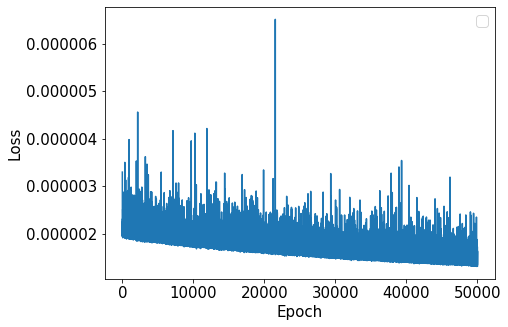

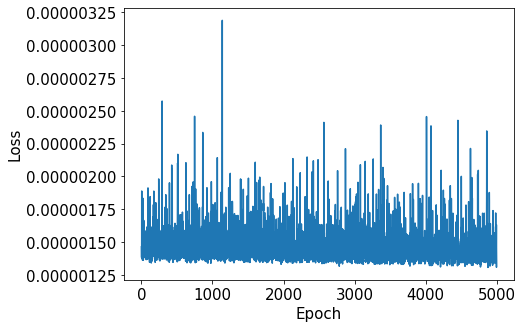

In [292]:
plt.figure()
plt.plot(history);
plt.xlabel('Epoch')
plt.ylabel('Loss')

r = int(len(history)/10)
plt.figure()
plt.plot(history[-r:]);
plt.xlabel('Epoch')
plt.ylabel('Loss')

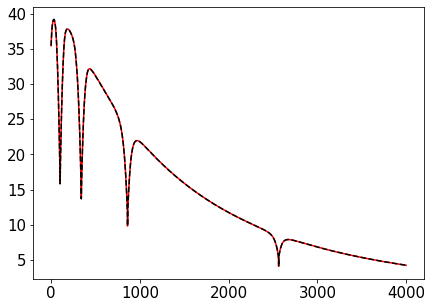

In [298]:
n = np.random.randint(0,len(X))
label = X_scaled[n].reshape(1,-1)
true = np.exp(t[n])
pred = np.exp(msc.inverse_transform(model.predict(label)))[0,:]
plt.plot(true,'k--',zorder=8)
plt.plot(pred,'r-')

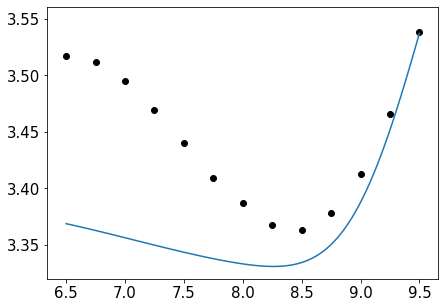

In [304]:
pixel = 2563
temp = 15000


ts = teffs[teffs == temp]
ls = loggs[teffs == temp]
labels = np.stack((ts,ls)).T
tflux = np.exp(t)[teffs == temp][:,pixel]

plt.scatter(ls,tflux,color='k')

linls = np.linspace(min(ls),max(ls),100)
lints = np.repeat(temp,100)
linlabels = np.stack((lints,linls)).T
lintflux = np.exp(msc.inverse_transform(model.predict(sc.transform(linlabels))))[:,pixel]
plt.plot(linls,lintflux)

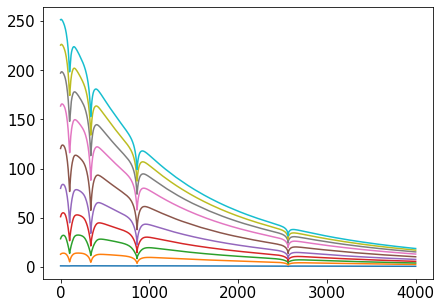

In [321]:
n = 10
ls = np.linspace(8,8,n)
ts = np.linspace(6000,50000,n)
labels = np.stack((ts,ls)).T
preds = np.exp(msc.inverse_transform(model.predict(sc.transform(labels))))
for i in preds:
    plt.plot(i)

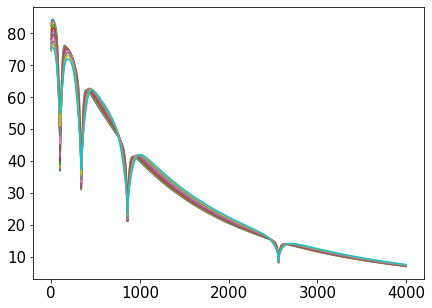

In [313]:
n = 10
ls = np.linspace(6.5,9.5,n)
ts = np.linspace(25000,25000,n)
labels = np.stack((ts,ls)).T
preds = np.exp(msc.inverse_transform(model.predict(sc.transform(labels))))
for i in preds:
    plt.plot(i)

In [360]:
def ch_cont(array):
    spec = array
    lamgrid = np.linspace(4000,8000,4000)
    p = np.polynomial.chebyshev.chebfit(lamgrid,spec,4)
    contcorr = spec / np.polynomial.chebyshev.chebval(lamgrid,p)
    plt.plot(contcorr)

In [ ]:
def sample_cont(label):